# Mount Google Drive

In [ ]:
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/SWQ'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive')
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['addressbook.csv', 'addressbook.gsheet', 'addressbook3.csv', 'confusion_matrix.csv', 'data', 'docs', 'evaluation_details.csv', 'mlruns', 'notebooks', 'src', 'test']


# Imports

In [ ]:
!pip install accelerate --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.3 MB/s eta 0:00:00


In [ ]:
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import warnings

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

from PIL import Image
from IPython.display import display
import requests
import base64
import os

import pandas as pd

from tqdm import tqdm

import mlflow
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# Disable FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

# Load LLaMA 8B


In [ ]:
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

# Mlflow Experiment

In [ ]:
os.environ["MLFLOW_TRACKING_TOKEN"] = ""
os.environ["MLFLOW_TRACKING_URI"] = ""

In [ ]:
mlflow.set_experiment("Evaluate HTML Pet Clinic")

<Experiment: artifact_location='not_implemented', creation_time=None, experiment_id='6', last_update_time=None, lifecycle_stage='active', name='Evaluate HTML Pet Clinic', tags={}>

In [ ]:
map = {
    f"distinct": 2,
    f"near duplicate": 1
}

In [ ]:
reverse_map = {
    "2": f"distinct",
    "1": f"near duplicate"
}

In [ ]:
appname = "petclinic"

In [ ]:
all_states_df = pd.read_csv("data/SS.csv")

In [ ]:
wrong_states_df = pd.read_csv("data/evaluation_details.csv")

In [ ]:
wrong_states_df = wrong_states_df[wrong_states_df['predicted_label'] != wrong_states_df['true_label']]

In [ ]:
wrong_states_df

,state1,state2,true_label,predicted_label
9,state60,state550,2,1
11,state50,state272,2,1
13,state272,state275,2,1
22,state64,state718,2,1
29,state432,state493,2,1
35,state16,state138,2,1
36,state278,state493,2,1
83,state10,state247,2,1
87,state278,state409,2,1
88,state3,state278,2,1


In [ ]:
#all_states_df['generated_text'] = None

In [ ]:
current_app_states_df = all_states_df[all_states_df['appname'] == appname]

In [ ]:
current_app_states_df = current_app_states_df[current_app_states_df['HUMAN_CLASSIFICATION'] != 0]

In [ ]:
#current_app_states_df['HUMAN_CLASSIFICATION'] = current_app_states_df['HUMAN_CLASSIFICATION'].replace(1, 0)

In [ ]:
current_app_states_df = current_app_states_df.merge(wrong_states_df[['state1', 'state2']], on=['state1', 'state2'])

In [ ]:
current_app_states_df = current_app_states_df.sample(frac=1).reset_index(drop=True)

In [ ]:
current_app_states_df[['state1', "state2", "HUMAN_CLASSIFICATION"]]

,state1,state2,HUMAN_CLASSIFICATION
0,state851,state1250,1
1,state142,state1176,2
2,state219,state305,2
3,state321,state655,2
4,state219,state1197,2
...,...,...,...
11019,state172,state180,2
11020,state329,state714,2
11021,state206,state891,2
11022,state282,state1100,1


# Prompt

In [ ]:
def get_label_from_string(output_str, possible_labels):
    output_str = output_str.lower()
    label_counts = {label: output_str.count(label) for label in possible_labels}

    most_common_label = max(label_counts, key=label_counts.get)

    if label_counts[most_common_label] > 0:
        return most_common_label
    else:
        return False

In [ ]:
promptTemplates = {
    "llava-hf/llava-v1.6-34b-hf": {
        "system": "I want you to act as classifier. "
            "You will be provided with the html of two webpages and an image showing both webpages side by side. Compare the two and provide the label that classifies the comparison best."
            "Clone: This term refers to pairs of states in a web application whose underlying HTML pages are identical. "
            "In the context of web crawling and testing, if a page (pB) loaded by an interaction is identical to the previously loaded page (pA), then pB is considered a clone of pA. "
            "Near Duplicate: Refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. "
            "For example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. "
            "This similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. "
            "Distinct: Distinct pairs are those where each state in the pair demonstrates fundamentally different functionalities within the application. "
            "An example would be a login page and a user profile page, which serve completely different purposes and thus are considered distinct states in the web application model​."
            "The classification into clone, distinct, and near-duplicate categories is essential for optimizing web crawlers in automated testing, ensuring they efficiently generate concise and complete models without redundant states.",
        "prompt": "<image>\n html of left image side: '<html>' and html of right image side: '<html>'."
                  "Answer with exactly one of the following three classes: 'clone', 'near-duplicate', 'distinct'."
                  "Base you answer on the html and the definiton of the classes, the image only serves as an additional help. First name the choosen class and then explain your answer.",
        "instructionStart": "<|im_start|>user\n",
        "instructionEnd": "<|im_end|><|im_start|>assistant\n",
        "systemStart": "<|im_start|>system\n",
        "systemEnd": "<|im_end|>"
    },
    "llava-hf/llava-v1.6-mistral-7b-hf":
    {
        "prompt": "[INST] <image>\nThis is a screenshot of a website. Memorize it. [/INST] Ok, it is a login page. [INST] <image>\nHere is the other image. Describe the differences and similarities between the memorized image and this one. [/INST]",
        "instructionEnd": "[/INST]"
    },
    "llava-hf/llava-v1.6-vicuna-7b-hf":
    {
        "system": "I want you to act as classifier. "
            "You will be provided with the html of two webpages and an image showing both webpages side by side. Compare the two and provide the label that classifies the comparison best."
            "Clone: This term refers to pairs of states in a web application whose underlying HTML pages are identical. "
            "In the context of web crawling and testing, if a page (pB) loaded by an interaction is identical to the previously loaded page (pA), then pB is considered a clone of pA. "
            "Near Duplicate: Refers to a state-pair of two webpages that represent the same logical state but exhibit marginal differences in specific segments of the sites. "
            "For example, in an e-commerce application, two product info pages that display similar content but differ in some text or graphical elements are considered near duplicates. "
            "This similarity makes them candidates for being categorized under the same functional state, thus not warranting separate tests for each​. "
            "Distinct: Distinct pairs are those where each state in the pair demonstrates fundamentally different functionalities within the application. "
            "An example would be a login page and a user profile page, which serve completely different purposes and thus are considered distinct states in the web application model​."
            "The classification into clone, distinct, and near-duplicate categories is essential for optimizing web crawlers in automated testing, ensuring they efficiently generate concise and complete models without redundant states.",
        "prompt": "<image>\n html of left image side: '<html>' and html of right image side: '<html>'."
                  "Answer with exactly one of the following three classes: 'clone', 'near-duplicate', 'distinct'."
                  "Base you answer on the html and the definiton of the classes, the image only serves as an additional help. First name the choosen class and then explain your answer.",
        "instructionStart": "USER:",
        "instructionEnd": "ASSISTANT: ",
        "systemStart": "",
        "systemEnd": ""
    },
    "meta-llama/Meta-Llama-3-8B-Instruct":
    {
        "system": 'You are an intelligent agent skilled in natural language processing and web development. Your task is to classify pairs of HTML files into two categories: "near duplicate" or "distinct". "Near duplicate" HTML files represent the same logical state with minor differences. "Distinct" HTML files represent different logical states, particularly if they serve different purposes or contain significantly different content. For example, if one file is a group management page and the other is a shopping list page, they must be classified as "distinct". Such functional differences must lead to a "distinct" classification, even if the overall structure is similar.',

        "prompt": 'I will provide you with two HTML files. Please analyze them and determine whether they are "near duplicate" or "distinct". Provide a detailed explanation of your reasoning based on the structure, content, navigation elements, and any significant differences in elements and functionality. Pay special attention to functional differences such as different purposes, form actions, methods, and significant content differences. If there are any significant functional differences, such as different purposes (e.g., one page is for group management and the other is for displaying a shopping list) or significant content differences (e.g., one file has a form and the other has a table), classify the files as "distinct". HTML File 1: <html> HTML File 2: <html> Based on the analysis of the above HTML files, are they "near duplicate" or "distinct"? Please explain your reasoning. Consider factors such as structure, content, navigation elements, and any significant differences in elements and functionality. Highlight any functional differences, especially different purposes and significant content differences. If the pages serve different purposes or have significant content differences (e.g., one page is for group management and the other is for displaying a shopping list, or one file has a form and the other has a table), classify them as "distinct."',
        "instructionStart": "<|start_header_id|>user<|end_header_id|>",
        "instructionEnd": "<|eot_id|><|start_header_id|>assistant<|end_header_id|>",
        "systemStart": "<|begin_of_text|><|start_header_id|>system<|end_header_id|>",
        "systemEnd": "<|eot_id|>"
    }
}

# Generate

In [ ]:
import gc  # Import garbage collector


# Paths to resources
html_content_folder = f"data/processed/{appname}"

batch_size = 8  # Define your batch size based on your GPU capacity
results = []
predictions = []
adjusted_true_labels = []
evaluation_details = []
non_classified_count = 0

with mlflow.start_run():
    mlflow.set_tags({"app": appname})
    num_batches = (len(current_app_states_df) + batch_size - 1) // batch_size
    #num_batches = (11 + batch_size - 1) // batch_size

    #for i in tqdm(range(0, 100, batch_size), total=num_batches, desc="Processing batches"):
    for i in tqdm(range(0, len(current_app_states_df), batch_size), total=num_batches, desc="Processing batches"):
        batch = current_app_states_df.iloc[i:i+batch_size]
        prompts = []
        batch_true_labels = []
        batch_states = []
        for index, row in batch.iterrows():
              html_path1 = f"{html_content_folder}/{row['state1']}.html.body.nostyle.noscript.nometa.nolongcomment"
              html_path2 = f"{html_content_folder}/{row['state2']}.html.body.nostyle.noscript.nometa.nolongcomment"
              with open(html_path1, 'r') as file1, open(html_path2, 'r') as file2:
                  html_content1 = file1.read(3500)
                  html_content2 = file2.read(3500)
              prompt = (promptTemplates[model_id]["systemStart"] +
                        promptTemplates[model_id]["system"] +
                        promptTemplates[model_id]["systemEnd"] +
                        promptTemplates[model_id]["instructionStart"] +
                        promptTemplates[model_id]["prompt"] +
                        promptTemplates[model_id]["instructionEnd"]).replace("<html>", "{}").format(html_content1, html_content2)
              prompts.append(prompt)
              batch_true_labels.append(row['HUMAN_CLASSIFICATION'])
              batch_states.append((row['state1'], row['state2']))

        # Process the batch
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.padding_side = "left"
        inputs = tokenizer(text=prompts, return_tensors="pt", padding=True).to(device)

        terminators = [
            tokenizer.eos_token_id,
            tokenizer.convert_tokens_to_ids("<|eot_id|>")
        ]

        with torch.inference_mode():
          outputs = model.generate(**inputs, max_new_tokens=20, eos_token_id=terminators, do_sample=True, temperature=0.6, top_p=0.9)
          decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)

        for output, (state1, state2), true_label in zip(decoded_outputs, batch_states, batch_true_labels):
            instruction_end = output.lower().find("assistant") + len("assistant")
            filtered_output = output[instruction_end:].strip().lower().replace("'", "")
            filtered_output = get_label_from_string(filtered_output, map.keys())
            print(f"{state1} vs. {state2}: {filtered_output} vs. {reverse_map[str(true_label)]}")
            if filtered_output in map:
              predictions.append(map[filtered_output])
              results.append(map[filtered_output])
              adjusted_true_labels.append(true_label)
              evaluation_details.append({
                          'state1': state1,
                          'state2': state2,
                          'true_label': true_label,
                          'predicted_label': map[filtered_output]
                      })
            else:
                non_classified_count += 1
                continue  # Skip this output

        # Clear memory
        del inputs, outputs, decoded_outputs, prompts, batch_true_labels, batch_states
        torch.cuda.empty_cache()
        gc.collect()  # Explicitly call the garbage collector

    evaluation_df = pd.DataFrame(evaluation_details)
    evaluation_csv = "evaluation_details.csv"
    evaluation_df.to_csv(evaluation_csv, index=False)
    mlflow.log_artifact(evaluation_csv, artifact_path="")

    # Calculate metrics after processing all data
    accuracy = accuracy_score(adjusted_true_labels, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(adjusted_true_labels, predictions, average='macro', zero_division=1)
    conf_matrix = confusion_matrix(adjusted_true_labels, predictions)

    # Log confusion matrix as an artifact (convert to a figure or save as CSV)
    conf_matrix_file = "confusion_matrix.csv"
    pd.DataFrame(conf_matrix).to_csv(conf_matrix_file)
    mlflow.log_artifact(conf_matrix_file, artifact_path="")

    # Log params
    mlflow.log_param("model", model_id)
    mlflow.log_param("n", len(evaluation_df))

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("fscore", fscore)
    mlflow.log_metric("non_classified_inputs", non_classified_count)
    mlflow.log_text(promptTemplates[model_id]["system"] + "\n\n" +
                        promptTemplates[model_id]["prompt"], "prompt.txt")


Processing batches:   0%|          | 1/1378 [00:12<4:51:48, 12.71s/it]

state851 vs. state1250: near duplicate vs. near duplicate
state142 vs. state1176: distinct vs. distinct
state219 vs. state305: near duplicate vs. distinct
state321 vs. state655: distinct vs. distinct
state219 vs. state1197: distinct vs. distinct
state721 vs. state1181: near duplicate vs. distinct
state867 vs. state1250: near duplicate vs. near duplicate
state187 vs. state1164: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   0%|          | 2/1378 [00:25<4:54:42, 12.85s/it]

state9 vs. state26: distinct vs. distinct
state241 vs. state558: distinct vs. distinct
state393 vs. state539: distinct vs. distinct
state9 vs. state388: distinct vs. distinct
state1215 vs. state1218: distinct vs. distinct
state385 vs. state815: distinct vs. distinct
state437 vs. state548: distinct vs. distinct
state376 vs. state393: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   0%|          | 3/1378 [00:37<4:41:24, 12.28s/it]

state194 vs. state1277: distinct vs. distinct
state858 vs. state1126: distinct vs. distinct
state721 vs. state832: near duplicate vs. distinct
state123 vs. state509: distinct vs. distinct
state50 vs. state163: near duplicate vs. near duplicate
state163 vs. state858: near duplicate vs. near duplicate
state606 vs. state981: distinct vs. distinct
state957 vs. state1197: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   0%|          | 4/1378 [00:51<4:54:58, 12.88s/it]

state460 vs. state714: distinct vs. distinct
state972 vs. state1029: distinct vs. distinct
state1065 vs. state1264: distinct vs. distinct
state324 vs. state945: distinct vs. distinct
state172 vs. state1042: distinct vs. distinct
state527 vs. state1105: near duplicate vs. distinct
state231 vs. state613: near duplicate vs. near duplicate
state180 vs. state187: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   0%|          | 5/1378 [00:59<4:18:13, 11.28s/it]

state258 vs. state565: near duplicate vs. near duplicate
state1 vs. state846: distinct vs. distinct
state655 vs. state1164: distinct vs. distinct
state147 vs. state1218: distinct vs. distinct
state163 vs. state1141: near duplicate vs. near duplicate
state437 vs. state664: near duplicate vs. near duplicate
state336 vs. state851: near duplicate vs. distinct
state606 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   0%|          | 6/1378 [01:10<4:13:42, 11.10s/it]

state981 vs. state1149: near duplicate vs. near duplicate
state130 vs. state163: near duplicate vs. near duplicate
state858 vs. state1215: distinct vs. near duplicate
state577 vs. state779: distinct vs. distinct
state258 vs. state981: distinct vs. distinct
index vs. state154: distinct vs. distinct
state972 vs. state1086: distinct vs. distinct
state101 vs. state172: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 7/1378 [01:19<4:01:03, 10.55s/it]

index vs. state423: distinct vs. distinct
state45 vs. state452: distinct vs. distinct
state714 vs. state1100: distinct vs. distinct
state50 vs. state1200: distinct vs. distinct
state577 vs. state750: near duplicate vs. near duplicate
state231 vs. state1119: near duplicate vs. distinct
state467 vs. state548: near duplicate vs. distinct
state282 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 8/1378 [01:25<3:27:16,  9.08s/it]

state460 vs. state832: distinct vs. distinct
state467 vs. state1264: near duplicate vs. near duplicate
state1119 vs. state1215: distinct vs. distinct
state206 vs. state565: distinct vs. distinct
state369 vs. state495: near duplicate vs. near duplicate
state231 vs. state548: distinct vs. distinct
state219 vs. state282: distinct vs. distinct
state154 vs. state430: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 9/1378 [01:33<3:21:09,  8.82s/it]

state345 vs. state1215: distinct vs. distinct
state502 vs. state1100: near duplicate vs. distinct
state643 vs. state827: distinct vs. distinct
state194 vs. state750: distinct vs. distinct
state216 vs. state1047: distinct vs. distinct
state275 vs. state1119: distinct vs. distinct
state548 vs. state1176: distinct vs. distinct
state267 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 10/1378 [01:41<3:11:25,  8.40s/it]

state846 vs. state1277: distinct vs. distinct
state362 vs. state851: distinct vs. distinct
state106 vs. state142: distinct vs. distinct
state841 vs. state1144: distinct vs. distinct
state988 vs. state1176: near duplicate vs. near duplicate
state216 vs. state1181: distinct vs. distinct
state548 vs. state1022: near duplicate vs. near duplicate
state241 vs. state460: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 11/1378 [01:47<2:53:58,  7.64s/it]

state154 vs. state1277: near duplicate vs. distinct
state187 vs. state774: distinct vs. distinct
state643 vs. state851: distinct vs. distinct
state355 vs. state851: near duplicate vs. distinct
state369 vs. state558: distinct vs. distinct
state45 vs. state1042: distinct vs. distinct
state488 vs. state1141: distinct vs. distinct
state66 vs. state655: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 12/1378 [01:54<2:53:59,  7.64s/it]

state98 vs. state312: distinct vs. distinct
state231 vs. state1173: distinct vs. distinct
state1105 vs. state1144: distinct vs. distinct
state1042 vs. state1181: near duplicate vs. near duplicate
state5 vs. state455: distinct vs. distinct
state180 vs. state241: near duplicate vs. near duplicate
state41 vs. state241: distinct vs. distinct
state786 vs. state867: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 13/1378 [01:58<2:23:44,  6.32s/it]

state643 vs. state1065: near duplicate vs. near duplicate
state452 vs. state548: distinct vs. distinct
state17 vs. state321: near duplicate vs. distinct
state241 vs. state388: near duplicate vs. distinct
state460 vs. state1126: near duplicate vs. near duplicate
state305 vs. state1144: distinct vs. distinct
state172 vs. state388: distinct vs. distinct
state565 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 14/1378 [02:04<2:26:49,  6.46s/it]

state393 vs. state495: distinct vs. distinct
state163 vs. state558: distinct vs. distinct
state913 vs. state1086: distinct vs. distinct
state50 vs. state1181: distinct vs. distinct
state180 vs. state509: distinct vs. distinct
state175 vs. state681: distinct vs. distinct
state1 vs. state86: distinct vs. distinct
state824 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 15/1378 [02:11<2:27:31,  6.49s/it]

state455 vs. state686: distinct vs. distinct
state643 vs. state648: distinct vs. distinct
state385 vs. state1105: distinct vs. distinct
state172 vs. state518: distinct vs. distinct
state532 vs. state867: distinct vs. distinct
state336 vs. state570: distinct vs. distinct
state324 vs. state841: near duplicate vs. distinct
state681 vs. state962: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 16/1378 [02:15<2:10:46,  5.76s/it]

state827 vs. state962: near duplicate vs. distinct
state452 vs. state488: distinct vs. distinct
state26 vs. state1173: distinct vs. distinct
state101 vs. state163: distinct vs. distinct
state509 vs. state898: distinct vs. distinct
state388 vs. state613: distinct vs. distinct
state77 vs. state527: distinct vs. distinct
state241 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|          | 17/1378 [02:20<2:04:53,  5.51s/it]

state558 vs. state988: near duplicate vs. distinct
state460 vs. state759: near duplicate vs. near duplicate
state430 vs. state918: distinct vs. distinct
state219 vs. state467: distinct vs. distinct
state324 vs. state1218: distinct vs. distinct
state175 vs. state1277: distinct vs. distinct
state26 vs. state118: distinct vs. distinct
state841 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|▏         | 18/1378 [02:24<1:56:06,  5.12s/it]

state123 vs. state1164: distinct vs. distinct
state815 vs. state1050: near duplicate vs. distinct
state45 vs. state882: distinct vs. distinct
state194 vs. state606: distinct vs. distinct
state324 vs. state1164: distinct vs. distinct
state655 vs. state1050: distinct vs. distinct
state430 vs. state532: distinct vs. distinct
state681 vs. state1042: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|▏         | 19/1378 [02:29<1:50:33,  4.88s/it]

state527 vs. state1218: distinct vs. distinct
index vs. state1095: distinct vs. distinct
state681 vs. state1095: distinct vs. distinct
state558 vs. state851: near duplicate vs. distinct
state606 vs. state774: distinct vs. distinct
state17 vs. state1086: distinct vs. distinct
state7 vs. state750: distinct vs. distinct
state495 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   1%|▏         | 20/1378 [02:33<1:45:01,  4.64s/it]

state1015 vs. state1022: distinct vs. distinct
state988 vs. state1126: distinct vs. distinct
index vs. state5: distinct vs. distinct
state455 vs. state1029: distinct vs. distinct
state86 vs. state130: distinct vs. distinct
state393 vs. state502: distinct vs. distinct
state558 vs. state636: distinct vs. distinct
state815 vs. state867: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 21/1378 [02:36<1:37:42,  4.32s/it]

state224 vs. state336: distinct vs. distinct
state101 vs. state636: near duplicate vs. distinct
state241 vs. state1149: distinct vs. distinct
state430 vs. state1086: distinct vs. distinct
state41 vs. state502: distinct vs. distinct
state369 vs. state532: distinct vs. distinct
state336 vs. state1264: near duplicate vs. near duplicate
state437 vs. state1200: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 22/1378 [02:40<1:33:23,  4.13s/it]

state467 vs. state1149: near duplicate vs. distinct
state643 vs. state1277: distinct vs. distinct
state336 vs. state388: distinct vs. distinct
state251 vs. state385: distinct vs. distinct
state26 vs. state851: distinct vs. distinct
state558 vs. state815: near duplicate vs. distinct
state86 vs. state643: near duplicate vs. distinct
state858 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 23/1378 [02:44<1:32:07,  4.08s/it]

state841 vs. state1218: distinct vs. distinct
state502 vs. state577: near duplicate vs. near duplicate
state26 vs. state45: distinct vs. distinct
state66 vs. state282: distinct vs. distinct
state57 vs. state957: distinct vs. distinct
state305 vs. state913: distinct vs. distinct
state66 vs. state714: near duplicate vs. near duplicate
state9 vs. state548: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 24/1378 [02:46<1:21:53,  3.63s/it]

state686 vs. state1086: near duplicate vs. distinct
index vs. state988: near duplicate vs. distinct
state779 vs. state1105: distinct vs. distinct
state163 vs. state362: distinct vs. distinct
state7 vs. state962: distinct vs. distinct
state77 vs. state1095: distinct vs. distinct
state1086 vs. state1144: near duplicate vs. near duplicate
state664 vs. state918: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 25/1378 [02:49<1:16:30,  3.39s/it]

state867 vs. state1215: distinct vs. distinct
state142 vs. state1144: distinct vs. distinct
state66 vs. state539: distinct vs. distinct
state385 vs. state1022: distinct vs. distinct
state267 vs. state1086: distinct vs. distinct
state163 vs. state636: distinct vs. distinct
state882 vs. state1095: distinct vs. distinct
state558 vs. state1277: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 26/1378 [02:53<1:19:02,  3.51s/it]

state643 vs. state664: distinct vs. distinct
state721 vs. state1119: near duplicate vs. near duplicate
state643 vs. state714: near duplicate vs. near duplicate
state362 vs. state832: distinct vs. distinct
state224 vs. state376: distinct vs. distinct
state258 vs. state558: distinct vs. distinct
state664 vs. state1050: near duplicate vs. distinct
state267 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 27/1378 [02:57<1:23:59,  3.73s/it]

state643 vs. state882: distinct vs. distinct
state9 vs. state664: distinct vs. distinct
state437 vs. state558: near duplicate vs. distinct
state172 vs. state1144: distinct vs. distinct
state867 vs. state1233: near duplicate vs. near duplicate
state539 vs. state1215: distinct vs. distinct
state954 vs. state1015: distinct vs. distinct
state241 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 28/1378 [03:01<1:23:06,  3.69s/it]

state45 vs. state57: near duplicate vs. near duplicate
state154 vs. state1264: near duplicate vs. near duplicate
state460 vs. state1050: distinct vs. distinct
index vs. state636: distinct vs. distinct
state509 vs. state1173: distinct vs. distinct
state345 vs. state891: near duplicate vs. near duplicate
state45 vs. state385: distinct vs. distinct
state7 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 29/1378 [03:03<1:15:27,  3.36s/it]

state231 vs. state636: distinct vs. distinct
state216 vs. state759: distinct vs. distinct
state452 vs. state648: distinct vs. distinct
state321 vs. state393: distinct vs. distinct
state393 vs. state954: near duplicate vs. near duplicate
state154 vs. state1250: near duplicate vs. distinct
state163 vs. state187: distinct vs. distinct
state41 vs. state216: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 30/1378 [03:06<1:12:22,  3.22s/it]

state17 vs. state962: distinct vs. distinct
state460 vs. state636: distinct vs. distinct
state827 vs. state832: near duplicate vs. distinct
state7 vs. state495: distinct vs. distinct
state1176 vs. state1250: near duplicate vs. near duplicate
state5 vs. state175: distinct vs. distinct
state467 vs. state636: distinct vs. distinct
state45 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 31/1378 [03:10<1:17:44,  3.46s/it]

state115 vs. state224: distinct vs. distinct
state130 vs. state913: near duplicate vs. near duplicate
state355 vs. state867: near duplicate vs. distinct
state267 vs. state362: distinct vs. distinct
state26 vs. state655: distinct vs. distinct
state9 vs. state721: distinct vs. distinct
state509 vs. state851: distinct vs. distinct
state5 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 32/1378 [03:13<1:13:42,  3.29s/it]

state50 vs. state1042: distinct vs. distinct
state321 vs. state1022: distinct vs. distinct
state282 vs. state891: near duplicate vs. distinct
state216 vs. state455: distinct vs. distinct
state172 vs. state1065: distinct vs. distinct
state98 vs. state518: distinct vs. distinct
state824 vs. state858: distinct vs. distinct
state846 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 33/1378 [03:18<1:20:40,  3.60s/it]

state452 vs. state495: distinct vs. distinct
state123 vs. state139: distinct vs. distinct
state180 vs. state962: distinct vs. distinct
state180 vs. state824: near duplicate vs. near duplicate
state851 vs. state1095: distinct vs. distinct
state957 vs. state1022: distinct vs. distinct
state270 vs. state488: near duplicate vs. distinct
state846 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   2%|▏         | 34/1378 [03:21<1:16:26,  3.41s/it]

state41 vs. state1264: distinct vs. distinct
state495 vs. state913: near duplicate vs. near duplicate
state1 vs. state130: distinct vs. distinct
state45 vs. state206: near duplicate vs. near duplicate
state57 vs. state1277: distinct vs. distinct
state452 vs. state918: distinct vs. distinct
state98 vs. state858: distinct vs. distinct
state101 vs. state882: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 35/1378 [03:23<1:10:45,  3.16s/it]

state98 vs. state241: distinct vs. distinct
state139 vs. state774: distinct vs. distinct
state613 vs. state681: near duplicate vs. distinct
state123 vs. state972: near duplicate vs. near duplicate
state115 vs. state1144: distinct vs. distinct
state305 vs. state945: distinct vs. distinct
state648 vs. state1176: near duplicate vs. near duplicate
state45 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 36/1378 [03:26<1:08:54,  3.08s/it]

state219 vs. state539: distinct vs. distinct
state86 vs. state648: distinct vs. distinct
state251 vs. state369: distinct vs. distinct
state5 vs. state216: distinct vs. distinct
state50 vs. state945: distinct vs. distinct
state750 vs. state891: distinct vs. distinct
state532 vs. state664: distinct vs. distinct
state841 vs. state954: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 37/1378 [03:30<1:11:51,  3.22s/it]

state455 vs. state1164: distinct vs. distinct
state282 vs. state858: distinct vs. distinct
state636 vs. state643: distinct vs. distinct
state518 vs. state1173: distinct vs. distinct
state123 vs. state1110: near duplicate vs. near duplicate
state154 vs. state815: near duplicate vs. distinct
state832 vs. state1176: near duplicate vs. distinct
state147 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 38/1378 [03:33<1:11:33,  3.20s/it]

state400 vs. state430: distinct vs. distinct
state5 vs. state437: distinct vs. distinct
state267 vs. state786: distinct vs. distinct
state437 vs. state891: distinct vs. distinct
state518 vs. state851: near duplicate vs. near duplicate
state98 vs. state115: near duplicate vs. near duplicate
state241 vs. state1233: distinct vs. distinct
state139 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 39/1378 [03:36<1:08:52,  3.09s/it]

state147 vs. state345: near duplicate vs. near duplicate
state251 vs. state759: near duplicate vs. distinct
state123 vs. state918: near duplicate vs. distinct
state988 vs. state1110: distinct vs. distinct
state362 vs. state527: near duplicate vs. distinct
state216 vs. state779: distinct vs. distinct
state488 vs. state495: distinct vs. distinct
state636 vs. state945: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 40/1378 [03:39<1:10:28,  3.16s/it]

state258 vs. state898: distinct vs. distinct
state98 vs. state681: distinct vs. distinct
state643 vs. state1144: distinct vs. distinct
state437 vs. state1119: near duplicate vs. near duplicate
state115 vs. state1257: distinct vs. distinct
state664 vs. state1095: distinct vs. distinct
state9 vs. state376: distinct vs. distinct
state393 vs. state824: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 41/1378 [03:41<1:05:50,  2.96s/it]

state613 vs. state1200: near duplicate vs. near duplicate
state101 vs. state123: near duplicate vs. distinct
state275 vs. state832: distinct vs. distinct
state187 vs. state565: distinct vs. distinct
state1 vs. state1015: distinct vs. distinct
state251 vs. state539: near duplicate vs. near duplicate
state355 vs. state832: near duplicate vs. near duplicate
state1110 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 42/1378 [03:46<1:14:07,  3.33s/it]

state7 vs. state846: distinct vs. distinct
state815 vs. state1015: near duplicate vs. near duplicate
state643 vs. state759: distinct vs. distinct
state219 vs. state376: distinct vs. distinct
state1042 vs. state1200: near duplicate vs. near duplicate
state231 vs. state518: near duplicate vs. distinct
state224 vs. state329: near duplicate vs. near duplicate
state172 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 43/1378 [03:48<1:11:01,  3.19s/it]

state123 vs. state376: distinct vs. distinct
state45 vs. state913: near duplicate vs. near duplicate
state981 vs. state1141: distinct vs. distinct
state41 vs. state45: distinct vs. distinct
state175 vs. state336: distinct vs. distinct
state400 vs. state1181: near duplicate vs. near duplicate
state231 vs. state898: near duplicate vs. near duplicate
state7 vs. state142: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 44/1378 [03:51<1:06:42,  3.00s/it]

state139 vs. state1110: distinct vs. distinct
state636 vs. state1047: distinct vs. distinct
state115 vs. state305: distinct vs. distinct
state139 vs. state913: distinct vs. distinct
state467 vs. state841: distinct vs. distinct
state194 vs. state1029: distinct vs. distinct
state147 vs. state962: distinct vs. distinct
state219 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 45/1378 [03:54<1:06:24,  2.99s/it]

state77 vs. state774: distinct vs. distinct
state26 vs. state779: distinct vs. distinct
state355 vs. state1215: distinct vs. distinct
state824 vs. state898: distinct vs. distinct
state336 vs. state1050: near duplicate vs. near duplicate
state430 vs. state1215: near duplicate vs. near duplicate
state721 vs. state824: distinct vs. distinct
state115 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 46/1378 [03:57<1:05:24,  2.95s/it]

state606 vs. state1126: near duplicate vs. near duplicate
state26 vs. state1100: distinct vs. distinct
state86 vs. state786: distinct vs. distinct
state224 vs. state1086: distinct vs. distinct
state147 vs. state495: distinct vs. distinct
state305 vs. state1065: distinct vs. distinct
state1 vs. state495: distinct vs. distinct
state570 vs. state1215: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 47/1378 [04:00<1:06:43,  3.01s/it]

state282 vs. state779: distinct vs. distinct
state345 vs. state1029: distinct vs. distinct
state570 vs. state967: distinct vs. distinct
state275 vs. state1181: distinct vs. distinct
state324 vs. state548: near duplicate vs. distinct
state355 vs. state400: near duplicate vs. near duplicate
state400 vs. state1215: distinct vs. distinct
state488 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   3%|▎         | 48/1378 [04:03<1:03:49,  2.88s/it]

state142 vs. state1197: distinct vs. distinct
state118 vs. state759: near duplicate vs. distinct
state154 vs. state962: near duplicate vs. near duplicate
state187 vs. state312: distinct vs. distinct
state270 vs. state750: distinct vs. distinct
state643 vs. state686: distinct vs. distinct
state231 vs. state312: distinct vs. distinct
state147 vs. state163: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▎         | 49/1378 [04:05<1:03:51,  2.88s/it]

state101 vs. state1277: distinct vs. distinct
state532 vs. state1126: near duplicate vs. near duplicate
state648 vs. state779: distinct vs. distinct
state324 vs. state355: distinct vs. distinct
state832 vs. state1126: distinct vs. distinct
state707 vs. state841: near duplicate vs. near duplicate
state613 vs. state1192: near duplicate vs. near duplicate
state655 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▎         | 50/1378 [04:08<1:05:03,  2.94s/it]

state832 vs. state1233: near duplicate vs. distinct
state123 vs. state750: distinct vs. distinct
state86 vs. state681: distinct vs. distinct
state972 vs. state1164: distinct vs. distinct
state106 vs. state430: distinct vs. near duplicate
state606 vs. state1110: near duplicate vs. near duplicate
state643 vs. state1181: distinct vs. distinct
state891 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▎         | 51/1378 [04:11<1:04:36,  2.92s/it]

state1 vs. state1197: distinct vs. distinct
state41 vs. state858: distinct vs. distinct
state219 vs. state750: distinct vs. distinct
state106 vs. state388: distinct vs. distinct
state565 vs. state570: distinct vs. distinct
state369 vs. state1144: distinct vs. distinct
state1144 vs. state1257: distinct vs. distinct
state258 vs. state305: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 52/1378 [04:15<1:06:41,  3.02s/it]

state194 vs. state882: distinct vs. distinct
state77 vs. state945: near duplicate vs. distinct
state26 vs. state495: distinct vs. distinct
state362 vs. state686: distinct vs. distinct
state115 vs. state714: distinct vs. distinct
state891 vs. state1015: distinct vs. distinct
state369 vs. state1126: distinct vs. distinct
state139 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 53/1378 [04:17<1:05:40,  2.97s/it]

state98 vs. state577: distinct vs. distinct
state26 vs. state681: distinct vs. distinct
state393 vs. state1218: distinct vs. distinct
state216 vs. state495: distinct vs. distinct
state437 vs. state518: near duplicate vs. near duplicate
state66 vs. state275: distinct vs. distinct
state452 vs. state1215: distinct vs. distinct
state251 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 54/1378 [04:20<1:04:48,  2.94s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state388 vs. state750: distinct vs. distinct
state1015 vs. state1181: near duplicate vs. distinct
state5 vs. state9: near duplicate vs. distinct
state5 vs. state57: distinct vs. distinct
state636 vs. state858: distinct vs. distinct
state270 vs. state832: near duplicate vs. distinct
state1 vs. state275: distinct vs. distinct
state163 vs. state282: distinct vs. distinct


Processing batches:   4%|▍         | 55/1378 [04:23<1:04:11,  2.91s/it]

state312 vs. state750: distinct vs. distinct
state26 vs. state898: distinct vs. distinct
state779 vs. state1173: distinct vs. distinct
state312 vs. state957: distinct vs. distinct
state9 vs. state1065: distinct vs. distinct
state9 vs. state913: distinct vs. distinct
state187 vs. state437: near duplicate vs. distinct
state495 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 56/1378 [04:26<1:03:37,  2.89s/it]

state681 vs. state774: distinct vs. distinct
state7 vs. state824: distinct vs. distinct
state7 vs. state329: distinct vs. distinct
state388 vs. state967: near duplicate vs. distinct
state452 vs. state1164: distinct vs. distinct
state45 vs. state216: distinct vs. distinct
state509 vs. state1095: distinct vs. distinct
state172 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 57/1378 [04:29<1:01:32,  2.80s/it]

state606 vs. state1200: distinct vs. distinct
state455 vs. state913: distinct vs. distinct
state118 vs. state163: distinct vs. distinct
state558 vs. state891: distinct vs. distinct
state282 vs. state430: distinct vs. distinct
state423 vs. state460: near duplicate vs. distinct
state336 vs. state430: distinct vs. distinct
state954 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 58/1378 [04:32<1:02:48,  2.85s/it]

state66 vs. state1215: distinct vs. near duplicate
state898 vs. state1086: near duplicate vs. distinct
state345 vs. state1105: near duplicate vs. near duplicate
state467 vs. state1218: near duplicate vs. near duplicate
state258 vs. state957: distinct vs. distinct
state251 vs. state509: distinct vs. distinct
state423 vs. state1095: near duplicate vs. distinct
state41 vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 59/1378 [04:35<1:03:32,  2.89s/it]

state118 vs. state305: near duplicate vs. distinct
state50 vs. state913: distinct vs. near duplicate
state206 vs. state1192: distinct vs. distinct
state488 vs. state681: distinct vs. distinct
state750 vs. state858: distinct vs. distinct
state130 vs. state194: distinct vs. distinct
state539 vs. state786: near duplicate vs. distinct
state455 vs. state488: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 60/1378 [04:37<1:03:39,  2.90s/it]

state423 vs. state570: distinct vs. distinct
index vs. state664: distinct vs. distinct
state846 vs. state1233: distinct vs. distinct
state194 vs. state613: distinct vs. distinct
state714 vs. state1197: distinct vs. distinct
state50 vs. state1015: distinct vs. distinct
state219 vs. state636: near duplicate vs. distinct
state355 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 61/1378 [04:40<1:03:26,  2.89s/it]

state362 vs. state954: near duplicate vs. distinct
state851 vs. state1164: near duplicate vs. near duplicate
state858 vs. state1173: distinct vs. distinct
state759 vs. state1141: distinct vs. distinct
state918 vs. state1086: near duplicate vs. near duplicate
state219 vs. state898: distinct vs. distinct
state759 vs. state898: distinct vs. distinct
state115 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   4%|▍         | 62/1378 [04:43<1:03:26,  2.89s/it]

state495 vs. state1200: distinct vs. distinct
state154 vs. state231: near duplicate vs. near duplicate
state142 vs. state1149: distinct vs. distinct
state312 vs. state851: near duplicate vs. distinct
state17 vs. state66: distinct vs. distinct
state882 vs. state1042: near duplicate vs. distinct
state123 vs. state231: distinct vs. distinct
state336 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 63/1378 [04:46<1:01:04,  2.79s/it]

state282 vs. state898: near duplicate vs. near duplicate
state1095 vs. state1257: near duplicate vs. near duplicate
state115 vs. state981: distinct vs. distinct
state216 vs. state393: distinct vs. distinct
state258 vs. state779: distinct vs. distinct
state321 vs. state957: distinct vs. distinct
state7 vs. state1015: distinct vs. distinct
state101 vs. state147: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 64/1378 [04:49<1:02:12,  2.84s/it]

state7 vs. state606: distinct vs. distinct
state967 vs. state1119: distinct vs. distinct
state163 vs. state385: distinct vs. distinct
state77 vs. state827: distinct vs. distinct
state26 vs. state130: distinct vs. distinct
state98 vs. state774: distinct vs. distinct
state216 vs. state1218: distinct vs. distinct
state369 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 65/1378 [04:52<1:02:34,  2.86s/it]

state206 vs. state957: distinct vs. distinct
state115 vs. state774: distinct vs. distinct
state714 vs. state1029: distinct vs. distinct
state163 vs. state502: distinct vs. distinct
state643 vs. state841: distinct vs. distinct
state1042 vs. state1277: near duplicate vs. distinct
state430 vs. state867: distinct vs. distinct
state539 vs. state1233: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 66/1378 [04:54<1:00:18,  2.76s/it]

state532 vs. state1110: near duplicate vs. near duplicate
state388 vs. state467: distinct vs. distinct
state388 vs. state1181: distinct vs. distinct
state41 vs. state385: near duplicate vs. distinct
state142 vs. state1181: distinct vs. distinct
state613 vs. state1029: near duplicate vs. near duplicate
state981 vs. state1119: near duplicate vs. near duplicate
state518 vs. state613: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 67/1378 [04:57<58:58,  2.70s/it]  

state321 vs. state1233: distinct vs. distinct
state385 vs. state1119: distinct vs. distinct
state532 vs. state613: distinct vs. distinct
state251 vs. state1015: near duplicate vs. distinct
state231 vs. state954: distinct vs. distinct
state219 vs. state643: distinct vs. distinct
state7 vs. state832: distinct vs. distinct
state467 vs. state827: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▍         | 68/1378 [05:00<59:43,  2.74s/it]

state1 vs. state163: distinct vs. distinct
state613 vs. state913: distinct vs. distinct
state509 vs. state636: distinct vs. distinct
state527 vs. state686: distinct vs. distinct
state123 vs. state305: near duplicate vs. distinct
state846 vs. state1042: distinct vs. distinct
state393 vs. state1100: distinct vs. distinct
state913 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 69/1378 [05:03<1:01:13,  2.81s/it]

state509 vs. state846: near duplicate vs. near duplicate
state206 vs. state1100: distinct vs. distinct
state7 vs. state988: distinct vs. distinct
state423 vs. state981: distinct vs. distinct
state154 vs. state175: distinct vs. distinct
state502 vs. state636: distinct vs. distinct
state957 vs. state1141: distinct vs. distinct
state495 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 70/1378 [05:05<1:01:32,  2.82s/it]

state565 vs. state686: distinct vs. distinct
state194 vs. state913: distinct vs. distinct
state509 vs. state882: distinct vs. distinct
state988 vs. state1015: near duplicate vs. near duplicate
state355 vs. state988: near duplicate vs. distinct
state101 vs. state851: distinct vs. distinct
state194 vs. state502: distinct vs. distinct
state336 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 71/1378 [05:08<1:01:58,  2.85s/it]

state1042 vs. state1197: near duplicate vs. distinct
state655 vs. state851: distinct vs. distinct
state721 vs. state898: near duplicate vs. distinct
state455 vs. state846: distinct vs. distinct
state172 vs. state1176: distinct vs. distinct
state393 vs. state565: distinct vs. distinct
state355 vs. state1100: near duplicate vs. near duplicate
state50 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 72/1378 [05:11<1:00:07,  2.76s/it]

state216 vs. state1197: distinct vs. distinct
state187 vs. state362: distinct vs. distinct
state115 vs. state172: near duplicate vs. near duplicate
state98 vs. state437: distinct vs. distinct
state77 vs. state275: near duplicate vs. distinct
state118 vs. state577: distinct vs. distinct
state636 vs. state954: near duplicate vs. distinct
state558 vs. state827: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 73/1378 [05:13<58:49,  2.70s/it]  

state455 vs. state1086: distinct vs. distinct
state187 vs. state1176: near duplicate vs. distinct
state115 vs. state1065: distinct vs. distinct
state1029 vs. state1110: near duplicate vs. distinct
state1119 vs. state1277: near duplicate vs. near duplicate
state355 vs. state686: near duplicate vs. near duplicate
state437 vs. state539: near duplicate vs. distinct
state45 vs. state275: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 74/1378 [05:16<59:49,  2.75s/it]

state147 vs. state945: distinct vs. distinct
state393 vs. state455: distinct vs. distinct
state355 vs. state1126: distinct vs. distinct
state664 vs. state898: near duplicate vs. distinct
state532 vs. state721: distinct vs. distinct
state142 vs. state846: distinct vs. distinct
state139 vs. state1065: distinct vs. distinct
state106 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   5%|▌         | 75/1378 [05:19<58:26,  2.69s/it]

state258 vs. state577: near duplicate vs. distinct
state115 vs. state275: distinct vs. distinct
state437 vs. state750: near duplicate vs. near duplicate
state400 vs. state824: distinct vs. distinct
state362 vs. state502: distinct vs. distinct
state345 vs. state376: distinct vs. distinct
state423 vs. state786: distinct vs. distinct
state1029 vs. state1042: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 76/1378 [05:21<57:35,  2.65s/it]

state241 vs. state1047: distinct vs. distinct
state5 vs. state891: distinct vs. distinct
state139 vs. state1029: distinct vs. distinct
state17 vs. state636: distinct vs. distinct
state686 vs. state721: near duplicate vs. distinct
state565 vs. state786: distinct vs. distinct
state388 vs. state779: distinct vs. distinct
state686 vs. state867: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 77/1378 [05:24<59:36,  2.75s/it]

state345 vs. state455: distinct vs. distinct
state423 vs. state527: near duplicate vs. distinct
state1100 vs. state1105: distinct vs. distinct
state17 vs. state1218: distinct vs. distinct
state681 vs. state841: near duplicate vs. distinct
state686 vs. state891: distinct vs. distinct
state45 vs. state50: near duplicate vs. near duplicate
state172 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 78/1378 [05:27<1:01:15,  2.83s/it]

state57 vs. state1141: near duplicate vs. near duplicate
state786 vs. state1065: distinct vs. distinct
state9 vs. state815: distinct vs. distinct
state867 vs. state988: near duplicate vs. near duplicate
state565 vs. state851: distinct vs. distinct
state45 vs. state175: distinct vs. distinct
state5 vs. state815: distinct vs. distinct
state57 vs. state714: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 79/1378 [05:30<1:01:39,  2.85s/it]

state570 vs. state1100: distinct vs. distinct
state142 vs. state913: distinct vs. distinct
state101 vs. state1176: distinct vs. distinct
state312 vs. state721: near duplicate vs. distinct
state275 vs. state437: distinct vs. distinct
state539 vs. state1105: distinct vs. distinct
state750 vs. state957: near duplicate vs. near duplicate
state50 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 80/1378 [05:33<59:39,  2.76s/it]  

state1192 vs. state1233: near duplicate vs. distinct
state329 vs. state467: distinct vs. distinct
state841 vs. state851: distinct vs. distinct
state376 vs. state686: near duplicate vs. distinct
state779 vs. state954: distinct vs. distinct
state187 vs. state393: distinct vs. distinct
state5 vs. state488: distinct vs. distinct
state123 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 81/1378 [05:36<1:00:21,  2.79s/it]

state77 vs. state270: distinct vs. distinct
state118 vs. state123: near duplicate vs. distinct
state50 vs. state139: distinct vs. distinct
state527 vs. state957: near duplicate vs. distinct
state312 vs. state1065: near duplicate vs. near duplicate
state163 vs. state1144: distinct vs. distinct
state539 vs. state981: near duplicate vs. distinct
state437 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 82/1378 [05:39<1:01:25,  2.84s/it]

state832 vs. state1047: near duplicate vs. distinct
state26 vs. state867: distinct vs. distinct
state251 vs. state613: near duplicate vs. near duplicate
state329 vs. state918: distinct vs. distinct
state1095 vs. state1181: distinct vs. distinct
state275 vs. state1277: distinct vs. distinct
state565 vs. state898: distinct vs. distinct
state66 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 83/1378 [05:42<1:02:19,  2.89s/it]

state66 vs. state194: distinct vs. distinct
index vs. state305: distinct vs. distinct
state467 vs. state714: distinct vs. distinct
state147 vs. state224: near duplicate vs. near duplicate
state241 vs. state362: distinct vs. distinct
state270 vs. state643: distinct vs. distinct
state7 vs. state851: distinct vs. distinct
state305 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 84/1378 [05:45<1:06:03,  3.06s/it]

state206 vs. state832: distinct vs. distinct
state7 vs. state918: distinct vs. distinct
state50 vs. state824: distinct vs. distinct
state1105 vs. state1173: near duplicate vs. near duplicate
state216 vs. state681: distinct vs. distinct
state89 vs. state967: distinct vs. distinct
state57 vs. state219: distinct vs. distinct
state329 vs. state867: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 85/1378 [05:48<1:02:54,  2.92s/it]

state721 vs. state1110: distinct vs. distinct
state846 vs. state1047: distinct vs. distinct
state643 vs. state967: distinct vs. distinct
state750 vs. state824: distinct vs. distinct
state231 vs. state851: near duplicate vs. distinct
state532 vs. state1277: distinct vs. distinct
state539 vs. state988: near duplicate vs. distinct
state467 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▌         | 86/1378 [05:51<1:02:26,  2.90s/it]

state362 vs. state648: distinct vs. distinct
state241 vs. state393: near duplicate vs. near duplicate
state66 vs. state172: distinct vs. distinct
state305 vs. state858: distinct vs. distinct
state50 vs. state707: distinct vs. distinct
state385 vs. state437: distinct vs. distinct
state26 vs. state376: distinct vs. distinct
state655 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▋         | 87/1378 [05:53<1:02:09,  2.89s/it]

state5 vs. state172: distinct vs. distinct
state7 vs. state216: distinct vs. distinct
state369 vs. state518: distinct vs. distinct
state142 vs. state206: distinct vs. distinct
state1050 vs. state1277: near duplicate vs. distinct
state241 vs. state1200: distinct vs. distinct
state241 vs. state539: distinct vs. distinct
state957 vs. state1192: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▋         | 88/1378 [05:56<1:01:54,  2.88s/it]

state41 vs. state123: distinct vs. distinct
state324 vs. state455: near duplicate vs. near duplicate
state329 vs. state509: distinct vs. distinct
state988 vs. state1233: near duplicate vs. near duplicate
state321 vs. state423: distinct vs. distinct
state231 vs. state988: near duplicate vs. distinct
state851 vs. state891: distinct vs. distinct
state1 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   6%|▋         | 89/1378 [05:59<59:38,  2.78s/it]  

state180 vs. state613: distinct vs. distinct
state643 vs. state707: distinct vs. distinct
state345 vs. state681: distinct vs. distinct
state77 vs. state1173: distinct vs. distinct
state147 vs. state606: near duplicate vs. near duplicate
state180 vs. state527: distinct vs. distinct
state5 vs. state1065: distinct vs. distinct
state721 vs. state1149: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 90/1378 [06:01<58:17,  2.72s/it]

state77 vs. state1192: near duplicate vs. distinct
state1095 vs. state1215: distinct vs. distinct
state962 vs. state1015: near duplicate vs. distinct
state282 vs. state1042: near duplicate vs. near duplicate
state172 vs. state1264: distinct vs. distinct
state437 vs. state1277: near duplicate vs. near duplicate
state867 vs. state1126: distinct vs. distinct
state324 vs. state532: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 91/1378 [06:04<59:19,  2.77s/it]

state66 vs. state851: distinct vs. distinct
state502 vs. state655: distinct vs. distinct
state224 vs. state945: distinct vs. distinct
state89 vs. state1233: distinct vs. distinct
state636 vs. state815: distinct vs. distinct
state400 vs. state1047: near duplicate vs. distinct
state539 vs. state1176: near duplicate vs. distinct
state786 vs. state945: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 92/1378 [06:07<57:33,  2.69s/it]

state224 vs. state750: distinct vs. distinct
state9 vs. state1047: distinct vs. distinct
state1200 vs. state1277: near duplicate vs. distinct
state9 vs. state1105: distinct vs. distinct
state362 vs. state1100: distinct vs. distinct
state891 vs. state1047: distinct vs. distinct
state750 vs. state898: near duplicate vs. distinct
state41 vs. state882: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 93/1378 [06:09<56:47,  2.65s/it]

state460 vs. state913: distinct vs. distinct
state423 vs. state1200: distinct vs. distinct
state400 vs. state962: near duplicate vs. near duplicate
state270 vs. state891: near duplicate vs. distinct
state241 vs. state258: distinct vs. distinct
state130 vs. state1042: distinct vs. distinct
state832 vs. state1144: near duplicate vs. distinct
state231 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 94/1378 [06:12<56:35,  2.64s/it]

state1 vs. state1144: distinct vs. distinct
state123 vs. state362: near duplicate vs. distinct
state77 vs. state187: distinct vs. distinct
state219 vs. state558: distinct vs. distinct
state118 vs. state1100: distinct vs. distinct
state1149 vs. state1197: near duplicate vs. near duplicate
state345 vs. state400: distinct vs. distinct
state355 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 95/1378 [06:15<57:43,  2.70s/it]

state50 vs. state123: distinct vs. distinct
state172 vs. state681: distinct vs. distinct
state400 vs. state882: near duplicate vs. distinct
state606 vs. state681: distinct vs. distinct
state139 vs. state1215: distinct vs. distinct
state1100 vs. state1257: distinct vs. distinct
state388 vs. state1233: distinct vs. distinct
state123 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 96/1378 [06:18<1:01:11,  2.86s/it]

state460 vs. state707: distinct vs. distinct
state324 vs. state1200: distinct vs. distinct
state355 vs. state509: distinct vs. distinct
state957 vs. state1164: near duplicate vs. near duplicate
state5 vs. state606: distinct vs. distinct
state26 vs. state509: distinct vs. distinct
state50 vs. state759: distinct vs. distinct
state142 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 97/1378 [06:21<59:04,  2.77s/it]  

state115 vs. state1218: distinct vs. distinct
state400 vs. state851: near duplicate vs. distinct
state686 vs. state1022: distinct vs. distinct
state423 vs. state1215: distinct vs. distinct
state336 vs. state1233: near duplicate vs. distinct
state216 vs. state305: distinct vs. distinct
state824 vs. state1164: distinct vs. distinct
state336 vs. state502: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 98/1378 [06:23<57:53,  2.71s/it]

state312 vs. state1047: distinct vs. distinct
state139 vs. state321: near duplicate vs. near duplicate
state430 vs. state1100: distinct vs. distinct
state139 vs. state1022: distinct vs. distinct
state219 vs. state321: distinct vs. distinct
state376 vs. state1086: near duplicate vs. near duplicate
state172 vs. state643: distinct vs. distinct
state967 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 99/1378 [06:26<59:44,  2.80s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state1 vs. state1215: distinct vs. distinct
index vs. state1042: distinct vs. distinct
state115 vs. state376: distinct vs. distinct
state376 vs. state502: near duplicate vs. near duplicate
state57 vs. state1126: distinct vs. distinct
state154 vs. state267: distinct vs. distinct
state41 vs. state172: near duplicate vs. distinct
state312 vs. state858: near duplicate vs. near duplicate


Processing batches:   7%|▋         | 100/1378 [06:29<1:00:23,  2.84s/it]

state89 vs. state194: distinct vs. distinct
state216 vs. state400: distinct vs. distinct
state430 vs. state882: distinct vs. distinct
state106 vs. state1047: distinct vs. distinct
state154 vs. state163: distinct vs. distinct
state518 vs. state548: distinct vs. distinct
state106 vs. state345: distinct vs. distinct
state86 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 101/1378 [06:32<1:00:42,  2.85s/it]

state98 vs. state216: near duplicate vs. near duplicate
state187 vs. state324: distinct vs. distinct
state50 vs. state1110: distinct vs. distinct
state824 vs. state1233: distinct vs. distinct
state345 vs. state388: near duplicate vs. distinct
state50 vs. state362: distinct vs. distinct
state66 vs. state1250: distinct vs. distinct
state147 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 102/1378 [06:35<58:34,  2.75s/it]  

state355 vs. state967: distinct vs. distinct
index vs. state1277: distinct vs. distinct
state41 vs. state355: distinct vs. distinct
state1 vs. state539: distinct vs. distinct
state270 vs. state957: distinct vs. distinct
state305 vs. state1086: distinct vs. distinct
state385 vs. state1065: distinct vs. distinct
state89 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   7%|▋         | 103/1378 [06:37<59:13,  2.79s/it]

state495 vs. state613: distinct vs. distinct
state163 vs. state681: distinct vs. distinct
state972 vs. state1197: distinct vs. distinct
state774 vs. state827: distinct vs. distinct
state101 vs. state827: distinct vs. distinct
state101 vs. state194: distinct vs. distinct
state41 vs. state175: distinct vs. distinct
state400 vs. state686: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 104/1378 [06:40<57:46,  2.72s/it]

state648 vs. state898: near duplicate vs. distinct
state467 vs. state565: distinct vs. distinct
state867 vs. state1144: near duplicate vs. near duplicate
state101 vs. state241: near duplicate vs. distinct
state139 vs. state539: distinct vs. distinct
state216 vs. state967: distinct vs. distinct
state9 vs. state891: distinct vs. distinct
state275 vs. state1110: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 105/1378 [06:43<56:55,  2.68s/it]

state305 vs. state321: distinct vs. distinct
state1029 vs. state1277: near duplicate vs. distinct
state786 vs. state1181: near duplicate vs. distinct
state832 vs. state891: distinct vs. distinct
state130 vs. state539: distinct vs. distinct
state270 vs. state345: near duplicate vs. distinct
state324 vs. state1215: distinct vs. distinct
state532 vs. state759: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 106/1378 [06:45<57:51,  2.73s/it]

state118 vs. state846: distinct vs. distinct
state57 vs. state175: distinct vs. distinct
state430 vs. state1164: distinct vs. distinct
state1022 vs. state1029: distinct vs. distinct
state750 vs. state1022: distinct vs. distinct
state385 vs. state455: distinct vs. distinct
state655 vs. state972: distinct vs. distinct
state558 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 107/1378 [06:48<59:44,  2.82s/it]

state7 vs. state66: distinct vs. distinct
state369 vs. state1042: distinct vs. distinct
state175 vs. state430: distinct vs. distinct
state172 vs. state251: distinct vs. distinct
state106 vs. state846: near duplicate vs. near duplicate
state369 vs. state1149: distinct vs. distinct
state430 vs. state1257: distinct vs. distinct
state180 vs. state324: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 108/1378 [06:51<1:00:13,  2.85s/it]

state305 vs. state841: near duplicate vs. near duplicate
state130 vs. state643: near duplicate vs. near duplicate
state89 vs. state851: distinct vs. distinct
state548 vs. state686: distinct vs. distinct
state172 vs. state962: distinct vs. distinct
state539 vs. state858: distinct vs. distinct
state393 vs. state570: distinct vs. distinct
state707 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 109/1378 [06:54<1:00:19,  2.85s/it]

state532 vs. state858: distinct vs. distinct
state98 vs. state972: distinct vs. distinct
state967 vs. state1141: distinct vs. distinct
state305 vs. state369: distinct vs. distinct
state1 vs. state1065: distinct vs. distinct
state891 vs. state1042: distinct vs. distinct
state655 vs. state918: distinct vs. distinct
state707 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 110/1378 [06:57<1:00:31,  2.86s/it]

state786 vs. state1144: near duplicate vs. near duplicate
state606 vs. state1264: distinct vs. distinct
state77 vs. state841: distinct vs. distinct
state532 vs. state1264: distinct vs. distinct
state488 vs. state1050: distinct vs. distinct
state336 vs. state655: distinct vs. distinct
state1029 vs. state1197: near duplicate vs. distinct
state147 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 111/1378 [07:00<57:57,  2.74s/it]  

state321 vs. state385: near duplicate vs. near duplicate
state957 vs. state1257: distinct vs. distinct
state548 vs. state1126: near duplicate vs. near duplicate
state194 vs. state945: distinct vs. distinct
state400 vs. state1105: distinct vs. distinct
state9 vs. state841: distinct vs. distinct
state17 vs. state846: distinct vs. distinct
state452 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 112/1378 [07:02<58:41,  2.78s/it]

state50 vs. state1192: distinct vs. distinct
state460 vs. state1110: near duplicate vs. near duplicate
state488 vs. state1164: distinct vs. distinct
state115 vs. state1029: distinct vs. distinct
state175 vs. state385: distinct vs. distinct
state655 vs. state1144: distinct vs. distinct
state452 vs. state945: distinct vs. distinct
state9 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 113/1378 [07:05<59:12,  2.81s/it]

state518 vs. state539: near duplicate vs. distinct
state163 vs. state518: distinct vs. distinct
state423 vs. state532: near duplicate vs. distinct
state393 vs. state1029: distinct vs. distinct
state5 vs. state180: distinct vs. distinct
state577 vs. state1141: distinct vs. distinct
state305 vs. state467: distinct vs. distinct
state321 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 114/1378 [07:08<1:00:28,  2.87s/it]

state106 vs. state467: distinct vs. distinct
state106 vs. state774: distinct vs. distinct
state172 vs. state455: distinct vs. distinct
state423 vs. state1250: distinct vs. distinct
state1149 vs. state1200: near duplicate vs. distinct
state86 vs. state527: distinct vs. distinct
state962 vs. state1095: distinct vs. distinct
state329 vs. state460: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 115/1378 [07:11<1:00:39,  2.88s/it]

state1022 vs. state1218: distinct vs. distinct
state1 vs. state7: distinct vs. distinct
state321 vs. state577: distinct vs. distinct
state502 vs. state548: distinct vs. distinct
state613 vs. state1257: near duplicate vs. distinct
state400 vs. state714: distinct vs. distinct
state686 vs. state918: near duplicate vs. distinct
state57 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 116/1378 [07:14<58:42,  2.79s/it]  

state1015 vs. state1047: near duplicate vs. near duplicate
state324 vs. state832: near duplicate vs. distinct
state437 vs. state898: near duplicate vs. distinct
state258 vs. state1042: distinct vs. distinct
state267 vs. state1144: distinct vs. distinct
state89 vs. state1173: distinct vs. distinct
state206 vs. state355: distinct vs. distinct
state385 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   8%|▊         | 117/1378 [07:17<59:06,  2.81s/it]

state194 vs. state345: distinct vs. distinct
state369 vs. state851: distinct vs. distinct
state832 vs. state1264: near duplicate vs. near duplicate
state142 vs. state548: distinct vs. distinct
state636 vs. state1192: distinct vs. distinct
state5 vs. state1218: distinct vs. distinct
state846 vs. state1164: distinct vs. distinct
state5 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▊         | 118/1378 [07:19<58:21,  2.78s/it]

state98 vs. state1264: distinct vs. distinct
state101 vs. state270: near duplicate vs. near duplicate
state967 vs. state1264: distinct vs. distinct
state142 vs. state759: distinct vs. distinct
state241 vs. state430: distinct vs. distinct
state570 vs. state913: near duplicate vs. near duplicate
state154 vs. state241: distinct vs. distinct
state570 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▊         | 119/1378 [07:22<56:53,  2.71s/it]

state224 vs. state282: distinct vs. distinct
state437 vs. state1257: distinct vs. distinct
state267 vs. state345: distinct vs. distinct
state154 vs. state827: near duplicate vs. distinct
state7 vs. state957: distinct vs. distinct
state832 vs. state1250: near duplicate vs. distinct
state681 vs. state918: near duplicate vs. near duplicate
state180 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▊         | 120/1378 [07:25<57:52,  2.76s/it]

state355 vs. state423: distinct vs. distinct
state502 vs. state1264: near duplicate vs. distinct
state187 vs. state913: distinct vs. distinct
state400 vs. state1218: near duplicate vs. near duplicate
state495 vs. state686: distinct vs. distinct
state106 vs. state267: distinct vs. distinct
state224 vs. state393: near duplicate vs. near duplicate
state206 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 121/1378 [07:28<58:32,  2.79s/it]

state89 vs. state502: distinct vs. distinct
state437 vs. state648: near duplicate vs. near duplicate
state106 vs. state123: distinct vs. distinct
state355 vs. state369: distinct vs. distinct
state5 vs. state957: distinct vs. distinct
state376 vs. state913: distinct vs. distinct
state1086 vs. state1119: near duplicate vs. near duplicate
state988 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 122/1378 [07:30<56:49,  2.71s/it]

state98 vs. state231: distinct vs. distinct
state1164 vs. state1233: near duplicate vs. near duplicate
state954 vs. state1110: near duplicate vs. near duplicate
state101 vs. state355: distinct vs. distinct
state57 vs. state101: distinct vs. distinct
state423 vs. state664: distinct vs. distinct
state282 vs. state1164: near duplicate vs. distinct
state77 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 123/1378 [07:33<58:30,  2.80s/it]

state655 vs. state1215: distinct vs. near duplicate
state305 vs. state681: distinct vs. distinct
state548 vs. state962: distinct vs. distinct
state488 vs. state502: distinct vs. distinct
state219 vs. state241: near duplicate vs. distinct
state206 vs. state488: distinct vs. distinct
state7 vs. state282: distinct vs. distinct
state488 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 124/1378 [07:36<59:08,  2.83s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state355 vs. state1022: distinct vs. distinct
state467 vs. state1173: distinct vs. distinct
state224 vs. state957: distinct vs. distinct
state130 vs. state1176: distinct vs. distinct
state106 vs. state1042: distinct vs. distinct
state258 vs. state918: distinct vs. distinct
state258 vs. state827: distinct vs. distinct
state636 vs. state891: near duplicate vs. distinct


Processing batches:   9%|▉         | 125/1378 [07:39<59:37,  2.85s/it]

state324 vs. state988: distinct vs. distinct
state750 vs. state882: near duplicate vs. near duplicate
state1022 vs. state1042: distinct vs. distinct
state163 vs. state913: near duplicate vs. near duplicate
state219 vs. state369: distinct vs. distinct
state270 vs. state532: near duplicate vs. distinct
state321 vs. state467: distinct vs. distinct
state7 vs. state50: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 126/1378 [07:42<59:25,  2.85s/it]

state118 vs. state1277: distinct vs. distinct
state224 vs. state1050: distinct vs. distinct
state57 vs. state282: distinct vs. distinct
state502 vs. state882: near duplicate vs. near duplicate
state539 vs. state824: distinct vs. distinct
state1 vs. state913: distinct vs. distinct
state495 vs. state824: distinct vs. distinct
state1065 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 127/1378 [07:45<59:35,  2.86s/it]

state312 vs. state393: distinct vs. distinct
state123 vs. state827: distinct vs. distinct
state509 vs. state1181: distinct vs. distinct
state495 vs. state532: distinct vs. distinct
state89 vs. state282: distinct vs. distinct
state241 vs. state721: distinct vs. distinct
state66 vs. state1257: distinct vs. distinct
state5 vs. state163: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 128/1378 [07:47<57:45,  2.77s/it]

state452 vs. state967: distinct vs. distinct
state206 vs. state1095: distinct vs. distinct
state275 vs. state686: distinct vs. distinct
state194 vs. state312: distinct vs. distinct
state194 vs. state832: distinct vs. distinct
state101 vs. state891: near duplicate vs. distinct
state345 vs. state558: distinct vs. distinct
state437 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 129/1378 [07:50<58:07,  2.79s/it]

state216 vs. state774: distinct vs. distinct
state270 vs. state509: distinct vs. distinct
state502 vs. state779: distinct vs. distinct
state321 vs. state714: distinct vs. distinct
state216 vs. state570: distinct vs. distinct
state558 vs. state981: near duplicate vs. distinct
state86 vs. state1192: distinct vs. distinct
state101 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:   9%|▉         | 130/1378 [07:53<58:53,  2.83s/it]

state841 vs. state1176: distinct vs. distinct
state206 vs. state388: distinct vs. distinct
state267 vs. state455: distinct vs. distinct
state154 vs. state282: near duplicate vs. near duplicate
state241 vs. state1086: distinct vs. distinct
state714 vs. state988: distinct vs. distinct
state123 vs. state488: near duplicate vs. distinct
state194 vs. state270: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 131/1378 [07:56<59:13,  2.85s/it]

state369 vs. state988: distinct vs. distinct
state824 vs. state962: distinct vs. distinct
state355 vs. state577: near duplicate vs. distinct
state206 vs. state577: distinct vs. distinct
state139 vs. state1015: distinct vs. distinct
state219 vs. state231: distinct vs. distinct
state369 vs. state962: distinct vs. distinct
state45 vs. state172: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 132/1378 [07:59<59:57,  2.89s/it]

state26 vs. state206: distinct vs. distinct
state86 vs. state206: distinct vs. distinct
index vs. state345: distinct vs. distinct
state345 vs. state539: distinct vs. distinct
state50 vs. state918: distinct vs. distinct
state655 vs. state1022: distinct vs. distinct
state532 vs. state891: near duplicate vs. near duplicate
state846 vs. state867: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 133/1378 [08:02<59:42,  2.88s/it]

state258 vs. state891: distinct vs. distinct
state957 vs. state1181: near duplicate vs. distinct
state655 vs. state832: distinct vs. distinct
state216 vs. state1095: distinct vs. distinct
state17 vs. state1250: distinct vs. distinct
state388 vs. state518: distinct vs. distinct
state664 vs. state891: distinct vs. distinct
state606 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 134/1378 [08:04<57:51,  2.79s/it]

state139 vs. state558: distinct vs. distinct
state502 vs. state707: distinct vs. distinct
state258 vs. state400: distinct vs. distinct
state123 vs. state147: near duplicate vs. near duplicate
state329 vs. state1250: distinct vs. distinct
state518 vs. state1181: near duplicate vs. distinct
state57 vs. state988: distinct vs. distinct
state101 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 135/1378 [08:07<57:05,  2.76s/it]

state1264 vs. state1277: near duplicate vs. distinct
state1200 vs. state1218: near duplicate vs. near duplicate
state558 vs. state1095: distinct vs. distinct
state172 vs. state532: distinct vs. distinct
state570 vs. state815: distinct vs. distinct
state312 vs. state786: distinct vs. distinct
state393 vs. state913: distinct vs. distinct
state548 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 136/1378 [08:10<1:00:12,  2.91s/it]

state282 vs. state369: distinct vs. distinct
index vs. state89: distinct vs. distinct
state913 vs. state1126: near duplicate vs. distinct
state26 vs. state1141: distinct vs. distinct
state130 vs. state142: distinct vs. distinct
state275 vs. state548: near duplicate vs. near duplicate
state1 vs. state115: distinct vs. distinct
state41 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|▉         | 137/1378 [08:14<1:02:19,  3.01s/it]

state423 vs. state721: distinct vs. distinct
state9 vs. state1144: distinct vs. distinct
state66 vs. state89: near duplicate vs. near duplicate
state1050 vs. state1065: distinct vs. distinct
state26 vs. state369: distinct vs. distinct
state1181 vs. state1197: near duplicate vs. distinct
state376 vs. state1264: near duplicate vs. distinct
state643 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 138/1378 [08:16<59:18,  2.87s/it]  

state115 vs. state139: near duplicate vs. near duplicate
state224 vs. state643: distinct vs. distinct
state17 vs. state1065: distinct vs. distinct
state400 vs. state452: distinct vs. distinct
state1 vs. state827: distinct vs. distinct
state219 vs. state918: distinct vs. distinct
state851 vs. state1119: near duplicate vs. near duplicate
state123 vs. state707: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 139/1378 [08:19<59:54,  2.90s/it]

state430 vs. state1218: distinct vs. distinct
state66 vs. state77: distinct vs. near duplicate
state98 vs. state1144: distinct vs. distinct
state1149 vs. state1277: near duplicate vs. near duplicate
state258 vs. state681: distinct vs. distinct
state345 vs. state1141: distinct vs. distinct
state66 vs. state251: distinct vs. distinct
state258 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 140/1378 [08:22<59:40,  2.89s/it]

state45 vs. state187: distinct vs. distinct
state565 vs. state827: distinct vs. distinct
state329 vs. state1141: distinct vs. distinct
state648 vs. state851: near duplicate vs. near duplicate
state139 vs. state509: distinct vs. distinct
state324 vs. state1277: distinct vs. distinct
state267 vs. state400: distinct vs. distinct
state41 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 141/1378 [08:25<57:41,  2.80s/it]

state539 vs. state1126: distinct vs. distinct
state5 vs. state1149: distinct vs. distinct
state312 vs. state972: distinct vs. distinct
state488 vs. state570: distinct vs. distinct
state786 vs. state1047: near duplicate vs. near duplicate
state89 vs. state957: distinct vs. distinct
state460 vs. state918: distinct vs. distinct
state305 vs. state1022: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 142/1378 [08:27<56:31,  2.74s/it]

state57 vs. state388: distinct vs. distinct
state187 vs. state467: near duplicate vs. near duplicate
state163 vs. state231: distinct vs. distinct
state636 vs. state1173: near duplicate vs. distinct
state118 vs. state827: distinct vs. distinct
state1110 vs. state1197: distinct vs. distinct
state913 vs. state1197: distinct vs. distinct
state206 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 143/1378 [08:30<57:31,  2.79s/it]

state460 vs. state1149: distinct vs. distinct
state41 vs. state891: distinct vs. distinct
state224 vs. state1173: near duplicate vs. near duplicate
state548 vs. state648: distinct vs. distinct
state437 vs. state972: distinct vs. distinct
state180 vs. state1200: distinct vs. distinct
state467 vs. state1110: near duplicate vs. distinct
state154 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 144/1378 [08:33<56:47,  2.76s/it]

state329 vs. state891: near duplicate vs. near duplicate
state779 vs. state1065: near duplicate vs. near duplicate
state130 vs. state606: distinct vs. distinct
state101 vs. state362: near duplicate vs. distinct
state648 vs. state686: near duplicate vs. distinct
state115 vs. state1176: distinct vs. distinct
state400 vs. state488: distinct vs. distinct
state282 vs. state355: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 145/1378 [08:35<55:20,  2.69s/it]

state355 vs. state1233: near duplicate vs. distinct
state163 vs. state460: distinct vs. distinct
state5 vs. state1110: distinct vs. distinct
state17 vs. state577: distinct vs. distinct
state945 vs. state1197: near duplicate vs. near duplicate
state180 vs. state1015: distinct vs. distinct
state89 vs. state393: distinct vs. distinct
state194 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 146/1378 [08:38<56:56,  2.77s/it]

state643 vs. state1233: distinct vs. distinct
state437 vs. state824: distinct vs. distinct
state258 vs. state1047: distinct vs. distinct
state750 vs. state1218: near duplicate vs. distinct
state267 vs. state988: distinct vs. distinct
state147 vs. state707: distinct vs. distinct
state467 vs. state509: distinct vs. distinct
state9 vs. state118: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 147/1378 [08:41<55:40,  2.71s/it]

state502 vs. state786: near duplicate vs. near duplicate
state355 vs. state539: near duplicate vs. near duplicate
state7 vs. state1218: distinct vs. distinct
state460 vs. state815: distinct vs. distinct
state1 vs. state643: distinct vs. distinct
state224 vs. state460: near duplicate vs. near duplicate
state827 vs. state1105: distinct vs. distinct
state329 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 148/1378 [08:44<56:25,  2.75s/it]

state17 vs. state1100: distinct vs. distinct
state41 vs. state945: distinct vs. distinct
state41 vs. state460: distinct vs. distinct
state423 vs. state918: distinct vs. distinct
state786 vs. state957: near duplicate vs. near duplicate
state50 vs. state565: distinct vs. distinct
state502 vs. state1065: distinct vs. distinct
state452 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 149/1378 [08:47<58:10,  2.84s/it]

state336 vs. state1141: distinct vs. distinct
state1042 vs. state1126: near duplicate vs. distinct
state655 vs. state1264: distinct vs. distinct
state1119 vs. state1181: near duplicate vs. distinct
state26 vs. state270: distinct vs. distinct
state66 vs. state224: distinct vs. distinct
state636 vs. state1042: distinct vs. distinct
state779 vs. state858: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 150/1378 [08:50<58:23,  2.85s/it]

state219 vs. state532: near duplicate vs. distinct
state118 vs. state312: distinct vs. distinct
state577 vs. state1257: distinct vs. distinct
state57 vs. state898: distinct vs. distinct
state455 vs. state502: distinct vs. distinct
state275 vs. state714: distinct vs. distinct
state824 vs. state1095: near duplicate vs. near duplicate
state312 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 151/1378 [08:52<56:43,  2.77s/it]

state827 vs. state1095: distinct vs. distinct
state527 vs. state1095: near duplicate vs. distinct
state130 vs. state1233: distinct vs. distinct
state231 vs. state962: near duplicate vs. near duplicate
state86 vs. state89: distinct vs. distinct
state815 vs. state832: near duplicate vs. distinct
state393 vs. state1277: distinct vs. distinct
state41 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 152/1378 [08:55<58:04,  2.84s/it]

state219 vs. state570: distinct vs. distinct
state130 vs. state945: distinct vs. distinct
state163 vs. state1181: distinct vs. distinct
state858 vs. state1264: distinct vs. distinct
state106 vs. state981: distinct vs. distinct
state488 vs. state851: distinct vs. distinct
state824 vs. state867: distinct vs. distinct
state98 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 153/1378 [08:58<58:18,  2.86s/it]

state231 vs. state455: distinct vs. distinct
state147 vs. state841: near duplicate vs. distinct
state187 vs. state988: near duplicate vs. distinct
state1 vs. state779: distinct vs. distinct
state224 vs. state452: distinct vs. distinct
state655 vs. state827: distinct vs. distinct
state115 vs. state324: distinct vs. distinct
state393 vs. state972: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 154/1378 [09:01<58:24,  2.86s/it]

state570 vs. state867: distinct vs. distinct
state518 vs. state1233: near duplicate vs. near duplicate
state57 vs. state393: distinct vs. distinct
state369 vs. state1164: distinct vs. distinct
state759 vs. state1095: near duplicate vs. near duplicate
state89 vs. state532: distinct vs. distinct
index vs. state216: distinct vs. distinct
state362 vs. state385: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█         | 155/1378 [09:04<56:46,  2.78s/it]

state41 vs. state1110: distinct vs. distinct
state613 vs. state1181: near duplicate vs. near duplicate
index vs. state467: distinct vs. distinct
state147 vs. state1119: distinct vs. distinct
state206 vs. state988: distinct vs. distinct
state7 vs. state98: distinct vs. distinct
state570 vs. state750: distinct vs. distinct
index vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█▏        | 156/1378 [09:06<56:59,  2.80s/it]

state231 vs. state1164: near duplicate vs. distinct
state172 vs. state219: distinct vs. distinct
state118 vs. state142: near duplicate vs. near duplicate
state216 vs. state231: distinct vs. distinct
state66 vs. state707: distinct vs. distinct
state5 vs. state714: distinct vs. distinct
state130 vs. state467: distinct vs. distinct
state891 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█▏        | 157/1378 [09:09<58:12,  2.86s/it]

state231 vs. state981: near duplicate vs. distinct
state502 vs. state1200: near duplicate vs. distinct
state1105 vs. state1233: distinct vs. distinct
state613 vs. state957: near duplicate vs. distinct
state231 vs. state324: near duplicate vs. distinct
state45 vs. state495: near duplicate vs. near duplicate
state774 vs. state882: distinct vs. distinct
state385 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  11%|█▏        | 158/1378 [09:12<58:18,  2.87s/it]

state664 vs. state967: distinct vs. distinct
state9 vs. state827: distinct vs. distinct
state827 vs. state1200: near duplicate vs. distinct
state437 vs. state1022: distinct vs. distinct
state251 vs. state648: near duplicate vs. distinct
state147 vs. state1215: distinct vs. distinct
state527 vs. state707: near duplicate vs. distinct
state369 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state355 vs. state1149: near duplicate vs. distinct
state123 vs. state312: distinct vs. distinct
state714 vs. state815: distinct vs. distinct
state194 vs. state362: distinct vs. distinct
state355 vs. state1042: near duplicate vs. near duplicate
state1086 vs. state1181: near duplicate vs. distinct
state345 vs. state918: distinct vs. distinct
state606 vs. state882: distinct vs. distinct


Processing batches:  12%|█▏        | 160/1378 [09:18<58:39,  2.89s/it]

state130 vs. state527: distinct vs. distinct
state187 vs. state636: distinct vs. distinct
state1110 vs. state1141: distinct vs. distinct
state270 vs. state1029: distinct vs. distinct
state467 vs. state972: distinct vs. distinct
state180 vs. state1095: near duplicate vs. near duplicate
state224 vs. state467: distinct vs. distinct
state430 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 161/1378 [09:21<1:01:33,  3.03s/it]

state231 vs. state858: distinct vs. distinct
state613 vs. state846: distinct vs. distinct
state106 vs. state714: near duplicate vs. near duplicate
state5 vs. state954: distinct vs. distinct
state1 vs. state962: distinct vs. distinct
state655 vs. state707: distinct vs. distinct
state539 vs. state1110: distinct vs. distinct
state216 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 162/1378 [09:24<1:01:20,  3.03s/it]

state50 vs. state988: distinct vs. distinct
state681 vs. state851: near duplicate vs. near duplicate
state98 vs. state558: distinct vs. distinct
state26 vs. state89: distinct vs. distinct
state251 vs. state460: distinct vs. distinct
state467 vs. state1141: distinct vs. distinct
state613 vs. state721: near duplicate vs. distinct
state636 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 163/1378 [09:28<1:02:46,  3.10s/it]

state636 vs. state714: distinct vs. distinct
state9 vs. state518: distinct vs. distinct
state1 vs. state1264: distinct vs. distinct
state509 vs. state655: near duplicate vs. near duplicate
state206 vs. state945: distinct vs. distinct
state495 vs. state1215: near duplicate vs. near duplicate
state460 vs. state1022: near duplicate vs. near duplicate
state1141 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 164/1378 [09:31<1:01:25,  3.04s/it]

state17 vs. state118: distinct vs. distinct
state664 vs. state1215: distinct vs. distinct
state1086 vs. state1264: near duplicate vs. distinct
state275 vs. state858: distinct vs. distinct
state957 vs. state1215: distinct vs. distinct
state495 vs. state1015: distinct vs. distinct
state147 vs. state1022: near duplicate vs. near duplicate
state1149 vs. state1233: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 165/1378 [09:33<1:00:08,  2.97s/it]

state321 vs. state1164: distinct vs. distinct
state962 vs. state967: distinct vs. distinct
state502 vs. state759: distinct vs. distinct
state77 vs. state488: distinct vs. distinct
state423 vs. state509: distinct vs. distinct
state115 vs. state759: distinct vs. distinct
state759 vs. state1218: distinct vs. distinct
state385 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 166/1378 [09:37<1:02:24,  3.09s/it]

state774 vs. state891: near duplicate vs. distinct
state664 vs. state1233: near duplicate vs. near duplicate
state369 vs. state972: distinct vs. distinct
state123 vs. state1144: distinct vs. distinct
state655 vs. state858: distinct vs. near duplicate
state130 vs. state721: distinct vs. distinct
state827 vs. state972: distinct vs. distinct
state5 vs. state86: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 167/1378 [09:40<1:00:59,  3.02s/it]

state867 vs. state898: near duplicate vs. distinct
state5 vs. state1022: distinct vs. distinct
state324 vs. state336: distinct vs. distinct
state175 vs. state945: distinct vs. distinct
state98 vs. state106: distinct vs. distinct
state251 vs. state779: distinct vs. distinct
state216 vs. state1086: distinct vs. distinct
state393 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 168/1378 [09:43<59:59,  2.98s/it]  

state388 vs. state858: distinct vs. distinct
state86 vs. state1095: distinct vs. distinct
state558 vs. state721: near duplicate vs. distinct
state5 vs. state851: distinct vs. distinct
state163 vs. state1264: near duplicate vs. distinct
state786 vs. state972: distinct vs. distinct
state180 vs. state1192: distinct vs. distinct
state918 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 169/1378 [09:45<58:05,  2.88s/it]

state779 vs. state1086: distinct vs. distinct
state329 vs. state846: distinct vs. distinct
state779 vs. state1257: distinct vs. distinct
state437 vs. state832: near duplicate vs. distinct
state118 vs. state488: near duplicate vs. distinct
state45 vs. state118: distinct vs. distinct
state1 vs. state988: distinct vs. distinct
state1047 vs. state1149: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 170/1378 [09:48<56:03,  2.78s/it]

state118 vs. state918: distinct vs. distinct
state1050 vs. state1250: near duplicate vs. distinct
state577 vs. state1200: near duplicate vs. distinct
state115 vs. state206: distinct vs. distinct
state452 vs. state954: distinct vs. distinct
state502 vs. state527: distinct vs. distinct
state664 vs. state832: near duplicate vs. distinct
state282 vs. state750: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 171/1378 [09:50<54:59,  2.73s/it]

state5 vs. state858: distinct vs. distinct
state194 vs. state714: distinct vs. distinct
state707 vs. state1029: distinct vs. distinct
state613 vs. state1197: near duplicate vs. distinct
state548 vs. state898: distinct vs. distinct
state648 vs. state827: near duplicate vs. near duplicate
state130 vs. state967: distinct vs. distinct
state98 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  12%|█▏        | 172/1378 [09:53<54:04,  2.69s/it]

state130 vs. state981: distinct vs. distinct
state41 vs. state101: distinct vs. distinct
state86 vs. state539: distinct vs. distinct
state41 vs. state251: distinct vs. distinct
state9 vs. state369: distinct vs. distinct
state130 vs. state686: distinct vs. distinct
state180 vs. state1126: near duplicate vs. near duplicate
state41 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 173/1378 [09:56<53:19,  2.65s/it]

state86 vs. state1022: distinct vs. distinct
state1 vs. state26: distinct vs. distinct
state9 vs. state1200: distinct vs. distinct
index vs. state548: distinct vs. distinct
state577 vs. state1022: distinct vs. distinct
state558 vs. state945: near duplicate vs. distinct
state527 vs. state981: distinct vs. distinct
state312 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 174/1378 [09:58<54:38,  2.72s/it]

state369 vs. state815: distinct vs. distinct
state1095 vs. state1173: near duplicate vs. near duplicate
state509 vs. state681: distinct vs. distinct
state5 vs. state1050: distinct vs. distinct
state139 vs. state613: distinct vs. distinct
state216 vs. state577: distinct vs. distinct
state216 vs. state824: distinct vs. distinct
index vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 175/1378 [10:01<53:54,  2.69s/it]

state305 vs. state324: near duplicate vs. distinct
state681 vs. state827: near duplicate vs. near duplicate
state147 vs. state385: distinct vs. distinct
state345 vs. state664: distinct vs. distinct
state45 vs. state664: distinct vs. distinct
state77 vs. state636: distinct vs. distinct
state86 vs. state502: distinct vs. distinct
state57 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 176/1378 [10:04<55:34,  2.77s/it]

state518 vs. state786: near duplicate vs. near duplicate
state1105 vs. state1218: distinct vs. distinct
state312 vs. state613: distinct vs. distinct
state759 vs. state1200: distinct vs. distinct
state206 vs. state1141: near duplicate vs. near duplicate
state355 vs. state1181: near duplicate vs. near duplicate
state312 vs. state824: distinct vs. distinct
state231 vs. state681: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 177/1378 [10:07<54:21,  2.72s/it]

state376 vs. state1022: distinct vs. distinct
state118 vs. state241: near duplicate vs. distinct
state258 vs. state664: distinct vs. distinct
state681 vs. state1100: near duplicate vs. distinct
state336 vs. state1144: near duplicate vs. distinct
state455 vs. state1192: distinct vs. distinct
state376 vs. state779: distinct vs. distinct
state224 vs. state954: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 178/1378 [10:09<53:32,  2.68s/it]

state130 vs. state954: distinct vs. distinct
state967 vs. state1047: distinct vs. distinct
state163 vs. state1197: distinct vs. distinct
state376 vs. state1144: near duplicate vs. near duplicate
state548 vs. state891: near duplicate vs. near duplicate
state832 vs. state972: distinct vs. distinct
state86 vs. state455: distinct vs. distinct
state643 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 179/1378 [10:12<55:34,  2.78s/it]

state532 vs. state945: distinct vs. distinct
state7 vs. state1050: distinct vs. distinct
state216 vs. state786: distinct vs. distinct
state945 vs. state1047: near duplicate vs. near duplicate
state86 vs. state1164: distinct vs. distinct
state106 vs. state867: distinct vs. distinct
state707 vs. state759: near duplicate vs. distinct
state115 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 180/1378 [10:15<54:03,  2.71s/it]

state827 vs. state1022: distinct vs. distinct
state267 vs. state759: near duplicate vs. distinct
state962 vs. state1233: near duplicate vs. distinct
state9 vs. state495: distinct vs. distinct
state45 vs. state147: distinct vs. distinct
state606 vs. state721: distinct vs. distinct
state175 vs. state502: distinct vs. distinct
state180 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 181/1378 [10:18<55:32,  2.78s/it]

state827 vs. state858: distinct vs. distinct
state774 vs. state1100: distinct vs. distinct
state77 vs. state565: distinct vs. distinct
state123 vs. state518: distinct vs. distinct
state115 vs. state455: distinct vs. distinct
state606 vs. state1015: distinct vs. distinct
state86 vs. state832: distinct vs. distinct
state1022 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 182/1378 [10:21<58:22,  2.93s/it]

state282 vs. state867: near duplicate vs. distinct
state163 vs. state962: distinct vs. distinct
state400 vs. state460: distinct vs. distinct
state376 vs. state827: near duplicate vs. near duplicate
state216 vs. state467: distinct vs. distinct
state66 vs. state495: near duplicate vs. near duplicate
state1 vs. state175: distinct vs. distinct
state86 vs. state187: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 183/1378 [10:24<1:00:21,  3.03s/it]

index vs. state606: distinct vs. distinct
state336 vs. state664: near duplicate vs. distinct
state430 vs. state832: distinct vs. distinct
state9 vs. state115: distinct vs. distinct
state369 vs. state1141: near duplicate vs. near duplicate
state258 vs. state1181: distinct vs. distinct
state945 vs. state967: distinct vs. distinct
state106 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 184/1378 [10:27<59:33,  2.99s/it]  

state858 vs. state1200: distinct vs. distinct
state1047 vs. state1264: near duplicate vs. distinct
state224 vs. state1065: distinct vs. distinct
state388 vs. state502: distinct vs. distinct
state452 vs. state1181: distinct vs. distinct
state305 vs. state1015: distinct vs. distinct
state565 vs. state648: distinct vs. distinct
index vs. state518: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 185/1378 [10:30<58:47,  2.96s/it]

state180 vs. state570: distinct vs. distinct
state123 vs. state606: near duplicate vs. near duplicate
state147 vs. state270: distinct vs. distinct
state369 vs. state664: distinct vs. distinct
state460 vs. state558: distinct vs. distinct
state509 vs. state1029: distinct vs. distinct
state187 vs. state643: distinct vs. distinct
state423 vs. state824: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  13%|█▎        | 186/1378 [10:33<59:11,  2.98s/it]

state86 vs. state241: distinct vs. distinct
state714 vs. state945: distinct vs. distinct
state570 vs. state721: distinct vs. distinct
state945 vs. state1250: near duplicate vs. near duplicate
state509 vs. state945: distinct vs. distinct
state45 vs. state714: near duplicate vs. near duplicate
state423 vs. state1149: distinct vs. distinct
state206 vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▎        | 187/1378 [10:36<59:13,  2.98s/it]

state258 vs. state1086: distinct vs. distinct
state282 vs. state1181: near duplicate vs. near duplicate
state643 vs. state1042: distinct vs. distinct
state130 vs. state502: distinct vs. distinct
state106 vs. state1176: distinct vs. distinct
state841 vs. state957: distinct vs. distinct
state41 vs. state98: near duplicate vs. distinct
state721 vs. state962: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▎        | 188/1378 [10:39<59:10,  2.98s/it]

state312 vs. state455: distinct vs. distinct
state194 vs. state1197: distinct vs. distinct
state26 vs. state1233: distinct vs. distinct
state45 vs. state509: near duplicate vs. near duplicate
state194 vs. state898: distinct vs. distinct
state219 vs. state1181: distinct vs. distinct
state1218 vs. state1250: near duplicate vs. distinct
state495 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▎        | 189/1378 [10:42<56:30,  2.85s/it]

state175 vs. state1110: near duplicate vs. distinct
state532 vs. state1029: distinct vs. distinct
state606 vs. state1250: distinct vs. distinct
state282 vs. state518: near duplicate vs. distinct
state163 vs. state527: distinct vs. distinct
state231 vs. state891: distinct vs. distinct
state163 vs. state824: distinct vs. distinct
state187 vs. state918: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 190/1378 [10:45<57:11,  2.89s/it]

state123 vs. state714: distinct vs. distinct
state5 vs. state565: distinct vs. distinct
state786 vs. state988: near duplicate vs. near duplicate
state851 vs. state1047: near duplicate vs. near duplicate
state172 vs. state336: distinct vs. distinct
state258 vs. state488: near duplicate vs. near duplicate
state77 vs. state495: distinct vs. near duplicate
state231 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 191/1378 [10:47<56:48,  2.87s/it]

state467 vs. state882: near duplicate vs. distinct
state488 vs. state867: distinct vs. distinct
state548 vs. state945: distinct vs. distinct
state41 vs. state77: distinct vs. distinct
state532 vs. state1065: distinct vs. distinct
state455 vs. state1264: distinct vs. distinct
state495 vs. state1173: distinct vs. distinct
state219 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 192/1378 [10:50<56:51,  2.88s/it]

state9 vs. state867: distinct vs. distinct
state154 vs. state509: distinct vs. distinct
state312 vs. state898: distinct vs. distinct
state488 vs. state827: distinct vs. distinct
state66 vs. state1233: distinct vs. distinct
state26 vs. state224: distinct vs. distinct
state9 vs. state251: distinct vs. distinct
state9 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 193/1378 [10:54<59:03,  2.99s/it]

state251 vs. state1022: distinct vs. distinct
state655 vs. state1141: near duplicate vs. near duplicate
state369 vs. state1181: distinct vs. distinct
state77 vs. state89: near duplicate vs. near duplicate
state388 vs. state648: distinct vs. distinct
state707 vs. state1047: distinct vs. distinct
state66 vs. state400: distinct vs. distinct
state77 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 194/1378 [10:56<56:32,  2.87s/it]

state163 vs. state1126: near duplicate vs. distinct
state45 vs. state1105: distinct vs. distinct
state913 vs. state1105: distinct vs. distinct
state139 vs. state460: near duplicate vs. distinct
state786 vs. state824: distinct vs. distinct
state606 vs. state957: distinct vs. distinct
state606 vs. state1173: near duplicate vs. near duplicate
state86 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 195/1378 [10:59<56:47,  2.88s/it]

state106 vs. state1181: distinct vs. distinct
state66 vs. state648: near duplicate vs. distinct
state495 vs. state967: distinct vs. distinct
state423 vs. state841: near duplicate vs. near duplicate
state430 vs. state815: near duplicate vs. distinct
state460 vs. state518: distinct vs. distinct
state721 vs. state1100: near duplicate vs. distinct
state101 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 196/1378 [11:02<56:42,  2.88s/it]

state142 vs. state532: near duplicate vs. distinct
state57 vs. state1250: near duplicate vs. distinct
state270 vs. state918: distinct vs. distinct
state216 vs. state345: distinct vs. distinct
state101 vs. state824: near duplicate vs. distinct
state7 vs. state1176: distinct vs. distinct
state376 vs. state509: distinct vs. distinct
state502 vs. state918: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 197/1378 [11:05<57:18,  2.91s/it]

state312 vs. state686: distinct vs. distinct
state954 vs. state1105: near duplicate vs. near duplicate
state376 vs. state841: distinct vs. distinct
state882 vs. state1110: distinct vs. distinct
state452 vs. state981: distinct vs. distinct
state867 vs. state945: near duplicate vs. near duplicate
index vs. state779: near duplicate vs. distinct
state106 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 198/1378 [11:08<56:59,  2.90s/it]

state219 vs. state972: near duplicate vs. distinct
state9 vs. state219: distinct vs. distinct
state452 vs. state613: distinct vs. distinct
state369 vs. state681: distinct vs. distinct
state355 vs. state1105: distinct vs. distinct
state9 vs. state216: distinct vs. distinct
state5 vs. state460: distinct vs. distinct
state1 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  14%|█▍        | 199/1378 [11:10<55:07,  2.81s/it]

state882 vs. state1218: near duplicate vs. distinct
state86 vs. state1257: distinct vs. distinct
state282 vs. state312: distinct vs. distinct
state216 vs. state913: near duplicate vs. distinct
state774 vs. state1110: near duplicate vs. distinct
state962 vs. state1176: near duplicate vs. distinct
state163 vs. state648: distinct vs. distinct
state139 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 200/1378 [11:13<55:21,  2.82s/it]

state147 vs. state1264: distinct vs. distinct
state241 vs. state774: distinct vs. distinct
state17 vs. state1042: distinct vs. distinct
state509 vs. state613: distinct vs. distinct
state518 vs. state1192: near duplicate vs. distinct
state841 vs. state988: distinct vs. distinct
state527 vs. state832: distinct vs. distinct
state345 vs. state1110: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 201/1378 [11:16<55:34,  2.83s/it]

state779 vs. state1022: distinct vs. distinct
state66 vs. state532: distinct vs. distinct
state548 vs. state981: distinct vs. distinct
state270 vs. state1218: distinct vs. distinct
state832 vs. state962: near duplicate vs. near duplicate
state400 vs. state1173: distinct vs. distinct
state7 vs. state759: distinct vs. distinct
state509 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 202/1378 [11:19<54:46,  2.79s/it]

state558 vs. state913: distinct vs. distinct
state216 vs. state312: distinct vs. distinct
state123 vs. state577: distinct vs. distinct
state219 vs. state1119: distinct vs. distinct
state258 vs. state460: near duplicate vs. distinct
state1105 vs. state1200: distinct vs. distinct
state219 vs. state1218: distinct vs. distinct
state488 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 203/1378 [11:21<54:05,  2.76s/it]

state163 vs. state1215: near duplicate vs. near duplicate
state175 vs. state312: distinct vs. distinct
state163 vs. state1149: distinct vs. distinct
state17 vs. state721: distinct vs. distinct
state312 vs. state345: distinct vs. distinct
state251 vs. state1277: near duplicate vs. distinct
state565 vs. state1086: distinct vs. distinct
state5 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 204/1378 [11:24<54:30,  2.79s/it]

state388 vs. state1215: distinct vs. distinct
state86 vs. state721: distinct vs. distinct
state430 vs. state1176: distinct vs. distinct
state231 vs. state267: distinct vs. distinct
state50 vs. state1105: distinct vs. distinct
state224 vs. state267: distinct vs. distinct
state98 vs. state180: distinct vs. distinct
state45 vs. state267: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 205/1378 [11:27<54:54,  2.81s/it]

state123 vs. state275: near duplicate vs. near duplicate
state362 vs. state643: distinct vs. distinct
state376 vs. state577: near duplicate vs. near duplicate
state686 vs. state1173: distinct vs. distinct
state231 vs. state527: distinct vs. distinct
state163 vs. state532: distinct vs. distinct
state336 vs. state1173: near duplicate vs. distinct
state50 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▍        | 206/1378 [11:30<53:46,  2.75s/it]

state558 vs. state1264: near duplicate vs. near duplicate
index vs. state1065: distinct vs. distinct
state7 vs. state1192: distinct vs. distinct
state251 vs. state832: near duplicate vs. near duplicate
state9 vs. state437: distinct vs. distinct
state686 vs. state1218: near duplicate vs. near duplicate
state115 vs. state913: distinct vs. distinct
state154 vs. state345: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 207/1378 [11:33<54:41,  2.80s/it]

state774 vs. state1149: distinct vs. distinct
state539 vs. state714: distinct vs. distinct
state832 vs. state1192: near duplicate vs. near duplicate
state101 vs. state1149: distinct vs. distinct
state981 vs. state1197: near duplicate vs. near duplicate
state241 vs. state488: distinct vs. distinct
state17 vs. state972: distinct vs. distinct
state41 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 208/1378 [11:36<54:53,  2.81s/it]

state9 vs. state1173: distinct vs. distinct
state393 vs. state707: distinct vs. distinct
state224 vs. state774: distinct vs. distinct
state305 vs. state1095: near duplicate vs. distinct
state918 vs. state1215: distinct vs. distinct
state89 vs. state1197: near duplicate vs. distinct
state369 vs. state548: distinct vs. distinct
state41 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 209/1378 [11:38<55:08,  2.83s/it]

state488 vs. state957: distinct vs. distinct
state224 vs. state527: near duplicate vs. distinct
state329 vs. state1277: distinct vs. distinct
state57 vs. state707: distinct vs. distinct
state437 vs. state488: distinct vs. distinct
state324 vs. state362: near duplicate vs. distinct
state17 vs. state686: distinct vs. distinct
state50 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 210/1378 [11:41<55:18,  2.84s/it]

state106 vs. state532: distinct vs. distinct
state267 vs. state815: distinct vs. distinct
state101 vs. state1164: distinct vs. distinct
state336 vs. state759: distinct vs. distinct
state548 vs. state750: distinct vs. distinct
state41 vs. state1257: distinct vs. distinct
state216 vs. state606: distinct vs. distinct
state1047 vs. state1086: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 211/1378 [11:44<53:38,  2.76s/it]

state224 vs. state1250: distinct vs. distinct
state324 vs. state345: near duplicate vs. distinct
state558 vs. state1233: near duplicate vs. distinct
state118 vs. state1215: distinct vs. distinct
state527 vs. state1215: distinct vs. distinct
state815 vs. state1250: near duplicate vs. near duplicate
state275 vs. state388: near duplicate vs. distinct
state98 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 212/1378 [11:47<54:32,  2.81s/it]

state106 vs. state1233: distinct vs. distinct
state123 vs. state175: near duplicate vs. distinct
state539 vs. state815: near duplicate vs. distinct
state305 vs. state539: distinct vs. distinct
state1029 vs. state1149: near duplicate vs. distinct
state219 vs. state606: near duplicate vs. distinct
state527 vs. state945: distinct vs. distinct
state393 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  15%|█▌        | 213/1378 [11:49<53:13,  2.74s/it]

state17 vs. state824: distinct vs. distinct
state779 vs. state962: distinct vs. distinct
state41 vs. state452: distinct vs. distinct
state224 vs. state324: near duplicate vs. distinct
state7 vs. state1144: distinct vs. distinct
state282 vs. state437: near duplicate vs. distinct
state1173 vs. state1277: distinct vs. distinct
state336 vs. state1277: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 214/1378 [11:52<52:05,  2.69s/it]

state455 vs. state962: distinct vs. distinct
state388 vs. state393: near duplicate vs. distinct
state9 vs. state779: distinct vs. distinct
state5 vs. state1015: distinct vs. distinct
state548 vs. state1095: near duplicate vs. near duplicate
state376 vs. state423: distinct vs. distinct
state1086 vs. state1218: near duplicate vs. distinct
state455 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 215/1378 [11:55<53:12,  2.75s/it]

state187 vs. state219: distinct vs. distinct
state1164 vs. state1181: near duplicate vs. distinct
state139 vs. state891: distinct vs. distinct
state437 vs. state827: near duplicate vs. near duplicate
state57 vs. state400: distinct vs. distinct
state369 vs. state1015: distinct vs. distinct
state345 vs. state1277: distinct vs. distinct
state118 vs. state1095: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 216/1378 [11:58<54:30,  2.81s/it]

state142 vs. state957: distinct vs. distinct
state206 vs. state518: distinct vs. distinct
state216 vs. state1257: distinct vs. distinct
state918 vs. state1105: distinct vs. distinct
state282 vs. state1215: distinct vs. distinct
state509 vs. state981: distinct vs. distinct
state648 vs. state1257: distinct vs. distinct
state66 vs. state206: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 217/1378 [12:00<53:02,  2.74s/it]

state180 vs. state1144: distinct vs. distinct
state376 vs. state388: distinct vs. distinct
state130 vs. state841: distinct vs. distinct
state681 vs. state1264: near duplicate vs. distinct
state460 vs. state827: distinct vs. distinct
state467 vs. state815: near duplicate vs. distinct
state324 vs. state1065: distinct vs. distinct
state7 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 218/1378 [12:03<51:38,  2.67s/it]

state98 vs. state321: near duplicate vs. near duplicate
state101 vs. state664: distinct vs. distinct
state241 vs. state851: distinct vs. distinct
state241 vs. state1197: distinct vs. distinct
state815 vs. state1029: near duplicate vs. distinct
state400 vs. state827: near duplicate vs. distinct
state241 vs. state1173: near duplicate vs. near duplicate
state321 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 219/1378 [12:06<53:29,  2.77s/it]

state664 vs. state681: near duplicate vs. near duplicate
state98 vs. state918: distinct vs. distinct
state206 vs. state967: distinct vs. distinct
state154 vs. state355: near duplicate vs. near duplicate
state187 vs. state430: distinct vs. distinct
state115 vs. state962: distinct vs. distinct
state77 vs. state898: distinct vs. distinct
state714 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 220/1378 [12:09<53:43,  2.78s/it]

state41 vs. state275: distinct vs. distinct
state9 vs. state324: distinct vs. distinct
state282 vs. state846: distinct vs. distinct
state636 vs. state1110: near duplicate vs. distinct
state385 vs. state509: distinct vs. distinct
state139 vs. state643: distinct vs. distinct
state66 vs. state385: distinct vs. distinct
state988 vs. state1042: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 221/1378 [12:11<54:01,  2.80s/it]

state172 vs. state321: near duplicate vs. near duplicate
state57 vs. state362: distinct vs. distinct
state388 vs. state437: distinct vs. distinct
state98 vs. state488: distinct vs. distinct
state118 vs. state786: distinct vs. distinct
state606 vs. state1141: distinct vs. distinct
state206 vs. state851: distinct vs. distinct
state175 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 222/1378 [12:14<54:22,  2.82s/it]

state918 vs. state1192: near duplicate vs. distinct
state206 vs. state1197: distinct vs. distinct
state282 vs. state1218: near duplicate vs. near duplicate
state89 vs. state548: distinct vs. distinct
state565 vs. state1119: distinct vs. distinct
state216 vs. state532: distinct vs. distinct
state988 vs. state1257: distinct vs. distinct
state1100 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▌        | 223/1378 [12:17<54:25,  2.83s/it]

state180 vs. state369: distinct vs. distinct
state324 vs. state957: distinct vs. distinct
state1126 vs. state1164: distinct vs. distinct
state430 vs. state1015: distinct vs. distinct
state962 vs. state1197: near duplicate vs. distinct
state154 vs. state452: distinct vs. distinct
state324 vs. state981: near duplicate vs. distinct
state967 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▋        | 224/1378 [12:20<53:48,  2.80s/it]

state430 vs. state962: near duplicate vs. distinct
state393 vs. state1119: distinct vs. distinct
state488 vs. state636: near duplicate vs. near duplicate
state570 vs. state759: distinct vs. distinct
state139 vs. state577: distinct vs. distinct
state329 vs. state957: distinct vs. distinct
state17 vs. state219: distinct vs. distinct
state643 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▋        | 225/1378 [12:23<53:55,  2.81s/it]

state321 vs. state539: distinct vs. distinct
state686 vs. state882: near duplicate vs. distinct
state89 vs. state945: distinct vs. distinct
state388 vs. state1042: near duplicate vs. distinct
state1015 vs. state1100: near duplicate vs. distinct
state270 vs. state527: near duplicate vs. near duplicate
state86 vs. state509: distinct vs. distinct
state539 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▋        | 226/1378 [12:26<55:02,  2.87s/it]

state786 vs. state858: distinct vs. distinct
state324 vs. state1149: distinct vs. distinct
state527 vs. state815: distinct vs. distinct
state180 vs. state686: distinct vs. distinct
state570 vs. state1250: distinct vs. distinct
state437 vs. state455: distinct vs. distinct
state527 vs. state988: distinct vs. distinct
state9 vs. state147: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  16%|█▋        | 227/1378 [12:28<53:06,  2.77s/it]

state455 vs. state824: distinct vs. distinct
state275 vs. state913: distinct vs. distinct
state957 vs. state1095: distinct vs. distinct
state57 vs. state147: distinct vs. distinct
state17 vs. state681: distinct vs. distinct
state5 vs. state467: distinct vs. distinct
state206 vs. state345: distinct vs. distinct
state154 vs. state898: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 228/1378 [12:31<53:22,  2.79s/it]

state321 vs. state774: distinct vs. distinct
state118 vs. state962: distinct vs. distinct
state66 vs. state267: distinct vs. distinct
state86 vs. state846: distinct vs. distinct
state1015 vs. state1218: near duplicate vs. distinct
state570 vs. state1173: distinct vs. distinct
state5 vs. state1192: distinct vs. distinct
state7 vs. state275: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 229/1378 [12:34<52:06,  2.72s/it]

state5 vs. state502: distinct vs. distinct
state123 vs. state957: distinct vs. distinct
state385 vs. state1192: distinct vs. distinct
state101 vs. state570: distinct vs. distinct
state570 vs. state962: distinct vs. distinct
state321 vs. state345: distinct vs. distinct
state945 vs. state1105: distinct vs. distinct
state376 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 230/1378 [12:36<51:14,  2.68s/it]

state1029 vs. state1200: near duplicate vs. near duplicate
state460 vs. state867: distinct vs. distinct
state251 vs. state355: near duplicate vs. near duplicate
state312 vs. state1015: distinct vs. distinct
state527 vs. state681: distinct vs. distinct
state175 vs. state376: distinct vs. distinct
state275 vs. state664: distinct vs. distinct
state400 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 231/1378 [12:39<52:24,  2.74s/it]

state606 vs. state1277: distinct vs. distinct
index vs. state972: distinct vs. distinct
state972 vs. state1144: distinct vs. distinct
state224 vs. state1029: distinct vs. distinct
state502 vs. state1047: near duplicate vs. near duplicate
state488 vs. state1110: near duplicate vs. distinct
state231 vs. state867: near duplicate vs. distinct
state50 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 232/1378 [12:42<53:27,  2.80s/it]

state241 vs. state369: distinct vs. distinct
state430 vs. state957: distinct vs. distinct
state967 vs. state1065: distinct vs. distinct
state393 vs. state1095: near duplicate vs. near duplicate
state714 vs. state957: distinct vs. distinct
state362 vs. state1105: near duplicate vs. distinct
state267 vs. state558: distinct vs. distinct
state707 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 233/1378 [12:45<53:38,  2.81s/it]

state324 vs. state1192: distinct vs. distinct
state759 vs. state824: near duplicate vs. near duplicate
state385 vs. state400: distinct vs. distinct
state139 vs. state636: distinct vs. distinct
state681 vs. state815: near duplicate vs. near duplicate
state241 vs. state495: distinct vs. distinct
state101 vs. state1264: distinct vs. distinct
state824 vs. state1110: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 234/1378 [12:48<54:05,  2.84s/it]

state643 vs. state1200: distinct vs. distinct
state45 vs. state774: distinct vs. distinct
state50 vs. state118: distinct vs. distinct
state98 vs. state527: distinct vs. distinct
state175 vs. state539: distinct vs. distinct
state648 vs. state714: distinct vs. distinct
state180 vs. state1181: distinct vs. distinct
state45 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 235/1378 [12:51<53:17,  2.80s/it]

state118 vs. state1050: distinct vs. distinct
state686 vs. state954: distinct vs. distinct
state452 vs. state577: distinct vs. distinct
state362 vs. state1022: near duplicate vs. distinct
state172 vs. state527: distinct vs. distinct
state846 vs. state1065: near duplicate vs. near duplicate
state1100 vs. state1200: near duplicate vs. near duplicate
state336 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 236/1378 [12:53<51:57,  2.73s/it]

state142 vs. state967: near duplicate vs. distinct
state5 vs. state312: distinct vs. distinct
state231 vs. state846: distinct vs. distinct
state774 vs. state1215: distinct vs. distinct
index vs. state115: distinct vs. distinct
state275 vs. state779: distinct vs. distinct
state393 vs. state437: distinct vs. distinct
state329 vs. state548: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 237/1378 [12:56<53:15,  2.80s/it]

state681 vs. state1218: near duplicate vs. distinct
state1100 vs. state1164: near duplicate vs. distinct
state45 vs. state66: near duplicate vs. near duplicate
state98 vs. state686: distinct vs. distinct
state7 vs. state194: distinct vs. distinct
state282 vs. state305: distinct vs. distinct
state355 vs. state532: distinct vs. distinct
state362 vs. state455: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 238/1378 [12:59<54:10,  2.85s/it]

state305 vs. state759: near duplicate vs. distinct
state45 vs. state1029: distinct vs. distinct
state376 vs. state518: near duplicate vs. near duplicate
state216 vs. state1192: distinct vs. distinct
state50 vs. state570: near duplicate vs. near duplicate
state1 vs. state1110: distinct vs. distinct
state130 vs. state548: distinct vs. distinct
state570 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 239/1378 [13:02<52:35,  2.77s/it]

state206 vs. state321: distinct vs. distinct
state721 vs. state1192: near duplicate vs. distinct
state558 vs. state1218: near duplicate vs. near duplicate
state9 vs. state1264: distinct vs. distinct
state101 vs. state721: distinct vs. distinct
state548 vs. state1277: distinct vs. distinct
state388 vs. state488: near duplicate vs. distinct
state180 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 240/1378 [13:04<51:25,  2.71s/it]

state312 vs. state918: distinct vs. distinct
state1126 vs. state1215: distinct vs. distinct
state329 vs. state824: near duplicate vs. near duplicate
state5 vs. state967: distinct vs. distinct
state89 vs. state981: distinct vs. distinct
state774 vs. state898: distinct vs. distinct
state681 vs. state882: near duplicate vs. near duplicate
state945 vs. state1200: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  17%|█▋        | 241/1378 [13:07<52:12,  2.75s/it]

state106 vs. state385: distinct vs. distinct
state258 vs. state858: distinct vs. distinct
state786 vs. state1105: distinct vs. distinct
state142 vs. state945: distinct vs. distinct
state495 vs. state527: distinct vs. distinct
state224 vs. state518: distinct vs. distinct
state759 vs. state1042: distinct vs. distinct
state681 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 242/1378 [13:10<53:25,  2.82s/it]

state106 vs. state1110: distinct vs. distinct
state423 vs. state1264: distinct vs. distinct
state5 vs. state362: distinct vs. distinct
state655 vs. state786: distinct vs. distinct
state175 vs. state786: distinct vs. distinct
state26 vs. state460: distinct vs. distinct
state206 vs. state954: distinct vs. distinct
state267 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 243/1378 [13:13<53:40,  2.84s/it]

state98 vs. state467: distinct vs. distinct
state527 vs. state827: distinct vs. distinct
state89 vs. state388: distinct vs. distinct
state154 vs. state707: distinct vs. distinct
state216 vs. state648: distinct vs. distinct
state17 vs. state898: distinct vs. distinct
state488 vs. state858: distinct vs. distinct
state981 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 244/1378 [13:16<53:50,  2.85s/it]

state45 vs. state841: distinct vs. distinct
state224 vs. state779: distinct vs. distinct
state539 vs. state681: near duplicate vs. distinct
state858 vs. state967: distinct vs. distinct
state664 vs. state988: near duplicate vs. near duplicate
state180 vs. state1176: distinct vs. distinct
state305 vs. state548: near duplicate vs. distinct
state187 vs. state1029: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 245/1378 [13:19<54:04,  2.86s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state613 vs. state988: near duplicate vs. distinct
state759 vs. state1110: near duplicate vs. near duplicate
state827 vs. state891: near duplicate vs. distinct
state714 vs. state962: distinct vs. distinct
state1 vs. state385: distinct vs. distinct
state206 vs. state1042: distinct vs. distinct
state393 vs. state981: distinct vs. distinct
state1250 vs. state1257: distinct vs. distinct


Processing batches:  18%|█▊        | 246/1378 [13:22<54:53,  2.91s/it]

state163 vs. state1042: distinct vs. distinct
state827 vs. state957: near duplicate vs. near duplicate
state759 vs. state972: near duplicate vs. near duplicate
state558 vs. state1086: near duplicate vs. distinct
state50 vs. state1173: distinct vs. distinct
state495 vs. state643: near duplicate vs. near duplicate
state321 vs. state681: distinct vs. distinct
state123 vs. state369: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 247/1378 [13:24<54:19,  2.88s/it]

state118 vs. state509: distinct vs. distinct
state1176 vs. state1264: near duplicate vs. distinct
state180 vs. state898: distinct vs. distinct
state267 vs. state1022: distinct vs. distinct
state1050 vs. state1218: near duplicate vs. near duplicate
state846 vs. state1022: distinct vs. distinct
state224 vs. state1110: near duplicate vs. near duplicate
state154 vs. state1176: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 248/1378 [13:27<54:11,  2.88s/it]

state106 vs. state707: distinct vs. distinct
state548 vs. state954: near duplicate vs. near duplicate
state430 vs. state606: distinct vs. distinct
state187 vs. state1233: near duplicate vs. distinct
state206 vs. state1119: distinct vs. distinct
state1164 vs. state1200: near duplicate vs. distinct
state26 vs. state1022: distinct vs. distinct
state664 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 249/1378 [13:30<54:48,  2.91s/it]

state467 vs. state643: distinct vs. distinct
state219 vs. state1050: distinct vs. distinct
state175 vs. state962: near duplicate vs. distinct
state558 vs. state1192: near duplicate vs. near duplicate
state858 vs. state867: distinct vs. distinct
state216 vs. state867: distinct vs. distinct
state913 vs. state1119: distinct vs. distinct
state194 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 250/1378 [13:33<52:54,  2.81s/it]

state527 vs. state565: near duplicate vs. distinct
state163 vs. state898: distinct vs. distinct
state786 vs. state1050: near duplicate vs. distinct
index vs. state17: distinct vs. distinct
state98 vs. state258: distinct vs. distinct
state972 vs. state1100: distinct vs. distinct
state355 vs. state846: distinct vs. distinct
state9 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 251/1378 [13:36<54:01,  2.88s/it]

state321 vs. state1264: distinct vs. distinct
state7 vs. state376: distinct vs. distinct
state548 vs. state1181: distinct vs. distinct
state962 vs. state1029: near duplicate vs. near duplicate
state452 vs. state1200: distinct vs. distinct
state50 vs. state1126: distinct vs. distinct
state430 vs. state714: distinct vs. near duplicate
state452 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 252/1378 [13:39<52:26,  2.79s/it]

state452 vs. state1100: distinct vs. distinct
state5 vs. state423: distinct vs. distinct
state467 vs. state527: distinct vs. distinct
state355 vs. state362: distinct vs. distinct
state502 vs. state1181: near duplicate vs. distinct
state45 vs. state648: distinct vs. distinct
state488 vs. state1144: distinct vs. distinct
state502 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 253/1378 [13:41<51:46,  2.76s/it]

state118 vs. state1264: distinct vs. distinct
state759 vs. state786: distinct vs. distinct
state115 vs. state452: near duplicate vs. near duplicate
state913 vs. state1022: distinct vs. distinct
state681 vs. state846: distinct vs. distinct
state570 vs. state846: near duplicate vs. near duplicate
state172 vs. state1126: distinct vs. distinct
state5 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  18%|█▊        | 254/1378 [13:44<52:25,  2.80s/it]

state172 vs. state606: distinct vs. distinct
state101 vs. state1200: distinct vs. distinct
state147 vs. state558: distinct vs. distinct
state714 vs. state1126: distinct vs. distinct
state41 vs. state954: distinct vs. distinct
state282 vs. state832: near duplicate vs. near duplicate
state336 vs. state488: distinct vs. distinct
state1197 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▊        | 255/1378 [13:47<53:02,  2.83s/it]

state858 vs. state981: distinct vs. distinct
index vs. state57: distinct vs. distinct
state275 vs. state488: near duplicate vs. distinct
state219 vs. state1100: distinct vs. distinct
state267 vs. state452: near duplicate vs. near duplicate
state7 vs. state180: distinct vs. distinct
state187 vs. state570: distinct vs. distinct
state437 vs. state962: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▊        | 256/1378 [13:50<53:16,  2.85s/it]

state118 vs. state913: distinct vs. distinct
state913 vs. state1149: distinct vs. distinct
state393 vs. state858: distinct vs. distinct
state77 vs. state219: distinct vs. distinct
state502 vs. state1141: distinct vs. distinct
state142 vs. state423: near duplicate vs. distinct
state423 vs. state518: distinct vs. distinct
state495 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▊        | 257/1378 [13:53<52:59,  2.84s/it]

state891 vs. state1218: distinct vs. distinct
state275 vs. state1200: distinct vs. distinct
state548 vs. state774: distinct vs. distinct
state275 vs. state1233: distinct vs. distinct
state41 vs. state66: distinct vs. distinct
state194 vs. state400: distinct vs. distinct
state142 vs. state430: distinct vs. distinct
state1105 vs. state1110: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▊        | 258/1378 [13:56<53:11,  2.85s/it]

state66 vs. state388: distinct vs. distinct
state606 vs. state1100: distinct vs. distinct
state66 vs. state1047: distinct vs. distinct
state750 vs. state1197: near duplicate vs. near duplicate
state45 vs. state89: near duplicate vs. near duplicate
state460 vs. state858: distinct vs. distinct
state430 vs. state954: distinct vs. distinct
state957 vs. state1233: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 259/1378 [13:58<53:13,  2.85s/it]

state329 vs. state962: distinct vs. distinct
state455 vs. state1233: distinct vs. distinct
state988 vs. state1149: near duplicate vs. near duplicate
state495 vs. state988: distinct vs. distinct
state750 vs. state759: distinct vs. distinct
state362 vs. state841: near duplicate vs. near duplicate
state1 vs. state224: distinct vs. distinct
state187 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 260/1378 [14:01<53:46,  2.89s/it]

state1141 vs. state1264: distinct vs. distinct
state1100 vs. state1126: distinct vs. distinct
state89 vs. state1086: distinct vs. distinct
state26 vs. state815: distinct vs. distinct
state172 vs. state1277: distinct vs. distinct
state139 vs. state142: distinct vs. distinct
state115 vs. state369: distinct vs. distinct
state527 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 261/1378 [14:04<51:49,  2.78s/it]

state1126 vs. state1176: distinct vs. distinct
state502 vs. state613: near duplicate vs. distinct
state502 vs. state774: distinct vs. distinct
state918 vs. state972: distinct vs. distinct
state558 vs. state1110: distinct vs. distinct
state45 vs. state527: distinct vs. distinct
state954 vs. state1197: distinct vs. distinct
state488 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 262/1378 [14:07<51:58,  2.79s/it]

state606 vs. state750: distinct vs. distinct
state77 vs. state981: distinct vs. distinct
state846 vs. state1192: distinct vs. distinct
state101 vs. state967: near duplicate vs. distinct
state98 vs. state1218: distinct vs. distinct
state369 vs. state527: distinct vs. distinct
state9 vs. state241: distinct vs. distinct
state26 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 263/1378 [14:09<50:41,  2.73s/it]

state750 vs. state1200: near duplicate vs. distinct
state175 vs. state270: near duplicate vs. near duplicate
state194 vs. state827: distinct vs. distinct
state518 vs. state1250: near duplicate vs. near duplicate
state172 vs. state824: distinct vs. distinct
state539 vs. state779: distinct vs. distinct
state187 vs. state882: near duplicate vs. distinct
state130 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 264/1378 [14:12<50:22,  2.71s/it]

state9 vs. state98: distinct vs. distinct
state101 vs. state502: distinct vs. distinct
state867 vs. state918: near duplicate vs. near duplicate
state312 vs. state664: distinct vs. distinct
state275 vs. state570: distinct vs. distinct
state77 vs. state430: near duplicate vs. near duplicate
state9 vs. state846: distinct vs. distinct
state187 vs. state270: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 265/1378 [14:15<49:59,  2.69s/it]

state57 vs. state721: distinct vs. distinct
state437 vs. state882: near duplicate vs. near duplicate
state180 vs. state251: distinct vs. distinct
state467 vs. state786: near duplicate vs. distinct
state9 vs. state282: distinct vs. distinct
state251 vs. state962: near duplicate vs. near duplicate
index vs. state721: distinct vs. distinct
state1 vs. state321: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 266/1378 [14:18<51:11,  2.76s/it]

state824 vs. state1264: distinct vs. distinct
state714 vs. state1181: distinct vs. distinct
state336 vs. state548: distinct vs. distinct
state882 vs. state1149: near duplicate vs. near duplicate
state495 vs. state1095: distinct vs. distinct
index vs. state1126: distinct vs. distinct
state231 vs. state532: distinct vs. distinct
state180 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 267/1378 [14:20<49:39,  2.68s/it]

state139 vs. state759: distinct vs. distinct
state827 vs. state988: near duplicate vs. near duplicate
state216 vs. state518: distinct vs. distinct
state321 vs. state518: distinct vs. distinct
state321 vs. state945: distinct vs. distinct
state17 vs. state1176: distinct vs. distinct
state565 vs. state1200: distinct vs. distinct
state194 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  19%|█▉        | 268/1378 [14:23<51:36,  2.79s/it]

state258 vs. state1277: distinct vs. distinct
state187 vs. state707: distinct vs. distinct
state17 vs. state518: distinct vs. distinct
state66 vs. state312: near duplicate vs. near duplicate
state267 vs. state1119: distinct vs. distinct
state130 vs. state460: distinct vs. distinct
state750 vs. state1192: near duplicate vs. distinct
state467 vs. state558: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 269/1378 [14:26<52:41,  2.85s/it]

state98 vs. state1015: distinct vs. distinct
state655 vs. state1233: distinct vs. distinct
state518 vs. state1215: distinct vs. distinct
state509 vs. state786: distinct vs. distinct
state577 vs. state721: near duplicate vs. near duplicate
state57 vs. state1050: distinct vs. distinct
state139 vs. state606: distinct vs. distinct
state981 vs. state988: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 270/1378 [14:29<51:07,  2.77s/it]

state172 vs. state502: distinct vs. distinct
state388 vs. state867: distinct vs. distinct
state355 vs. state430: distinct vs. distinct
state130 vs. state376: distinct vs. distinct
state172 vs. state981: distinct vs. distinct
state324 vs. state707: near duplicate vs. distinct
state224 vs. state1047: distinct vs. distinct
state216 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 271/1378 [14:32<51:38,  2.80s/it]

state163 vs. state954: distinct vs. distinct
state898 vs. state954: distinct vs. distinct
state321 vs. state1176: distinct vs. distinct
state558 vs. state954: near duplicate vs. distinct
state636 vs. state1015: distinct vs. distinct
state66 vs. state1200: distinct vs. distinct
state219 vs. state1250: distinct vs. distinct
state329 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 272/1378 [14:35<52:12,  2.83s/it]

state258 vs. state312: distinct vs. distinct
state570 vs. state1164: distinct vs. distinct
state858 vs. state1050: distinct vs. distinct
state329 vs. state336: distinct vs. distinct
index vs. state898: distinct vs. distinct
state832 vs. state1119: near duplicate vs. distinct
state50 vs. state1257: distinct vs. distinct
state154 vs. state918: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 273/1378 [14:37<50:46,  2.76s/it]

state527 vs. state1197: distinct vs. distinct
state882 vs. state1176: near duplicate vs. near duplicate
state606 vs. state846: distinct vs. distinct
state17 vs. state130: distinct vs. distinct
state336 vs. state613: near duplicate vs. near duplicate
state258 vs. state324: near duplicate vs. distinct
state786 vs. state1110: distinct vs. distinct
state548 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 274/1378 [14:40<52:16,  2.84s/it]

state106 vs. state452: distinct vs. distinct
state224 vs. state275: near duplicate vs. near duplicate
state5 vs. state219: distinct vs. distinct
state1 vs. state1022: distinct vs. distinct
state423 vs. state913: distinct vs. distinct
state509 vs. state1250: distinct vs. distinct
state123 vs. state324: near duplicate vs. distinct
state570 vs. state714: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|█▉        | 275/1378 [14:43<52:09,  2.84s/it]

state89 vs. state1015: distinct vs. distinct
state321 vs. state1218: distinct vs. distinct
state786 vs. state1218: near duplicate vs. distinct
state577 vs. state1050: near duplicate vs. distinct
state786 vs. state1250: near duplicate vs. near duplicate
state962 vs. state1047: near duplicate vs. distinct
state219 vs. state345: near duplicate vs. distinct
state101 vs. state369: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 276/1378 [14:46<52:01,  2.83s/it]

state664 vs. state851: near duplicate vs. near duplicate
state539 vs. state962: near duplicate vs. near duplicate
state139 vs. state1164: distinct vs. distinct
state355 vs. state1277: near duplicate vs. distinct
state26 vs. state527: distinct vs. distinct
state437 vs. state841: distinct vs. distinct
state570 vs. state988: distinct vs. distinct
state1086 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 277/1378 [14:48<50:30,  2.75s/it]

state270 vs. state423: near duplicate vs. distinct
state115 vs. state957: distinct vs. distinct
state267 vs. state967: distinct vs. distinct
state388 vs. state460: near duplicate vs. distinct
state241 vs. state815: distinct vs. distinct
state430 vs. state539: distinct vs. distinct
state750 vs. state1233: near duplicate vs. near duplicate
state180 vs. state376: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 278/1378 [14:51<50:53,  2.78s/it]

state118 vs. state1047: distinct vs. distinct
state206 vs. state918: distinct vs. distinct
state345 vs. state988: distinct vs. distinct
state548 vs. state1015: distinct vs. distinct
state539 vs. state558: near duplicate vs. near duplicate
state50 vs. state305: distinct vs. distinct
state779 vs. state832: distinct vs. distinct
state163 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 279/1378 [14:54<49:40,  2.71s/it]

state851 vs. state1015: near duplicate vs. near duplicate
state305 vs. state1192: distinct vs. distinct
state750 vs. state1149: near duplicate vs. near duplicate
state154 vs. state867: near duplicate vs. distinct
state918 vs. state967: distinct vs. distinct
state460 vs. state1015: distinct vs. distinct
state187 vs. state282: near duplicate vs. near duplicate
state721 vs. state1200: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 280/1378 [14:57<51:04,  2.79s/it]

state565 vs. state1149: distinct vs. distinct
state362 vs. state532: near duplicate vs. distinct
state50 vs. state1215: near duplicate vs. near duplicate
state216 vs. state423: distinct vs. distinct
state142 vs. state1164: distinct vs. distinct
state267 vs. state913: distinct vs. distinct
state388 vs. state957: distinct vs. distinct
state267 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 281/1378 [15:00<51:29,  2.82s/it]

state643 vs. state846: near duplicate vs. near duplicate
state913 vs. state1050: distinct vs. distinct
index vs. state77: distinct vs. distinct
state509 vs. state1277: distinct vs. distinct
state452 vs. state962: distinct vs. distinct
state488 vs. state1192: distinct vs. distinct
state1100 vs. state1119: near duplicate vs. distinct
state147 vs. state1105: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  20%|██        | 282/1378 [15:02<51:54,  2.84s/it]

state305 vs. state707: near duplicate vs. near duplicate
state336 vs. state577: near duplicate vs. distinct
state518 vs. state577: near duplicate vs. near duplicate
state66 vs. state981: distinct vs. distinct
state565 vs. state962: distinct vs. distinct
state393 vs. state1176: distinct vs. distinct
state267 vs. state957: distinct vs. distinct
state400 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 283/1378 [15:05<49:55,  2.74s/it]

state270 vs. state1176: distinct vs. distinct
state194 vs. state774: distinct vs. distinct
index vs. state565: distinct vs. distinct
state115 vs. state1050: distinct vs. distinct
state224 vs. state967: near duplicate vs. near duplicate
state5 vs. state1100: distinct vs. distinct
state636 vs. state1119: distinct vs. distinct
state539 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 284/1378 [15:08<50:55,  2.79s/it]

state45 vs. state488: distinct vs. distinct
state502 vs. state858: distinct vs. distinct
state231 vs. state369: distinct vs. distinct
state321 vs. state643: distinct vs. distinct
state957 vs. state1042: near duplicate vs. distinct
state305 vs. state774: near duplicate vs. near duplicate
state163 vs. state312: near duplicate vs. near duplicate
state258 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 285/1378 [15:11<51:20,  2.82s/it]

state57 vs. state460: distinct vs. distinct
state376 vs. state495: distinct vs. distinct
state154 vs. state376: near duplicate vs. distinct
state172 vs. state954: distinct vs. distinct
state187 vs. state345: distinct vs. distinct
state336 vs. state1110: distinct vs. distinct
state707 vs. state1257: near duplicate vs. distinct
state216 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 286/1378 [15:14<51:29,  2.83s/it]

state613 vs. state954: distinct vs. distinct
state175 vs. state858: distinct vs. distinct
state437 vs. state532: distinct vs. distinct
state130 vs. state1197: distinct vs. distinct
state867 vs. state1065: distinct vs. distinct
state180 vs. state750: distinct vs. distinct
state336 vs. state1095: distinct vs. distinct
state45 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 287/1378 [15:16<50:09,  2.76s/it]

state139 vs. state455: distinct vs. distinct
state219 vs. state945: distinct vs. distinct
state130 vs. state423: distinct vs. distinct
state251 vs. state488: distinct vs. distinct
state187 vs. state846: distinct vs. distinct
state518 vs. state750: near duplicate vs. near duplicate
state9 vs. state345: distinct vs. distinct
state77 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 288/1378 [15:19<49:07,  2.70s/it]

state224 vs. state962: distinct vs. distinct
state388 vs. state1197: distinct vs. distinct
state241 vs. state957: distinct vs. distinct
state89 vs. state1047: distinct vs. distinct
state606 vs. state1197: distinct vs. distinct
state187 vs. state455: distinct vs. distinct
state251 vs. state527: distinct vs. distinct
state175 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 289/1378 [15:22<49:44,  2.74s/it]

state460 vs. state1250: distinct vs. distinct
state17 vs. state891: distinct vs. distinct
state362 vs. state1233: distinct vs. distinct
state527 vs. state962: distinct vs. distinct
state643 vs. state954: distinct vs. distinct
state241 vs. state1215: distinct vs. distinct
state681 vs. state1149: near duplicate vs. near duplicate
state324 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 290/1378 [15:25<50:50,  2.80s/it]

state558 vs. state967: distinct vs. distinct
state558 vs. state1197: near duplicate vs. distinct
state336 vs. state714: distinct vs. distinct
index vs. state455: distinct vs. distinct
state707 vs. state1110: near duplicate vs. distinct
state452 vs. state455: distinct vs. distinct
state393 vs. state721: distinct vs. distinct
state721 vs. state945: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 291/1378 [15:28<51:46,  2.86s/it]

state430 vs. state1141: distinct vs. near duplicate
state532 vs. state1215: distinct vs. distinct
state123 vs. state142: near duplicate vs. distinct
state17 vs. state1110: distinct vs. distinct
state400 vs. state1149: near duplicate vs. distinct
state1110 vs. state1233: distinct vs. distinct
state187 vs. state664: near duplicate vs. distinct
state606 vs. state707: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██        | 292/1378 [15:31<52:23,  2.89s/it]

state172 vs. state988: distinct vs. distinct
state123 vs. state858: distinct vs. distinct
state57 vs. state867: distinct vs. distinct
state45 vs. state548: distinct vs. distinct
state7 vs. state714: distinct vs. distinct
state172 vs. state437: distinct vs. distinct
state967 vs. state1022: near duplicate vs. near duplicate
state106 vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██▏       | 293/1378 [15:33<50:24,  2.79s/it]

state539 vs. state1144: near duplicate vs. distinct
state142 vs. state1192: distinct vs. distinct
state851 vs. state1149: near duplicate vs. near duplicate
state187 vs. state648: near duplicate vs. distinct
state707 vs. state957: distinct vs. distinct
state57 vs. state345: distinct vs. distinct
state518 vs. state1029: near duplicate vs. distinct
state147 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██▏       | 294/1378 [15:36<49:49,  2.76s/it]

state460 vs. state643: distinct vs. distinct
state548 vs. state707: near duplicate vs. distinct
state312 vs. state539: distinct vs. distinct
state329 vs. state1192: distinct vs. distinct
state305 vs. state1173: near duplicate vs. distinct
state430 vs. state913: near duplicate vs. near duplicate
state17 vs. state643: distinct vs. distinct
state376 vs. state988: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██▏       | 295/1378 [15:39<50:22,  2.79s/it]

state355 vs. state918: near duplicate vs. distinct
state502 vs. state967: distinct vs. distinct
state175 vs. state509: distinct vs. distinct
state219 vs. state1022: near duplicate vs. distinct
state282 vs. state1141: distinct vs. distinct
state460 vs. state898: distinct vs. distinct
state45 vs. state577: distinct vs. distinct
state180 vs. state194: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  21%|██▏       | 296/1378 [15:41<49:11,  2.73s/it]

state115 vs. state1200: distinct vs. distinct
state613 vs. state882: near duplicate vs. distinct
state891 vs. state1119: distinct vs. distinct
state376 vs. state539: near duplicate vs. distinct
state1149 vs. state1215: distinct vs. distinct
state57 vs. state86: distinct vs. distinct
state282 vs. state1126: distinct vs. distinct
state345 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 297/1378 [15:44<47:50,  2.66s/it]

state147 vs. state721: distinct vs. distinct
state957 vs. state1277: near duplicate vs. near duplicate
state774 vs. state1119: distinct vs. distinct
state750 vs. state1126: distinct vs. distinct
state258 vs. state707: near duplicate vs. near duplicate
state1192 vs. state1197: near duplicate vs. distinct
state393 vs. state832: distinct vs. distinct
state175 vs. state388: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 298/1378 [15:47<49:31,  2.75s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state455 vs. state1141: distinct vs. distinct
state329 vs. state882: distinct vs. distinct
state400 vs. state1015: near duplicate vs. distinct
state26 vs. state312: distinct vs. distinct
state45 vs. state1141: near duplicate vs. near duplicate
state388 vs. state1173: near duplicate vs. distinct
state98 vs. state648: distinct vs. distinct
index vs. state26: distinct vs. distinct


Processing batches:  22%|██▏       | 299/1378 [15:50<49:59,  2.78s/it]

state172 vs. state258: distinct vs. distinct
state231 vs. state270: distinct vs. distinct
state324 vs. state369: distinct vs. distinct
state329 vs. state1029: distinct vs. distinct
state400 vs. state846: distinct vs. distinct
state118 vs. state714: distinct vs. distinct
state362 vs. state1257: near duplicate vs. distinct
state50 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 300/1378 [15:52<50:34,  2.81s/it]

state577 vs. state882: near duplicate vs. near duplicate
state66 vs. state565: distinct vs. distinct
state101 vs. state216: distinct vs. distinct
state750 vs. state867: near duplicate vs. near duplicate
state1110 vs. state1250: distinct vs. distinct
state147 vs. state714: distinct vs. distinct
index vs. state824: distinct vs. distinct
index vs. state147: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 301/1378 [15:55<49:46,  2.77s/it]

state17 vs. state779: distinct vs. distinct
state180 vs. state1215: distinct vs. distinct
state388 vs. state539: near duplicate vs. distinct
state827 vs. state846: distinct vs. distinct
state613 vs. state1119: near duplicate vs. distinct
state241 vs. state648: distinct vs. distinct
state388 vs. state1086: distinct vs. distinct
state89 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 302/1378 [15:58<51:05,  2.85s/it]

state77 vs. state714: distinct vs. near duplicate
state539 vs. state1022: distinct vs. distinct
state1029 vs. state1050: near duplicate vs. near duplicate
state324 vs. state643: distinct vs. distinct
state26 vs. state1197: distinct vs. distinct
state77 vs. state175: distinct vs. distinct
state270 vs. state882: distinct vs. distinct
state355 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 303/1378 [16:01<49:23,  2.76s/it]

state388 vs. state1144: distinct vs. distinct
state180 vs. state275: near duplicate vs. near duplicate
state815 vs. state1047: near duplicate vs. near duplicate
state362 vs. state1197: distinct vs. distinct
state324 vs. state648: distinct vs. distinct
state154 vs. state527: distinct vs. distinct
state539 vs. state565: distinct vs. distinct
state1257 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 304/1378 [16:04<49:55,  2.79s/it]

state282 vs. state882: near duplicate vs. distinct
state86 vs. state430: distinct vs. distinct
state913 vs. state918: distinct vs. distinct
state101 vs. state858: distinct vs. distinct
state26 vs. state972: distinct vs. distinct
state613 vs. state824: distinct vs. distinct
state270 vs. state577: distinct vs. distinct
state967 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 305/1378 [16:06<50:19,  2.81s/it]

state194 vs. state972: distinct vs. distinct
state50 vs. state1119: distinct vs. distinct
state5 vs. state1119: distinct vs. distinct
state1095 vs. state1233: distinct vs. distinct
state86 vs. state175: distinct vs. distinct
state577 vs. state1086: near duplicate vs. near duplicate
state154 vs. state779: distinct vs. distinct
state45 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 306/1378 [16:09<50:24,  2.82s/it]

state123 vs. state1095: near duplicate vs. near duplicate
state275 vs. state655: distinct vs. distinct
state139 vs. state548: distinct vs. distinct
state918 vs. state1264: near duplicate vs. distinct
state66 vs. state759: distinct vs. distinct
index vs. state1264: distinct vs. distinct
state1022 vs. state1192: distinct vs. distinct
state388 vs. state774: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 307/1378 [16:13<53:01,  2.97s/it]

state175 vs. state1050: distinct vs. distinct
state312 vs. state954: distinct vs. distinct
state324 vs. state827: distinct vs. distinct
state467 vs. state759: distinct vs. distinct
state50 vs. state714: distinct vs. near duplicate
state275 vs. state1050: distinct vs. distinct
state362 vs. state1110: near duplicate vs. distinct
state759 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 308/1378 [16:15<52:27,  2.94s/it]

state1042 vs. state1173: near duplicate vs. distinct
state509 vs. state1050: distinct vs. distinct
state1218 vs. state1257: near duplicate vs. distinct
state142 vs. state509: distinct vs. distinct
state312 vs. state1192: distinct vs. distinct
state206 vs. state1149: distinct vs. distinct
state509 vs. state891: distinct vs. distinct
state636 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 309/1378 [16:18<51:01,  2.86s/it]

state312 vs. state913: near duplicate vs. near duplicate
state1065 vs. state1257: distinct vs. distinct
state45 vs. state1164: distinct vs. distinct
index vs. state1176: near duplicate vs. distinct
state827 vs. state898: near duplicate vs. distinct
state57 vs. state1022: distinct vs. distinct
state9 vs. state89: distinct vs. distinct
state759 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  22%|██▏       | 310/1378 [16:21<50:47,  2.85s/it]

state539 vs. state1047: near duplicate vs. distinct
state57 vs. state251: distinct vs. distinct
state216 vs. state945: distinct vs. distinct
state45 vs. state988: distinct vs. distinct
state502 vs. state1250: near duplicate vs. near duplicate
state50 vs. state423: distinct vs. distinct
state9 vs. state509: distinct vs. distinct
state258 vs. state824: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 311/1378 [16:24<51:23,  2.89s/it]

state180 vs. state1218: distinct vs. distinct
state1065 vs. state1141: near duplicate vs. near duplicate
state1050 vs. state1192: near duplicate vs. near duplicate
state154 vs. state613: near duplicate vs. near duplicate
state101 vs. state918: distinct vs. distinct
state707 vs. state962: distinct vs. distinct
state774 vs. state1144: distinct vs. distinct
state175 vs. state972: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 312/1378 [16:27<49:39,  2.80s/it]

state187 vs. state1100: near duplicate vs. near duplicate
state9 vs. state231: distinct vs. distinct
state336 vs. state532: distinct vs. distinct
state648 vs. state1015: near duplicate vs. near duplicate
state376 vs. state1277: near duplicate vs. near duplicate
state664 vs. state1176: near duplicate vs. near duplicate
state664 vs. state1197: near duplicate vs. near duplicate
state172 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 313/1378 [16:29<50:02,  2.82s/it]

state216 vs. state1029: distinct vs. distinct
state967 vs. state1110: near duplicate vs. near duplicate
state570 vs. state1086: distinct vs. distinct
state26 vs. state98: distinct vs. distinct
state50 vs. state393: distinct vs. distinct
state147 vs. state509: distinct vs. distinct
state460 vs. state779: distinct vs. distinct
state376 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 314/1378 [16:32<48:39,  2.74s/it]

state154 vs. state1029: near duplicate vs. near duplicate
state41 vs. state1015: distinct vs. distinct
state101 vs. state518: distinct vs. distinct
state918 vs. state1144: near duplicate vs. near duplicate
state329 vs. state832: distinct vs. distinct
state786 vs. state1192: near duplicate vs. distinct
state9 vs. state898: distinct vs. distinct
state305 vs. state824: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 315/1378 [16:35<49:21,  2.79s/it]

state452 vs. state1086: distinct vs. distinct
state251 vs. state655: distinct vs. distinct
state369 vs. state1119: distinct vs. distinct
state527 vs. state1233: distinct vs. distinct
state774 vs. state913: distinct vs. distinct
state219 vs. state1065: distinct vs. distinct
state89 vs. state898: distinct vs. distinct
state26 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 316/1378 [16:38<49:40,  2.81s/it]

state355 vs. state1086: near duplicate vs. distinct
state142 vs. state714: distinct vs. distinct
state187 vs. state1042: near duplicate vs. near duplicate
state452 vs. state1233: distinct vs. distinct
state686 vs. state1144: near duplicate vs. distinct
state721 vs. state1015: near duplicate vs. near duplicate
state86 vs. state106: distinct vs. distinct
state321 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 317/1378 [16:41<50:39,  2.86s/it]

state312 vs. state1141: near duplicate vs. near duplicate
state139 vs. state867: distinct vs. distinct
state139 vs. state962: distinct vs. distinct
state26 vs. state219: distinct vs. distinct
state824 vs. state1200: distinct vs. distinct
state1141 vs. state1257: distinct vs. distinct
state967 vs. state1181: distinct vs. distinct
state548 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 318/1378 [16:44<50:49,  2.88s/it]

state154 vs. state251: near duplicate vs. near duplicate
state1119 vs. state1144: near duplicate vs. near duplicate
state115 vs. state180: distinct vs. distinct
state312 vs. state1119: distinct vs. distinct
state362 vs. state1065: distinct vs. distinct
state282 vs. state324: near duplicate vs. distinct
state714 vs. state1164: distinct vs. distinct
state841 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 319/1378 [16:46<50:46,  2.88s/it]

state385 vs. state681: distinct vs. distinct
state606 vs. state664: distinct vs. distinct
state50 vs. state957: distinct vs. distinct
state26 vs. state267: distinct vs. distinct
state430 vs. state1192: distinct vs. distinct
state613 vs. state1126: near duplicate vs. distinct
state388 vs. state846: distinct vs. distinct
state570 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 320/1378 [16:49<50:33,  2.87s/it]

state329 vs. state655: distinct vs. distinct
state66 vs. state147: distinct vs. distinct
state846 vs. state1110: distinct vs. distinct
state1181 vs. state1250: near duplicate vs. distinct
state17 vs. state57: distinct vs. distinct
state270 vs. state1042: distinct vs. distinct
state57 vs. state385: distinct vs. distinct
state17 vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 321/1378 [16:52<50:16,  2.85s/it]

state115 vs. state539: distinct vs. distinct
state231 vs. state882: near duplicate vs. distinct
state194 vs. state721: distinct vs. distinct
state118 vs. state495: distinct vs. distinct
state488 vs. state774: near duplicate vs. near duplicate
state385 vs. state1173: distinct vs. distinct
state1144 vs. state1173: distinct vs. distinct
state1126 vs. state1173: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 322/1378 [16:55<50:01,  2.84s/it]

state305 vs. state565: near duplicate vs. near duplicate
state139 vs. state369: distinct vs. distinct
state180 vs. state452: distinct vs. distinct
state518 vs. state891: distinct vs. distinct
state1015 vs. state1277: near duplicate vs. near duplicate
state1015 vs. state1050: near duplicate vs. distinct
state321 vs. state707: distinct vs. distinct
state532 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  23%|██▎       | 323/1378 [16:58<49:59,  2.84s/it]

state827 vs. state1119: near duplicate vs. near duplicate
state369 vs. state967: distinct vs. distinct
state45 vs. state400: distinct vs. distinct
state17 vs. state231: distinct vs. distinct
state681 vs. state1176: near duplicate vs. near duplicate
state972 vs. state1176: distinct vs. distinct
state376 vs. state846: distinct vs. distinct
state66 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▎       | 324/1378 [17:00<48:22,  2.75s/it]

state774 vs. state841: near duplicate vs. near duplicate
state172 vs. state827: distinct vs. distinct
state9 vs. state423: distinct vs. distinct
state527 vs. state539: distinct vs. distinct
state707 vs. state1181: distinct vs. distinct
state452 vs. state988: distinct vs. distinct
state393 vs. state779: distinct vs. distinct
state539 vs. state1050: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▎       | 325/1378 [17:03<49:22,  2.81s/it]

state305 vs. state832: distinct vs. distinct
state175 vs. state851: distinct vs. distinct
state495 vs. state832: distinct vs. distinct
state139 vs. state655: distinct vs. distinct
state50 vs. state467: distinct vs. distinct
state139 vs. state175: distinct vs. distinct
state606 vs. state686: distinct vs. distinct
state858 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▎       | 326/1378 [17:06<49:37,  2.83s/it]

state957 vs. state1144: near duplicate vs. near duplicate
state50 vs. state282: distinct vs. distinct
state101 vs. state388: near duplicate vs. near duplicate
state57 vs. state1233: distinct vs. distinct
state786 vs. state1042: near duplicate vs. distinct
state115 vs. state613: distinct vs. distinct
state527 vs. state606: near duplicate vs. distinct
state721 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▎       | 327/1378 [17:09<49:50,  2.85s/it]

state518 vs. state1126: distinct vs. distinct
state786 vs. state815: near duplicate vs. near duplicate
state1141 vs. state1144: distinct vs. distinct
state565 vs. state1141: distinct vs. distinct
index vs. state437: distinct vs. distinct
state495 vs. state681: distinct vs. distinct
state101 vs. state1086: distinct vs. distinct
state385 vs. state430: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 328/1378 [17:12<50:25,  2.88s/it]

state1065 vs. state1126: distinct vs. distinct
state1015 vs. state1200: near duplicate vs. distinct
state648 vs. state1164: near duplicate vs. near duplicate
index vs. state206: distinct vs. distinct
state455 vs. state548: near duplicate vs. distinct
state66 vs. state430: near duplicate vs. near duplicate
state664 vs. state750: near duplicate vs. near duplicate
state455 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 329/1378 [17:15<50:50,  2.91s/it]

state45 vs. state369: near duplicate vs. near duplicate
state786 vs. state1141: distinct vs. distinct
state336 vs. state1149: near duplicate vs. distinct
state962 vs. state1022: distinct vs. distinct
state17 vs. state532: distinct vs. distinct
state172 vs. state577: distinct vs. distinct
state1218 vs. state1277: near duplicate vs. distinct
state437 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 330/1378 [17:18<49:41,  2.84s/it]

state45 vs. state643: near duplicate vs. near duplicate
state41 vs. state1086: distinct vs. distinct
state759 vs. state1100: distinct vs. distinct
state154 vs. state1022: distinct vs. distinct
state832 vs. state1029: near duplicate vs. near duplicate
state45 vs. state460: distinct vs. distinct
state123 vs. state430: distinct vs. distinct
state282 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 331/1378 [17:21<49:38,  2.84s/it]

state779 vs. state827: distinct vs. distinct
state241 vs. state1141: distinct vs. distinct
index vs. state786: distinct vs. distinct
state385 vs. state891: distinct vs. distinct
state686 vs. state1181: near duplicate vs. near duplicate
state1149 vs. state1218: near duplicate vs. distinct
state7 vs. state312: distinct vs. distinct
state400 vs. state750: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 332/1378 [17:23<49:39,  2.85s/it]

state98 vs. state1100: distinct vs. distinct
state26 vs. state241: distinct vs. distinct
state267 vs. state858: distinct vs. distinct
state118 vs. state981: distinct vs. distinct
state1197 vs. state1200: near duplicate vs. distinct
state231 vs. state972: near duplicate vs. distinct
state329 vs. state945: distinct vs. distinct
state270 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 333/1378 [17:26<49:37,  2.85s/it]

state393 vs. state558: distinct vs. distinct
state9 vs. state1100: distinct vs. distinct
state388 vs. state606: distinct vs. distinct
state26 vs. state1029: distinct vs. distinct
state721 vs. state1277: near duplicate vs. near duplicate
state759 vs. state1126: near duplicate vs. near duplicate
state570 vs. state664: distinct vs. distinct
state312 vs. state648: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 334/1378 [17:29<48:10,  2.77s/it]

state502 vs. state832: near duplicate vs. distinct
state1 vs. state282: distinct vs. distinct
state967 vs. state1144: distinct vs. distinct
state17 vs. state452: distinct vs. distinct
state224 vs. state918: distinct vs. distinct
state664 vs. state1126: distinct vs. distinct
state219 vs. state913: distinct vs. distinct
state400 vs. state1086: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 335/1378 [17:32<49:11,  2.83s/it]

state89 vs. state139: distinct vs. distinct
state175 vs. state1086: distinct vs. distinct
state336 vs. state455: near duplicate vs. distinct
state57 vs. state1192: distinct vs. distinct
state430 vs. state1126: distinct vs. distinct
state312 vs. state376: distinct vs. distinct
state77 vs. state509: near duplicate vs. near duplicate
state142 vs. state841: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 336/1378 [17:35<49:06,  2.83s/it]

state305 vs. state1105: near duplicate vs. distinct
state1215 vs. state1277: distinct vs. distinct
state841 vs. state1029: distinct vs. distinct
state707 vs. state786: distinct vs. distinct
state7 vs. state891: distinct vs. distinct
state66 vs. state455: distinct vs. distinct
state648 vs. state846: distinct vs. distinct
state452 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  24%|██▍       | 337/1378 [17:37<49:12,  2.84s/it]

state321 vs. state988: distinct vs. distinct
state187 vs. state867: near duplicate vs. distinct
state118 vs. state267: distinct vs. distinct
state570 vs. state1015: distinct vs. distinct
state267 vs. state954: distinct vs. distinct
state139 vs. state388: distinct vs. distinct
state488 vs. state714: distinct vs. distinct
state89 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 338/1378 [17:40<48:19,  2.79s/it]

state643 vs. state913: near duplicate vs. near duplicate
state5 vs. state1095: distinct vs. distinct
state321 vs. state606: distinct vs. distinct
state518 vs. state643: distinct vs. distinct
state972 vs. state1200: distinct vs. distinct
state681 vs. state898: near duplicate vs. distinct
state1149 vs. state1250: near duplicate vs. near duplicate
state851 vs. state962: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 339/1378 [17:43<50:40,  2.93s/it]

state66 vs. state369: near duplicate vs. near duplicate
state154 vs. state648: near duplicate vs. distinct
state400 vs. state1250: near duplicate vs. distinct
state219 vs. state1176: distinct vs. distinct
state251 vs. state898: near duplicate vs. near duplicate
state101 vs. state759: near duplicate vs. distinct
state17 vs. state270: distinct vs. distinct
state41 vs. state270: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 340/1378 [17:46<48:48,  2.82s/it]

state89 vs. state988: distinct vs. distinct
state565 vs. state1105: near duplicate vs. distinct
state172 vs. state539: distinct vs. distinct
state194 vs. state305: distinct vs. distinct
state251 vs. state774: distinct vs. distinct
state118 vs. state957: distinct vs. distinct
state851 vs. state954: distinct vs. distinct
state9 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 341/1378 [17:49<49:33,  2.87s/it]

state759 vs. state832: distinct vs. distinct
state655 vs. state1176: distinct vs. distinct
state115 vs. state187: distinct vs. distinct
state376 vs. state1050: near duplicate vs. distinct
state527 vs. state714: distinct vs. distinct
state139 vs. state1197: distinct vs. distinct
state400 vs. state1042: near duplicate vs. near duplicate
state139 vs. state681: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 342/1378 [17:52<49:16,  2.85s/it]

state721 vs. state1250: near duplicate vs. near duplicate
state142 vs. state882: distinct vs. distinct
index vs. state613: distinct vs. distinct
state393 vs. state846: distinct vs. distinct
state26 vs. state824: distinct vs. distinct
state86 vs. state851: distinct vs. distinct
state779 vs. state824: distinct vs. distinct
state750 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 343/1378 [17:54<47:56,  2.78s/it]

state142 vs. state786: distinct vs. distinct
state570 vs. state577: distinct vs. distinct
state41 vs. state488: distinct vs. distinct
state452 vs. state1029: distinct vs. distinct
state275 vs. state324: near duplicate vs. distinct
state163 vs. state393: distinct vs. distinct
state1173 vs. state1257: near duplicate vs. near duplicate
state123 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▍       | 344/1378 [17:57<48:15,  2.80s/it]

state452 vs. state664: distinct vs. distinct
state385 vs. state606: distinct vs. distinct
state786 vs. state1176: near duplicate vs. near duplicate
state241 vs. state1126: near duplicate vs. near duplicate
state1105 vs. state1215: distinct vs. distinct
state118 vs. state648: distinct vs. distinct
state139 vs. state385: near duplicate vs. near duplicate
state66 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 345/1378 [18:00<47:59,  2.79s/it]

state275 vs. state1173: near duplicate vs. near duplicate
state17 vs. state1141: distinct vs. distinct
state101 vs. state275: distinct vs. distinct
state779 vs. state851: distinct vs. distinct
state437 vs. state945: near duplicate vs. near duplicate
state282 vs. state460: distinct vs. distinct
state846 vs. state957: distinct vs. distinct
state41 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 346/1378 [18:03<50:40,  2.95s/it]

state106 vs. state1257: distinct vs. distinct
state385 vs. state636: distinct vs. distinct
state224 vs. state437: distinct vs. distinct
state388 vs. state655: distinct vs. distinct
state106 vs. state495: distinct vs. near duplicate
state175 vs. state1164: distinct vs. distinct
state163 vs. state488: distinct vs. distinct
state86 vs. state123: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 347/1378 [18:06<48:37,  2.83s/it]

state636 vs. state1095: near duplicate vs. distinct
state45 vs. state241: distinct vs. distinct
state194 vs. state988: distinct vs. distinct
state41 vs. state455: distinct vs. distinct
state219 vs. state577: distinct vs. distinct
state267 vs. state1164: distinct vs. distinct
state558 vs. state972: distinct vs. distinct
state548 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 348/1378 [18:09<48:48,  2.84s/it]

state393 vs. state714: distinct vs. distinct
state376 vs. state558: near duplicate vs. distinct
state815 vs. state1144: near duplicate vs. near duplicate
state750 vs. state1100: near duplicate vs. distinct
state643 vs. state918: distinct vs. distinct
state423 vs. state1100: distinct vs. distinct
state26 vs. state488: distinct vs. distinct
state219 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 349/1378 [18:12<49:26,  2.88s/it]

state509 vs. state648: distinct vs. distinct
state957 vs. state1015: near duplicate vs. near duplicate
state26 vs. state430: distinct vs. distinct
state118 vs. state1164: distinct vs. distinct
state7 vs. state841: distinct vs. distinct
state216 vs. state1126: distinct vs. distinct
state9 vs. state467: distinct vs. distinct
state154 vs. state1200: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 350/1378 [18:15<49:49,  2.91s/it]

state115 vs. state1119: distinct vs. distinct
state180 vs. state891: near duplicate vs. near duplicate
state89 vs. state369: near duplicate vs. near duplicate
state224 vs. state1105: near duplicate vs. near duplicate
state77 vs. state613: distinct vs. distinct
state324 vs. state779: distinct vs. distinct
state175 vs. state224: near duplicate vs. distinct
state45 vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  25%|██▌       | 351/1378 [18:18<49:54,  2.92s/it]

state282 vs. state1264: near duplicate vs. near duplicate
state336 vs. state1126: distinct vs. distinct
state139 vs. state1218: distinct vs. distinct
state118 vs. state282: distinct vs. distinct
state142 vs. state918: distinct vs. distinct
index vs. state224: distinct vs. distinct
state858 vs. state1144: distinct vs. distinct
state86 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 352/1378 [18:20<49:35,  2.90s/it]

state251 vs. state1141: distinct vs. distinct
state187 vs. state1141: distinct vs. distinct
state324 vs. state329: distinct vs. distinct
state452 vs. state1250: distinct vs. distinct
state267 vs. state1215: distinct vs. distinct
state206 vs. state827: distinct vs. distinct
state267 vs. state570: distinct vs. distinct
state460 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 353/1378 [18:23<49:21,  2.89s/it]

state362 vs. state495: distinct vs. distinct
state369 vs. state400: distinct vs. distinct
state648 vs. state918: near duplicate vs. near duplicate
state355 vs. state824: distinct vs. distinct
state130 vs. state241: distinct vs. distinct
state577 vs. state1176: near duplicate vs. near duplicate
state86 vs. state532: distinct vs. distinct
state532 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 354/1378 [18:26<48:55,  2.87s/it]

state41 vs. state224: distinct vs. distinct
state267 vs. state655: distinct vs. distinct
state321 vs. state1173: distinct vs. distinct
state175 vs. state867: distinct vs. distinct
state45 vs. state345: distinct vs. distinct
state988 vs. state1086: near duplicate vs. near duplicate
state115 vs. state570: distinct vs. distinct
state89 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 355/1378 [18:29<49:33,  2.91s/it]

state305 vs. state827: distinct vs. distinct
state643 vs. state1110: near duplicate vs. distinct
state1105 vs. state1176: distinct vs. distinct
state518 vs. state1100: near duplicate vs. distinct
state509 vs. state1264: distinct vs. distinct
state5 vs. state7: near duplicate vs. distinct
state488 vs. state686: distinct vs. distinct
state41 vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 356/1378 [18:32<49:22,  2.90s/it]

state57 vs. state1215: near duplicate vs. near duplicate
state26 vs. state613: distinct vs. distinct
state142 vs. state527: near duplicate vs. near duplicate
state577 vs. state1264: near duplicate vs. distinct
state163 vs. state577: distinct vs. distinct
state898 vs. state1176: near duplicate vs. distinct
state175 vs. state345: near duplicate vs. distinct
state86 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 357/1378 [18:35<49:46,  2.92s/it]

state115 vs. state1215: distinct vs. distinct
state50 vs. state502: distinct vs. distinct
state400 vs. state548: distinct vs. distinct
state206 vs. state509: distinct vs. near duplicate
state50 vs. state231: distinct vs. distinct
state130 vs. state1119: near duplicate vs. distinct
state681 vs. state1047: near duplicate vs. near duplicate
state1141 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 358/1378 [18:38<49:13,  2.90s/it]

state518 vs. state1164: near duplicate vs. near duplicate
state45 vs. state393: distinct vs. distinct
state321 vs. state455: distinct vs. distinct
state26 vs. state891: distinct vs. distinct
state5 vs. state369: distinct vs. distinct
state824 vs. state1022: near duplicate vs. near duplicate
state558 vs. state1047: near duplicate vs. distinct
state57 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 359/1378 [18:41<49:50,  2.93s/it]

state527 vs. state759: near duplicate vs. distinct
state321 vs. state1065: distinct vs. distinct
state565 vs. state1144: distinct vs. distinct
index vs. state172: distinct vs. distinct
state707 vs. state721: distinct vs. distinct
state714 vs. state913: distinct vs. near duplicate
state194 vs. state460: distinct vs. distinct
state251 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 360/1378 [18:44<50:19,  2.97s/it]

state329 vs. state1065: distinct vs. distinct
state981 vs. state1144: near duplicate vs. near duplicate
state488 vs. state548: near duplicate vs. distinct
state106 vs. state1215: distinct vs. near duplicate
state77 vs. state355: distinct vs. distinct
state241 vs. state945: distinct vs. distinct
state219 vs. state707: near duplicate vs. distinct
state779 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▌       | 361/1378 [18:47<49:39,  2.93s/it]

state345 vs. state369: distinct vs. distinct
state393 vs. state957: distinct vs. distinct
state180 vs. state981: distinct vs. distinct
state918 vs. state962: near duplicate vs. distinct
state1192 vs. state1200: near duplicate vs. near duplicate
state139 vs. state437: distinct vs. distinct
state1029 vs. state1264: near duplicate vs. near duplicate
state643 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▋       | 362/1378 [18:50<49:49,  2.94s/it]

state130 vs. state1144: distinct vs. distinct
state312 vs. state509: near duplicate vs. near duplicate
state101 vs. state945: distinct vs. distinct
state101 vs. state962: distinct vs. distinct
state455 vs. state972: near duplicate vs. distinct
state194 vs. state957: distinct vs. distinct
state216 vs. state1015: distinct vs. distinct
state66 vs. state123: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▋       | 363/1378 [18:53<49:18,  2.91s/it]

state1144 vs. state1218: near duplicate vs. distinct
state467 vs. state1015: near duplicate vs. distinct
state224 vs. state532: near duplicate vs. near duplicate
state270 vs. state867: distinct vs. distinct
state5 vs. state345: distinct vs. distinct
state206 vs. state972: distinct vs. distinct
state565 vs. state1264: distinct vs. distinct
state106 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▋       | 364/1378 [18:56<49:39,  2.94s/it]

state139 vs. state988: distinct vs. distinct
state570 vs. state1144: distinct vs. distinct
state66 vs. state187: distinct vs. distinct
state187 vs. state548: distinct vs. distinct
state509 vs. state570: near duplicate vs. near duplicate
state558 vs. state867: near duplicate vs. distinct
state329 vs. state385: distinct vs. distinct
state251 vs. state1100: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  26%|██▋       | 365/1378 [18:58<47:48,  2.83s/it]

state750 vs. state1173: distinct vs. distinct
state455 vs. state988: distinct vs. distinct
state312 vs. state329: distinct vs. distinct
state187 vs. state460: distinct vs. distinct
state502 vs. state1197: near duplicate vs. near duplicate
state779 vs. state1047: distinct vs. distinct
state41 vs. state548: distinct vs. distinct
state231 vs. state824: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 366/1378 [19:01<46:13,  2.74s/it]

state139 vs. state954: distinct vs. distinct
state17 vs. state376: distinct vs. distinct
state172 vs. state1233: distinct vs. distinct
state393 vs. state1192: distinct vs. distinct
state41 vs. state570: distinct vs. distinct
state7 vs. state115: distinct vs. distinct
state1 vs. state1176: distinct vs. distinct
state175 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 367/1378 [19:04<46:36,  2.77s/it]

state57 vs. state913: near duplicate vs. near duplicate
state101 vs. state815: distinct vs. distinct
state393 vs. state527: distinct vs. distinct
state423 vs. state655: distinct vs. distinct
state312 vs. state643: near duplicate vs. near duplicate
state1164 vs. state1197: near duplicate vs. near duplicate
state206 vs. state329: distinct vs. distinct
state388 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 368/1378 [19:06<47:06,  2.80s/it]

state455 vs. state786: distinct vs. distinct
state1047 vs. state1119: near duplicate vs. near duplicate
state495 vs. state1257: distinct vs. distinct
state89 vs. state115: distinct vs. distinct
state216 vs. state1176: distinct vs. distinct
state45 vs. state282: distinct vs. distinct
state147 vs. state1086: distinct vs. distinct
state86 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 369/1378 [19:10<49:41,  2.95s/it]

state577 vs. state606: distinct vs. distinct
state17 vs. state147: distinct vs. distinct
state7 vs. state355: distinct vs. distinct
state50 vs. state175: distinct vs. distinct
state26 vs. state945: distinct vs. distinct
state147 vs. state336: distinct vs. distinct
state251 vs. state882: near duplicate vs. distinct
state369 vs. state714: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 370/1378 [19:13<49:43,  2.96s/it]

state216 vs. state898: distinct vs. distinct
state267 vs. state509: distinct vs. distinct
state324 vs. state972: near duplicate vs. distinct
state1022 vs. state1257: near duplicate vs. near duplicate
state123 vs. state686: distinct vs. distinct
state26 vs. state231: distinct vs. distinct
state467 vs. state655: distinct vs. distinct
state231 vs. state1176: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 371/1378 [19:16<49:14,  2.93s/it]

state648 vs. state1141: distinct vs. distinct
state981 vs. state1042: near duplicate vs. distinct
state882 vs. state972: distinct vs. distinct
state786 vs. state1119: near duplicate vs. near duplicate
state509 vs. state606: distinct vs. distinct
state1095 vs. state1100: distinct vs. distinct
state388 vs. state891: near duplicate vs. distinct
state1 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 372/1378 [19:18<49:12,  2.93s/it]

state224 vs. state488: distinct vs. distinct
state518 vs. state858: distinct vs. distinct
state172 vs. state774: distinct vs. distinct
state324 vs. state393: near duplicate vs. distinct
state324 vs. state400: distinct vs. distinct
state502 vs. state954: distinct vs. distinct
state324 vs. state488: near duplicate vs. distinct
state106 vs. state219: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 373/1378 [19:21<49:00,  2.93s/it]

state118 vs. state147: near duplicate vs. distinct
state385 vs. state1100: distinct vs. distinct
state606 vs. state832: distinct vs. distinct
index vs. state686: distinct vs. distinct
state437 vs. state1110: distinct vs. distinct
state841 vs. state1215: distinct vs. distinct
state606 vs. state714: distinct vs. distinct
state180 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 374/1378 [19:24<48:42,  2.91s/it]

state570 vs. state606: distinct vs. distinct
index vs. state241: distinct vs. distinct
state362 vs. state846: distinct vs. distinct
state106 vs. state1173: distinct vs. distinct
state329 vs. state1264: distinct vs. distinct
state488 vs. state532: near duplicate vs. distinct
state1022 vs. state1181: distinct vs. distinct
state1119 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 375/1378 [19:27<46:55,  2.81s/it]

state355 vs. state467: near duplicate vs. near duplicate
state147 vs. state815: distinct vs. distinct
state89 vs. state216: distinct vs. distinct
state460 vs. state613: distinct vs. distinct
state1015 vs. state1149: near duplicate vs. near duplicate
state532 vs. state1218: distinct vs. distinct
state539 vs. state1200: near duplicate vs. near duplicate
state115 vs. state251: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 376/1378 [19:29<45:43,  2.74s/it]

state77 vs. state1250: distinct vs. distinct
state219 vs. state824: near duplicate vs. distinct
state539 vs. state851: near duplicate vs. distinct
state355 vs. state1200: near duplicate vs. near duplicate
state241 vs. state636: near duplicate vs. distinct
state224 vs. state648: distinct vs. distinct
index vs. state329: distinct vs. distinct
state118 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 377/1378 [19:32<46:26,  2.78s/it]

state362 vs. state945: distinct vs. distinct
state9 vs. state57: distinct vs. distinct
state1 vs. state1192: distinct vs. distinct
state172 vs. state488: distinct vs. distinct
state841 vs. state1192: distinct vs. distinct
state369 vs. state750: distinct vs. distinct
state154 vs. state224: distinct vs. distinct
state9 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  27%|██▋       | 378/1378 [19:35<47:20,  2.84s/it]

state26 vs. state502: distinct vs. distinct
state5 vs. state532: distinct vs. distinct
state41 vs. state636: distinct vs. distinct
state282 vs. state385: distinct vs. distinct
state130 vs. state846: near duplicate vs. near duplicate
state86 vs. state385: near duplicate vs. near duplicate
state101 vs. state527: near duplicate vs. near duplicate
state130 vs. state655: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 379/1378 [19:38<47:28,  2.85s/it]

state721 vs. state759: distinct vs. distinct
state231 vs. state1065: distinct vs. distinct
state846 vs. state1100: distinct vs. distinct
state154 vs. state336: near duplicate vs. near duplicate
state509 vs. state721: distinct vs. distinct
state532 vs. state558: distinct vs. distinct
state77 vs. state329: distinct vs. distinct
state750 vs. state1164: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 380/1378 [19:41<47:32,  2.86s/it]

state101 vs. state1100: distinct vs. distinct
state89 vs. state827: distinct vs. distinct
state312 vs. state336: distinct vs. distinct
state267 vs. state388: distinct vs. distinct
state565 vs. state891: near duplicate vs. distinct
state66 vs. state1164: distinct vs. distinct
state216 vs. state858: distinct vs. distinct
state336 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 381/1378 [19:44<47:45,  2.87s/it]

state7 vs. state1141: distinct vs. distinct
state282 vs. state707: distinct vs. distinct
state962 vs. state1110: near duplicate vs. distinct
state430 vs. state1277: near duplicate vs. distinct
state241 vs. state270: near duplicate vs. distinct
state502 vs. state1277: near duplicate vs. near duplicate
state345 vs. state655: distinct vs. distinct
state774 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 382/1378 [19:47<47:28,  2.86s/it]

state216 vs. state509: distinct vs. distinct
state216 vs. state275: distinct vs. distinct
state123 vs. state636: near duplicate vs. distinct
state180 vs. state1047: distinct vs. distinct
state613 vs. state1047: near duplicate vs. distinct
state1047 vs. state1173: distinct vs. distinct
state962 vs. state1215: distinct vs. distinct
state336 vs. state721: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 383/1378 [19:50<47:23,  2.86s/it]

state41 vs. state106: distinct vs. distinct
state324 vs. state1119: distinct vs. distinct
state147 vs. state180: near duplicate vs. near duplicate
state258 vs. state282: distinct vs. distinct
state527 vs. state1047: distinct vs. distinct
state231 vs. state1100: near duplicate vs. near duplicate
state345 vs. state707: near duplicate vs. distinct
state86 vs. state369: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 384/1378 [19:53<47:36,  2.87s/it]

state224 vs. state832: distinct vs. distinct
state50 vs. state972: distinct vs. distinct
state686 vs. state714: distinct vs. distinct
state824 vs. state1029: distinct vs. distinct
state898 vs. state972: near duplicate vs. distinct
state224 vs. state1215: distinct vs. distinct
state17 vs. state460: distinct vs. distinct
state467 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 385/1378 [19:55<47:32,  2.87s/it]

state467 vs. state824: near duplicate vs. distinct
state267 vs. state707: distinct vs. distinct
state175 vs. state1095: near duplicate vs. distinct
state655 vs. state686: distinct vs. distinct
state1 vs. state312: distinct vs. distinct
state509 vs. state1047: distinct vs. distinct
state98 vs. state345: distinct vs. distinct
state388 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 386/1378 [19:59<49:47,  3.01s/it]

state967 vs. state1126: near duplicate vs. near duplicate
state142 vs. state1042: distinct vs. distinct
state495 vs. state1126: distinct vs. distinct
state86 vs. state101: distinct vs. distinct
state455 vs. state1277: distinct vs. distinct
state851 vs. state1197: near duplicate vs. near duplicate
state509 vs. state858: distinct vs. near duplicate
state17 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 387/1378 [20:01<47:45,  2.89s/it]

state17 vs. state954: distinct vs. distinct
state532 vs. state786: distinct vs. distinct
state7 vs. state57: distinct vs. distinct
state147 vs. state1029: distinct vs. distinct
state577 vs. state1233: near duplicate vs. near duplicate
state172 vs. state241: distinct vs. distinct
state17 vs. state385: near duplicate vs. distinct
state455 vs. state1119: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 388/1378 [20:04<46:09,  2.80s/it]

state502 vs. state1164: near duplicate vs. near duplicate
state57 vs. state681: near duplicate vs. distinct
state779 vs. state815: distinct vs. distinct
state460 vs. state1164: distinct vs. distinct
state452 vs. state1050: distinct vs. distinct
state455 vs. state891: near duplicate vs. distinct
state558 vs. state1105: distinct vs. distinct
state393 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 389/1378 [20:07<46:43,  2.83s/it]

state89 vs. state1218: distinct vs. distinct
state1022 vs. state1176: distinct vs. distinct
state219 vs. state312: distinct vs. distinct
state270 vs. state972: near duplicate vs. distinct
state774 vs. state972: near duplicate vs. distinct
state106 vs. state1015: distinct vs. distinct
state1042 vs. state1086: near duplicate vs. distinct
state815 vs. state1181: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 390/1378 [20:10<46:45,  2.84s/it]

state891 vs. state1181: distinct vs. distinct
index vs. state1050: distinct vs. distinct
state45 vs. state98: distinct vs. distinct
state241 vs. state509: distinct vs. distinct
state827 vs. state1100: near duplicate vs. distinct
state115 vs. state846: distinct vs. distinct
state206 vs. state231: distinct vs. distinct
state548 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 391/1378 [20:13<47:21,  2.88s/it]

state66 vs. state1126: distinct vs. distinct
state219 vs. state455: near duplicate vs. near duplicate
state369 vs. state1022: distinct vs. distinct
state194 vs. state1065: distinct vs. distinct
state130 vs. state1141: near duplicate vs. near duplicate
state123 vs. state851: distinct vs. distinct
state664 vs. state972: distinct vs. distinct
state142 vs. state636: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  28%|██▊       | 392/1378 [20:15<45:48,  2.79s/it]

state89 vs. state329: distinct vs. distinct
state539 vs. state548: distinct vs. distinct
state130 vs. state1050: distinct vs. distinct
state267 vs. state532: distinct vs. distinct
state147 vs. state565: near duplicate vs. distinct
state393 vs. state532: near duplicate vs. near duplicate
state954 vs. state1173: near duplicate vs. near duplicate
state57 vs. state267: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▊       | 393/1378 [20:18<44:44,  2.73s/it]

state759 vs. state1050: distinct vs. distinct
state9 vs. state832: distinct vs. distinct
state17 vs. state224: distinct vs. distinct
state1042 vs. state1192: near duplicate vs. near duplicate
state224 vs. state548: near duplicate vs. near duplicate
state967 vs. state1176: distinct vs. distinct
state77 vs. state882: distinct vs. distinct
state981 vs. state1164: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▊       | 394/1378 [20:21<45:19,  2.76s/it]

state400 vs. state759: distinct vs. distinct
state846 vs. state962: distinct vs. distinct
state66 vs. state1110: distinct vs. distinct
state66 vs. state324: distinct vs. distinct
state101 vs. state345: near duplicate vs. distinct
state98 vs. state224: distinct vs. distinct
state66 vs. state972: distinct vs. distinct
state57 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▊       | 395/1378 [20:24<45:57,  2.81s/it]

state655 vs. state945: distinct vs. distinct
state1110 vs. state1126: near duplicate vs. near duplicate
state509 vs. state841: distinct vs. distinct
state565 vs. state1192: distinct vs. distinct
state86 vs. state972: near duplicate vs. distinct
state41 vs. state305: distinct vs. distinct
state86 vs. state548: near duplicate vs. distinct
state1100 vs. state1277: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▊       | 396/1378 [20:27<46:51,  2.86s/it]

state388 vs. state898: distinct vs. distinct
state251 vs. state1164: near duplicate vs. distinct
state827 vs. state1257: distinct vs. distinct
state972 vs. state1173: near duplicate vs. near duplicate
state305 vs. state882: distinct vs. distinct
state123 vs. state558: distinct vs. distinct
state393 vs. state686: distinct vs. distinct
state858 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 397/1378 [20:30<47:21,  2.90s/it]

state98 vs. state945: distinct vs. distinct
state172 vs. state891: distinct vs. distinct
state98 vs. state913: distinct vs. distinct
state369 vs. state430: near duplicate vs. near duplicate
state175 vs. state455: near duplicate vs. near duplicate
state321 vs. state548: distinct vs. distinct
state139 vs. state1105: distinct vs. distinct
state686 vs. state1200: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 398/1378 [20:32<47:02,  2.88s/it]

state967 vs. state1164: distinct vs. distinct
state147 vs. state981: distinct vs. distinct
state98 vs. state1215: distinct vs. distinct
state224 vs. state495: distinct vs. distinct
state219 vs. state851: distinct vs. distinct
state539 vs. state648: near duplicate vs. distinct
state430 vs. state1250: distinct vs. distinct
state460 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 399/1378 [20:35<46:48,  2.87s/it]

state258 vs. state606: near duplicate vs. distinct
state565 vs. state824: near duplicate vs. distinct
state57 vs. state558: distinct vs. distinct
index vs. state851: distinct vs. distinct
state1 vs. state686: distinct vs. distinct
state41 vs. state1149: distinct vs. distinct
state89 vs. state251: distinct vs. distinct
state369 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 400/1378 [20:38<46:29,  2.85s/it]

state613 vs. state1277: near duplicate vs. distinct
state707 vs. state779: distinct vs. distinct
state282 vs. state1065: distinct vs. distinct
state251 vs. state1233: near duplicate vs. distinct
state648 vs. state1022: distinct vs. distinct
state467 vs. state681: near duplicate vs. distinct
state26 vs. state139: distinct vs. distinct
state180 vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 401/1378 [20:41<45:07,  2.77s/it]

state643 vs. state1029: distinct vs. distinct
state1 vs. state1233: distinct vs. distinct
state336 vs. state1105: distinct vs. distinct
state41 vs. state1029: distinct vs. distinct
state570 vs. state1233: distinct vs. distinct
state275 vs. state393: near duplicate vs. near duplicate
state913 vs. state1192: distinct vs. distinct
state147 vs. state172: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 402/1378 [20:43<44:02,  2.71s/it]

state5 vs. state1250: distinct vs. distinct
state774 vs. state1042: distinct vs. distinct
state101 vs. state577: distinct vs. distinct
state1 vs. state1086: distinct vs. distinct
state1 vs. state1173: distinct vs. distinct
state750 vs. state1264: near duplicate vs. distinct
state686 vs. state981: near duplicate vs. distinct
state548 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 403/1378 [20:46<44:37,  2.75s/it]

state1173 vs. state1197: distinct vs. distinct
state400 vs. state648: near duplicate vs. distinct
state5 vs. state1086: distinct vs. distinct
state163 vs. state267: distinct vs. distinct
state388 vs. state815: distinct vs. distinct
state115 vs. state648: distinct vs. distinct
state26 vs. state175: distinct vs. distinct
state41 vs. state130: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 404/1378 [20:49<43:47,  2.70s/it]

state841 vs. state1042: distinct vs. distinct
state251 vs. state321: distinct vs. distinct
state898 vs. state1215: distinct vs. distinct
state147 vs. state1144: near duplicate vs. distinct
state759 vs. state913: distinct vs. distinct
state89 vs. state101: distinct vs. distinct
state891 vs. state988: distinct vs. distinct
state686 vs. state1100: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 405/1378 [20:51<43:08,  2.66s/it]

state187 vs. state558: near duplicate vs. near duplicate
state312 vs. state460: distinct vs. distinct
state400 vs. state1022: distinct vs. distinct
state17 vs. state1095: distinct vs. distinct
state518 vs. state759: distinct vs. distinct
state115 vs. state154: distinct vs. distinct
state101 vs. state452: distinct vs. distinct
state345 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  29%|██▉       | 406/1378 [20:54<42:43,  2.64s/it]

state275 vs. state518: distinct vs. distinct
state779 vs. state1277: distinct vs. distinct
state385 vs. state1264: distinct vs. distinct
state570 vs. state1050: distinct vs. distinct
state123 vs. state962: distinct vs. distinct
state681 vs. state1233: near duplicate vs. near duplicate
state815 vs. state954: distinct vs. distinct
state175 vs. state305: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 407/1378 [20:57<44:22,  2.74s/it]

state17 vs. state570: distinct vs. distinct
state827 vs. state1050: near duplicate vs. distinct
state312 vs. state488: distinct vs. distinct
state565 vs. state815: distinct vs. distinct
state502 vs. state1042: near duplicate vs. distinct
state509 vs. state643: near duplicate vs. near duplicate
state532 vs. state714: distinct vs. distinct
state1144 vs. state1181: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 408/1378 [21:00<45:44,  2.83s/it]

state750 vs. state832: near duplicate vs. distinct
state139 vs. state945: distinct vs. distinct
state558 vs. state858: distinct vs. distinct
state867 vs. state1149: near duplicate vs. near duplicate
state50 vs. state643: near duplicate vs. near duplicate
state50 vs. state1218: distinct vs. distinct
state455 vs. state981: distinct vs. distinct
state219 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 409/1378 [21:03<46:39,  2.89s/it]

state7 vs. state455: distinct vs. distinct
state106 vs. state1065: near duplicate vs. near duplicate
state312 vs. state841: distinct vs. distinct
state115 vs. state1233: distinct vs. distinct
state345 vs. state1144: distinct vs. distinct
state336 vs. state393: distinct vs. distinct
state206 vs. state1110: distinct vs. distinct
state400 vs. state1277: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 410/1378 [21:06<46:18,  2.87s/it]

state355 vs. state1065: distinct vs. distinct
state282 vs. state565: distinct vs. distinct
state77 vs. state321: distinct vs. distinct
state305 vs. state815: distinct vs. distinct
state369 vs. state565: distinct vs. distinct
state841 vs. state1197: distinct vs. distinct
state101 vs. state130: distinct vs. distinct
state1086 vs. state1250: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 411/1378 [21:08<46:12,  2.87s/it]

state324 vs. state913: distinct vs. distinct
state707 vs. state815: near duplicate vs. distinct
state437 vs. state1015: near duplicate vs. near duplicate
state187 vs. state369: distinct vs. distinct
state26 vs. state362: distinct vs. distinct
state41 vs. state1164: distinct vs. distinct
state163 vs. state1105: distinct vs. distinct
state77 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 412/1378 [21:11<45:18,  2.81s/it]

state89 vs. state180: distinct vs. distinct
state1176 vs. state1215: distinct vs. distinct
state123 vs. state721: distinct vs. distinct
state130 vs. state636: distinct vs. distinct
state393 vs. state423: distinct vs. distinct
state393 vs. state1149: distinct vs. distinct
state147 vs. state774: distinct vs. distinct
state345 vs. state385: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|██▉       | 413/1378 [21:15<47:56,  2.98s/it]

state502 vs. state1022: distinct vs. distinct
state17 vs. state981: distinct vs. distinct
state502 vs. state824: distinct vs. distinct
state329 vs. state1215: distinct vs. distinct
state369 vs. state786: distinct vs. distinct
state400 vs. state858: distinct vs. distinct
state714 vs. state858: near duplicate vs. near duplicate
state130 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 414/1378 [21:17<46:53,  2.92s/it]

state388 vs. state686: distinct vs. distinct
state26 vs. state101: distinct vs. distinct
state77 vs. state282: distinct vs. distinct
state130 vs. state1015: distinct vs. distinct
state502 vs. state648: near duplicate vs. near duplicate
state118 vs. state437: distinct vs. distinct
state7 vs. state437: distinct vs. distinct
state851 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 415/1378 [21:20<46:31,  2.90s/it]

state455 vs. state707: near duplicate vs. distinct
state219 vs. state388: near duplicate vs. near duplicate
state118 vs. state1141: distinct vs. distinct
state106 vs. state488: distinct vs. distinct
state275 vs. state918: distinct vs. distinct
state275 vs. state972: near duplicate vs. near duplicate
state50 vs. state180: distinct vs. distinct
state194 vs. state224: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 416/1378 [21:23<46:26,  2.90s/it]

state130 vs. state258: distinct vs. distinct
state50 vs. state1250: distinct vs. distinct
state437 vs. state1100: near duplicate vs. distinct
state275 vs. state1100: distinct vs. distinct
state219 vs. state362: near duplicate vs. distinct
state98 vs. state779: distinct vs. distinct
state824 vs. state832: distinct vs. distinct
state89 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 417/1378 [21:26<46:58,  2.93s/it]

state231 vs. state393: distinct vs. distinct
state664 vs. state759: distinct vs. distinct
state282 vs. state558: near duplicate vs. near duplicate
state5 vs. state981: distinct vs. distinct
state115 vs. state423: distinct vs. distinct
state17 vs. state851: distinct vs. distinct
state613 vs. state1149: near duplicate vs. distinct
state714 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 418/1378 [21:29<46:23,  2.90s/it]

state707 vs. state967: near duplicate vs. distinct
state882 vs. state957: near duplicate vs. near duplicate
state518 vs. state1086: near duplicate vs. near duplicate
state962 vs. state1164: near duplicate vs. distinct
state130 vs. state321: distinct vs. distinct
state548 vs. state1192: distinct vs. distinct
state50 vs. state98: distinct vs. distinct
state275 vs. state385: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 419/1378 [21:32<48:23,  3.03s/it]

state527 vs. state532: near duplicate vs. distinct
state194 vs. state891: distinct vs. distinct
state224 vs. state539: distinct vs. distinct
state101 vs. state206: distinct vs. distinct
state106 vs. state509: distinct vs. near duplicate
state106 vs. state216: distinct vs. distinct
state175 vs. state527: near duplicate vs. near duplicate
state636 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  30%|███       | 420/1378 [21:35<48:03,  3.01s/it]

state41 vs. state518: distinct vs. distinct
state270 vs. state1149: distinct vs. distinct
state321 vs. state355: distinct vs. distinct
state369 vs. state570: near duplicate vs. near duplicate
state988 vs. state1200: near duplicate vs. distinct
state312 vs. state369: near duplicate vs. near duplicate
state518 vs. state827: near duplicate vs. near duplicate
state5 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 421/1378 [21:38<47:17,  2.97s/it]

state527 vs. state1250: distinct vs. distinct
state9 vs. state972: distinct vs. distinct
state355 vs. state898: near duplicate vs. near duplicate
state643 vs. state1149: distinct vs. distinct
state815 vs. state846: distinct vs. distinct
state686 vs. state1149: near duplicate vs. distinct
state495 vs. state972: distinct vs. distinct
state891 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 422/1378 [21:41<45:24,  2.85s/it]

state686 vs. state988: near duplicate vs. distinct
state275 vs. state945: distinct vs. distinct
state664 vs. state1218: near duplicate vs. distinct
state175 vs. state488: near duplicate vs. distinct
state336 vs. state385: distinct vs. distinct
state954 vs. state972: near duplicate vs. near duplicate
state846 vs. state1015: distinct vs. distinct
state385 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 423/1378 [21:44<47:37,  2.99s/it]

state106 vs. state130: distinct vs. near duplicate
state488 vs. state1100: distinct vs. distinct
state66 vs. state106: near duplicate vs. near duplicate
state509 vs. state1141: near duplicate vs. near duplicate
state139 vs. state967: distinct vs. distinct
state1 vs. state1047: distinct vs. distinct
state452 vs. state882: distinct vs. distinct
state9 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 424/1378 [21:47<47:00,  2.96s/it]

state423 vs. state548: near duplicate vs. distinct
state502 vs. state1176: near duplicate vs. near duplicate
state388 vs. state681: distinct vs. distinct
state282 vs. state988: near duplicate vs. distinct
state45 vs. state1277: distinct vs. distinct
state437 vs. state1141: distinct vs. distinct
state282 vs. state613: near duplicate vs. near duplicate
state101 vs. state118: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 425/1378 [21:50<46:49,  2.95s/it]

state106 vs. state1218: distinct vs. distinct
state336 vs. state1257: distinct vs. distinct
state241 vs. state385: distinct vs. distinct
state282 vs. state664: near duplicate vs. distinct
state918 vs. state957: near duplicate vs. near duplicate
state1015 vs. state1197: near duplicate vs. near duplicate
state118 vs. state175: near duplicate vs. near duplicate
state707 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 426/1378 [21:53<46:22,  2.92s/it]

state57 vs. state664: distinct vs. distinct
state329 vs. state1086: distinct vs. distinct
state98 vs. state1050: distinct vs. distinct
state115 vs. state851: distinct vs. distinct
state9 vs. state774: distinct vs. distinct
state41 vs. state898: distinct vs. distinct
state495 vs. state957: distinct vs. distinct
state1 vs. state388: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 427/1378 [21:55<44:56,  2.84s/it]

state7 vs. state89: distinct vs. distinct
state123 vs. state1264: distinct vs. distinct
state89 vs. state759: distinct vs. distinct
state707 vs. state1218: distinct vs. distinct
state832 vs. state1042: near duplicate vs. near duplicate
state636 vs. state648: distinct vs. distinct
state355 vs. state565: distinct vs. distinct
state41 vs. state180: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 428/1378 [21:58<45:47,  2.89s/it]

state548 vs. state558: distinct vs. distinct
state336 vs. state827: near duplicate vs. distinct
state437 vs. state1264: near duplicate vs. distinct
state329 vs. state558: distinct vs. distinct
state106 vs. state312: distinct vs. near duplicate
state681 vs. state1197: near duplicate vs. near duplicate
state1047 vs. state1250: near duplicate vs. near duplicate
state815 vs. state918: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 429/1378 [22:01<45:23,  2.87s/it]

state452 vs. state1065: distinct vs. distinct
state5 vs. state1144: distinct vs. distinct
state45 vs. state86: distinct vs. distinct
state577 vs. state1042: near duplicate vs. distinct
state57 vs. state981: distinct vs. distinct
state219 vs. state509: distinct vs. distinct
state1181 vs. state1233: near duplicate vs. distinct
state258 vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███       | 430/1378 [22:04<44:28,  2.82s/it]

state275 vs. state423: distinct vs. distinct
state312 vs. state321: distinct vs. distinct
state118 vs. state1110: near duplicate vs. distinct
state430 vs. state467: distinct vs. distinct
state750 vs. state1277: near duplicate vs. near duplicate
state224 vs. state1164: distinct vs. distinct
state452 vs. state558: distinct vs. distinct
state7 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███▏      | 431/1378 [22:07<45:26,  2.88s/it]

state180 vs. state423: distinct vs. distinct
state1100 vs. state1110: distinct vs. distinct
state57 vs. state858: distinct vs. near duplicate
state385 vs. state841: distinct vs. distinct
state50 vs. state219: distinct vs. distinct
state369 vs. state1065: near duplicate vs. near duplicate
state115 vs. state321: near duplicate vs. near duplicate
state509 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███▏      | 432/1378 [22:10<45:16,  2.87s/it]

state45 vs. state123: distinct vs. distinct
state1 vs. state123: distinct vs. distinct
state275 vs. state1029: distinct vs. distinct
state827 vs. state1218: near duplicate vs. distinct
state206 vs. state913: near duplicate vs. near duplicate
state50 vs. state548: distinct vs. distinct
state1126 vs. state1250: distinct vs. distinct
state219 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███▏      | 433/1378 [22:12<44:19,  2.81s/it]

state130 vs. state558: distinct vs. distinct
state206 vs. state681: distinct vs. distinct
index vs. state858: distinct vs. distinct
state385 vs. state972: distinct vs. distinct
state606 vs. state851: distinct vs. distinct
state502 vs. state1086: near duplicate vs. near duplicate
state118 vs. state467: distinct vs. distinct
state565 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  31%|███▏      | 434/1378 [22:15<44:38,  2.84s/it]

state251 vs. state345: distinct vs. distinct
state154 vs. state180: near duplicate vs. distinct
state163 vs. state1218: distinct vs. distinct
state707 vs. state714: distinct vs. distinct
state57 vs. state759: distinct vs. distinct
state106 vs. state759: distinct vs. distinct
state86 vs. state1144: distinct vs. distinct
state101 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 435/1378 [22:18<43:47,  2.79s/it]

state488 vs. state1233: distinct vs. distinct
state1 vs. state1164: distinct vs. distinct
state86 vs. state1200: distinct vs. distinct
state147 vs. state643: distinct vs. distinct
state643 vs. state867: distinct vs. distinct
state194 vs. state1086: distinct vs. distinct
state206 vs. state1277: near duplicate vs. distinct
state123 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 436/1378 [22:21<44:40,  2.85s/it]

state1042 vs. state1144: near duplicate vs. distinct
state460 vs. state1141: distinct vs. distinct
state163 vs. state400: distinct vs. distinct
state577 vs. state815: near duplicate vs. near duplicate
state98 vs. state882: distinct vs. distinct
state898 vs. state1100: near duplicate vs. near duplicate
state369 vs. state643: near duplicate vs. near duplicate
state759 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 437/1378 [22:24<45:31,  2.90s/it]

state655 vs. state1042: distinct vs. distinct
state527 vs. state1100: distinct vs. distinct
state147 vs. state882: distinct vs. distinct
state369 vs. state502: distinct vs. distinct
state45 vs. state1110: distinct vs. distinct
state206 vs. state1050: distinct vs. distinct
state77 vs. state106: near duplicate vs. near duplicate
state77 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 438/1378 [22:27<45:53,  2.93s/it]

state393 vs. state452: distinct vs. distinct
state45 vs. state1065: near duplicate vs. near duplicate
state267 vs. state305: distinct vs. distinct
state376 vs. state527: distinct vs. distinct
state26 vs. state163: distinct vs. distinct
state824 vs. state1181: distinct vs. distinct
state362 vs. state918: near duplicate vs. distinct
state17 vs. state89: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 439/1378 [22:30<46:18,  2.96s/it]

state26 vs. state988: distinct vs. distinct
state270 vs. state1192: near duplicate vs. distinct
state26 vs. state1215: distinct vs. distinct
state45 vs. state106: near duplicate vs. near duplicate
state369 vs. state898: distinct vs. distinct
state648 vs. state972: distinct vs. distinct
index vs. state1164: distinct vs. distinct
state86 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 440/1378 [22:33<45:17,  2.90s/it]

state17 vs. state495: distinct vs. distinct
state962 vs. state1264: near duplicate vs. near duplicate
state945 vs. state1029: near duplicate vs. distinct
state118 vs. state393: near duplicate vs. distinct
state913 vs. state1065: near duplicate vs. near duplicate
state224 vs. state570: distinct vs. distinct
state648 vs. state891: distinct vs. distinct
state324 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 441/1378 [22:36<45:08,  2.89s/it]

state452 vs. state570: distinct vs. distinct
state175 vs. state1047: distinct vs. distinct
state231 vs. state345: distinct vs. distinct
state270 vs. state369: distinct vs. distinct
state115 vs. state142: distinct vs. distinct
index vs. state570: distinct vs. distinct
state714 vs. state1095: distinct vs. distinct
state118 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 442/1378 [22:38<43:36,  2.80s/it]

state430 vs. state851: distinct vs. distinct
index vs. state460: distinct vs. distinct
state224 vs. state1257: near duplicate vs. near duplicate
state270 vs. state321: distinct vs. distinct
state216 vs. state988: distinct vs. distinct
state17 vs. state1015: distinct vs. distinct
state216 vs. state270: distinct vs. distinct
state275 vs. state532: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 443/1378 [22:41<42:39,  2.74s/it]

state502 vs. state867: near duplicate vs. near duplicate
state1173 vs. state1192: distinct vs. distinct
state539 vs. state1197: near duplicate vs. distinct
state9 vs. state1050: distinct vs. distinct
state686 vs. state846: distinct vs. distinct
state437 vs. state774: distinct vs. distinct
state251 vs. state437: near duplicate vs. distinct
state206 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 444/1378 [22:43<41:52,  2.69s/it]

state45 vs. state1126: distinct vs. distinct
state130 vs. state988: distinct vs. distinct
state312 vs. state1197: distinct vs. distinct
state437 vs. state867: near duplicate vs. near duplicate
state1110 vs. state1192: distinct vs. distinct
state187 vs. state824: distinct vs. distinct
state305 vs. state1050: distinct vs. distinct
state5 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 445/1378 [22:46<42:32,  2.74s/it]

state41 vs. state495: distinct vs. distinct
state518 vs. state1197: near duplicate vs. near duplicate
state495 vs. state548: distinct vs. distinct
state241 vs. state345: near duplicate vs. near duplicate
state282 vs. state388: distinct vs. distinct
state539 vs. state1218: near duplicate vs. near duplicate
state707 vs. state851: distinct vs. distinct
state50 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 446/1378 [22:49<44:56,  2.89s/it]

state26 vs. state180: distinct vs. distinct
state282 vs. state1086: near duplicate vs. distinct
state527 vs. state1050: distinct vs. distinct
state187 vs. state606: distinct vs. distinct
state50 vs. state655: near duplicate vs. near duplicate
state101 vs. state1065: distinct vs. distinct
state527 vs. state1149: distinct vs. distinct
state518 vs. state1119: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  32%|███▏      | 447/1378 [22:52<45:20,  2.92s/it]

state509 vs. state1110: distinct vs. distinct
state324 vs. state882: near duplicate vs. distinct
state275 vs. state430: distinct vs. distinct
state270 vs. state324: near duplicate vs. near duplicate
state172 vs. state231: distinct vs. distinct
state686 vs. state786: near duplicate vs. distinct
state1141 vs. state1215: near duplicate vs. near duplicate
state815 vs. state988: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 448/1378 [22:55<45:13,  2.92s/it]

state714 vs. state898: distinct vs. distinct
state115 vs. state1250: distinct vs. distinct
state251 vs. state851: near duplicate vs. distinct
state7 vs. state467: distinct vs. distinct
state376 vs. state962: near duplicate vs. distinct
state115 vs. state824: distinct vs. distinct
state123 vs. state891: near duplicate vs. near duplicate
state362 vs. state423: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 449/1378 [22:58<44:59,  2.91s/it]

state118 vs. state681: distinct vs. distinct
state57 vs. state945: distinct vs. distinct
state846 vs. state1105: distinct vs. distinct
state77 vs. state1164: distinct vs. distinct
state241 vs. state565: distinct vs. distinct
state275 vs. state1105: near duplicate vs. near duplicate
state329 vs. state1176: distinct vs. distinct
state858 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 450/1378 [23:01<43:24,  2.81s/it]

state891 vs. state1197: distinct vs. distinct
state7 vs. state336: distinct vs. distinct
state180 vs. state648: distinct vs. distinct
state7 vs. state827: distinct vs. distinct
state258 vs. state548: near duplicate vs. distinct
state815 vs. state1176: near duplicate vs. near duplicate
state139 vs. state312: distinct vs. distinct
state548 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 451/1378 [23:04<45:54,  2.97s/it]

state858 vs. state1141: distinct vs. near duplicate
state66 vs. state841: distinct vs. distinct
state172 vs. state867: distinct vs. distinct
state305 vs. state954: near duplicate vs. distinct
state216 vs. state957: distinct vs. distinct
state779 vs. state1050: distinct vs. distinct
state827 vs. state1181: near duplicate vs. distinct
state77 vs. state98: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 452/1378 [23:07<45:22,  2.94s/it]

state972 vs. state1065: distinct vs. distinct
state509 vs. state539: distinct vs. distinct
state345 vs. state1164: distinct vs. distinct
state1050 vs. state1173: distinct vs. distinct
state282 vs. state321: distinct vs. distinct
state981 vs. state1047: near duplicate vs. near duplicate
state385 vs. state882: distinct vs. distinct
state750 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 453/1378 [23:10<43:39,  2.83s/it]

state321 vs. state1105: distinct vs. distinct
state1 vs. state681: distinct vs. distinct
state41 vs. state336: distinct vs. distinct
state77 vs. state437: distinct vs. distinct
state216 vs. state636: distinct vs. distinct
index vs. state891: distinct vs. distinct
state455 vs. state613: distinct vs. distinct
state270 vs. state759: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 454/1378 [23:12<42:50,  2.78s/it]

state488 vs. state1218: distinct vs. distinct
state180 vs. state721: distinct vs. distinct
state882 vs. state1065: distinct vs. distinct
state275 vs. state759: near duplicate vs. near duplicate
state9 vs. state1022: distinct vs. distinct
state954 vs. state1192: distinct vs. distinct
state467 vs. state779: distinct vs. distinct
state17 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 455/1378 [23:15<41:57,  2.73s/it]

state913 vs. state1250: distinct vs. distinct
state430 vs. state759: distinct vs. distinct
state275 vs. state1086: distinct vs. distinct
state9 vs. state750: distinct vs. distinct
state376 vs. state1149: near duplicate vs. near duplicate
state324 vs. state891: near duplicate vs. distinct
state1 vs. state1218: distinct vs. distinct
state194 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 456/1378 [23:17<41:20,  2.69s/it]

state147 vs. state1050: distinct vs. distinct
state664 vs. state1149: near duplicate vs. near duplicate
state101 vs. state258: near duplicate vs. distinct
state77 vs. state1119: distinct vs. distinct
state423 vs. state957: distinct vs. distinct
state532 vs. state988: distinct vs. distinct
state460 vs. state1105: near duplicate vs. near duplicate
state219 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 457/1378 [23:20<40:48,  2.66s/it]

state139 vs. state664: distinct vs. distinct
state430 vs. state681: distinct vs. distinct
state460 vs. state750: distinct vs. distinct
state400 vs. state832: near duplicate vs. near duplicate
state355 vs. state827: near duplicate vs. distinct
state570 vs. state972: distinct vs. distinct
state400 vs. state707: distinct vs. distinct
state175 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 458/1378 [23:23<41:39,  2.72s/it]

state139 vs. state1173: distinct vs. distinct
state26 vs. state154: distinct vs. distinct
state9 vs. state1218: distinct vs. distinct
state321 vs. state891: distinct vs. distinct
state251 vs. state945: near duplicate vs. distinct
state488 vs. state1176: near duplicate vs. distinct
state45 vs. state362: distinct vs. distinct
state216 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 459/1378 [23:26<41:22,  2.70s/it]

state488 vs. state759: near duplicate vs. distinct
state180 vs. state267: distinct vs. distinct
state721 vs. state1164: near duplicate vs. near duplicate
state163 vs. state194: distinct vs. distinct
state898 vs. state1015: near duplicate vs. distinct
state362 vs. state548: near duplicate vs. distinct
state570 vs. state1065: near duplicate vs. near duplicate
state175 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 460/1378 [23:28<42:12,  2.76s/it]

state180 vs. state945: distinct vs. distinct
state846 vs. state1086: distinct vs. distinct
state362 vs. state962: distinct vs. distinct
state115 vs. state163: distinct vs. distinct
state224 vs. state369: distinct vs. distinct
state655 vs. state750: distinct vs. distinct
state393 vs. state1164: distinct vs. distinct
state139 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  33%|███▎      | 461/1378 [23:31<43:16,  2.83s/it]

state206 vs. state841: distinct vs. distinct
state130 vs. state305: distinct vs. distinct
state867 vs. state1181: near duplicate vs. distinct
state241 vs. state532: near duplicate vs. near duplicate
state106 vs. state786: distinct vs. distinct
state452 vs. state527: distinct vs. distinct
state548 vs. state786: distinct vs. distinct
state423 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▎      | 462/1378 [23:34<42:02,  2.75s/it]

state321 vs. state648: distinct vs. distinct
state321 vs. state882: distinct vs. distinct
state786 vs. state962: near duplicate vs. distinct
state267 vs. state1149: distinct vs. distinct
state686 vs. state851: near duplicate vs. distinct
state824 vs. state954: near duplicate vs. near duplicate
state216 vs. state219: distinct vs. distinct
state130 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▎      | 463/1378 [23:37<42:34,  2.79s/it]

state918 vs. state1149: near duplicate vs. near duplicate
state891 vs. state913: distinct vs. distinct
state77 vs. state815: distinct vs. distinct
state142 vs. state539: near duplicate vs. distinct
state106 vs. state972: distinct vs. distinct
state321 vs. state430: distinct vs. distinct
state846 vs. state988: distinct vs. distinct
state101 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▎      | 464/1378 [23:40<43:33,  2.86s/it]

state251 vs. state455: distinct vs. distinct
state41 vs. state841: distinct vs. distinct
state532 vs. state1042: distinct vs. distinct
state154 vs. state988: near duplicate vs. distinct
state714 vs. state786: distinct vs. distinct
state355 vs. state786: near duplicate vs. distinct
state832 vs. state1015: near duplicate vs. distinct
state376 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▎      | 465/1378 [23:43<42:37,  2.80s/it]

state707 vs. state750: distinct vs. distinct
state175 vs. state882: distinct vs. distinct
state101 vs. state1181: distinct vs. distinct
state664 vs. state1015: near duplicate vs. near duplicate
state467 vs. state1065: distinct vs. distinct
state89 vs. state98: distinct vs. distinct
state224 vs. state681: distinct vs. distinct
state172 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 466/1378 [23:46<43:16,  2.85s/it]

state5 vs. state267: near duplicate vs. distinct
state26 vs. state1264: distinct vs. distinct
state321 vs. state1015: distinct vs. distinct
state194 vs. state759: distinct vs. distinct
state664 vs. state981: near duplicate vs. near duplicate
state1 vs. state1181: distinct vs. distinct
state57 vs. state305: distinct vs. distinct
state180 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 467/1378 [23:48<43:02,  2.84s/it]

state945 vs. state1015: near duplicate vs. near duplicate
state50 vs. state321: distinct vs. distinct
state98 vs. state423: distinct vs. distinct
state502 vs. state539: near duplicate vs. distinct
state139 vs. state187: distinct vs. distinct
state613 vs. state1144: near duplicate vs. distinct
state118 vs. state139: distinct vs. distinct
state231 vs. state376: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 468/1378 [23:51<43:17,  2.85s/it]

state86 vs. state841: distinct vs. distinct
state106 vs. state962: distinct vs. distinct
state9 vs. state362: distinct vs. distinct
state194 vs. state527: distinct vs. distinct
state423 vs. state558: distinct vs. distinct
state345 vs. state460: near duplicate vs. near duplicate
state643 vs. state988: distinct vs. distinct
state251 vs. state267: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 469/1378 [23:54<42:50,  2.83s/it]

state721 vs. state918: near duplicate vs. near duplicate
state355 vs. state1264: near duplicate vs. near duplicate
state336 vs. state786: near duplicate vs. distinct
state275 vs. state467: distinct vs. distinct
state17 vs. state655: distinct vs. distinct
state686 vs. state1095: near duplicate vs. distinct
state251 vs. state827: near duplicate vs. distinct
state423 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 470/1378 [23:57<41:40,  2.75s/it]

state41 vs. state147: distinct vs. distinct
state988 vs. state1047: near duplicate vs. near duplicate
state231 vs. state437: near duplicate vs. distinct
state1126 vs. state1181: distinct vs. distinct
state786 vs. state1233: near duplicate vs. near duplicate
state172 vs. state1105: distinct vs. distinct
state548 vs. state1215: distinct vs. distinct
state270 vs. state393: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 471/1378 [24:00<42:35,  2.82s/it]

state565 vs. state759: near duplicate vs. distinct
state180 vs. state1105: near duplicate vs. near duplicate
state66 vs. state786: distinct vs. distinct
state460 vs. state1065: distinct vs. distinct
state9 vs. state1110: distinct vs. distinct
state336 vs. state369: distinct vs. distinct
state17 vs. state267: near duplicate vs. distinct
state57 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 472/1378 [24:02<42:48,  2.83s/it]

state430 vs. state774: distinct vs. distinct
state774 vs. state962: distinct vs. distinct
state686 vs. state957: near duplicate vs. distinct
state502 vs. state570: distinct vs. distinct
state957 vs. state967: distinct vs. distinct
state1141 vs. state1277: distinct vs. distinct
state388 vs. state1095: near duplicate vs. distinct
state194 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 473/1378 [24:05<43:05,  2.86s/it]

state488 vs. state1215: distinct vs. distinct
state962 vs. state1181: near duplicate vs. near duplicate
state369 vs. state385: distinct vs. distinct
state786 vs. state851: near duplicate vs. near duplicate
state636 vs. state1264: distinct vs. distinct
state957 vs. state1200: near duplicate vs. distinct
state714 vs. state824: distinct vs. distinct
state430 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 474/1378 [24:08<43:50,  2.91s/it]

state532 vs. state1200: distinct vs. distinct
state967 vs. state1149: distinct vs. distinct
state147 vs. state460: near duplicate vs. near duplicate
state106 vs. state643: near duplicate vs. near duplicate
state891 vs. state945: distinct vs. distinct
state106 vs. state539: distinct vs. distinct
state324 vs. state570: distinct vs. distinct
state219 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  34%|███▍      | 475/1378 [24:11<43:32,  2.89s/it]

state1105 vs. state1119: distinct vs. distinct
state707 vs. state972: near duplicate vs. distinct
state455 vs. state1144: distinct vs. distinct
state681 vs. state721: near duplicate vs. near duplicate
state774 vs. state858: distinct vs. distinct
state1110 vs. state1119: distinct vs. distinct
state98 vs. state832: distinct vs. distinct
state321 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 476/1378 [24:14<42:00,  2.79s/it]

state175 vs. state1181: distinct vs. distinct
state101 vs. state972: near duplicate vs. distinct
state815 vs. state841: distinct vs. distinct
state827 vs. state1264: near duplicate vs. distinct
state759 vs. state981: distinct vs. distinct
state115 vs. state643: distinct vs. distinct
state539 vs. state1250: near duplicate vs. distinct
state41 vs. state388: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 477/1378 [24:17<42:12,  2.81s/it]

state258 vs. state495: distinct vs. distinct
state385 vs. state846: distinct vs. distinct
state324 vs. state1197: distinct vs. distinct
state251 vs. state636: distinct vs. distinct
state1149 vs. state1176: near duplicate vs. near duplicate
state98 vs. state282: distinct vs. distinct
state324 vs. state613: distinct vs. distinct
state779 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 478/1378 [24:19<41:06,  2.74s/it]

state1 vs. state1119: distinct vs. distinct
state101 vs. state532: near duplicate vs. distinct
state312 vs. state962: distinct vs. distinct
state41 vs. state163: distinct vs. distinct
state841 vs. state918: distinct vs. distinct
state827 vs. state1086: near duplicate vs. near duplicate
state142 vs. state231: distinct vs. distinct
state388 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 479/1378 [24:22<41:52,  2.79s/it]

state106 vs. state841: distinct vs. distinct
state686 vs. state898: near duplicate vs. near duplicate
index vs. state643: distinct vs. distinct
state321 vs. state815: distinct vs. distinct
state827 vs. state1141: distinct vs. distinct
state5 vs. state258: distinct vs. distinct
state613 vs. state714: distinct vs. distinct
state577 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 480/1378 [24:25<42:06,  2.81s/it]

state1050 vs. state1126: near duplicate vs. distinct
state106 vs. state1105: distinct vs. distinct
state101 vs. state267: distinct vs. distinct
state452 vs. state707: distinct vs. distinct
state115 vs. state558: distinct vs. distinct
state324 vs. state954: near duplicate vs. distinct
state115 vs. state565: distinct vs. distinct
state9 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 481/1378 [24:28<41:04,  2.75s/it]

state267 vs. state981: distinct vs. distinct
state577 vs. state643: distinct vs. distinct
state1029 vs. state1218: near duplicate vs. near duplicate
state867 vs. state1200: near duplicate vs. distinct
state329 vs. state1095: near duplicate vs. near duplicate
state275 vs. state376: distinct vs. distinct
state437 vs. state1149: near duplicate vs. near duplicate
state139 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▍      | 482/1378 [24:30<41:33,  2.78s/it]

state175 vs. state1176: distinct vs. distinct
state430 vs. state846: near duplicate vs. near duplicate
state655 vs. state759: distinct vs. distinct
state194 vs. state967: distinct vs. distinct
state437 vs. state681: near duplicate vs. near duplicate
state376 vs. state981: near duplicate vs. near duplicate
state393 vs. state518: distinct vs. distinct
state1065 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 483/1378 [24:33<40:37,  2.72s/it]

state115 vs. state194: distinct vs. distinct
state981 vs. state1264: near duplicate vs. distinct
state460 vs. state1100: distinct vs. distinct
state142 vs. state972: distinct vs. distinct
state41 vs. state312: distinct vs. distinct
state613 vs. state918: near duplicate vs. distinct
state231 vs. state336: near duplicate vs. near duplicate
state779 vs. state945: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 484/1378 [24:36<41:41,  2.80s/it]

state89 vs. state509: near duplicate vs. near duplicate
state714 vs. state1119: distinct vs. distinct
state7 vs. state1047: distinct vs. distinct
state216 vs. state355: distinct vs. distinct
state1050 vs. state1141: distinct vs. distinct
state50 vs. state967: distinct vs. distinct
state1 vs. state750: distinct vs. distinct
state115 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 485/1378 [24:39<40:39,  2.73s/it]

state867 vs. state1164: near duplicate vs. near duplicate
state841 vs. state967: near duplicate vs. distinct
state175 vs. state1233: distinct vs. distinct
state17 vs. state827: distinct vs. distinct
state282 vs. state1257: distinct vs. distinct
state981 vs. state1105: distinct vs. distinct
state180 vs. state329: near duplicate vs. near duplicate
state231 vs. state1050: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 486/1378 [24:41<39:49,  2.68s/it]

state336 vs. state1047: near duplicate vs. distinct
state86 vs. state707: distinct vs. distinct
state867 vs. state1257: distinct vs. distinct
state17 vs. state400: distinct vs. distinct
state577 vs. state1181: near duplicate vs. distinct
state175 vs. state548: near duplicate vs. distinct
state216 vs. state1149: distinct vs. distinct
state437 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 487/1378 [24:44<40:13,  2.71s/it]

state26 vs. state172: distinct vs. distinct
state57 vs. state1065: near duplicate vs. near duplicate
state759 vs. state957: distinct vs. distinct
state1 vs. state423: distinct vs. distinct
state89 vs. state385: distinct vs. distinct
state707 vs. state1105: near duplicate vs. distinct
state329 vs. state606: near duplicate vs. near duplicate
state355 vs. state945: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 488/1378 [24:47<40:47,  2.75s/it]

state502 vs. state1218: near duplicate vs. distinct
state355 vs. state1095: distinct vs. distinct
state891 vs. state1277: distinct vs. distinct
state118 vs. state219: near duplicate vs. near duplicate
state231 vs. state558: near duplicate vs. near duplicate
state527 vs. state858: distinct vs. distinct
state548 vs. state1029: distinct vs. distinct
state187 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  35%|███▌      | 489/1378 [24:50<41:12,  2.78s/it]

state606 vs. state1029: distinct vs. distinct
state275 vs. state1144: distinct vs. distinct
state115 vs. state972: distinct vs. distinct
state882 vs. state981: near duplicate vs. near duplicate
state606 vs. state779: distinct vs. distinct
state1119 vs. state1197: near duplicate vs. near duplicate
state282 vs. state1173: distinct vs. distinct
state106 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 490/1378 [24:52<40:24,  2.73s/it]

state962 vs. state1192: near duplicate vs. near duplicate
state1110 vs. state1164: distinct vs. distinct
state913 vs. state1100: distinct vs. distinct
state77 vs. state681: distinct vs. distinct
state194 vs. state1015: distinct vs. distinct
state77 vs. state532: distinct vs. distinct
state139 vs. state172: near duplicate vs. near duplicate
state163 vs. state275: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 491/1378 [24:55<40:09,  2.72s/it]

state9 vs. state851: distinct vs. distinct
state345 vs. state577: distinct vs. distinct
state154 vs. state851: near duplicate vs. distinct
state882 vs. state1250: near duplicate vs. near duplicate
state251 vs. state312: distinct vs. distinct
state305 vs. state460: near duplicate vs. distinct
state57 vs. state846: near duplicate vs. near duplicate
state345 vs. state548: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 492/1378 [24:58<40:48,  2.76s/it]

state570 vs. state774: distinct vs. distinct
state858 vs. state1022: distinct vs. distinct
state9 vs. state1149: distinct vs. distinct
state509 vs. state918: distinct vs. distinct
state275 vs. state707: near duplicate vs. distinct
state241 vs. state1257: near duplicate vs. near duplicate
state643 vs. state824: distinct vs. distinct
state1065 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 493/1378 [25:01<40:59,  2.78s/it]

state527 vs. state967: near duplicate vs. distinct
state154 vs. state1257: distinct vs. distinct
state66 vs. state1173: distinct vs. distinct
state224 vs. state1233: distinct vs. distinct
state130 vs. state1200: distinct vs. distinct
state163 vs. state779: near duplicate vs. near duplicate
state270 vs. state779: distinct vs. distinct
state388 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 494/1378 [25:03<41:04,  2.79s/it]

state336 vs. state345: distinct vs. distinct
state45 vs. state786: distinct vs. distinct
state86 vs. state115: near duplicate vs. near duplicate
state115 vs. state1192: distinct vs. distinct
state518 vs. state981: near duplicate vs. near duplicate
state824 vs. state1218: distinct vs. distinct
state66 vs. state452: distinct vs. distinct
state345 vs. state841: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 495/1378 [25:06<40:32,  2.75s/it]

state275 vs. state355: distinct vs. distinct
state345 vs. state1065: distinct vs. distinct
state455 vs. state1257: distinct vs. distinct
state336 vs. state1119: near duplicate vs. distinct
state5 vs. state867: distinct vs. distinct
state502 vs. state1192: near duplicate vs. distinct
state779 vs. state786: distinct vs. distinct
state115 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 496/1378 [25:09<41:10,  2.80s/it]

state312 vs. state945: distinct vs. distinct
state858 vs. state954: distinct vs. distinct
state324 vs. state1100: distinct vs. distinct
state858 vs. state1218: distinct vs. distinct
state495 vs. state1144: distinct vs. distinct
state118 vs. state774: near duplicate vs. distinct
state558 vs. state774: distinct vs. distinct
state142 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 497/1378 [25:12<41:18,  2.81s/it]

state1022 vs. state1264: distinct vs. distinct
state224 vs. state988: distinct vs. distinct
state118 vs. state1126: near duplicate vs. distinct
state258 vs. state321: distinct vs. distinct
state118 vs. state1042: distinct vs. distinct
state1 vs. state918: distinct vs. distinct
state502 vs. state827: near duplicate vs. near duplicate
state216 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 498/1378 [25:14<40:09,  2.74s/it]

state636 vs. state1105: near duplicate vs. distinct
state577 vs. state707: distinct vs. distinct
state224 vs. state455: near duplicate vs. distinct
state154 vs. state786: near duplicate vs. distinct
state194 vs. state532: distinct vs. distinct
state437 vs. state613: near duplicate vs. distinct
state142 vs. state282: distinct vs. distinct
state241 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▌      | 499/1378 [25:17<40:34,  2.77s/it]

state467 vs. state913: distinct vs. distinct
state45 vs. state1218: distinct vs. distinct
state305 vs. state532: near duplicate vs. distinct
state388 vs. state945: distinct vs. distinct
state50 vs. state142: distinct vs. distinct
state774 vs. state945: distinct vs. distinct
state123 vs. state539: distinct vs. distinct
state1 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▋      | 500/1378 [25:20<39:27,  2.70s/it]

state139 vs. state336: distinct vs. distinct
state175 vs. state643: distinct vs. distinct
state7 vs. state231: distinct vs. distinct
state251 vs. state532: distinct vs. distinct
state851 vs. state1277: near duplicate vs. near duplicate
state115 vs. state336: distinct vs. distinct
state362 vs. state824: near duplicate vs. distinct
state139 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▋      | 501/1378 [25:23<40:08,  2.75s/it]

state502 vs. state1110: distinct vs. distinct
state345 vs. state827: distinct vs. distinct
state786 vs. state1022: distinct vs. distinct
state369 vs. state707: distinct vs. distinct
state26 vs. state336: distinct vs. distinct
state437 vs. state851: near duplicate vs. near duplicate
state430 vs. state437: distinct vs. distinct
state172 vs. state385: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  36%|███▋      | 502/1378 [25:26<40:46,  2.79s/it]

state45 vs. state502: distinct vs. distinct
state267 vs. state275: distinct vs. distinct
state648 vs. state858: distinct vs. distinct
state898 vs. state1173: near duplicate vs. distinct
state142 vs. state606: near duplicate vs. distinct
state17 vs. state1029: distinct vs. distinct
state488 vs. state518: distinct vs. distinct
state321 vs. state570: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 503/1378 [25:28<41:09,  2.82s/it]

state898 vs. state1233: near duplicate vs. distinct
state815 vs. state1173: distinct vs. distinct
state495 vs. state1250: distinct vs. distinct
state275 vs. state957: distinct vs. distinct
state194 vs. state648: distinct vs. distinct
state275 vs. state846: distinct vs. distinct
state606 vs. state643: distinct vs. distinct
state721 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 504/1378 [25:31<41:14,  2.83s/it]

state532 vs. state1192: distinct vs. distinct
state26 vs. state251: distinct vs. distinct
state66 vs. state1022: distinct vs. distinct
state954 vs. state1022: near duplicate vs. near duplicate
state305 vs. state613: distinct vs. distinct
state130 vs. state1164: distinct vs. distinct
state570 vs. state681: distinct vs. distinct
state270 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 505/1378 [25:34<41:50,  2.88s/it]

state681 vs. state1105: distinct vs. distinct
state139 vs. state532: distinct vs. distinct
state130 vs. state369: distinct vs. near duplicate
state681 vs. state1181: near duplicate vs. distinct
state154 vs. state548: distinct vs. distinct
state393 vs. state750: distinct vs. distinct
state1181 vs. state1277: near duplicate vs. distinct
state130 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 506/1378 [25:37<42:27,  2.92s/it]

state362 vs. state1126: near duplicate vs. distinct
state180 vs. state988: distinct vs. distinct
state1047 vs. state1200: near duplicate vs. distinct
state324 vs. state1250: distinct vs. distinct
state385 vs. state957: distinct vs. distinct
state282 vs. state1029: near duplicate vs. near duplicate
state714 vs. state1215: near duplicate vs. near duplicate
state539 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 507/1378 [25:40<42:15,  2.91s/it]

state45 vs. state251: distinct vs. distinct
state714 vs. state841: distinct vs. distinct
state86 vs. state251: distinct vs. distinct
state774 vs. state1141: distinct vs. distinct
state548 vs. state1164: distinct vs. distinct
state130 vs. state882: distinct vs. distinct
state7 vs. state430: distinct vs. distinct
state175 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 508/1378 [25:43<40:25,  2.79s/it]

state147 vs. state957: distinct vs. distinct
state1022 vs. state1164: distinct vs. distinct
state636 vs. state981: distinct vs. distinct
state258 vs. state423: near duplicate vs. near duplicate
index vs. state130: distinct vs. distinct
state17 vs. state1144: distinct vs. distinct
state7 vs. state707: distinct vs. distinct
state1022 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 509/1378 [25:46<40:46,  2.81s/it]

state324 vs. state423: near duplicate vs. distinct
state376 vs. state891: distinct vs. distinct
state139 vs. state216: near duplicate vs. near duplicate
state224 vs. state851: distinct vs. distinct
state86 vs. state962: distinct vs. distinct
state606 vs. state1047: distinct vs. distinct
state509 vs. state1200: distinct vs. distinct
state495 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 510/1378 [25:48<41:00,  2.83s/it]

state655 vs. state1250: distinct vs. distinct
state455 vs. state1250: distinct vs. distinct
state194 vs. state1257: distinct vs. distinct
state945 vs. state1173: distinct vs. distinct
state400 vs. state721: near duplicate vs. distinct
state369 vs. state488: distinct vs. distinct
state759 vs. state1086: distinct vs. distinct
state518 vs. state721: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 511/1378 [25:51<41:09,  2.85s/it]

state115 vs. state241: distinct vs. distinct
state219 vs. state385: distinct vs. distinct
state467 vs. state1042: near duplicate vs. near duplicate
state206 vs. state1173: distinct vs. distinct
state180 vs. state565: distinct vs. distinct
state655 vs. state957: distinct vs. distinct
state118 vs. state851: distinct vs. distinct
state275 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 512/1378 [25:54<41:20,  2.86s/it]

state655 vs. state1200: distinct vs. distinct
state26 vs. state954: distinct vs. distinct
state648 vs. state664: near duplicate vs. near duplicate
state345 vs. state1264: distinct vs. distinct
state172 vs. state187: distinct vs. distinct
state77 vs. state1149: distinct vs. distinct
state251 vs. state393: distinct vs. distinct
state437 vs. state1197: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 513/1378 [25:57<41:09,  2.86s/it]

state824 vs. state891: near duplicate vs. near duplicate
state345 vs. state954: near duplicate vs. near duplicate
state57 vs. state832: distinct vs. distinct
state898 vs. state1218: near duplicate vs. near duplicate
state558 vs. state824: distinct vs. distinct
state495 vs. state1022: distinct vs. distinct
state1029 vs. state1065: distinct vs. distinct
state86 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 514/1378 [26:00<39:56,  2.77s/it]

state898 vs. state1144: near duplicate vs. distinct
state1047 vs. state1110: distinct vs. distinct
state57 vs. state1164: distinct vs. distinct
state241 vs. state972: near duplicate vs. near duplicate
state385 vs. state988: distinct vs. distinct
state721 vs. state972: distinct vs. distinct
state565 vs. state841: near duplicate vs. near duplicate
state362 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 515/1378 [26:02<39:08,  2.72s/it]

state194 vs. state1141: distinct vs. distinct
state981 vs. state1233: near duplicate vs. near duplicate
state460 vs. state957: distinct vs. distinct
state275 vs. state824: near duplicate vs. near duplicate
state17 vs. state913: distinct vs. distinct
state9 vs. state1042: distinct vs. distinct
state430 vs. state988: distinct vs. distinct
state282 vs. state686: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  37%|███▋      | 516/1378 [26:05<39:40,  2.76s/it]

state518 vs. state1218: near duplicate vs. distinct
state86 vs. state1218: distinct vs. distinct
state17 vs. state867: distinct vs. distinct
state1126 vs. state1141: distinct vs. distinct
state400 vs. state898: near duplicate vs. near duplicate
state423 vs. state815: distinct vs. distinct
state147 vs. state954: near duplicate vs. near duplicate
state5 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 517/1378 [26:08<40:07,  2.80s/it]

state321 vs. state324: distinct vs. distinct
state86 vs. state1149: distinct vs. distinct
state26 vs. state355: distinct vs. distinct
state558 vs. state1015: near duplicate vs. distinct
state5 vs. state282: distinct vs. distinct
state231 vs. state664: near duplicate vs. distinct
state5 vs. state321: distinct vs. distinct
state45 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 518/1378 [26:11<39:14,  2.74s/it]

state275 vs. state1042: distinct vs. distinct
state355 vs. state1218: near duplicate vs. near duplicate
state77 vs. state759: distinct vs. distinct
state570 vs. state851: distinct vs. distinct
state163 vs. state1029: distinct vs. distinct
state57 vs. state918: distinct vs. distinct
state5 vs. state898: distinct vs. distinct
state241 vs. state606: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 519/1378 [26:14<41:43,  2.91s/it]

state216 vs. state1233: distinct vs. distinct
state532 vs. state750: distinct vs. distinct
state376 vs. state548: distinct vs. distinct
state172 vs. state509: distinct vs. distinct
state139 vs. state824: distinct vs. distinct
state312 vs. state1050: distinct vs. distinct
state50 vs. state106: distinct vs. near duplicate
state130 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 520/1378 [26:17<41:56,  2.93s/it]

state154 vs. state1105: distinct vs. distinct
state430 vs. state786: distinct vs. distinct
state194 vs. state216: distinct vs. distinct
state50 vs. state89: near duplicate vs. near duplicate
state41 vs. state815: distinct vs. distinct
state495 vs. state577: distinct vs. distinct
state139 vs. state400: distinct vs. distinct
state488 vs. state967: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 521/1378 [26:19<40:29,  2.83s/it]

state9 vs. state1119: distinct vs. distinct
state570 vs. state1105: distinct vs. distinct
state565 vs. state981: distinct vs. distinct
state336 vs. state1197: near duplicate vs. distinct
state329 vs. state539: distinct vs. distinct
state206 vs. state362: distinct vs. distinct
state216 vs. state1277: distinct vs. distinct
state45 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 522/1378 [26:22<40:40,  2.85s/it]

state142 vs. state400: distinct vs. distinct
state241 vs. state824: near duplicate vs. near duplicate
state664 vs. state1181: near duplicate vs. distinct
state241 vs. state891: near duplicate vs. near duplicate
state241 vs. state832: distinct vs. distinct
state841 vs. state1065: distinct vs. distinct
state430 vs. state518: distinct vs. distinct
state509 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 523/1378 [26:25<40:39,  2.85s/it]

state1110 vs. state1264: distinct vs. distinct
state50 vs. state1050: distinct vs. distinct
state175 vs. state355: distinct vs. distinct
state115 vs. state1015: distinct vs. distinct
state142 vs. state815: distinct vs. distinct
state118 vs. state532: near duplicate vs. distinct
state98 vs. state1086: distinct vs. distinct
state101 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 524/1378 [26:28<39:25,  2.77s/it]

state154 vs. state194: distinct vs. distinct
state251 vs. state1086: near duplicate vs. distinct
state142 vs. state613: distinct vs. distinct
state750 vs. state841: distinct vs. distinct
state832 vs. state1149: near duplicate vs. distinct
state258 vs. state1015: near duplicate vs. distinct
state45 vs. state388: distinct vs. distinct
state282 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 525/1378 [26:31<39:49,  2.80s/it]

state9 vs. state918: distinct vs. distinct
state187 vs. state655: distinct vs. distinct
state267 vs. state827: distinct vs. distinct
state9 vs. state1277: distinct vs. distinct
state430 vs. state1047: near duplicate vs. distinct
state180 vs. state786: distinct vs. distinct
state488 vs. state1029: distinct vs. distinct
state282 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 526/1378 [26:34<40:33,  2.86s/it]

state369 vs. state1100: distinct vs. distinct
state57 vs. state1100: distinct vs. distinct
state154 vs. state841: distinct vs. distinct
state66 vs. state570: near duplicate vs. near duplicate
state251 vs. state452: distinct vs. distinct
state187 vs. state577: near duplicate vs. distinct
state1022 vs. state1065: distinct vs. distinct
state329 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 527/1378 [26:37<41:11,  2.90s/it]

state130 vs. state707: distinct vs. distinct
state101 vs. state1215: distinct vs. distinct
state231 vs. state329: near duplicate vs. distinct
state241 vs. state455: near duplicate vs. distinct
state106 vs. state913: distinct vs. near duplicate
state41 vs. state1192: distinct vs. distinct
state518 vs. state1065: distinct vs. distinct
state1144 vs. state1233: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 528/1378 [26:40<41:01,  2.90s/it]

state329 vs. state954: near duplicate vs. near duplicate
state241 vs. state1029: distinct vs. distinct
state502 vs. state945: near duplicate vs. near duplicate
state655 vs. state664: distinct vs. distinct
state664 vs. state1250: near duplicate vs. near duplicate
state613 vs. state1042: near duplicate vs. near duplicate
state5 vs. state648: distinct vs. distinct
state376 vs. state1042: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 529/1378 [26:42<40:03,  2.83s/it]

state5 vs. state206: distinct vs. distinct
state142 vs. state1086: distinct vs. distinct
state118 vs. state154: distinct vs. distinct
state1065 vs. state1192: distinct vs. distinct
state577 vs. state1144: near duplicate vs. near duplicate
state430 vs. state548: distinct vs. distinct
state206 vs. state648: distinct vs. distinct
state393 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  38%|███▊      | 530/1378 [26:45<38:35,  2.73s/it]

state336 vs. state774: distinct vs. distinct
state251 vs. state577: near duplicate vs. distinct
state518 vs. state681: near duplicate vs. near duplicate
state891 vs. state1164: distinct vs. distinct
index vs. state1144: distinct vs. distinct
state9 vs. state455: distinct vs. distinct
state577 vs. state1029: near duplicate vs. distinct
state216 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▊      | 531/1378 [26:48<39:02,  2.77s/it]

state57 vs. state98: distinct vs. distinct
state774 vs. state867: distinct vs. distinct
state187 vs. state388: distinct vs. distinct
state376 vs. state1029: near duplicate vs. distinct
state305 vs. state452: distinct vs. distinct
state187 vs. state841: distinct vs. distinct
state224 vs. state655: distinct vs. distinct
state918 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▊      | 532/1378 [26:51<41:19,  2.93s/it]

state118 vs. state891: near duplicate vs. distinct
state26 vs. state858: distinct vs. distinct
state750 vs. state1095: distinct vs. distinct
state548 vs. state815: distinct vs. distinct
state118 vs. state1029: near duplicate vs. distinct
state130 vs. state1105: distinct vs. distinct
state664 vs. state824: near duplicate vs. distinct
state7 vs. state154: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▊      | 533/1378 [26:54<41:19,  2.93s/it]

state388 vs. state1141: distinct vs. distinct
state954 vs. state1264: distinct vs. distinct
state460 vs. state882: distinct vs. distinct
state858 vs. state1015: distinct vs. distinct
state570 vs. state636: distinct vs. distinct
state275 vs. state648: distinct vs. distinct
state89 vs. state570: near duplicate vs. near duplicate
state455 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 534/1378 [26:57<41:07,  2.92s/it]

state163 vs. state759: distinct vs. distinct
state26 vs. state707: distinct vs. distinct
state655 vs. state721: distinct vs. distinct
index vs. state270: distinct vs. distinct
state518 vs. state565: distinct vs. distinct
state400 vs. state502: near duplicate vs. distinct
state539 vs. state882: near duplicate vs. distinct
state282 vs. state1119: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 535/1378 [26:59<39:35,  2.82s/it]

index vs. state1173: distinct vs. distinct
state139 vs. state815: distinct vs. distinct
state5 vs. state118: distinct vs. distinct
state41 vs. state187: distinct vs. distinct
state867 vs. state1015: near duplicate vs. near duplicate
state180 vs. state467: distinct vs. distinct
state527 vs. state570: distinct vs. distinct
state77 vs. state147: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 536/1378 [27:02<39:43,  2.83s/it]

state86 vs. state154: distinct vs. distinct
state452 vs. state1218: distinct vs. distinct
state345 vs. state1192: distinct vs. distinct
state305 vs. state385: distinct vs. distinct
state467 vs. state832: near duplicate vs. near duplicate
state779 vs. state1015: distinct vs. distinct
state57 vs. state643: near duplicate vs. near duplicate
state26 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 537/1378 [27:05<39:49,  2.84s/it]

state400 vs. state1141: distinct vs. distinct
state9 vs. state858: distinct vs. distinct
state1029 vs. state1257: distinct vs. distinct
state867 vs. state972: distinct vs. distinct
state527 vs. state750: distinct vs. distinct
state7 vs. state882: distinct vs. distinct
state329 vs. state488: distinct vs. distinct
state45 vs. state101: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 538/1378 [27:08<38:49,  2.77s/it]

state270 vs. state539: distinct vs. distinct
state750 vs. state988: near duplicate vs. near duplicate
state57 vs. state172: distinct vs. distinct
state180 vs. state664: distinct vs. distinct
state321 vs. state913: distinct vs. distinct
state502 vs. state565: distinct vs. distinct
state558 vs. state882: near duplicate vs. distinct
state336 vs. state988: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 539/1378 [27:11<39:40,  2.84s/it]

state577 vs. state898: near duplicate vs. distinct
state1 vs. state139: distinct vs. distinct
state423 vs. state858: distinct vs. distinct
state154 vs. state1119: near duplicate vs. distinct
state518 vs. state841: distinct vs. distinct
state518 vs. state972: distinct vs. distinct
state369 vs. state779: near duplicate vs. near duplicate
state329 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 540/1378 [27:13<39:39,  2.84s/it]

state385 vs. state954: distinct vs. distinct
state455 vs. state1110: near duplicate vs. distinct
state267 vs. state851: distinct vs. distinct
state175 vs. state606: near duplicate vs. distinct
state26 vs. state827: distinct vs. distinct
state172 vs. state1119: distinct vs. distinct
state7 vs. state815: distinct vs. distinct
state224 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 541/1378 [27:16<39:40,  2.84s/it]

state898 vs. state1126: distinct vs. distinct
state106 vs. state172: distinct vs. distinct
state502 vs. state851: near duplicate vs. near duplicate
state123 vs. state954: near duplicate vs. near duplicate
state321 vs. state954: distinct vs. distinct
state224 vs. state502: distinct vs. distinct
state532 vs. state1141: distinct vs. distinct
state1149 vs. state1181: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 542/1378 [27:19<38:40,  2.78s/it]

state321 vs. state613: distinct vs. distinct
state194 vs. state1119: distinct vs. distinct
state1176 vs. state1197: near duplicate vs. near duplicate
state329 vs. state518: distinct vs. distinct
state86 vs. state613: distinct vs. distinct
state219 vs. state267: distinct vs. distinct
state518 vs. state532: distinct vs. distinct
state17 vs. state77: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 543/1378 [27:22<37:48,  2.72s/it]

state231 vs. state1095: near duplicate vs. distinct
index vs. state267: distinct vs. distinct
state957 vs. state1050: near duplicate vs. distinct
state488 vs. state824: near duplicate vs. distinct
state362 vs. state437: distinct vs. distinct
state154 vs. state275: distinct vs. distinct
state1181 vs. state1215: distinct vs. distinct
state355 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  39%|███▉      | 544/1378 [27:25<39:03,  2.81s/it]

state962 vs. state1173: distinct vs. distinct
state106 vs. state945: distinct vs. distinct
state714 vs. state846: near duplicate vs. near duplicate
state9 vs. state882: distinct vs. distinct
state393 vs. state891: near duplicate vs. near duplicate
state142 vs. state827: distinct vs. distinct
state495 vs. state1218: distinct vs. distinct
state115 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|███▉      | 545/1378 [27:28<39:39,  2.86s/it]

state577 vs. state1119: near duplicate vs. near duplicate
state369 vs. state981: distinct vs. distinct
state89 vs. state305: distinct vs. distinct
state57 vs. state1042: distinct vs. distinct
state329 vs. state369: distinct vs. distinct
state891 vs. state1029: distinct vs. distinct
state1086 vs. state1105: distinct vs. distinct
state66 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|███▉      | 546/1378 [27:30<38:50,  2.80s/it]

state430 vs. state1264: distinct vs. distinct
state851 vs. state1105: distinct vs. distinct
state194 vs. state1181: distinct vs. distinct
state163 vs. state251: distinct vs. distinct
state648 vs. state824: distinct vs. distinct
state267 vs. state1042: distinct vs. distinct
state1164 vs. state1257: distinct vs. distinct
state139 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|███▉      | 547/1378 [27:33<37:57,  2.74s/it]

state142 vs. state867: distinct vs. distinct
state154 vs. state686: near duplicate vs. near duplicate
state139 vs. state786: distinct vs. distinct
state824 vs. state851: distinct vs. distinct
state231 vs. state913: distinct vs. distinct
state305 vs. state430: distinct vs. distinct
state898 vs. state1022: distinct vs. distinct
state180 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|███▉      | 548/1378 [27:35<37:12,  2.69s/it]

state98 vs. state707: distinct vs. distinct
state258 vs. state867: distinct vs. distinct
state841 vs. state1015: distinct vs. distinct
state41 vs. state824: distinct vs. distinct
state841 vs. state898: distinct vs. distinct
state241 vs. state1250: distinct vs. distinct
state1100 vs. state1264: near duplicate vs. near duplicate
state1 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|███▉      | 549/1378 [27:38<37:48,  2.74s/it]

state707 vs. state867: distinct vs. distinct
state577 vs. state1149: near duplicate vs. near duplicate
state251 vs. state388: near duplicate vs. distinct
state180 vs. state846: distinct vs. distinct
state86 vs. state423: distinct vs. distinct
state180 vs. state655: distinct vs. distinct
state206 vs. state721: near duplicate vs. distinct
state1164 vs. state1218: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state5 vs. state336: distinct vs. distinct
state98 vs. state613: distinct vs. distinct
state270 vs. state648: distinct vs. distinct
state967 vs. state1277: distinct vs. distinct
state1029 vs. state1144: near duplicate vs. distinct
state7 vs. state945: distinct vs. distinct
state1173 vs. state1200: distinct vs. distinct
state66 vs. state1029: distinct vs. distinct


Processing batches:  40%|███▉      | 551/1378 [27:44<39:22,  2.86s/it]

state714 vs. state1086: distinct vs. distinct
state721 vs. state1022: distinct vs. distinct
state77 vs. state460: distinct vs. distinct
state142 vs. state194: distinct vs. distinct
state972 vs. state1192: distinct vs. distinct
state613 vs. state967: distinct vs. distinct
state216 vs. state1250: distinct vs. distinct
state123 vs. state180: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 552/1378 [27:47<39:45,  2.89s/it]

state913 vs. state972: distinct vs. distinct
state655 vs. state681: distinct vs. distinct
state45 vs. state324: distinct vs. distinct
state918 vs. state1176: near duplicate vs. near duplicate
state270 vs. state460: near duplicate vs. distinct
state385 vs. state502: distinct vs. distinct
state50 vs. state786: distinct vs. distinct
state258 vs. state345: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 553/1378 [27:50<40:09,  2.92s/it]

state824 vs. state1105: near duplicate vs. near duplicate
state115 vs. state577: distinct vs. distinct
state913 vs. state1029: distinct vs. distinct
state130 vs. state393: distinct vs. distinct
state467 vs. state858: distinct vs. distinct
state5 vs. state527: distinct vs. distinct
state98 vs. state1119: distinct vs. distinct
state89 vs. state187: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 554/1378 [27:53<39:55,  2.91s/it]

state180 vs. state385: distinct vs. distinct
state400 vs. state539: near duplicate vs. near duplicate
state1110 vs. state1181: distinct vs. distinct
state216 vs. state1119: distinct vs. distinct
state9 vs. state786: distinct vs. distinct
state66 vs. state686: distinct vs. distinct
state175 vs. state495: distinct vs. distinct
state495 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 555/1378 [27:56<39:51,  2.91s/it]

state86 vs. state1176: distinct vs. distinct
state86 vs. state355: distinct vs. distinct
state275 vs. state613: distinct vs. distinct
state606 vs. state648: distinct vs. distinct
state1029 vs. state1141: distinct vs. distinct
state714 vs. state954: distinct vs. distinct
state336 vs. state954: distinct vs. distinct
state393 vs. state509: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 556/1378 [27:59<40:02,  2.92s/it]

state345 vs. state1015: distinct vs. distinct
state187 vs. state613: near duplicate vs. near duplicate
state187 vs. state305: distinct vs. distinct
state488 vs. state1277: distinct vs. distinct
state26 vs. state643: distinct vs. distinct
state388 vs. state1050: distinct vs. distinct
state154 vs. state1149: near duplicate vs. distinct
state115 vs. state147: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 557/1378 [28:02<39:41,  2.90s/it]

state467 vs. state502: near duplicate vs. distinct
state130 vs. state430: near duplicate vs. near duplicate
state86 vs. state275: distinct vs. distinct
state376 vs. state1176: near duplicate vs. near duplicate
state832 vs. state841: distinct vs. distinct
state172 vs. state714: distinct vs. distinct
state913 vs. state967: distinct vs. distinct
state686 vs. state750: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  40%|████      | 558/1378 [28:05<39:34,  2.90s/it]

state101 vs. state106: distinct vs. distinct
state7 vs. state577: distinct vs. distinct
state613 vs. state1141: distinct vs. distinct
state206 vs. state423: distinct vs. distinct
state393 vs. state988: distinct vs. distinct
state509 vs. state815: distinct vs. distinct
state376 vs. state664: near duplicate vs. near duplicate
state527 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 559/1378 [28:08<41:15,  3.02s/it]

state7 vs. state565: distinct vs. distinct
state400 vs. state1200: near duplicate vs. near duplicate
state194 vs. state565: distinct vs. distinct
state329 vs. state1015: distinct vs. distinct
state7 vs. state527: distinct vs. distinct
state1095 vs. state1119: distinct vs. distinct
state282 vs. state1095: distinct vs. distinct
state714 vs. state1141: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 560/1378 [28:11<42:13,  3.10s/it]

state282 vs. state1200: near duplicate vs. near duplicate
state26 vs. state50: distinct vs. distinct
state891 vs. state1050: distinct vs. distinct
state9 vs. state321: distinct vs. distinct
state714 vs. state1233: distinct vs. distinct
state305 vs. state455: near duplicate vs. distinct
state98 vs. state163: distinct vs. distinct
state7 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 561/1378 [28:14<40:04,  2.94s/it]

state118 vs. state180: near duplicate vs. distinct
state467 vs. state577: near duplicate vs. distinct
state558 vs. state1164: near duplicate vs. distinct
state130 vs. state827: distinct vs. distinct
state231 vs. state1105: distinct vs. distinct
state142 vs. state565: near duplicate vs. distinct
state7 vs. state681: distinct vs. distinct
state707 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 562/1378 [28:17<39:57,  2.94s/it]

state858 vs. state1250: distinct vs. distinct
state898 vs. state945: near duplicate vs. distinct
state393 vs. state681: distinct vs. distinct
state945 vs. state957: near duplicate vs. near duplicate
state636 vs. state1277: distinct vs. distinct
state967 vs. state1215: distinct vs. distinct
state329 vs. state1173: near duplicate vs. near duplicate
state1144 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 563/1378 [28:19<38:16,  2.82s/it]

state460 vs. state851: distinct vs. distinct
state437 vs. state502: near duplicate vs. near duplicate
state142 vs. state460: near duplicate vs. distinct
state324 vs. state1257: near duplicate vs. distinct
state898 vs. state1042: near duplicate vs. near duplicate
state305 vs. state312: distinct vs. distinct
state194 vs. state1050: distinct vs. distinct
state282 vs. state548: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 564/1378 [28:22<37:22,  2.76s/it]

state376 vs. state1215: distinct vs. distinct
state423 vs. state1197: distinct vs. distinct
state362 vs. state867: distinct vs. distinct
state681 vs. state1126: distinct vs. distinct
state1095 vs. state1264: distinct vs. distinct
state194 vs. state681: distinct vs. distinct
state355 vs. state759: distinct vs. distinct
state460 vs. state606: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 565/1378 [28:25<37:34,  2.77s/it]

state532 vs. state954: near duplicate vs. near duplicate
state7 vs. state774: distinct vs. distinct
state251 vs. state824: distinct vs. distinct
state219 vs. state400: distinct vs. distinct
state224 vs. state882: distinct vs. distinct
state606 vs. state1164: distinct vs. distinct
state430 vs. state1110: distinct vs. distinct
state452 vs. state509: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 566/1378 [28:28<38:18,  2.83s/it]

state77 vs. state1277: distinct vs. distinct
state509 vs. state707: distinct vs. distinct
state548 vs. state1065: distinct vs. distinct
state267 vs. state321: near duplicate vs. near duplicate
state163 vs. state495: near duplicate vs. near duplicate
state1 vs. state251: distinct vs. distinct
state86 vs. state216: near duplicate vs. near duplicate
state369 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 567/1378 [28:30<38:31,  2.85s/it]

state455 vs. state655: distinct vs. distinct
state26 vs. state686: distinct vs. distinct
state267 vs. state779: distinct vs. distinct
state437 vs. state1042: near duplicate vs. distinct
state187 vs. state251: near duplicate vs. near duplicate
state648 vs. state913: distinct vs. distinct
state123 vs. state898: distinct vs. distinct
state648 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████      | 568/1378 [28:33<38:39,  2.86s/it]

state45 vs. state1192: distinct vs. distinct
state467 vs. state664: near duplicate vs. distinct
state123 vs. state1029: distinct vs. distinct
state509 vs. state1119: distinct vs. distinct
state1 vs. state882: distinct vs. distinct
state142 vs. state577: distinct vs. distinct
state216 vs. state430: distinct vs. distinct
state655 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████▏     | 569/1378 [28:36<37:49,  2.81s/it]

state267 vs. state393: distinct vs. distinct
state89 vs. state867: distinct vs. distinct
state681 vs. state1086: near duplicate vs. near duplicate
state1197 vs. state1264: near duplicate vs. distinct
state154 vs. state216: distinct vs. distinct
state57 vs. state686: distinct vs. distinct
state206 vs. state1126: distinct vs. distinct
state139 vs. state251: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████▏     | 570/1378 [28:39<36:50,  2.74s/it]

state1176 vs. state1277: near duplicate vs. near duplicate
state336 vs. state643: distinct vs. distinct
state5 vs. state452: distinct vs. distinct
state115 vs. state1095: distinct vs. distinct
state142 vs. state355: distinct vs. distinct
state194 vs. state437: distinct vs. distinct
state455 vs. state1065: distinct vs. distinct
state423 vs. state648: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  41%|████▏     | 571/1378 [28:42<37:22,  2.78s/it]

state336 vs. state1181: near duplicate vs. near duplicate
state681 vs. state750: near duplicate vs. near duplicate
state231 vs. state1149: near duplicate vs. distinct
state972 vs. state1149: distinct vs. distinct
state532 vs. state539: distinct vs. distinct
state509 vs. state1233: distinct vs. distinct
state1100 vs. state1197: near duplicate vs. distinct
state123 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 572/1378 [28:44<38:06,  2.84s/it]

state858 vs. state882: distinct vs. distinct
state154 vs. state1065: distinct vs. distinct
state123 vs. state388: near duplicate vs. distinct
state1095 vs. state1192: distinct vs. distinct
state369 vs. state467: distinct vs. distinct
state312 vs. state570: near duplicate vs. near duplicate
state841 vs. state962: distinct vs. distinct
state106 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 573/1378 [28:47<38:26,  2.87s/it]

state460 vs. state664: distinct vs. distinct
state89 vs. state430: near duplicate vs. near duplicate
state648 vs. state988: near duplicate vs. near duplicate
state106 vs. state154: distinct vs. distinct
state267 vs. state488: distinct vs. distinct
state954 vs. state967: near duplicate vs. near duplicate
state275 vs. state1065: distinct vs. distinct
state89 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 574/1378 [28:50<38:17,  2.86s/it]

state101 vs. state495: distinct vs. distinct
state509 vs. state1218: distinct vs. distinct
state518 vs. state824: distinct vs. distinct
state219 vs. state779: distinct vs. distinct
state954 vs. state1065: distinct vs. distinct
state241 vs. state1119: distinct vs. distinct
state1042 vs. state1149: near duplicate vs. distinct
state1 vs. state324: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 575/1378 [28:53<38:26,  2.87s/it]

state89 vs. state324: distinct vs. distinct
state867 vs. state1110: distinct vs. distinct
state206 vs. state324: distinct vs. distinct
state423 vs. state1144: distinct vs. distinct
state139 vs. state1042: distinct vs. distinct
state106 vs. state187: distinct vs. distinct
state565 vs. state1095: near duplicate vs. distinct
state1 vs. state345: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 576/1378 [28:56<38:35,  2.89s/it]

state224 vs. state1277: distinct vs. distinct
state123 vs. state385: distinct vs. distinct
state388 vs. state1126: near duplicate vs. distinct
state714 vs. state721: distinct vs. distinct
state891 vs. state1192: distinct vs. distinct
state502 vs. state643: distinct vs. distinct
state45 vs. state130: near duplicate vs. near duplicate
state437 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 577/1378 [28:59<36:59,  2.77s/it]

state707 vs. state824: near duplicate vs. distinct
state1119 vs. state1233: near duplicate vs. near duplicate
state251 vs. state1257: distinct vs. distinct
state400 vs. state437: near duplicate vs. distinct
state329 vs. state345: near duplicate vs. near duplicate
state26 vs. state194: distinct vs. distinct
state17 vs. state1047: distinct vs. distinct
state636 vs. state824: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 578/1378 [29:01<37:08,  2.79s/it]

index vs. state1015: distinct vs. distinct
state664 vs. state867: near duplicate vs. near duplicate
state841 vs. state1141: distinct vs. distinct
state172 vs. state423: distinct vs. distinct
state163 vs. state1176: distinct vs. distinct
state962 vs. state972: distinct vs. distinct
state570 vs. state1095: distinct vs. distinct
state1029 vs. state1233: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 579/1378 [29:04<36:13,  2.72s/it]

state115 vs. state1110: distinct vs. distinct
state1192 vs. state1264: near duplicate vs. near duplicate
state275 vs. state891: near duplicate vs. near duplicate
state86 vs. state1042: distinct vs. distinct
state154 vs. state832: near duplicate vs. near duplicate
state565 vs. state1181: near duplicate vs. distinct
state282 vs. state452: distinct vs. distinct
state988 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 580/1378 [29:07<35:47,  2.69s/it]

state258 vs. state527: near duplicate vs. distinct
state219 vs. state393: near duplicate vs. distinct
state86 vs. state329: distinct vs. distinct
state175 vs. state400: distinct vs. distinct
state707 vs. state1277: distinct vs. distinct
state7 vs. state206: distinct vs. distinct
index vs. state981: distinct vs. distinct
state101 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 581/1378 [29:09<36:20,  2.74s/it]

state648 vs. state1173: distinct vs. distinct
state945 vs. state1215: distinct vs. distinct
state206 vs. state219: distinct vs. distinct
state686 vs. state824: distinct vs. distinct
state50 vs. state115: distinct vs. distinct
state17 vs. state527: distinct vs. distinct
state77 vs. state664: distinct vs. distinct
state57 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 582/1378 [29:13<38:35,  2.91s/it]

state750 vs. state1250: near duplicate vs. near duplicate
state455 vs. state1015: distinct vs. distinct
state329 vs. state841: distinct vs. distinct
state388 vs. state1257: near duplicate vs. distinct
state270 vs. state967: near duplicate vs. distinct
state106 vs. state655: near duplicate vs. near duplicate
state774 vs. state1257: near duplicate vs. distinct
state187 vs. state336: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 583/1378 [29:16<38:08,  2.88s/it]

state750 vs. state1086: near duplicate vs. near duplicate
state5 vs. state17: distinct vs. distinct
state527 vs. state1141: distinct vs. distinct
state258 vs. state1264: distinct vs. distinct
state430 vs. state898: near duplicate vs. distinct
state270 vs. state846: distinct vs. distinct
state815 vs. state1149: near duplicate vs. near duplicate
state5 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 584/1378 [29:19<39:49,  3.01s/it]

state1047 vs. state1105: distinct vs. distinct
state26 vs. state106: distinct vs. distinct
state539 vs. state945: near duplicate vs. distinct
state57 vs. state786: distinct vs. distinct
state577 vs. state1197: near duplicate vs. near duplicate
state467 vs. state707: distinct vs. distinct
state187 vs. state759: distinct vs. distinct
state26 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  42%|████▏     | 585/1378 [29:22<39:11,  2.96s/it]

state606 vs. state891: near duplicate vs. near duplicate
state26 vs. state393: distinct vs. distinct
state786 vs. state846: distinct vs. distinct
state270 vs. state714: distinct vs. distinct
state163 vs. state1100: distinct vs. distinct
state329 vs. state1022: near duplicate vs. near duplicate
state376 vs. state570: distinct vs. distinct
state1086 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 586/1378 [29:25<39:14,  2.97s/it]

state648 vs. state681: near duplicate vs. near duplicate
state1215 vs. state1250: distinct vs. distinct
state312 vs. state452: distinct vs. distinct
state175 vs. state846: distinct vs. distinct
state7 vs. state1086: distinct vs. distinct
state163 vs. state509: near duplicate vs. near duplicate
state231 vs. state1047: near duplicate vs. distinct
state187 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 587/1378 [29:28<38:35,  2.93s/it]

state5 vs. state707: distinct vs. distinct
state172 vs. state224: distinct vs. distinct
state305 vs. state1126: near duplicate vs. distinct
state423 vs. state1141: distinct vs. distinct
state882 vs. state1264: near duplicate vs. distinct
state423 vs. state430: distinct vs. distinct
state41 vs. state393: distinct vs. distinct
state219 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 588/1378 [29:30<38:12,  2.90s/it]

state101 vs. state558: distinct vs. distinct
state867 vs. state962: near duplicate vs. distinct
state45 vs. state558: distinct vs. distinct
state385 vs. state1050: distinct vs. distinct
state267 vs. state867: distinct vs. distinct
state130 vs. state1149: near duplicate vs. distinct
state495 vs. state1105: distinct vs. distinct
state532 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 589/1378 [29:33<36:46,  2.80s/it]

state115 vs. state898: distinct vs. distinct
state532 vs. state779: distinct vs. distinct
state437 vs. state815: near duplicate vs. near duplicate
state423 vs. state945: distinct vs. distinct
state774 vs. state1095: near duplicate vs. distinct
state194 vs. state686: distinct vs. distinct
state216 vs. state1065: distinct vs. distinct
state385 vs. state527: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 590/1378 [29:36<37:29,  2.85s/it]

state502 vs. state815: near duplicate vs. near duplicate
state77 vs. state962: distinct vs. distinct
state270 vs. state1173: near duplicate vs. distinct
state130 vs. state509: near duplicate vs. near duplicate
state251 vs. state548: distinct vs. distinct
state9 vs. state1164: distinct vs. distinct
state270 vs. state495: distinct vs. distinct
state518 vs. state1277: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 591/1378 [29:39<37:52,  2.89s/it]

state1047 vs. state1141: distinct vs. distinct
state66 vs. state1065: near duplicate vs. near duplicate
state89 vs. state1264: distinct vs. distinct
state324 vs. state1233: distinct vs. distinct
state224 vs. state972: near duplicate vs. near duplicate
state194 vs. state452: distinct vs. distinct
state336 vs. state891: distinct vs. distinct
state460 vs. state1173: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 592/1378 [29:41<36:27,  2.78s/it]

state130 vs. state224: distinct vs. distinct
state1 vs. state219: distinct vs. distinct
state89 vs. state175: distinct vs. distinct
state172 vs. state345: distinct vs. distinct
state172 vs. state1015: distinct vs. distinct
state437 vs. state577: near duplicate vs. near duplicate
state774 vs. state1218: distinct vs. distinct
state77 vs. state393: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 593/1378 [29:44<37:04,  2.83s/it]

state460 vs. state686: distinct vs. distinct
state101 vs. state1047: distinct vs. distinct
state891 vs. state1257: near duplicate vs. near duplicate
state714 vs. state1200: distinct vs. distinct
state664 vs. state721: near duplicate vs. near duplicate
state282 vs. state502: near duplicate vs. distinct
state430 vs. state643: near duplicate vs. near duplicate
state26 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 594/1378 [29:48<39:00,  2.99s/it]

state532 vs. state577: distinct vs. distinct
state26 vs. state558: distinct vs. distinct
index vs. state815: distinct vs. distinct
state918 vs. state1119: near duplicate vs. near duplicate
state163 vs. state321: distinct vs. distinct
state219 vs. state759: distinct vs. distinct
state518 vs. state655: distinct vs. distinct
state26 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 595/1378 [29:51<38:17,  2.93s/it]

state362 vs. state1181: distinct vs. distinct
state267 vs. state282: distinct vs. distinct
state1105 vs. state1197: distinct vs. distinct
state539 vs. state1100: near duplicate vs. near duplicate
state5 vs. state305: distinct vs. distinct
state17 vs. state714: distinct vs. distinct
state1042 vs. state1215: distinct vs. distinct
state355 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 596/1378 [29:53<38:07,  2.93s/it]

state954 vs. state1029: distinct vs. distinct
state423 vs. state643: distinct vs. distinct
state779 vs. state882: distinct vs. distinct
state123 vs. state527: distinct vs. distinct
state57 vs. state518: distinct vs. distinct
state106 vs. state231: distinct vs. distinct
state206 vs. state1218: distinct vs. distinct
state1015 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 597/1378 [29:56<37:40,  2.89s/it]

state194 vs. state824: distinct vs. distinct
state231 vs. state502: near duplicate vs. distinct
state467 vs. state846: distinct vs. distinct
state385 vs. state1141: distinct vs. distinct
state686 vs. state1257: distinct vs. distinct
state312 vs. state846: near duplicate vs. near duplicate
state329 vs. state437: distinct vs. distinct
state275 vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 598/1378 [29:59<36:24,  2.80s/it]

state267 vs. state686: distinct vs. distinct
state393 vs. state1050: distinct vs. distinct
state1126 vs. state1257: near duplicate vs. near duplicate
state577 vs. state681: near duplicate vs. near duplicate
state154 vs. state570: distinct vs. distinct
state219 vs. state1233: near duplicate vs. distinct
state1015 vs. state1192: near duplicate vs. distinct
state355 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  43%|████▎     | 599/1378 [30:01<35:37,  2.74s/it]

state376 vs. state707: distinct vs. distinct
state565 vs. state774: near duplicate vs. near duplicate
state219 vs. state841: near duplicate vs. distinct
state527 vs. state613: distinct vs. distinct
state437 vs. state1126: distinct vs. distinct
state154 vs. state967: distinct vs. distinct
state172 vs. state460: near duplicate vs. distinct
state130 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▎     | 600/1378 [30:04<34:53,  2.69s/it]

state324 vs. state898: distinct vs. distinct
state118 vs. state385: distinct vs. distinct
state488 vs. state891: near duplicate vs. distinct
state77 vs. state115: distinct vs. distinct
state258 vs. state721: distinct vs. distinct
state187 vs. state423: distinct vs. distinct
state565 vs. state967: near duplicate vs. distinct
state832 vs. state867: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▎     | 601/1378 [30:07<34:24,  2.66s/it]

state1105 vs. state1264: distinct vs. distinct
state5 vs. state324: distinct vs. distinct
state385 vs. state981: distinct vs. distinct
state362 vs. state1192: distinct vs. distinct
state841 vs. state945: distinct vs. distinct
state606 vs. state841: near duplicate vs. distinct
state518 vs. state1050: near duplicate vs. distinct
state558 vs. state1042: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▎     | 602/1378 [30:09<35:09,  2.72s/it]

state305 vs. state1264: distinct vs. distinct
state430 vs. state488: distinct vs. distinct
state241 vs. state329: near duplicate vs. near duplicate
state57 vs. state241: distinct vs. distinct
state142 vs. state707: near duplicate vs. distinct
state898 vs. state957: near duplicate vs. distinct
state45 vs. state532: distinct vs. distinct
state1141 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 603/1378 [30:12<36:12,  2.80s/it]

state988 vs. state1050: near duplicate vs. distinct
state5 vs. state1047: distinct vs. distinct
state345 vs. state1022: near duplicate vs. near duplicate
state77 vs. state891: distinct vs. distinct
state50 vs. state1277: distinct vs. distinct
state867 vs. state957: near duplicate vs. near duplicate
state509 vs. state913: distinct vs. near duplicate
state455 vs. state1126: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 604/1378 [30:15<36:20,  2.82s/it]

state312 vs. state1095: distinct vs. distinct
state86 vs. state827: distinct vs. distinct
state231 vs. state655: distinct vs. distinct
state882 vs. state1173: distinct vs. distinct
state488 vs. state606: distinct vs. distinct
state147 vs. state275: near duplicate vs. near duplicate
state139 vs. state488: distinct vs. distinct
state759 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 605/1378 [30:18<36:26,  2.83s/it]

state98 vs. state962: distinct vs. distinct
state175 vs. state824: near duplicate vs. distinct
state655 vs. state962: distinct vs. distinct
state1197 vs. state1277: near duplicate vs. near duplicate
state321 vs. state962: distinct vs. distinct
state495 vs. state774: distinct vs. distinct
state115 vs. state258: distinct vs. distinct
state163 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 606/1378 [30:21<36:34,  2.84s/it]

state362 vs. state509: distinct vs. distinct
state376 vs. state655: distinct vs. distinct
state759 vs. state1233: distinct vs. distinct
state5 vs. state142: distinct vs. distinct
state362 vs. state539: distinct vs. distinct
state1 vs. state945: distinct vs. distinct
state355 vs. state376: near duplicate vs. distinct
state841 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 607/1378 [30:24<36:43,  2.86s/it]

state216 vs. state962: distinct vs. distinct
index vs. state180: distinct vs. distinct
state1119 vs. state1141: distinct vs. distinct
state882 vs. state1119: near duplicate vs. near duplicate
state187 vs. state1218: near duplicate vs. near duplicate
state1065 vs. state1277: distinct vs. distinct
state241 vs. state967: near duplicate vs. near duplicate
state258 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 608/1378 [30:27<36:32,  2.85s/it]

state648 vs. state759: distinct vs. distinct
state219 vs. state774: near duplicate vs. distinct
state66 vs. state118: distinct vs. distinct
state175 vs. state898: distinct vs. distinct
state388 vs. state759: distinct vs. distinct
state163 vs. state851: distinct vs. distinct
state321 vs. state981: distinct vs. distinct
state163 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 609/1378 [30:29<35:26,  2.77s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state123 vs. state1197: distinct vs. distinct
state139 vs. state1100: distinct vs. distinct
state9 vs. state270: distinct vs. distinct
state1164 vs. state1264: near duplicate vs. distinct
state832 vs. state1110: distinct vs. distinct
state329 vs. state400: distinct vs. distinct
state231 vs. state385: distinct vs. distinct
state759 vs. state954: near duplicate vs. near duplicate


Processing batches:  44%|████▍     | 610/1378 [30:32<35:38,  2.78s/it]

state50 vs. state172: distinct vs. distinct
state154 vs. state467: near duplicate vs. near duplicate
state206 vs. state385: distinct vs. distinct
state206 vs. state846: near duplicate vs. near duplicate
state815 vs. state1233: near duplicate vs. near duplicate
state251 vs. state846: distinct vs. distinct
state26 vs. state115: distinct vs. distinct
state17 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 611/1378 [30:35<37:21,  2.92s/it]

state115 vs. state882: distinct vs. distinct
state643 vs. state945: distinct vs. distinct
state86 vs. state400: distinct vs. distinct
state1218 vs. state1264: near duplicate vs. near duplicate
state17 vs. state613: distinct vs. distinct
state1065 vs. state1095: distinct vs. distinct
state26 vs. state66: distinct vs. distinct
state827 vs. state1047: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 612/1378 [30:38<37:08,  2.91s/it]

state750 vs. state1181: near duplicate vs. distinct
state77 vs. state918: near duplicate vs. distinct
state123 vs. state548: near duplicate vs. near duplicate
state891 vs. state1086: distinct vs. distinct
state7 vs. state502: distinct vs. distinct
state163 vs. state219: distinct vs. distinct
state452 vs. state1015: distinct vs. distinct
state50 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  44%|████▍     | 613/1378 [30:41<36:58,  2.90s/it]

state118 vs. state336: distinct vs. distinct
state355 vs. state655: distinct vs. distinct
state336 vs. state957: near duplicate vs. distinct
state452 vs. state851: distinct vs. distinct
state219 vs. state1149: distinct vs. distinct
state57 vs. state467: distinct vs. distinct
state664 vs. state1065: distinct vs. distinct
state460 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 614/1378 [30:44<36:07,  2.84s/it]

state45 vs. state1215: near duplicate vs. near duplicate
state216 vs. state565: distinct vs. distinct
state187 vs. state981: near duplicate vs. distinct
state163 vs. state867: distinct vs. distinct
state437 vs. state606: distinct vs. distinct
state86 vs. state1250: distinct vs. distinct
state45 vs. state430: near duplicate vs. near duplicate
state648 vs. state721: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 615/1378 [30:46<35:17,  2.78s/it]

state518 vs. state882: near duplicate vs. near duplicate
state558 vs. state1200: near duplicate vs. near duplicate
state851 vs. state957: near duplicate vs. near duplicate
state123 vs. state846: distinct vs. distinct
state570 vs. state945: near duplicate vs. distinct
state648 vs. state1029: near duplicate vs. distinct
state558 vs. state1144: near duplicate vs. distinct
state312 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 616/1378 [30:49<34:34,  2.72s/it]

state967 vs. state1200: distinct vs. distinct
state282 vs. state636: distinct vs. distinct
state89 vs. state1164: distinct vs. distinct
state385 vs. state913: distinct vs. distinct
state77 vs. state267: distinct vs. distinct
index vs. state400: distinct vs. distinct
state77 vs. state577: near duplicate vs. distinct
state954 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 617/1378 [30:52<33:58,  2.68s/it]

state118 vs. state376: distinct vs. distinct
state1 vs. state967: distinct vs. distinct
state45 vs. state851: distinct vs. distinct
state824 vs. state1176: distinct vs. distinct
state774 vs. state1176: distinct vs. distinct
state400 vs. state1110: near duplicate vs. distinct
state267 vs. state312: distinct vs. distinct
state9 vs. state648: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 618/1378 [30:55<34:40,  2.74s/it]

state827 vs. state1042: near duplicate vs. distinct
state101 vs. state1192: distinct vs. distinct
state824 vs. state967: near duplicate vs. near duplicate
state400 vs. state1095: distinct vs. distinct
state393 vs. state1233: distinct vs. distinct
state231 vs. state467: near duplicate vs. near duplicate
state362 vs. state570: distinct vs. distinct
state66 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 619/1378 [30:57<33:38,  2.66s/it]

state954 vs. state1181: distinct vs. distinct
state142 vs. state376: distinct vs. distinct
state115 vs. state841: distinct vs. distinct
state118 vs. state1250: distinct vs. distinct
state532 vs. state1149: distinct vs. distinct
state142 vs. state187: distinct vs. distinct
state86 vs. state664: distinct vs. distinct
state613 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▍     | 620/1378 [31:00<34:28,  2.73s/it]

state187 vs. state1015: near duplicate vs. distinct
state539 vs. state707: distinct vs. distinct
state577 vs. state832: near duplicate vs. distinct
state324 vs. state824: near duplicate vs. distinct
state86 vs. state1181: distinct vs. distinct
state282 vs. state815: near duplicate vs. distinct
state9 vs. state224: distinct vs. distinct
state26 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 621/1378 [31:02<33:41,  2.67s/it]

state142 vs. state681: distinct vs. distinct
index vs. state1119: distinct vs. distinct
state321 vs. state527: distinct vs. distinct
state98 vs. state759: distinct vs. distinct
state241 vs. state681: distinct vs. distinct
state251 vs. state664: near duplicate vs. distinct
state400 vs. state681: near duplicate vs. distinct
state270 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 622/1378 [31:05<34:58,  2.78s/it]

state219 vs. state1257: near duplicate vs. distinct
state376 vs. state898: near duplicate vs. distinct
state86 vs. state1047: distinct vs. distinct
state846 vs. state858: near duplicate vs. near duplicate
state558 vs. state686: near duplicate vs. near duplicate
state312 vs. state1257: distinct vs. distinct
state841 vs. state1050: distinct vs. distinct
state324 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 623/1378 [31:08<35:19,  2.81s/it]

index vs. state275: distinct vs. distinct
state275 vs. state636: near duplicate vs. distinct
state241 vs. state400: distinct vs. distinct
index vs. state502: distinct vs. distinct
state98 vs. state1141: near duplicate vs. distinct
state41 vs. state142: distinct vs. distinct
state460 vs. state988: distinct vs. distinct
state548 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 624/1378 [31:11<35:17,  2.81s/it]

state41 vs. state1022: distinct vs. distinct
state606 vs. state954: near duplicate vs. near duplicate
state77 vs. state502: distinct vs. distinct
state376 vs. state488: distinct vs. distinct
state1050 vs. state1257: distinct vs. distinct
state142 vs. state1141: distinct vs. distinct
state180 vs. state282: distinct vs. distinct
state430 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 625/1378 [31:14<35:31,  2.83s/it]

state194 vs. state1105: distinct vs. distinct
state388 vs. state1200: distinct vs. distinct
state376 vs. state759: distinct vs. distinct
state655 vs. state1119: distinct vs. distinct
state455 vs. state636: near duplicate vs. distinct
state1192 vs. state1277: near duplicate vs. distinct
state57 vs. state606: distinct vs. distinct
index vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  45%|████▌     | 626/1378 [31:17<34:23,  2.74s/it]

state707 vs. state945: distinct vs. distinct
state154 vs. state1015: near duplicate vs. distinct
state7 vs. state1095: distinct vs. distinct
state180 vs. state851: distinct vs. distinct
state759 vs. state846: distinct vs. distinct
state175 vs. state1042: distinct vs. distinct
state518 vs. state1144: near duplicate vs. near duplicate
state123 vs. state1173: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 627/1378 [31:20<35:02,  2.80s/it]

state241 vs. state527: near duplicate vs. distinct
state98 vs. state548: distinct vs. distinct
state400 vs. state867: near duplicate vs. distinct
state643 vs. state1250: distinct vs. distinct
state686 vs. state1277: near duplicate vs. distinct
state115 vs. state988: distinct vs. distinct
state106 vs. state502: distinct vs. distinct
state206 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 628/1378 [31:22<34:09,  2.73s/it]

state972 vs. state1181: distinct vs. distinct
state115 vs. state118: distinct vs. distinct
state972 vs. state1250: distinct vs. distinct
state841 vs. state1022: distinct vs. distinct
state613 vs. state750: near duplicate vs. distinct
state77 vs. state1181: distinct vs. distinct
state7 vs. state172: distinct vs. distinct
state1086 vs. state1100: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 629/1378 [31:25<33:16,  2.67s/it]

state216 vs. state362: distinct vs. distinct
state324 vs. state565: near duplicate vs. distinct
state321 vs. state786: distinct vs. distinct
state827 vs. state1149: near duplicate vs. near duplicate
state945 vs. state1149: near duplicate vs. near duplicate
state664 vs. state957: near duplicate vs. near duplicate
state1047 vs. state1192: near duplicate vs. distinct
state385 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 630/1378 [31:27<33:55,  2.72s/it]

state282 vs. state1022: distinct vs. distinct
state815 vs. state1264: near duplicate vs. distinct
state509 vs. state527: distinct vs. distinct
state194 vs. state258: distinct vs. distinct
state393 vs. state1200: distinct vs. distinct
state106 vs. state455: distinct vs. distinct
state154 vs. state1086: near duplicate vs. distinct
state57 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 631/1378 [31:30<34:48,  2.80s/it]

state89 vs. state606: distinct vs. distinct
state123 vs. state913: distinct vs. distinct
state369 vs. state867: distinct vs. distinct
state5 vs. state786: distinct vs. distinct
state502 vs. state1173: distinct vs. distinct
state1119 vs. state1257: distinct vs. distinct
state312 vs. state707: distinct vs. distinct
state548 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 632/1378 [31:33<35:04,  2.82s/it]

state216 vs. state241: distinct vs. distinct
state258 vs. state1215: distinct vs. distinct
state324 vs. state518: near duplicate vs. distinct
state180 vs. state345: near duplicate vs. near duplicate
state175 vs. state1257: near duplicate vs. distinct
state89 vs. state437: distinct vs. distinct
state613 vs. state655: distinct vs. distinct
state565 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 633/1378 [31:36<34:26,  2.77s/it]

state101 vs. state187: distinct vs. distinct
state686 vs. state1065: distinct vs. distinct
state267 vs. state774: distinct vs. distinct
state206 vs. state502: distinct vs. distinct
state270 vs. state362: near duplicate vs. distinct
state891 vs. state1100: distinct vs. distinct
state846 vs. state1264: distinct vs. distinct
state180 vs. state460: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 634/1378 [31:39<34:44,  2.80s/it]

state423 vs. state613: distinct vs. distinct
state305 vs. state1197: distinct vs. distinct
state577 vs. state759: distinct vs. distinct
state452 vs. state827: distinct vs. distinct
state106 vs. state118: distinct vs. distinct
state282 vs. state851: near duplicate vs. distinct
state142 vs. state241: near duplicate vs. distinct
state86 vs. state224: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 635/1378 [31:42<34:59,  2.83s/it]

state495 vs. state882: distinct vs. distinct
state66 vs. state336: distinct vs. distinct
state1042 vs. state1164: near duplicate vs. distinct
state187 vs. state786: near duplicate vs. distinct
state267 vs. state891: distinct vs. distinct
state452 vs. state1277: distinct vs. distinct
state66 vs. state636: distinct vs. distinct
state9 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 636/1378 [31:45<35:01,  2.83s/it]

index vs. state312: near duplicate vs. distinct
state219 vs. state1047: distinct vs. distinct
state282 vs. state495: distinct vs. distinct
state452 vs. state1197: distinct vs. distinct
state779 vs. state918: distinct vs. distinct
state655 vs. state1173: distinct vs. distinct
state467 vs. state1233: near duplicate vs. distinct
state385 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▌     | 637/1378 [31:47<35:20,  2.86s/it]

state452 vs. state565: distinct vs. distinct
state437 vs. state570: distinct vs. distinct
state495 vs. state1042: distinct vs. distinct
state437 vs. state786: near duplicate vs. near duplicate
state130 vs. state1029: distinct vs. distinct
state106 vs. state548: distinct vs. distinct
state815 vs. state898: near duplicate vs. distinct
state532 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▋     | 638/1378 [31:50<35:23,  2.87s/it]

state495 vs. state962: distinct vs. distinct
state45 vs. state1197: distinct vs. distinct
state106 vs. state224: distinct vs. distinct
state267 vs. state882: distinct vs. distinct
state180 vs. state400: distinct vs. distinct
state282 vs. state962: near duplicate vs. near duplicate
state779 vs. state1100: distinct vs. distinct
state172 vs. state882: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▋     | 639/1378 [31:53<35:20,  2.87s/it]

state305 vs. state1100: distinct vs. distinct
state50 vs. state1144: distinct vs. distinct
state1257 vs. state1277: distinct vs. distinct
state180 vs. state270: near duplicate vs. distinct
state224 vs. state565: distinct vs. distinct
state1100 vs. state1149: near duplicate vs. distinct
state139 vs. state1192: distinct vs. distinct
state430 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  46%|████▋     | 640/1378 [31:56<34:06,  2.77s/it]

state57 vs. state123: distinct vs. distinct
state1126 vs. state1264: distinct vs. distinct
state664 vs. state1200: near duplicate vs. distinct
state206 vs. state1257: distinct vs. distinct
state312 vs. state606: distinct vs. distinct
state139 vs. state163: distinct vs. distinct
state532 vs. state774: distinct vs. distinct
state376 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 641/1378 [31:58<33:09,  2.70s/it]

state336 vs. state824: distinct vs. distinct
state577 vs. state1277: near duplicate vs. near duplicate
state216 vs. state1200: distinct vs. distinct
state430 vs. state527: distinct vs. distinct
state1 vs. state707: distinct vs. distinct
state636 vs. state1233: distinct vs. distinct
state759 vs. state1015: distinct vs. distinct
state231 vs. state355: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 642/1378 [32:01<32:44,  2.67s/it]

state123 vs. state163: distinct vs. distinct
state258 vs. state750: distinct vs. distinct
state251 vs. state1029: near duplicate vs. near duplicate
state130 vs. state1277: distinct vs. distinct
state336 vs. state1029: near duplicate vs. near duplicate
state945 vs. state1065: distinct vs. distinct
state945 vs. state1110: distinct vs. distinct
state98 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 643/1378 [32:04<33:14,  2.71s/it]

state321 vs. state369: distinct vs. distinct
state89 vs. state1119: distinct vs. distinct
state86 vs. state750: distinct vs. distinct
index vs. state774: distinct vs. distinct
state1192 vs. state1218: near duplicate vs. near duplicate
state827 vs. state867: near duplicate vs. near duplicate
state98 vs. state1042: distinct vs. distinct
state89 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 644/1378 [32:07<33:59,  2.78s/it]

state509 vs. state827: distinct vs. distinct
state636 vs. state655: distinct vs. distinct
state858 vs. state1047: distinct vs. distinct
state89 vs. state154: distinct vs. distinct
state118 vs. state460: near duplicate vs. distinct
state786 vs. state1264: near duplicate vs. distinct
state759 vs. state1065: distinct vs. distinct
state369 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 645/1378 [32:09<33:11,  2.72s/it]

state1 vs. state518: distinct vs. distinct
state577 vs. state891: distinct vs. distinct
state329 vs. state664: distinct vs. distinct
state1 vs. state841: distinct vs. distinct
state118 vs. state832: distinct vs. distinct
state467 vs. state1126: distinct vs. distinct
state45 vs. state355: distinct vs. distinct
state142 vs. state267: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 646/1378 [32:12<33:37,  2.76s/it]

state206 vs. state786: distinct vs. distinct
state774 vs. state1047: distinct vs. distinct
state686 vs. state827: near duplicate vs. distinct
state163 vs. state988: distinct vs. distinct
state1105 vs. state1181: distinct vs. distinct
state219 vs. state714: distinct vs. distinct
state98 vs. state1176: distinct vs. distinct
state9 vs. state180: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 647/1378 [32:15<34:27,  2.83s/it]

state66 vs. state913: near duplicate vs. near duplicate
state714 vs. state832: distinct vs. distinct
state851 vs. state918: near duplicate vs. near duplicate
state369 vs. state957: distinct vs. distinct
state142 vs. state329: distinct vs. distinct
state460 vs. state786: distinct vs. distinct
state832 vs. state1218: near duplicate vs. near duplicate
state206 vs. state224: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 648/1378 [32:18<34:56,  2.87s/it]

state779 vs. state1110: distinct vs. distinct
index vs. state106: distinct vs. distinct
state452 vs. state846: distinct vs. distinct
state305 vs. state867: distinct vs. distinct
state329 vs. state779: distinct vs. distinct
state606 vs. state824: near duplicate vs. near duplicate
state5 vs. state123: distinct vs. distinct
state50 vs. state846: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 649/1378 [32:21<33:52,  2.79s/it]

state1042 vs. state1065: distinct vs. distinct
state270 vs. state1065: distinct vs. distinct
index vs. state1181: distinct vs. distinct
state460 vs. state648: distinct vs. distinct
state98 vs. state954: distinct vs. distinct
state115 vs. state918: distinct vs. distinct
state130 vs. state750: distinct vs. distinct
state101 vs. state681: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 650/1378 [32:23<33:56,  2.80s/it]

state786 vs. state1197: near duplicate vs. near duplicate
state388 vs. state786: distinct vs. distinct
state216 vs. state1164: distinct vs. distinct
state270 vs. state1141: distinct vs. distinct
state187 vs. state329: distinct vs. distinct
state5 vs. state495: distinct vs. distinct
state686 vs. state1233: near duplicate vs. distinct
state216 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 651/1378 [32:26<34:12,  2.82s/it]

state118 vs. state707: near duplicate vs. distinct
state258 vs. state518: distinct vs. distinct
state66 vs. state827: distinct vs. distinct
state539 vs. state1181: near duplicate vs. near duplicate
state1 vs. state502: distinct vs. distinct
state539 vs. state1192: near duplicate vs. near duplicate
state130 vs. state324: distinct vs. distinct
state882 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 652/1378 [32:29<33:12,  2.75s/it]

state851 vs. state882: near duplicate vs. near duplicate
state455 vs. state570: distinct vs. distinct
state532 vs. state981: distinct vs. distinct
state1022 vs. state1100: distinct vs. distinct
state321 vs. state867: distinct vs. distinct
state400 vs. state1176: near duplicate vs. distinct
state467 vs. state898: near duplicate vs. near duplicate
state962 vs. state1149: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 653/1378 [32:32<33:26,  2.77s/it]

state41 vs. state194: distinct vs. distinct
state362 vs. state655: distinct vs. distinct
state1015 vs. state1095: distinct vs. distinct
state455 vs. state1181: distinct vs. distinct
state147 vs. state388: near duplicate vs. distinct
state1 vs. state565: distinct vs. distinct
state267 vs. state1250: distinct vs. distinct
state258 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  47%|████▋     | 654/1378 [32:35<33:56,  2.81s/it]

state988 vs. state1164: near duplicate vs. near duplicate
state336 vs. state467: near duplicate vs. near duplicate
state154 vs. state957: near duplicate vs. distinct
state258 vs. state759: near duplicate vs. distinct
state172 vs. state1086: distinct vs. distinct
state194 vs. state393: distinct vs. distinct
state106 vs. state437: distinct vs. distinct
state163 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 655/1378 [32:37<33:24,  2.77s/it]

state452 vs. state891: distinct vs. distinct
state123 vs. state1105: near duplicate vs. near duplicate
state115 vs. state355: distinct vs. distinct
state206 vs. state570: near duplicate vs. near duplicate
state5 vs. state270: distinct vs. distinct
state577 vs. state1164: near duplicate vs. near duplicate
state502 vs. state1215: distinct vs. distinct
state270 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 656/1378 [32:40<33:47,  2.81s/it]

state681 vs. state759: near duplicate vs. distinct
state9 vs. state1215: distinct vs. distinct
state154 vs. state369: distinct vs. distinct
state558 vs. state707: distinct vs. distinct
state1050 vs. state1095: near duplicate vs. distinct
state41 vs. state648: distinct vs. distinct
state430 vs. state779: near duplicate vs. near duplicate
state282 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 657/1378 [32:43<34:08,  2.84s/it]

state77 vs. state957: distinct vs. distinct
state686 vs. state1176: near duplicate vs. distinct
state362 vs. state1277: distinct vs. distinct
state488 vs. state1015: distinct vs. distinct
state467 vs. state1095: distinct vs. distinct
state86 vs. state882: distinct vs. distinct
state655 vs. state1277: distinct vs. distinct
state187 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 658/1378 [32:46<34:14,  2.85s/it]

state142 vs. state954: near duplicate vs. distinct
state355 vs. state570: distinct vs. distinct
state1095 vs. state1149: distinct vs. distinct
state558 vs. state1065: distinct vs. distinct
state648 vs. state1144: near duplicate vs. near duplicate
state231 vs. state779: distinct vs. distinct
state118 vs. state967: near duplicate vs. distinct
state26 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 659/1378 [32:49<34:46,  2.90s/it]

state57 vs. state1095: distinct vs. distinct
state643 vs. state1141: near duplicate vs. near duplicate
state123 vs. state251: distinct vs. distinct
state66 vs. state721: distinct vs. distinct
state275 vs. state643: distinct vs. distinct
state1015 vs. state1065: distinct vs. distinct
state345 vs. state867: distinct vs. distinct
state918 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 660/1378 [32:52<34:34,  2.89s/it]

state981 vs. state1277: near duplicate vs. near duplicate
state258 vs. state509: distinct vs. distinct
state45 vs. state270: distinct vs. distinct
state369 vs. state891: distinct vs. distinct
state282 vs. state532: near duplicate vs. distinct
state324 vs. state1176: distinct vs. distinct
state750 vs. state954: distinct vs. distinct
state123 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 661/1378 [32:55<34:23,  2.88s/it]

state430 vs. state570: near duplicate vs. near duplicate
state1 vs. state957: distinct vs. distinct
state9 vs. state643: distinct vs. distinct
state142 vs. state275: distinct vs. distinct
state241 vs. state305: near duplicate vs. distinct
state282 vs. state824: near duplicate vs. distinct
state187 vs. state495: distinct vs. distinct
state175 vs. state967: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 662/1378 [32:57<33:19,  2.79s/it]

state851 vs. state1215: distinct vs. distinct
state89 vs. state376: near duplicate vs. distinct
state750 vs. state1144: near duplicate vs. near duplicate
state954 vs. state957: distinct vs. distinct
state142 vs. state518: distinct vs. distinct
state7 vs. state613: distinct vs. distinct
state1200 vs. state1215: distinct vs. distinct
state57 vs. state118: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 663/1378 [33:00<32:10,  2.70s/it]

state98 vs. state1110: distinct vs. distinct
index vs. state355: distinct vs. distinct
state219 vs. state1105: near duplicate vs. distinct
state423 vs. state750: distinct vs. distinct
state488 vs. state648: distinct vs. distinct
state187 vs. state275: distinct vs. distinct
state518 vs. state707: distinct vs. distinct
state750 vs. state918: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 664/1378 [33:02<31:47,  2.67s/it]

state224 vs. state345: near duplicate vs. near duplicate
state832 vs. state1173: distinct vs. distinct
state130 vs. state355: distinct vs. distinct
state147 vs. state681: distinct vs. distinct
state388 vs. state882: distinct vs. distinct
state130 vs. state891: distinct vs. distinct
state98 vs. state275: distinct vs. distinct
state721 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 665/1378 [33:05<32:17,  2.72s/it]

state275 vs. state282: distinct vs. distinct
state241 vs. state1050: distinct vs. distinct
state613 vs. state841: distinct vs. distinct
state832 vs. state1100: near duplicate vs. near duplicate
state1022 vs. state1141: distinct vs. distinct
state539 vs. state577: near duplicate vs. distinct
state17 vs. state1126: distinct vs. distinct
state17 vs. state26: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 666/1378 [33:08<31:28,  2.65s/it]

state957 vs. state1047: near duplicate vs. near duplicate
state385 vs. state1215: distinct vs. distinct
state898 vs. state1164: near duplicate vs. distinct
state336 vs. state841: distinct vs. distinct
state123 vs. state882: distinct vs. distinct
state527 vs. state851: distinct vs. distinct
state270 vs. state336: distinct vs. distinct
state824 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 667/1378 [33:11<32:34,  2.75s/it]

state224 vs. state1141: distinct vs. distinct
state681 vs. state1119: near duplicate vs. near duplicate
state154 vs. state721: near duplicate vs. distinct
state282 vs. state570: distinct vs. distinct
state175 vs. state532: near duplicate vs. distinct
state430 vs. state509: near duplicate vs. near duplicate
state393 vs. state918: distinct vs. distinct
state270 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  48%|████▊     | 668/1378 [33:14<33:09,  2.80s/it]

state216 vs. state488: distinct vs. distinct
state1149 vs. state1164: near duplicate vs. near duplicate
state648 vs. state1277: near duplicate vs. near duplicate
state774 vs. state815: distinct vs. distinct
state467 vs. state851: near duplicate vs. distinct
state106 vs. state1029: distinct vs. distinct
state393 vs. state1257: near duplicate vs. near duplicate
state115 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▊     | 669/1378 [33:17<33:29,  2.83s/it]

index vs. state750: distinct vs. distinct
state548 vs. state681: distinct vs. distinct
state267 vs. state324: distinct vs. distinct
state41 vs. state714: distinct vs. distinct
state452 vs. state759: distinct vs. distinct
state460 vs. state1218: distinct vs. distinct
state858 vs. state945: distinct vs. distinct
state267 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▊     | 670/1378 [33:19<33:30,  2.84s/it]

state219 vs. state867: distinct vs. distinct
state388 vs. state827: distinct vs. distinct
state258 vs. state945: distinct vs. distinct
state118 vs. state423: near duplicate vs. distinct
state139 vs. state882: distinct vs. distinct
state509 vs. state1042: distinct vs. distinct
state1086 vs. state1126: distinct vs. distinct
state846 vs. state913: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▊     | 671/1378 [33:22<32:51,  2.79s/it]

state194 vs. state1095: distinct vs. distinct
state786 vs. state967: distinct vs. distinct
state219 vs. state565: near duplicate vs. distinct
state98 vs. state139: near duplicate vs. near duplicate
state5 vs. state139: near duplicate vs. distinct
state147 vs. state1277: near duplicate vs. distinct
state101 vs. state376: distinct vs. distinct
state77 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 672/1378 [33:25<32:59,  2.80s/it]

state495 vs. state954: distinct vs. distinct
state841 vs. state1110: near duplicate vs. distinct
state329 vs. state1119: distinct vs. distinct
state175 vs. state258: near duplicate vs. distinct
state305 vs. state1277: distinct vs. distinct
state648 vs. state962: near duplicate vs. distinct
state570 vs. state882: distinct vs. distinct
state142 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 673/1378 [33:28<33:12,  2.83s/it]

state17 vs. state50: distinct vs. distinct
state118 vs. state1022: near duplicate vs. distinct
state345 vs. state509: distinct vs. distinct
state1141 vs. state1192: distinct vs. distinct
state962 vs. state1200: near duplicate vs. near duplicate
state385 vs. state824: distinct vs. distinct
state721 vs. state774: distinct vs. distinct
state779 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 674/1378 [33:31<33:08,  2.82s/it]

state172 vs. state1141: distinct vs. distinct
state393 vs. state841: near duplicate vs. distinct
state841 vs. state867: distinct vs. distinct
state270 vs. state1197: distinct vs. distinct
state89 vs. state1192: distinct vs. distinct
state558 vs. state1176: near duplicate vs. distinct
state267 vs. state824: distinct vs. distinct
state275 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 675/1378 [33:34<33:39,  2.87s/it]

state532 vs. state1050: distinct vs. distinct
state570 vs. state655: near duplicate vs. near duplicate
state89 vs. state539: distinct vs. distinct
state139 vs. state1250: distinct vs. distinct
state336 vs. state779: distinct vs. distinct
state9 vs. state329: distinct vs. distinct
state898 vs. state1047: near duplicate vs. distinct
state275 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 676/1378 [33:37<34:54,  2.98s/it]

state981 vs. state1015: near duplicate vs. near duplicate
state194 vs. state251: distinct vs. distinct
state962 vs. state1100: near duplicate vs. near duplicate
state270 vs. state636: near duplicate vs. distinct
state57 vs. state851: distinct vs. distinct
state50 vs. state1141: near duplicate vs. near duplicate
state815 vs. state967: distinct vs. distinct
state362 vs. state707: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 677/1378 [33:39<33:28,  2.87s/it]

state467 vs. state1047: near duplicate vs. distinct
state648 vs. state1105: distinct vs. distinct
state139 vs. state180: distinct vs. distinct
state376 vs. state1200: near duplicate vs. distinct
state329 vs. state388: near duplicate vs. distinct
state115 vs. state1149: distinct vs. distinct
state5 vs. state913: distinct vs. distinct
state565 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 678/1378 [33:42<32:25,  2.78s/it]

state180 vs. state882: distinct vs. distinct
state362 vs. state1218: distinct vs. distinct
state1047 vs. state1197: near duplicate vs. near duplicate
state275 vs. state898: distinct vs. distinct
state41 vs. state1173: distinct vs. distinct
state5 vs. state518: distinct vs. distinct
state1050 vs. state1110: distinct vs. distinct
state130 vs. state187: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 679/1378 [33:45<33:02,  2.84s/it]

state721 vs. state1197: near duplicate vs. near duplicate
state467 vs. state891: distinct vs. distinct
state163 vs. state1047: distinct vs. distinct
state50 vs. state867: distinct vs. distinct
state1176 vs. state1233: near duplicate vs. near duplicate
state324 vs. state867: distinct vs. distinct
state336 vs. state1200: near duplicate vs. near duplicate
state282 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 680/1378 [33:48<33:16,  2.86s/it]

state336 vs. state858: distinct vs. distinct
state430 vs. state452: distinct vs. distinct
state241 vs. state336: distinct vs. distinct
state101 vs. state305: near duplicate vs. distinct
state774 vs. state1065: distinct vs. distinct
state532 vs. state643: distinct vs. distinct
state913 vs. state1277: near duplicate vs. distinct
state275 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 681/1378 [33:51<33:46,  2.91s/it]

state786 vs. state882: near duplicate vs. near duplicate
state774 vs. state779: distinct vs. distinct
state219 vs. state962: distinct vs. distinct
state577 vs. state972: distinct vs. distinct
state539 vs. state636: distinct vs. distinct
state26 vs. state1176: distinct vs. distinct
state251 vs. state1042: near duplicate vs. near duplicate
state224 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  49%|████▉     | 682/1378 [33:54<33:28,  2.89s/it]

state759 vs. state1192: distinct vs. distinct
state147 vs. state1042: distinct vs. distinct
state305 vs. state1181: distinct vs. distinct
state270 vs. state686: distinct vs. distinct
state345 vs. state882: distinct vs. distinct
state86 vs. state139: near duplicate vs. near duplicate
state1015 vs. state1110: distinct vs. distinct
state118 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 683/1378 [33:57<33:17,  2.87s/it]

state495 vs. state606: distinct vs. distinct
state5 vs. state1164: distinct vs. distinct
state241 vs. state1110: near duplicate vs. near duplicate
state495 vs. state1029: distinct vs. distinct
state967 vs. state1095: near duplicate vs. near duplicate
state824 vs. state841: distinct vs. distinct
state423 vs. state954: near duplicate vs. distinct
state452 vs. state1149: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 684/1378 [33:59<32:50,  2.84s/it]

state437 vs. state707: distinct vs. distinct
state972 vs. state1050: distinct vs. distinct
state241 vs. state786: distinct vs. distinct
state241 vs. state962: distinct vs. distinct
state17 vs. state369: distinct vs. distinct
state824 vs. state827: distinct vs. distinct
state187 vs. state1200: near duplicate vs. near duplicate
state7 vs. state251: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 685/1378 [34:02<31:35,  2.73s/it]

state224 vs. state305: near duplicate vs. distinct
index vs. state759: distinct vs. distinct
state774 vs. state957: distinct vs. distinct
state452 vs. state786: distinct vs. distinct
state187 vs. state1250: near duplicate vs. distinct
index vs. state1105: distinct vs. distinct
state115 vs. state329: distinct vs. distinct
state957 vs. state988: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 686/1378 [34:05<32:24,  2.81s/it]

state452 vs. state606: distinct vs. distinct
state57 vs. state452: distinct vs. distinct
state267 vs. state681: distinct vs. distinct
state305 vs. state988: distinct vs. distinct
state101 vs. state1141: distinct vs. distinct
state495 vs. state779: near duplicate vs. near duplicate
state142 vs. state988: distinct vs. distinct
state362 vs. state393: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 687/1378 [34:08<32:27,  2.82s/it]

state139 vs. state721: distinct vs. distinct
state41 vs. state606: distinct vs. distinct
state50 vs. state241: distinct vs. distinct
state558 vs. state681: near duplicate vs. distinct
state147 vs. state898: distinct vs. distinct
state5 vs. state385: distinct vs. distinct
state224 vs. state423: near duplicate vs. distinct
state355 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|████▉     | 688/1378 [34:10<32:25,  2.82s/it]

state1050 vs. state1197: near duplicate vs. distinct
state224 vs. state1149: distinct vs. distinct
state7 vs. state393: distinct vs. distinct
state1110 vs. state1200: distinct vs. distinct
state270 vs. state655: distinct vs. distinct
state224 vs. state1100: distinct vs. distinct
state98 vs. state824: distinct vs. distinct
state231 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 689/1378 [34:13<31:34,  2.75s/it]

state532 vs. state681: distinct vs. distinct
state841 vs. state846: distinct vs. distinct
state467 vs. state1164: near duplicate vs. distinct
state606 vs. state636: near duplicate vs. distinct
state180 vs. state1029: distinct vs. distinct
state194 vs. state423: distinct vs. distinct
state89 vs. state488: distinct vs. distinct
state832 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 690/1378 [34:16<30:59,  2.70s/it]

state312 vs. state1149: distinct vs. distinct
state41 vs. state1047: distinct vs. distinct
state488 vs. state1105: near duplicate vs. distinct
state324 vs. state1042: distinct vs. distinct
state376 vs. state972: distinct vs. distinct
state101 vs. state437: distinct vs. distinct
state681 vs. state954: distinct vs. distinct
state154 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 691/1378 [34:19<31:57,  2.79s/it]

state362 vs. state1042: distinct vs. distinct
state305 vs. state1218: distinct vs. distinct
state50 vs. state206: near duplicate vs. near duplicate
state972 vs. state1126: near duplicate vs. near duplicate
state17 vs. state123: distinct vs. distinct
state130 vs. state345: distinct vs. distinct
state270 vs. state827: distinct vs. distinct
state89 vs. state312: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 692/1378 [34:22<32:30,  2.84s/it]

state187 vs. state957: near duplicate vs. distinct
state495 vs. state1086: distinct vs. distinct
state241 vs. state898: distinct vs. distinct
state147 vs. state532: near duplicate vs. near duplicate
state9 vs. state139: distinct vs. distinct
state123 vs. state455: near duplicate vs. distinct
state460 vs. state1144: distinct vs. distinct
state851 vs. state867: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 693/1378 [34:24<31:16,  2.74s/it]

state139 vs. state154: distinct vs. distinct
state142 vs. state774: near duplicate vs. distinct
state636 vs. state841: near duplicate vs. near duplicate
state721 vs. state1042: near duplicate vs. distinct
state172 vs. state1250: distinct vs. distinct
state750 vs. state1015: near duplicate vs. near duplicate
state972 vs. state1110: near duplicate vs. near duplicate
state98 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 694/1378 [34:27<32:00,  2.81s/it]

state779 vs. state1141: distinct vs. near duplicate
state163 vs. state1200: distinct vs. distinct
state98 vs. state957: distinct vs. distinct
index vs. state324: distinct vs. distinct
state385 vs. state452: near duplicate vs. near duplicate
state345 vs. state1257: near duplicate vs. near duplicate
state329 vs. state1149: distinct vs. distinct
state7 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  50%|█████     | 695/1378 [34:30<32:16,  2.84s/it]

state721 vs. state867: near duplicate vs. near duplicate
state154 vs. state1047: near duplicate vs. distinct
state147 vs. state832: distinct vs. distinct
state750 vs. state1176: near duplicate vs. near duplicate
state41 vs. state206: distinct vs. distinct
state26 vs. state86: distinct vs. distinct
state66 vs. state518: distinct vs. distinct
state282 vs. state509: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 696/1378 [34:33<32:20,  2.85s/it]

state827 vs. state967: distinct vs. distinct
state17 vs. state488: distinct vs. distinct
state636 vs. state1050: distinct vs. distinct
state721 vs. state1233: near duplicate vs. near duplicate
state17 vs. state139: near duplicate vs. distinct
state89 vs. state1250: distinct vs. distinct
state846 vs. state1119: near duplicate vs. distinct
state655 vs. state882: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 697/1378 [34:36<32:41,  2.88s/it]

state241 vs. state1264: distinct vs. distinct
state163 vs. state655: near duplicate vs. near duplicate
state89 vs. state565: distinct vs. distinct
state329 vs. state577: distinct vs. distinct
state123 vs. state502: distinct vs. distinct
state329 vs. state1233: distinct vs. distinct
state312 vs. state774: distinct vs. distinct
state224 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 698/1378 [34:39<32:37,  2.88s/it]

state786 vs. state827: near duplicate vs. near duplicate
state86 vs. state118: distinct vs. distinct
state721 vs. state841: distinct vs. distinct
state26 vs. state606: distinct vs. distinct
state89 vs. state118: distinct vs. distinct
state369 vs. state1277: distinct vs. distinct
state139 vs. state495: distinct vs. distinct
state258 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 699/1378 [34:42<32:38,  2.88s/it]

state50 vs. state827: distinct vs. distinct
state643 vs. state1218: distinct vs. distinct
state376 vs. state1141: distinct vs. distinct
state455 vs. state664: distinct vs. distinct
state7 vs. state867: distinct vs. distinct
state175 vs. state423: near duplicate vs. distinct
state5 vs. state509: distinct vs. distinct
state1022 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 700/1378 [34:44<31:34,  2.79s/it]

state502 vs. state957: near duplicate vs. near duplicate
state216 vs. state954: distinct vs. distinct
state251 vs. state913: distinct vs. distinct
state41 vs. state558: distinct vs. distinct
state321 vs. state898: distinct vs. distinct
state329 vs. state430: distinct vs. distinct
state172 vs. state648: distinct vs. distinct
state502 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 701/1378 [34:47<30:38,  2.72s/it]

state488 vs. state1126: near duplicate vs. distinct
state86 vs. state1029: distinct vs. distinct
state118 vs. state321: distinct vs. distinct
state180 vs. state867: distinct vs. distinct
state423 vs. state452: distinct vs. distinct
state336 vs. state1015: near duplicate vs. distinct
state282 vs. state945: near duplicate vs. distinct
state98 vs. state172: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 702/1378 [34:50<31:06,  2.76s/it]

state206 vs. state981: distinct vs. distinct
state219 vs. state981: distinct vs. distinct
state66 vs. state832: distinct vs. distinct
state219 vs. state1110: near duplicate vs. distinct
state86 vs. state388: distinct vs. distinct
state86 vs. state714: distinct vs. distinct
state5 vs. state154: distinct vs. distinct
state981 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 703/1378 [34:53<32:54,  2.92s/it]

state142 vs. state1050: distinct vs. distinct
state539 vs. state1065: distinct vs. distinct
state106 vs. state1141: distinct vs. near duplicate
state163 vs. state270: distinct vs. distinct
state77 vs. state345: distinct vs. distinct
state50 vs. state258: distinct vs. distinct
state180 vs. state1022: near duplicate vs. near duplicate
state1100 vs. state1176: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 704/1378 [34:56<31:48,  2.83s/it]

state1215 vs. state1233: distinct vs. distinct
state305 vs. state664: distinct vs. distinct
state423 vs. state606: near duplicate vs. distinct
state1126 vs. state1277: distinct vs. distinct
state388 vs. state1065: distinct vs. distinct
state502 vs. state686: near duplicate vs. distinct
state918 vs. state1164: near duplicate vs. near duplicate
state77 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 705/1378 [34:58<31:13,  2.78s/it]

state954 vs. state1095: near duplicate vs. near duplicate
state1047 vs. state1233: near duplicate vs. near duplicate
state175 vs. state636: near duplicate vs. distinct
state251 vs. state954: distinct vs. distinct
state324 vs. state721: near duplicate vs. distinct
state972 vs. state988: distinct vs. distinct
state7 vs. state518: distinct vs. distinct
state913 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████     | 706/1378 [35:01<31:34,  2.82s/it]

state5 vs. state1173: distinct vs. distinct
state613 vs. state858: distinct vs. distinct
state175 vs. state815: distinct vs. distinct
state9 vs. state981: distinct vs. distinct
state393 vs. state1173: near duplicate vs. near duplicate
state376 vs. state452: distinct vs. distinct
state452 vs. state1119: distinct vs. distinct
state385 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████▏    | 707/1378 [35:04<31:38,  2.83s/it]

state26 vs. state1119: distinct vs. distinct
state321 vs. state832: distinct vs. distinct
state613 vs. state686: near duplicate vs. near duplicate
state123 vs. state867: distinct vs. distinct
state175 vs. state1015: distinct vs. distinct
state86 vs. state1100: distinct vs. distinct
state163 vs. state216: distinct vs. distinct
state115 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████▏    | 708/1378 [35:07<31:05,  2.79s/it]

state219 vs. state832: near duplicate vs. distinct
state565 vs. state750: distinct vs. distinct
state45 vs. state570: near duplicate vs. near duplicate
state1047 vs. state1164: near duplicate vs. near duplicate
state681 vs. state786: near duplicate vs. near duplicate
state115 vs. state267: near duplicate vs. near duplicate
state841 vs. state972: near duplicate vs. distinct
state86 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  51%|█████▏    | 709/1378 [35:09<31:18,  2.81s/it]

state45 vs. state423: distinct vs. distinct
state26 vs. state1144: distinct vs. distinct
state147 vs. state913: distinct vs. distinct
state26 vs. state321: distinct vs. distinct
state187 vs. state509: distinct vs. distinct
state846 vs. state972: distinct vs. distinct
state9 vs. state175: distinct vs. distinct
state369 vs. state824: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 710/1378 [35:12<31:38,  2.84s/it]

state282 vs. state1149: near duplicate vs. distinct
state324 vs. state918: distinct vs. distinct
state142 vs. state1119: distinct vs. distinct
state714 vs. state1149: distinct vs. distinct
state9 vs. state1126: distinct vs. distinct
state154 vs. state846: distinct vs. distinct
state1015 vs. state1264: near duplicate vs. distinct
state324 vs. state636: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 711/1378 [35:15<31:33,  2.84s/it]

state216 vs. state267: near duplicate vs. near duplicate
state115 vs. state1105: distinct vs. distinct
state77 vs. state206: near duplicate vs. near duplicate
index vs. state539: distinct vs. distinct
state45 vs. state312: near duplicate vs. near duplicate
index vs. state495: distinct vs. distinct
state393 vs. state655: distinct vs. distinct
state636 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 712/1378 [35:18<30:30,  2.75s/it]

state142 vs. state824: near duplicate vs. distinct
state123 vs. state1215: distinct vs. distinct
state163 vs. state972: distinct vs. distinct
state707 vs. state1095: near duplicate vs. distinct
state258 vs. state388: near duplicate vs. distinct
state824 vs. state918: distinct vs. distinct
state324 vs. state750: distinct vs. distinct
state267 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 713/1378 [35:21<31:02,  2.80s/it]

state231 vs. state1086: near duplicate vs. distinct
state86 vs. state147: distinct vs. distinct
state251 vs. state714: distinct vs. distinct
state41 vs. state1141: distinct vs. distinct
state147 vs. state219: near duplicate vs. distinct
state194 vs. state918: distinct vs. distinct
state1065 vs. state1173: distinct vs. distinct
state89 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 714/1378 [35:23<30:34,  2.76s/it]

state5 vs. state45: distinct vs. distinct
state846 vs. state1029: distinct vs. distinct
state643 vs. state1192: distinct vs. distinct
state779 vs. state972: distinct vs. distinct
state577 vs. state1250: near duplicate vs. near duplicate
state258 vs. state376: distinct vs. distinct
state267 vs. state527: distinct vs. distinct
state89 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 715/1378 [35:26<29:49,  2.70s/it]

state388 vs. state1149: distinct vs. distinct
state219 vs. state430: distinct vs. distinct
state139 vs. state750: distinct vs. distinct
state385 vs. state570: distinct vs. distinct
state1065 vs. state1105: distinct vs. distinct
state423 vs. state1119: distinct vs. distinct
state882 vs. state1050: near duplicate vs. distinct
state180 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 716/1378 [35:28<29:14,  2.65s/it]

state7 vs. state267: distinct vs. distinct
state98 vs. state643: distinct vs. distinct
state336 vs. state539: near duplicate vs. near duplicate
state5 vs. state750: distinct vs. distinct
state1022 vs. state1197: distinct vs. distinct
state759 vs. state1176: distinct vs. distinct
state452 vs. state681: distinct vs. distinct
state321 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 717/1378 [35:31<28:53,  2.62s/it]

state548 vs. state606: near duplicate vs. near duplicate
state345 vs. state786: distinct vs. distinct
state77 vs. state362: distinct vs. distinct
state329 vs. state636: near duplicate vs. distinct
state86 vs. state312: distinct vs. distinct
state565 vs. state1029: distinct vs. distinct
state172 vs. state452: near duplicate vs. near duplicate
state539 vs. state1015: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 718/1378 [35:34<28:39,  2.61s/it]

state988 vs. state1065: distinct vs. distinct
state17 vs. state565: distinct vs. distinct
state815 vs. state1095: distinct vs. distinct
state1015 vs. state1119: near duplicate vs. near duplicate
state1095 vs. state1105: near duplicate vs. near duplicate
state518 vs. state832: near duplicate vs. distinct
state385 vs. state1218: distinct vs. distinct
state686 vs. state1042: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 719/1378 [35:37<29:55,  2.72s/it]

state565 vs. state1197: distinct vs. distinct
state26 vs. state423: distinct vs. distinct
state139 vs. state918: distinct vs. distinct
state362 vs. state759: distinct vs. distinct
state267 vs. state1095: distinct vs. distinct
state532 vs. state1095: near duplicate vs. near duplicate
state558 vs. state714: distinct vs. distinct
state118 vs. state841: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 720/1378 [35:39<30:28,  2.78s/it]

state258 vs. state1173: near duplicate vs. distinct
state89 vs. state786: distinct vs. distinct
state565 vs. state1065: distinct vs. distinct
state17 vs. state648: distinct vs. distinct
state142 vs. state393: distinct vs. distinct
state106 vs. state400: distinct vs. distinct
state488 vs. state577: distinct vs. distinct
state355 vs. state648: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 721/1378 [35:42<30:53,  2.82s/it]

state858 vs. state1029: distinct vs. distinct
state154 vs. state577: near duplicate vs. distinct
state376 vs. state1105: distinct vs. distinct
state636 vs. state1022: near duplicate vs. distinct
state142 vs. state1277: distinct vs. distinct
state139 vs. state714: distinct vs. distinct
state779 vs. state967: distinct vs. distinct
state258 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 722/1378 [35:45<29:58,  2.74s/it]

state194 vs. state1200: distinct vs. distinct
state532 vs. state957: distinct vs. distinct
state130 vs. state972: distinct vs. distinct
state613 vs. state1250: near duplicate vs. distinct
state707 vs. state1233: distinct vs. distinct
state219 vs. state1192: distinct vs. distinct
state430 vs. state891: distinct vs. distinct
state187 vs. state1192: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  52%|█████▏    | 723/1378 [35:48<31:49,  2.92s/it]

state101 vs. state841: near duplicate vs. distinct
state251 vs. state329: distinct vs. distinct
state251 vs. state918: near duplicate vs. distinct
state106 vs. state664: distinct vs. distinct
state86 vs. state891: distinct vs. distinct
state106 vs. state369: distinct vs. near duplicate
state502 vs. state714: distinct vs. distinct
state163 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 724/1378 [35:51<30:43,  2.82s/it]

state17 vs. state786: distinct vs. distinct
state57 vs. state423: distinct vs. distinct
state759 vs. state815: distinct vs. distinct
state455 vs. state779: distinct vs. distinct
state385 vs. state945: distinct vs. distinct
state163 vs. state750: distinct vs. distinct
state130 vs. state1218: distinct vs. distinct
state636 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 725/1378 [35:54<31:01,  2.85s/it]

state241 vs. state1277: distinct vs. distinct
state324 vs. state858: distinct vs. distinct
state241 vs. state423: distinct vs. distinct
state142 vs. state1233: distinct vs. distinct
state460 vs. state1119: distinct vs. distinct
state241 vs. state570: distinct vs. distinct
state66 vs. state815: distinct vs. distinct
state251 vs. state400: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 726/1378 [35:56<29:54,  2.75s/it]

state77 vs. state142: distinct vs. distinct
state721 vs. state891: distinct vs. distinct
state636 vs. state882: distinct vs. distinct
state123 vs. state1047: distinct vs. distinct
state460 vs. state1197: distinct vs. distinct
state423 vs. state851: distinct vs. distinct
state324 vs. state786: distinct vs. distinct
state882 vs. state1144: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 727/1378 [35:59<30:34,  2.82s/it]

state219 vs. state324: near duplicate vs. near duplicate
state851 vs. state1086: near duplicate vs. near duplicate
state106 vs. state636: distinct vs. distinct
state50 vs. state779: near duplicate vs. near duplicate
state376 vs. state824: distinct vs. distinct
state7 vs. state1164: distinct vs. distinct
state518 vs. state1105: distinct vs. distinct
state275 vs. state345: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 728/1378 [36:02<29:37,  2.73s/it]

state241 vs. state518: distinct vs. distinct
state89 vs. state460: distinct vs. distinct
state241 vs. state1192: distinct vs. distinct
state163 vs. state241: distinct vs. distinct
state86 vs. state258: distinct vs. distinct
state98 vs. state846: distinct vs. distinct
state707 vs. state1126: near duplicate vs. distinct
state267 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 729/1378 [36:05<29:58,  2.77s/it]

state130 vs. state275: distinct vs. distinct
state172 vs. state1200: distinct vs. distinct
state98 vs. state142: distinct vs. distinct
state7 vs. state101: distinct vs. distinct
index vs. state558: distinct vs. distinct
state655 vs. state898: distinct vs. distinct
state241 vs. state1164: distinct vs. distinct
state954 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 730/1378 [36:08<30:05,  2.79s/it]

state258 vs. state329: near duplicate vs. distinct
state77 vs. state376: distinct vs. distinct
state400 vs. state527: distinct vs. distinct
state385 vs. state779: distinct vs. distinct
state123 vs. state1200: distinct vs. distinct
state172 vs. state918: distinct vs. distinct
state267 vs. state385: near duplicate vs. near duplicate
state66 vs. state115: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 731/1378 [36:10<30:16,  2.81s/it]

state26 vs. state1126: distinct vs. distinct
state206 vs. state664: distinct vs. distinct
state275 vs. state305: near duplicate vs. distinct
state41 vs. state1197: distinct vs. distinct
state376 vs. state648: near duplicate vs. near duplicate
state1126 vs. state1149: distinct vs. distinct
state241 vs. state1022: near duplicate vs. near duplicate
state50 vs. state194: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 732/1378 [36:13<30:17,  2.81s/it]

state362 vs. state369: distinct vs. distinct
state882 vs. state1086: near duplicate vs. near duplicate
state258 vs. state815: distinct vs. distinct
state400 vs. state786: near duplicate vs. distinct
state142 vs. state851: distinct vs. distinct
state305 vs. state846: distinct vs. distinct
state5 vs. state355: distinct vs. distinct
state206 vs. state1215: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 733/1378 [36:16<29:14,  2.72s/it]

index vs. state1100: distinct vs. distinct
state467 vs. state774: distinct vs. distinct
state231 vs. state400: near duplicate vs. near duplicate
state115 vs. state1022: distinct vs. distinct
state423 vs. state898: distinct vs. distinct
state98 vs. state967: distinct vs. distinct
state154 vs. state824: distinct vs. distinct
state345 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 734/1378 [36:19<30:00,  2.80s/it]

state388 vs. state851: distinct vs. distinct
state101 vs. state1218: distinct vs. distinct
state305 vs. state643: distinct vs. distinct
state613 vs. state1105: distinct vs. distinct
state858 vs. state1277: distinct vs. distinct
state66 vs. state867: distinct vs. distinct
state606 vs. state1042: distinct vs. distinct
state77 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 735/1378 [36:21<29:20,  2.74s/it]

state345 vs. state759: near duplicate vs. near duplicate
state721 vs. state1086: near duplicate vs. near duplicate
state1197 vs. state1257: distinct vs. distinct
state355 vs. state913: distinct vs. distinct
state172 vs. state1192: distinct vs. distinct
state86 vs. state163: distinct vs. distinct
state224 vs. state759: near duplicate vs. near duplicate
state376 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 736/1378 [36:24<28:46,  2.69s/it]

state101 vs. state1029: distinct vs. distinct
state139 vs. state376: distinct vs. distinct
state57 vs. state972: distinct vs. distinct
state98 vs. state187: distinct vs. distinct
state1149 vs. state1264: near duplicate vs. distinct
state142 vs. state305: near duplicate vs. distinct
state1176 vs. state1218: near duplicate vs. distinct
state267 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  53%|█████▎    | 737/1378 [36:27<29:19,  2.74s/it]

state648 vs. state1181: near duplicate vs. distinct
state655 vs. state1197: distinct vs. distinct
state355 vs. state527: distinct vs. distinct
state558 vs. state1126: distinct vs. distinct
state393 vs. state1042: distinct vs. distinct
state548 vs. state1119: distinct vs. distinct
state194 vs. state643: distinct vs. distinct
state175 vs. state460: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▎    | 738/1378 [36:30<29:37,  2.78s/it]

state77 vs. state846: near duplicate vs. near duplicate
state26 vs. state1277: distinct vs. distinct
state118 vs. state518: distinct vs. distinct
state5 vs. state251: distinct vs. distinct
state321 vs. state1192: distinct vs. distinct
state577 vs. state1065: distinct vs. distinct
state1 vs. state187: distinct vs. distinct
state972 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▎    | 739/1378 [36:32<29:49,  2.80s/it]

state1042 vs. state1141: distinct vs. distinct
state251 vs. state324: distinct vs. distinct
state455 vs. state1042: near duplicate vs. distinct
state467 vs. state954: distinct vs. distinct
state786 vs. state898: near duplicate vs. distinct
state898 vs. state1192: near duplicate vs. near duplicate
state98 vs. state898: distinct vs. distinct
state532 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▎    | 740/1378 [36:35<30:13,  2.84s/it]

state437 vs. state858: distinct vs. distinct
state452 vs. state1047: distinct vs. distinct
state400 vs. state957: near duplicate vs. distinct
state891 vs. state972: near duplicate vs. near duplicate
state139 vs. state502: distinct vs. distinct
state1050 vs. state1181: near duplicate vs. near duplicate
state369 vs. state455: distinct vs. distinct
state224 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 741/1378 [36:38<29:38,  2.79s/it]

state518 vs. state1257: distinct vs. distinct
state267 vs. state945: distinct vs. distinct
state606 vs. state1144: distinct vs. distinct
state423 vs. state891: near duplicate vs. distinct
state954 vs. state981: distinct vs. distinct
state206 vs. state275: distinct vs. distinct
state786 vs. state913: distinct vs. distinct
state312 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 742/1378 [36:41<29:41,  2.80s/it]

state1 vs. state147: distinct vs. distinct
state5 vs. state231: distinct vs. distinct
state57 vs. state139: distinct vs. distinct
state437 vs. state721: near duplicate vs. near duplicate
state147 vs. state423: near duplicate vs. distinct
state101 vs. state115: distinct vs. distinct
state66 vs. state527: distinct vs. distinct
state376 vs. state1100: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 743/1378 [36:44<29:52,  2.82s/it]

state945 vs. state1042: near duplicate vs. distinct
state147 vs. state1110: near duplicate vs. near duplicate
index vs. state139: distinct vs. distinct
state219 vs. state527: near duplicate vs. near duplicate
state50 vs. state648: distinct vs. distinct
state321 vs. state664: distinct vs. distinct
state495 vs. state1050: distinct vs. distinct
state502 vs. state664: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 744/1378 [36:46<28:59,  2.74s/it]

state194 vs. state321: distinct vs. distinct
state962 vs. state1119: near duplicate vs. distinct
state577 vs. state613: near duplicate vs. distinct
state362 vs. state882: distinct vs. distinct
state17 vs. state388: distinct vs. distinct
state636 vs. state1200: distinct vs. distinct
state430 vs. state824: distinct vs. distinct
state376 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 745/1378 [36:49<29:09,  2.76s/it]

state219 vs. state655: distinct vs. distinct
state967 vs. state981: distinct vs. distinct
state175 vs. state1149: distinct vs. distinct
state686 vs. state841: distinct vs. distinct
state216 vs. state321: near duplicate vs. near duplicate
index vs. state1110: distinct vs. distinct
state1086 vs. state1173: distinct vs. distinct
state681 vs. state1277: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 746/1378 [36:52<29:18,  2.78s/it]

state967 vs. state1100: distinct vs. distinct
state362 vs. state376: distinct vs. distinct
state707 vs. state1192: distinct vs. distinct
state17 vs. state355: distinct vs. distinct
state175 vs. state613: distinct vs. distinct
state258 vs. state1141: distinct vs. distinct
state954 vs. state1126: near duplicate vs. near duplicate
state455 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 747/1378 [36:55<29:03,  2.76s/it]

state98 vs. state123: distinct vs. distinct
state388 vs. state988: distinct vs. distinct
state89 vs. state1200: distinct vs. distinct
state345 vs. state1149: distinct vs. distinct
state98 vs. state891: distinct vs. distinct
state163 vs. state467: distinct vs. distinct
state824 vs. state1100: distinct vs. distinct
state385 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 748/1378 [36:58<29:31,  2.81s/it]

state858 vs. state1192: distinct vs. distinct
state636 vs. state1126: near duplicate vs. distinct
state241 vs. state467: distinct vs. distinct
state460 vs. state548: near duplicate vs. near duplicate
state355 vs. state815: near duplicate vs. distinct
state123 vs. state270: near duplicate vs. distinct
state130 vs. state824: distinct vs. distinct
state187 vs. state206: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 749/1378 [37:00<29:40,  2.83s/it]

state509 vs. state577: distinct vs. distinct
state1029 vs. state1047: near duplicate vs. distinct
state154 vs. state219: distinct vs. distinct
state7 vs. state187: distinct vs. distinct
state267 vs. state1047: distinct vs. distinct
state606 vs. state1119: near duplicate vs. distinct
state89 vs. state721: distinct vs. distinct
state9 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 750/1378 [37:03<30:05,  2.88s/it]

state539 vs. state570: distinct vs. distinct
state123 vs. state154: distinct vs. distinct
index vs. state376: distinct vs. distinct
state779 vs. state1233: distinct vs. distinct
state1065 vs. state1149: near duplicate vs. distinct
state336 vs. state867: near duplicate vs. distinct
state867 vs. state913: distinct vs. distinct
state50 vs. state430: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  54%|█████▍    | 751/1378 [37:06<29:50,  2.86s/it]

state118 vs. state1065: distinct vs. distinct
state636 vs. state759: near duplicate vs. distinct
state385 vs. state1257: distinct vs. distinct
state258 vs. state1126: near duplicate vs. distinct
state86 vs. state1141: distinct vs. distinct
state41 vs. state972: distinct vs. distinct
state45 vs. state376: distinct vs. distinct
state1 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 752/1378 [37:09<29:50,  2.86s/it]

state891 vs. state957: distinct vs. distinct
state460 vs. state467: distinct vs. distinct
state518 vs. state954: distinct vs. distinct
state369 vs. state376: distinct vs. distinct
state251 vs. state750: near duplicate vs. distinct
state846 vs. state1218: distinct vs. distinct
state194 vs. state1218: distinct vs. distinct
state321 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 753/1378 [37:12<28:57,  2.78s/it]

state452 vs. state1042: distinct vs. distinct
state321 vs. state636: distinct vs. distinct
state321 vs. state376: distinct vs. distinct
state139 vs. state518: distinct vs. distinct
state779 vs. state1144: distinct vs. distinct
state558 vs. state1050: near duplicate vs. near duplicate
state891 vs. state1250: distinct vs. distinct
state267 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 754/1378 [37:15<29:09,  2.80s/it]

state664 vs. state841: distinct vs. distinct
state565 vs. state1218: distinct vs. distinct
state1141 vs. state1218: distinct vs. distinct
state972 vs. state1022: near duplicate vs. near duplicate
state393 vs. state1264: distinct vs. distinct
state913 vs. state1173: distinct vs. distinct
state5 vs. state636: distinct vs. distinct
state362 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 755/1378 [37:17<28:23,  2.73s/it]

state1065 vs. state1164: distinct vs. distinct
state721 vs. state815: near duplicate vs. near duplicate
state180 vs. state488: distinct vs. distinct
state142 vs. state324: near duplicate vs. near duplicate
state636 vs. state707: near duplicate vs. near duplicate
state1 vs. state570: distinct vs. distinct
state362 vs. state898: distinct vs. distinct
state345 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 756/1378 [37:20<29:59,  2.89s/it]

state655 vs. state1047: distinct vs. distinct
state913 vs. state945: distinct vs. distinct
state851 vs. state1176: near duplicate vs. near duplicate
state945 vs. state962: near duplicate vs. distinct
state172 vs. state175: distinct vs. distinct
state495 vs. state1141: near duplicate vs. near duplicate
state1164 vs. state1176: near duplicate vs. near duplicate
state779 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▍    | 757/1378 [37:23<30:15,  2.92s/it]

state17 vs. state86: near duplicate vs. distinct
state305 vs. state1029: distinct vs. distinct
state154 vs. state1110: near duplicate vs. distinct
state362 vs. state1215: distinct vs. distinct
state786 vs. state832: near duplicate vs. distinct
state139 vs. state423: distinct vs. distinct
state258 vs. state369: distinct vs. distinct
state570 vs. state1141: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 758/1378 [37:26<29:57,  2.90s/it]

state118 vs. state1192: distinct vs. distinct
state139 vs. state1126: distinct vs. distinct
state118 vs. state750: distinct vs. distinct
state89 vs. state1042: distinct vs. distinct
state101 vs. state686: distinct vs. distinct
state1105 vs. state1164: distinct vs. distinct
state655 vs. state1257: distinct vs. distinct
state175 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 759/1378 [37:29<29:38,  2.87s/it]

state17 vs. state509: distinct vs. distinct
state172 vs. state655: distinct vs. distinct
state913 vs. state1181: distinct vs. distinct
state324 vs. state1015: distinct vs. distinct
state1173 vs. state1215: distinct vs. distinct
state123 vs. state565: distinct vs. distinct
state89 vs. state452: distinct vs. distinct
state258 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 760/1378 [37:32<28:24,  2.76s/it]

state565 vs. state832: distinct vs. distinct
state142 vs. state898: distinct vs. distinct
state824 vs. state1042: distinct vs. distinct
state154 vs. state423: distinct vs. distinct
state393 vs. state400: distinct vs. distinct
state393 vs. state1110: near duplicate vs. near duplicate
state376 vs. state832: near duplicate vs. distinct
state175 vs. state251: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 761/1378 [37:34<28:06,  2.73s/it]

state77 vs. state130: near duplicate vs. near duplicate
state430 vs. state1119: distinct vs. distinct
state393 vs. state648: distinct vs. distinct
state430 vs. state1200: distinct vs. distinct
state139 vs. state329: distinct vs. distinct
state5 vs. state101: distinct vs. distinct
state172 vs. state565: distinct vs. distinct
state270 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 762/1378 [37:37<28:50,  2.81s/it]

state636 vs. state918: near duplicate vs. distinct
state312 vs. state502: distinct vs. distinct
state1200 vs. state1257: distinct vs. distinct
state270 vs. state455: near duplicate vs. near duplicate
state565 vs. state606: near duplicate vs. distinct
state5 vs. state558: distinct vs. distinct
state423 vs. state832: distinct vs. distinct
state50 vs. state77: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 763/1378 [37:40<28:56,  2.82s/it]

state1042 vs. state1110: distinct vs. distinct
state66 vs. state154: distinct vs. distinct
state241 vs. state1105: near duplicate vs. near duplicate
state329 vs. state1200: distinct vs. distinct
state187 vs. state1264: near duplicate vs. near duplicate
state509 vs. state1192: distinct vs. distinct
state118 vs. state643: distinct vs. distinct
state7 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  55%|█████▌    | 764/1378 [37:43<29:19,  2.87s/it]

state1 vs. state636: distinct vs. distinct
state437 vs. state1144: near duplicate vs. near duplicate
state393 vs. state1047: distinct vs. distinct
state648 vs. state1100: near duplicate vs. distinct
state648 vs. state1200: near duplicate vs. distinct
state258 vs. state882: distinct vs. distinct
state495 vs. state846: near duplicate vs. near duplicate
state57 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 765/1378 [37:46<29:06,  2.85s/it]

state664 vs. state1105: distinct vs. distinct
state9 vs. state636: distinct vs. distinct
state282 vs. state376: near duplicate vs. distinct
state270 vs. state606: near duplicate vs. distinct
state267 vs. state1050: distinct vs. distinct
state41 vs. state369: distinct vs. distinct
state345 vs. state962: distinct vs. distinct
state681 vs. state686: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 766/1378 [37:48<28:21,  2.78s/it]

state9 vs. state1250: distinct vs. distinct
state918 vs. state1050: near duplicate vs. distinct
state362 vs. state891: near duplicate vs. distinct
state385 vs. state664: distinct vs. distinct
state5 vs. state50: distinct vs. distinct
state275 vs. state1250: distinct vs. distinct
state5 vs. state1141: distinct vs. distinct
state846 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 767/1378 [37:51<27:42,  2.72s/it]

state570 vs. state827: distinct vs. distinct
state891 vs. state1110: near duplicate vs. near duplicate
state832 vs. state1086: near duplicate vs. distinct
state648 vs. state774: distinct vs. distinct
state1 vs. state106: distinct vs. distinct
state355 vs. state1015: near duplicate vs. distinct
state9 vs. state954: distinct vs. distinct
state686 vs. state1050: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 768/1378 [37:54<27:57,  2.75s/it]

state216 vs. state1141: distinct vs. distinct
state570 vs. state707: distinct vs. distinct
state312 vs. state967: distinct vs. distinct
state967 vs. state1192: distinct vs. distinct
state77 vs. state123: distinct vs. distinct
state570 vs. state1181: distinct vs. distinct
state362 vs. state452: distinct vs. distinct
state175 vs. state891: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 769/1378 [37:57<28:26,  2.80s/it]

state106 vs. state681: distinct vs. distinct
state224 vs. state355: distinct vs. distinct
state89 vs. state824: distinct vs. distinct
state50 vs. state882: distinct vs. distinct
state241 vs. state655: distinct vs. distinct
state231 vs. state362: distinct vs. distinct
state77 vs. state194: distinct vs. distinct
state636 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 770/1378 [38:00<28:43,  2.83s/it]

state882 vs. state1047: near duplicate vs. near duplicate
state251 vs. state423: distinct vs. distinct
state345 vs. state1200: distinct vs. distinct
state17 vs. state1119: distinct vs. distinct
state282 vs. state714: distinct vs. distinct
state1 vs. state606: distinct vs. distinct
state388 vs. state1022: distinct vs. distinct
state774 vs. state1022: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 771/1378 [38:03<28:41,  2.84s/it]

state66 vs. state86: distinct vs. distinct
state175 vs. state321: distinct vs. distinct
index vs. state388: distinct vs. distinct
state774 vs. state1105: near duplicate vs. distinct
state305 vs. state345: near duplicate vs. distinct
state275 vs. state841: distinct vs. distinct
state613 vs. state851: near duplicate vs. distinct
state258 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 772/1378 [38:05<29:01,  2.87s/it]

state495 vs. state867: distinct vs. distinct
state913 vs. state1218: distinct vs. distinct
state707 vs. state1149: distinct vs. distinct
state967 vs. state1173: near duplicate vs. near duplicate
state251 vs. state1050: near duplicate vs. near duplicate
state1 vs. state867: distinct vs. distinct
state988 vs. state1181: near duplicate vs. distinct
state206 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 773/1378 [38:08<28:19,  2.81s/it]

state251 vs. state282: near duplicate vs. near duplicate
state1 vs. state258: distinct vs. distinct
state336 vs. state750: near duplicate vs. distinct
state172 vs. state832: distinct vs. distinct
state1 vs. state376: distinct vs. distinct
state312 vs. state1176: distinct vs. distinct
state154 vs. state258: distinct vs. distinct
state488 vs. state707: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 774/1378 [38:11<28:23,  2.82s/it]

state123 vs. state282: distinct vs. distinct
index vs. state1022: distinct vs. distinct
state488 vs. state1095: near duplicate vs. distinct
state681 vs. state832: near duplicate vs. distinct
state251 vs. state1149: near duplicate vs. distinct
state495 vs. state539: distinct vs. distinct
state275 vs. state460: near duplicate vs. near duplicate
state241 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▌    | 775/1378 [38:14<28:31,  2.84s/it]

state86 vs. state376: distinct vs. distinct
state142 vs. state858: distinct vs. distinct
state101 vs. state224: near duplicate vs. distinct
state355 vs. state972: distinct vs. distinct
state565 vs. state867: distinct vs. distinct
state565 vs. state918: distinct vs. distinct
state502 vs. state606: distinct vs. distinct
state918 vs. state1100: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▋    | 776/1378 [38:17<28:01,  2.79s/it]

state57 vs. state1181: distinct vs. distinct
state172 vs. state1029: distinct vs. distinct
state1086 vs. state1200: near duplicate vs. distinct
state1065 vs. state1176: distinct vs. distinct
state636 vs. state1215: distinct vs. distinct
state206 vs. state1065: near duplicate vs. near duplicate
state388 vs. state1250: distinct vs. distinct
state7 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▋    | 777/1378 [38:19<28:14,  2.82s/it]

state270 vs. state558: distinct vs. distinct
state1144 vs. state1215: distinct vs. distinct
state369 vs. state648: distinct vs. distinct
state570 vs. state957: near duplicate vs. distinct
state7 vs. state321: distinct vs. distinct
state460 vs. state962: distinct vs. distinct
state539 vs. state655: distinct vs. distinct
state336 vs. state437: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  56%|█████▋    | 778/1378 [38:22<28:30,  2.85s/it]

state460 vs. state1277: distinct vs. distinct
state648 vs. state750: near duplicate vs. near duplicate
state1119 vs. state1264: near duplicate vs. distinct
state130 vs. state570: near duplicate vs. near duplicate
index vs. state954: distinct vs. distinct
state1144 vs. state1197: near duplicate vs. near duplicate
state858 vs. state957: distinct vs. distinct
state1119 vs. state1250: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 779/1378 [38:25<28:32,  2.86s/it]

state270 vs. state1257: near duplicate vs. distinct
state123 vs. state967: near duplicate vs. near duplicate
state827 vs. state1197: near duplicate vs. near duplicate
state827 vs. state851: near duplicate vs. near duplicate
state495 vs. state502: distinct vs. distinct
state851 vs. state988: near duplicate vs. near duplicate
state329 vs. state686: distinct vs. distinct
state50 vs. state385: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 780/1378 [38:28<28:34,  2.87s/it]

state41 vs. state423: distinct vs. distinct
state41 vs. state118: distinct vs. distinct
state846 vs. state1149: near duplicate vs. distinct
state139 vs. state224: distinct vs. distinct
state216 vs. state258: distinct vs. distinct
state369 vs. state721: distinct vs. distinct
state7 vs. state388: distinct vs. distinct
state17 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 781/1378 [38:31<28:50,  2.90s/it]

state1022 vs. state1095: near duplicate vs. near duplicate
state714 vs. state1250: distinct vs. distinct
state147 vs. state918: distinct vs. distinct
state345 vs. state362: distinct vs. distinct
state972 vs. state1277: distinct vs. distinct
state66 vs. state779: near duplicate vs. near duplicate
state664 vs. state846: distinct vs. distinct
state270 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 782/1378 [38:34<28:42,  2.89s/it]

state66 vs. state681: distinct vs. distinct
state385 vs. state827: distinct vs. distinct
state50 vs. state345: distinct vs. distinct
state565 vs. state779: distinct vs. distinct
state118 vs. state206: distinct vs. distinct
state452 vs. state841: distinct vs. distinct
state452 vs. state1126: distinct vs. distinct
state824 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 783/1378 [38:37<28:55,  2.92s/it]

state467 vs. state495: distinct vs. distinct
state180 vs. state774: distinct vs. distinct
state26 vs. state518: distinct vs. distinct
state707 vs. state1250: distinct vs. distinct
state846 vs. state954: distinct vs. distinct
state275 vs. state1197: distinct vs. distinct
state355 vs. state962: near duplicate vs. near duplicate
state1015 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 784/1378 [38:40<28:11,  2.85s/it]

state362 vs. state1200: distinct vs. distinct
state779 vs. state1264: distinct vs. distinct
state613 vs. state867: near duplicate vs. distinct
state139 vs. state1050: distinct vs. distinct
state123 vs. state613: distinct vs. distinct
state846 vs. state1197: distinct vs. distinct
state824 vs. state945: distinct vs. distinct
state163 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 785/1378 [38:43<28:19,  2.87s/it]

state1 vs. state369: distinct vs. distinct
state115 vs. state495: distinct vs. distinct
state41 vs. state1105: distinct vs. distinct
state577 vs. state1218: near duplicate vs. distinct
state57 vs. state154: distinct vs. distinct
state851 vs. state858: distinct vs. distinct
state17 vs. state759: distinct vs. distinct
state5 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 786/1378 [38:45<28:17,  2.87s/it]

state66 vs. state1119: distinct vs. distinct
state224 vs. state312: distinct vs. distinct
state759 vs. state918: distinct vs. distinct
state455 vs. state898: distinct vs. distinct
state488 vs. state1047: distinct vs. distinct
state548 vs. state1047: distinct vs. distinct
state270 vs. state570: distinct vs. distinct
state7 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 787/1378 [38:49<29:34,  3.00s/it]

state324 vs. state452: distinct vs. distinct
state147 vs. state867: distinct vs. distinct
state827 vs. state954: distinct vs. distinct
state57 vs. state231: distinct vs. distinct
state7 vs. state305: distinct vs. distinct
state495 vs. state858: distinct vs. near duplicate
state488 vs. state779: distinct vs. distinct
state142 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 788/1378 [38:51<28:24,  2.89s/it]

state163 vs. state945: distinct vs. distinct
state527 vs. state1126: near duplicate vs. distinct
state774 vs. state1126: near duplicate vs. distinct
index vs. state655: distinct vs. distinct
state172 vs. state686: distinct vs. distinct
state774 vs. state1200: distinct vs. distinct
state388 vs. state636: near duplicate vs. distinct
state180 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 789/1378 [38:54<28:24,  2.89s/it]

state77 vs. state251: distinct vs. distinct
state224 vs. state636: distinct vs. distinct
state270 vs. state376: distinct vs. distinct
state1 vs. state1029: distinct vs. distinct
state206 vs. state1144: near duplicate vs. distinct
state355 vs. state681: near duplicate vs. distinct
state714 vs. state759: distinct vs. distinct
state460 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 790/1378 [38:57<28:17,  2.89s/it]

state7 vs. state324: distinct vs. distinct
state355 vs. state774: distinct vs. distinct
state86 vs. state779: distinct vs. distinct
state194 vs. state1215: distinct vs. distinct
state172 vs. state369: distinct vs. distinct
state345 vs. state1233: distinct vs. distinct
state123 vs. state452: distinct vs. distinct
state1233 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 791/1378 [39:00<28:08,  2.88s/it]

state954 vs. state962: distinct vs. distinct
state118 vs. state945: distinct vs. distinct
state231 vs. state1257: distinct vs. distinct
state154 vs. state1197: near duplicate vs. distinct
state1042 vs. state1250: near duplicate vs. distinct
state686 vs. state1029: near duplicate vs. near duplicate
state305 vs. state714: distinct vs. distinct
state532 vs. state1105: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  57%|█████▋    | 792/1378 [39:03<28:00,  2.87s/it]

state423 vs. state495: distinct vs. distinct
state759 vs. state867: distinct vs. distinct
state270 vs. state858: distinct vs. distinct
state77 vs. state423: distinct vs. distinct
state759 vs. state1197: distinct vs. distinct
state142 vs. state558: distinct vs. distinct
state101 vs. state707: near duplicate vs. distinct
state130 vs. state172: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 793/1378 [39:05<27:09,  2.79s/it]

state832 vs. state967: distinct vs. distinct
state130 vs. state518: distinct vs. distinct
state648 vs. state1119: near duplicate vs. near duplicate
state41 vs. state1126: distinct vs. distinct
state385 vs. state1277: distinct vs. distinct
state376 vs. state681: near duplicate vs. near duplicate
state759 vs. state827: distinct vs. distinct
state613 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 794/1378 [39:08<27:20,  2.81s/it]

state376 vs. state467: near duplicate vs. distinct
state187 vs. state779: distinct vs. distinct
state267 vs. state355: distinct vs. distinct
state423 vs. state707: near duplicate vs. near duplicate
state106 vs. state954: distinct vs. distinct
state1110 vs. state1149: distinct vs. distinct
state66 vs. state891: distinct vs. distinct
state175 vs. state329: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 795/1378 [39:11<27:27,  2.83s/it]

state1 vs. state50: distinct vs. distinct
state898 vs. state967: distinct vs. distinct
state118 vs. state455: near duplicate vs. near duplicate
state241 vs. state1042: distinct vs. distinct
state66 vs. state613: distinct vs. distinct
state57 vs. state565: distinct vs. distinct
state336 vs. state846: distinct vs. distinct
state1 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 796/1378 [39:14<26:40,  2.75s/it]

state258 vs. state786: distinct vs. distinct
state388 vs. state527: near duplicate vs. near duplicate
state241 vs. state1144: distinct vs. distinct
state388 vs. state400: distinct vs. distinct
state1164 vs. state1250: near duplicate vs. near duplicate
state130 vs. state1126: distinct vs. distinct
state898 vs. state913: distinct vs. distinct
state9 vs. state86: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 797/1378 [39:16<26:05,  2.69s/it]

state89 vs. state1257: distinct vs. distinct
state9 vs. state967: distinct vs. distinct
state101 vs. state180: near duplicate vs. distinct
state7 vs. state241: distinct vs. distinct
state282 vs. state1277: near duplicate vs. distinct
state267 vs. state841: distinct vs. distinct
state613 vs. state827: near duplicate vs. distinct
state312 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 798/1378 [39:19<25:34,  2.64s/it]

state118 vs. state988: distinct vs. distinct
state115 vs. state548: distinct vs. distinct
state275 vs. state827: distinct vs. distinct
state1095 vs. state1144: distinct vs. distinct
state305 vs. state779: distinct vs. distinct
state324 vs. state527: near duplicate vs. near duplicate
state898 vs. state981: near duplicate vs. distinct
state1015 vs. state1042: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 799/1378 [39:22<26:28,  2.74s/it]

state258 vs. state648: distinct vs. distinct
state77 vs. state86: distinct vs. distinct
state655 vs. state1086: distinct vs. distinct
state154 vs. state362: distinct vs. distinct
state488 vs. state1181: distinct vs. distinct
state142 vs. state258: near duplicate vs. distinct
state26 vs. state123: distinct vs. distinct
state606 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 800/1378 [39:24<25:48,  2.68s/it]

state86 vs. state194: distinct vs. distinct
state393 vs. state643: distinct vs. distinct
state216 vs. state1042: distinct vs. distinct
state147 vs. state216: distinct vs. distinct
state488 vs. state1149: distinct vs. distinct
state827 vs. state1277: near duplicate vs. near duplicate
state147 vs. state305: near duplicate vs. distinct
state216 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 801/1378 [39:27<26:13,  2.73s/it]

state509 vs. state759: distinct vs. distinct
state5 vs. state1029: distinct vs. distinct
state324 vs. state376: distinct vs. distinct
state9 vs. state305: distinct vs. distinct
state393 vs. state867: distinct vs. distinct
state219 vs. state858: distinct vs. distinct
state101 vs. state142: near duplicate vs. near duplicate
state224 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 802/1378 [39:30<26:36,  2.77s/it]

state175 vs. state219: near duplicate vs. near duplicate
state154 vs. state1141: distinct vs. distinct
state385 vs. state714: distinct vs. distinct
state224 vs. state258: distinct vs. distinct
state26 vs. state539: distinct vs. distinct
state388 vs. state721: near duplicate vs. distinct
state7 vs. state77: distinct vs. distinct
state77 vs. state867: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 803/1378 [39:33<26:40,  2.78s/it]

state488 vs. state1250: distinct vs. distinct
state50 vs. state324: distinct vs. distinct
index vs. state452: distinct vs. distinct
state275 vs. state1176: distinct vs. distinct
state163 vs. state664: distinct vs. distinct
state467 vs. state981: near duplicate vs. distinct
state86 vs. state967: distinct vs. distinct
index vs. state187: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 804/1378 [39:35<25:49,  2.70s/it]

state251 vs. state376: near duplicate vs. distinct
state423 vs. state1050: distinct vs. distinct
state147 vs. state1173: near duplicate vs. near duplicate
state321 vs. state1215: distinct vs. distinct
state527 vs. state1181: distinct vs. distinct
state565 vs. state1110: near duplicate vs. distinct
state648 vs. state1047: near duplicate vs. near duplicate
state241 vs. state251: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 805/1378 [39:38<26:13,  2.75s/it]

state891 vs. state1141: distinct vs. distinct
state362 vs. state988: distinct vs. distinct
state1022 vs. state1119: distinct vs. distinct
state532 vs. state1197: distinct vs. distinct
state362 vs. state981: distinct vs. distinct
state180 vs. state1277: distinct vs. distinct
state918 vs. state945: near duplicate vs. near duplicate
state509 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  58%|█████▊    | 806/1378 [39:41<26:47,  2.81s/it]

state50 vs. state851: distinct vs. distinct
state45 vs. state139: distinct vs. distinct
state759 vs. state858: distinct vs. distinct
state206 vs. state460: distinct vs. distinct
state329 vs. state455: distinct vs. distinct
state385 vs. state1086: distinct vs. distinct
state267 vs. state1015: distinct vs. distinct
state106 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▊    | 807/1378 [39:44<28:00,  2.94s/it]

state282 vs. state1144: near duplicate vs. distinct
state558 vs. state750: near duplicate vs. distinct
state50 vs. state369: near duplicate vs. near duplicate
state9 vs. state577: distinct vs. distinct
state345 vs. state832: distinct vs. distinct
state1 vs. state1141: distinct vs. distinct
state1100 vs. state1192: near duplicate vs. near duplicate
state400 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▊    | 808/1378 [39:47<27:42,  2.92s/it]

state423 vs. state972: near duplicate vs. distinct
state5 vs. state41: distinct vs. distinct
state26 vs. state1042: distinct vs. distinct
state891 vs. state1022: near duplicate vs. near duplicate
state532 vs. state1086: distinct vs. distinct
state282 vs. state1197: near duplicate vs. distinct
state101 vs. state613: distinct vs. distinct
state1095 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▊    | 809/1378 [39:50<27:50,  2.94s/it]

state7 vs. state967: distinct vs. distinct
state118 vs. state1105: near duplicate vs. distinct
state527 vs. state779: distinct vs. distinct
state66 vs. state643: near duplicate vs. near duplicate
state324 vs. state509: distinct vs. distinct
state180 vs. state759: near duplicate vs. near duplicate
state5 vs. state224: distinct vs. distinct
state241 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 810/1378 [39:53<27:53,  2.95s/it]

state455 vs. state467: distinct vs. distinct
state175 vs. state565: near duplicate vs. distinct
state539 vs. state918: near duplicate vs. distinct
state779 vs. state1192: distinct vs. distinct
state779 vs. state1149: distinct vs. distinct
state163 vs. state336: distinct vs. distinct
state779 vs. state867: distinct vs. distinct
state50 vs. state130: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 811/1378 [39:56<27:52,  2.95s/it]

state832 vs. state846: distinct vs. distinct
state345 vs. state467: distinct vs. distinct
state275 vs. state1126: near duplicate vs. near duplicate
state86 vs. state1215: distinct vs. distinct
state750 vs. state815: near duplicate vs. near duplicate
state858 vs. state1233: distinct vs. distinct
state455 vs. state967: near duplicate vs. distinct
state376 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 812/1378 [39:59<27:38,  2.93s/it]

state1095 vs. state1141: distinct vs. distinct
state172 vs. state636: distinct vs. distinct
state66 vs. state1042: distinct vs. distinct
state5 vs. state945: distinct vs. distinct
state41 vs. state539: distinct vs. distinct
state241 vs. state913: distinct vs. distinct
state488 vs. state972: distinct vs. distinct
state345 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 813/1378 [40:02<26:37,  2.83s/it]

state45 vs. state1200: distinct vs. distinct
state1105 vs. state1149: distinct vs. distinct
state891 vs. state1176: distinct vs. distinct
state1 vs. state786: distinct vs. distinct
state336 vs. state648: near duplicate vs. distinct
state686 vs. state1047: near duplicate vs. distinct
state101 vs. state1197: distinct vs. distinct
state400 vs. state1233: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 814/1378 [40:05<26:42,  2.84s/it]

state219 vs. state815: distinct vs. distinct
state66 vs. state376: distinct vs. distinct
state423 vs. state577: distinct vs. distinct
state385 vs. state648: distinct vs. distinct
state532 vs. state1164: distinct vs. distinct
state77 vs. state707: distinct vs. distinct
state139 vs. state1086: distinct vs. distinct
state841 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 815/1378 [40:08<27:05,  2.89s/it]

index vs. state882: distinct vs. distinct
state219 vs. state681: distinct vs. distinct
state142 vs. state1126: near duplicate vs. distinct
state502 vs. state891: distinct vs. distinct
state5 vs. state26: near duplicate vs. distinct
state5 vs. state570: distinct vs. distinct
state655 vs. state1065: near duplicate vs. near duplicate
state216 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 816/1378 [40:10<26:10,  2.79s/it]

state664 vs. state1029: near duplicate vs. distinct
state57 vs. state1200: distinct vs. distinct
state89 vs. state664: distinct vs. distinct
state502 vs. state1149: near duplicate vs. near duplicate
state216 vs. state388: distinct vs. distinct
state270 vs. state502: distinct vs. distinct
state163 vs. state686: distinct vs. distinct
state1 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 817/1378 [40:13<26:10,  2.80s/it]

state206 vs. state312: near duplicate vs. near duplicate
state206 vs. state267: distinct vs. distinct
state267 vs. state721: distinct vs. distinct
state41 vs. state832: distinct vs. distinct
state241 vs. state355: distinct vs. distinct
state321 vs. state329: distinct vs. distinct
state154 vs. state172: distinct vs. distinct
state66 vs. state98: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 818/1378 [40:15<25:13,  2.70s/it]

state147 vs. state824: near duplicate vs. near duplicate
index vs. state219: distinct vs. distinct
state17 vs. state945: distinct vs. distinct
state219 vs. state1042: near duplicate vs. distinct
state945 vs. state1050: near duplicate vs. distinct
state123 vs. state258: near duplicate vs. distinct
state194 vs. state355: distinct vs. distinct
state1042 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  59%|█████▉    | 819/1378 [40:18<26:03,  2.80s/it]

state194 vs. state1047: distinct vs. distinct
state9 vs. state355: distinct vs. distinct
state467 vs. state945: near duplicate vs. distinct
state1192 vs. state1215: distinct vs. distinct
state139 vs. state452: near duplicate vs. near duplicate
state664 vs. state1119: near duplicate vs. near duplicate
state452 vs. state1110: distinct vs. distinct
state89 vs. state106: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 820/1378 [40:21<26:15,  2.82s/it]

state123 vs. state224: near duplicate vs. near duplicate
state175 vs. state655: distinct vs. distinct
state130 vs. state488: distinct vs. distinct
state1164 vs. state1173: distinct vs. distinct
state163 vs. state613: distinct vs. distinct
state437 vs. state509: distinct vs. distinct
state57 vs. state539: distinct vs. distinct
state118 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 821/1378 [40:24<26:17,  2.83s/it]

state17 vs. state345: distinct vs. distinct
state267 vs. state539: distinct vs. distinct
state664 vs. state1047: near duplicate vs. near duplicate
state509 vs. state548: distinct vs. distinct
state527 vs. state655: distinct vs. distinct
state376 vs. state1047: near duplicate vs. near duplicate
state101 vs. state714: distinct vs. distinct
state17 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 822/1378 [40:27<26:14,  2.83s/it]

state101 vs. state385: distinct vs. distinct
state7 vs. state786: distinct vs. distinct
state460 vs. state509: distinct vs. distinct
state1065 vs. state1119: distinct vs. distinct
state7 vs. state488: distinct vs. distinct
state548 vs. state1086: distinct vs. distinct
state329 vs. state851: distinct vs. distinct
state388 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 823/1378 [40:30<25:29,  2.76s/it]

state558 vs. state1250: near duplicate vs. distinct
state267 vs. state1110: distinct vs. distinct
state388 vs. state1164: distinct vs. distinct
state636 vs. state827: distinct vs. distinct
state759 vs. state962: distinct vs. distinct
state275 vs. state815: distinct vs. distinct
state172 vs. state972: distinct vs. distinct
state945 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 824/1378 [40:32<25:04,  2.72s/it]

state376 vs. state1065: distinct vs. distinct
state139 vs. state1095: distinct vs. distinct
state539 vs. state1086: near duplicate vs. distinct
state954 vs. state1164: distinct vs. distinct
state430 vs. state750: near duplicate vs. distinct
state913 vs. state1164: distinct vs. distinct
state388 vs. state1100: distinct vs. distinct
state321 vs. state452: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 825/1378 [40:35<25:28,  2.76s/it]

state721 vs. state827: near duplicate vs. near duplicate
state721 vs. state882: near duplicate vs. near duplicate
state89 vs. state321: distinct vs. distinct
state321 vs. state1141: distinct vs. distinct
state714 vs. state1257: distinct vs. distinct
state437 vs. state686: near duplicate vs. distinct
state518 vs. state1176: near duplicate vs. near duplicate
state774 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|█████▉    | 826/1378 [40:38<25:13,  2.74s/it]

state548 vs. state867: distinct vs. distinct
state460 vs. state532: near duplicate vs. near duplicate
state216 vs. state686: distinct vs. distinct
state430 vs. state1173: distinct vs. distinct
state98 vs. state219: distinct vs. distinct
state175 vs. state518: distinct vs. distinct
state9 vs. state66: distinct vs. distinct
state45 vs. state163: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 827/1378 [40:41<25:47,  2.81s/it]

state45 vs. state721: distinct vs. distinct
state142 vs. state437: distinct vs. distinct
state345 vs. state452: distinct vs. distinct
state50 vs. state558: distinct vs. distinct
state324 vs. state664: distinct vs. distinct
state258 vs. state393: near duplicate vs. distinct
state437 vs. state1192: near duplicate vs. distinct
state206 vs. state643: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 828/1378 [40:44<26:09,  2.85s/it]

state898 vs. state988: near duplicate vs. distinct
state251 vs. state1065: distinct vs. distinct
index vs. state577: distinct vs. distinct
state7 vs. state130: distinct vs. distinct
state180 vs. state1119: distinct vs. distinct
state369 vs. state1264: distinct vs. distinct
state423 vs. state1126: near duplicate vs. distinct
state1173 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 829/1378 [40:47<26:12,  2.86s/it]

state251 vs. state1095: near duplicate vs. distinct
state509 vs. state518: distinct vs. distinct
state867 vs. state981: near duplicate vs. near duplicate
state275 vs. state606: near duplicate vs. near duplicate
state219 vs. state488: near duplicate vs. distinct
state329 vs. state393: near duplicate vs. near duplicate
state643 vs. state774: distinct vs. distinct
state376 vs. state851: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 830/1378 [40:49<26:01,  2.85s/it]

state362 vs. state1015: distinct vs. distinct
state258 vs. state1065: distinct vs. distinct
state50 vs. state216: distinct vs. distinct
state154 vs. state324: distinct vs. distinct
state147 vs. state527: near duplicate vs. distinct
state142 vs. state1029: distinct vs. distinct
index vs. state1192: distinct vs. distinct
state400 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 831/1378 [40:52<25:30,  2.80s/it]

state175 vs. state750: distinct vs. distinct
state686 vs. state1264: near duplicate vs. near duplicate
state57 vs. state548: distinct vs. distinct
state846 vs. state851: distinct vs. distinct
state385 vs. state518: distinct vs. distinct
state570 vs. state786: distinct vs. distinct
state89 vs. state750: distinct vs. distinct
state548 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 832/1378 [40:55<26:06,  2.87s/it]

state714 vs. state1144: distinct vs. distinct
state981 vs. state1257: distinct vs. distinct
state1015 vs. state1250: near duplicate vs. near duplicate
state101 vs. state460: near duplicate vs. distinct
state858 vs. state1065: near duplicate vs. near duplicate
state437 vs. state779: distinct vs. distinct
state275 vs. state867: distinct vs. distinct
state913 vs. state1215: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  60%|██████    | 833/1378 [40:58<26:08,  2.88s/it]

state312 vs. state437: distinct vs. distinct
state130 vs. state1181: distinct vs. distinct
state118 vs. state1218: distinct vs. distinct
state750 vs. state774: distinct vs. distinct
state66 vs. state988: distinct vs. distinct
state267 vs. state336: distinct vs. distinct
state77 vs. state139: distinct vs. distinct
state355 vs. state502: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 834/1378 [41:01<26:08,  2.88s/it]

state527 vs. state548: near duplicate vs. distinct
state613 vs. state945: near duplicate vs. distinct
state606 vs. state1176: distinct vs. distinct
state98 vs. state101: distinct vs. distinct
state57 vs. state355: distinct vs. distinct
state194 vs. state495: distinct vs. distinct
state172 vs. state858: distinct vs. distinct
state329 vs. state759: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 835/1378 [41:04<25:54,  2.86s/it]

state664 vs. state774: distinct vs. distinct
state17 vs. state455: distinct vs. distinct
state1 vs. state452: distinct vs. distinct
state5 vs. state759: distinct vs. distinct
state224 vs. state321: distinct vs. distinct
state219 vs. state967: near duplicate vs. distinct
state1 vs. state558: distinct vs. distinct
state26 vs. state305: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 836/1378 [41:06<25:04,  2.78s/it]

state312 vs. state362: distinct vs. distinct
state336 vs. state1042: near duplicate vs. near duplicate
state336 vs. state945: near duplicate vs. distinct
state130 vs. state962: distinct vs. distinct
state41 vs. state1176: distinct vs. distinct
state488 vs. state945: distinct vs. distinct
state518 vs. state774: distinct vs. distinct
state1022 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 837/1378 [41:09<25:19,  2.81s/it]

state194 vs. state858: distinct vs. distinct
state1 vs. state41: distinct vs. distinct
state147 vs. state452: distinct vs. distinct
state362 vs. state460: near duplicate vs. distinct
state495 vs. state721: distinct vs. distinct
state147 vs. state231: distinct vs. distinct
state175 vs. state954: distinct vs. distinct
state345 vs. state565: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 838/1378 [41:12<26:30,  2.94s/it]

state172 vs. state1257: distinct vs. distinct
state385 vs. state898: distinct vs. distinct
state5 vs. state1126: distinct vs. distinct
state147 vs. state467: distinct vs. distinct
state216 vs. state981: distinct vs. distinct
state1 vs. state655: distinct vs. distinct
state50 vs. state66: near duplicate vs. near duplicate
state321 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 839/1378 [41:15<26:13,  2.92s/it]

state1042 vs. state1264: near duplicate vs. near duplicate
state532 vs. state832: distinct vs. distinct
state548 vs. state1110: near duplicate vs. near duplicate
state548 vs. state643: distinct vs. distinct
state139 vs. state1277: distinct vs. distinct
state139 vs. state241: distinct vs. distinct
state66 vs. state898: distinct vs. distinct
state539 vs. state613: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 840/1378 [41:18<26:20,  2.94s/it]

state655 vs. state779: near duplicate vs. near duplicate
state681 vs. state858: distinct vs. distinct
state312 vs. state324: distinct vs. distinct
state898 vs. state1065: distinct vs. distinct
state17 vs. state1050: distinct vs. distinct
state1141 vs. state1149: distinct vs. distinct
state714 vs. state981: distinct vs. distinct
state721 vs. state750: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 841/1378 [41:21<26:29,  2.96s/it]

state86 vs. state759: distinct vs. distinct
state89 vs. state858: distinct vs. near duplicate
state98 vs. state393: distinct vs. distinct
state9 vs. state206: distinct vs. distinct
state548 vs. state1141: distinct vs. distinct
state41 vs. state643: distinct vs. distinct
state50 vs. state275: distinct vs. distinct
state5 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 842/1378 [41:24<26:16,  2.94s/it]

state66 vs. state1192: distinct vs. distinct
state45 vs. state154: distinct vs. distinct
state106 vs. state460: distinct vs. distinct
state388 vs. state577: distinct vs. distinct
state488 vs. state643: distinct vs. distinct
state66 vs. state1277: distinct vs. distinct
state194 vs. state388: distinct vs. distinct
state224 vs. state385: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 843/1378 [41:27<25:18,  2.84s/it]

state17 vs. state180: distinct vs. distinct
state98 vs. state400: distinct vs. distinct
state452 vs. state913: distinct vs. distinct
state664 vs. state1173: distinct vs. distinct
state774 vs. state918: distinct vs. distinct
state437 vs. state1047: near duplicate vs. near duplicate
state1 vs. state400: distinct vs. distinct
state163 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████    | 844/1378 [41:30<25:19,  2.85s/it]

state86 vs. state570: distinct vs. distinct
state759 vs. state1149: distinct vs. distinct
state882 vs. state1105: distinct vs. distinct
state345 vs. state945: distinct vs. distinct
state9 vs. state707: distinct vs. distinct
state655 vs. state1181: distinct vs. distinct
state57 vs. state1029: distinct vs. distinct
state759 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████▏   | 845/1378 [41:32<24:37,  2.77s/it]

state45 vs. state336: distinct vs. distinct
state231 vs. state750: near duplicate vs. distinct
state455 vs. state867: distinct vs. distinct
state774 vs. state1192: distinct vs. distinct
state180 vs. state1257: near duplicate vs. near duplicate
state1086 vs. state1197: near duplicate vs. near duplicate
state41 vs. state321: near duplicate vs. distinct
state206 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████▏   | 846/1378 [41:35<24:52,  2.81s/it]

state577 vs. state655: distinct vs. distinct
state98 vs. state362: distinct vs. distinct
state786 vs. state918: near duplicate vs. near duplicate
state957 vs. state962: near duplicate vs. distinct
state815 vs. state882: near duplicate vs. near duplicate
state172 vs. state324: distinct vs. distinct
state613 vs. state648: near duplicate vs. distinct
state275 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  61%|██████▏   | 847/1378 [41:38<25:00,  2.83s/it]

state77 vs. state570: near duplicate vs. near duplicate
state163 vs. state345: distinct vs. distinct
state17 vs. state45: distinct vs. distinct
state509 vs. state664: distinct vs. distinct
state305 vs. state518: distinct vs. distinct
state89 vs. state1181: distinct vs. distinct
state50 vs. state954: distinct vs. distinct
state430 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 848/1378 [41:41<24:18,  2.75s/it]

state606 vs. state945: distinct vs. distinct
index vs. state527: distinct vs. distinct
state123 vs. state194: distinct vs. distinct
state1233 vs. state1257: distinct vs. distinct
state154 vs. state565: distinct vs. distinct
state312 vs. state1277: distinct vs. distinct
state648 vs. state841: distinct vs. distinct
state827 vs. state1192: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 849/1378 [41:43<24:04,  2.73s/it]

state305 vs. state437: distinct vs. distinct
state154 vs. state1050: near duplicate vs. near duplicate
state172 vs. state759: distinct vs. distinct
state988 vs. state1095: distinct vs. distinct
state954 vs. state1086: distinct vs. distinct
state57 vs. state163: near duplicate vs. near duplicate
state643 vs. state786: distinct vs. distinct
state324 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 850/1378 [41:46<23:36,  2.68s/it]

state972 vs. state1105: near duplicate vs. near duplicate
state7 vs. state385: distinct vs. distinct
state988 vs. state1100: near duplicate vs. distinct
state231 vs. state430: distinct vs. distinct
state945 vs. state1218: near duplicate vs. distinct
state147 vs. state321: distinct vs. distinct
state636 vs. state1149: distinct vs. distinct
state175 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 851/1378 [41:48<23:19,  2.66s/it]

index vs. state393: distinct vs. distinct
state759 vs. state1173: near duplicate vs. near duplicate
state147 vs. state376: distinct vs. distinct
state455 vs. state1218: distinct vs. distinct
state548 vs. state882: distinct vs. distinct
state1 vs. state832: distinct vs. distinct
state180 vs. state1264: distinct vs. distinct
state154 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 852/1378 [41:51<23:42,  2.70s/it]

state50 vs. state270: distinct vs. distinct
state488 vs. state664: distinct vs. distinct
state17 vs. state882: distinct vs. distinct
state187 vs. state1215: distinct vs. distinct
state139 vs. state147: distinct vs. distinct
state532 vs. state846: distinct vs. distinct
state570 vs. state1200: distinct vs. distinct
state707 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 853/1378 [41:54<24:02,  2.75s/it]

state206 vs. state532: distinct vs. distinct
state118 vs. state172: distinct vs. distinct
state355 vs. state1141: distinct vs. distinct
state139 vs. state1047: distinct vs. distinct
state305 vs. state1110: near duplicate vs. distinct
state270 vs. state1110: near duplicate vs. distinct
state89 vs. state846: near duplicate vs. near duplicate
state867 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 854/1378 [41:57<23:25,  2.68s/it]

state5 vs. state824: distinct vs. distinct
state324 vs. state851: near duplicate vs. distinct
state362 vs. state681: distinct vs. distinct
state954 vs. state1200: distinct vs. distinct
state123 vs. state1100: distinct vs. distinct
state707 vs. state1100: near duplicate vs. distinct
state172 vs. state750: distinct vs. distinct
state275 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 855/1378 [41:59<23:46,  2.73s/it]

state147 vs. state548: near duplicate vs. near duplicate
state77 vs. state1105: distinct vs. distinct
state388 vs. state509: distinct vs. distinct
state636 vs. state1144: distinct vs. distinct
state1047 vs. state1277: near duplicate vs. near duplicate
state258 vs. state467: distinct vs. distinct
state385 vs. state548: distinct vs. distinct
state41 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 856/1378 [42:02<23:41,  2.72s/it]

state1 vs. state336: distinct vs. distinct
index vs. state1047: distinct vs. distinct
state115 vs. state779: distinct vs. distinct
state251 vs. state558: near duplicate vs. near duplicate
state336 vs. state636: distinct vs. distinct
state312 vs. state1264: distinct vs. distinct
state115 vs. state815: distinct vs. distinct
state851 vs. state898: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 857/1378 [42:05<23:10,  2.67s/it]

state532 vs. state606: near duplicate vs. near duplicate
state686 vs. state962: near duplicate vs. near duplicate
state258 vs. state1218: distinct vs. distinct
state187 vs. state194: distinct vs. distinct
state532 vs. state1257: near duplicate vs. near duplicate
state527 vs. state648: distinct vs. distinct
state867 vs. state891: distinct vs. distinct
state355 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 858/1378 [42:08<23:46,  2.74s/it]

state66 vs. state488: distinct vs. distinct
state106 vs. state251: distinct vs. distinct
state369 vs. state1173: distinct vs. distinct
state267 vs. state846: distinct vs. distinct
state509 vs. state774: distinct vs. distinct
state532 vs. state851: distinct vs. distinct
index vs. state1149: distinct vs. distinct
state123 vs. state570: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 859/1378 [42:10<23:16,  2.69s/it]

state89 vs. state1105: distinct vs. distinct
state891 vs. state981: distinct vs. distinct
state686 vs. state945: near duplicate vs. distinct
state815 vs. state1086: near duplicate vs. near duplicate
state1 vs. state154: distinct vs. distinct
state1 vs. state5: distinct vs. distinct
state570 vs. state898: distinct vs. distinct
state172 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 860/1378 [42:13<22:44,  2.63s/it]

state216 vs. state251: distinct vs. distinct
state154 vs. state759: distinct vs. distinct
state636 vs. state750: distinct vs. distinct
state502 vs. state1144: near duplicate vs. near duplicate
state231 vs. state539: near duplicate vs. near duplicate
state194 vs. state1022: distinct vs. distinct
state5 vs. state539: distinct vs. distinct
state981 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  62%|██████▏   | 861/1378 [42:15<23:10,  2.69s/it]

state9 vs. state570: distinct vs. distinct
state275 vs. state681: distinct vs. distinct
state172 vs. state275: distinct vs. distinct
state918 vs. state1200: near duplicate vs. distinct
state460 vs. state577: distinct vs. distinct
state231 vs. state1029: near duplicate vs. near duplicate
state115 vs. state1141: distinct vs. distinct
state118 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 862/1378 [42:18<23:31,  2.73s/it]

state502 vs. state898: near duplicate vs. distinct
state495 vs. state1110: distinct vs. distinct
state7 vs. state258: distinct vs. distinct
state142 vs. state336: distinct vs. distinct
state643 vs. state681: distinct vs. distinct
state172 vs. state1173: distinct vs. distinct
state362 vs. state815: distinct vs. distinct
state707 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 863/1378 [42:21<22:56,  2.67s/it]

state139 vs. state1257: distinct vs. distinct
state851 vs. state1100: near duplicate vs. distinct
state175 vs. state686: distinct vs. distinct
state376 vs. state750: near duplicate vs. near duplicate
state17 vs. state664: distinct vs. distinct
state241 vs. state1015: distinct vs. distinct
state430 vs. state565: distinct vs. distinct
state17 vs. state154: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 864/1378 [42:24<23:19,  2.72s/it]

state275 vs. state400: distinct vs. distinct
state502 vs. state1050: near duplicate vs. distinct
state467 vs. state1215: distinct vs. distinct
state452 vs. state867: distinct vs. distinct
state664 vs. state1110: distinct vs. distinct
state305 vs. state1119: distinct vs. distinct
state570 vs. state1277: distinct vs. distinct
state362 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 865/1378 [42:27<23:40,  2.77s/it]

state636 vs. state913: distinct vs. distinct
state258 vs. state1192: distinct vs. distinct
state1105 vs. state1250: distinct vs. distinct
state527 vs. state954: near duplicate vs. distinct
state455 vs. state606: near duplicate vs. distinct
state467 vs. state648: near duplicate vs. distinct
state437 vs. state655: distinct vs. distinct
state57 vs. state180: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 866/1378 [42:29<23:02,  2.70s/it]

state324 vs. state1095: near duplicate vs. distinct
state57 vs. state329: distinct vs. distinct
state1 vs. state1149: distinct vs. distinct
state163 vs. state891: distinct vs. distinct
state142 vs. state1110: near duplicate vs. distinct
state891 vs. state1149: distinct vs. distinct
state98 vs. state988: distinct vs. distinct
index vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 867/1378 [42:32<23:23,  2.75s/it]

state106 vs. state324: distinct vs. distinct
state815 vs. state1119: near duplicate vs. near duplicate
index vs. state123: distinct vs. distinct
state385 vs. state1233: distinct vs. distinct
state400 vs. state1257: near duplicate vs. distinct
state981 vs. state1192: near duplicate vs. distinct
state945 vs. state1233: near duplicate vs. near duplicate
state548 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 868/1378 [42:35<23:55,  2.81s/it]

state312 vs. state832: distinct vs. distinct
state509 vs. state867: distinct vs. distinct
state460 vs. state1181: distinct vs. distinct
state841 vs. state981: distinct vs. distinct
state329 vs. state981: distinct vs. distinct
state437 vs. state1218: near duplicate vs. distinct
state898 vs. state918: near duplicate vs. distinct
state430 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 869/1378 [42:38<23:56,  2.82s/it]

state336 vs. state518: near duplicate vs. distinct
state26 vs. state841: distinct vs. distinct
state430 vs. state972: distinct vs. distinct
state774 vs. state1181: distinct vs. distinct
state26 vs. state1257: distinct vs. distinct
state57 vs. state324: distinct vs. distinct
state142 vs. state452: distinct vs. distinct
state224 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 870/1378 [42:40<23:10,  2.74s/it]

state664 vs. state1042: near duplicate vs. distinct
state270 vs. state312: distinct vs. distinct
state101 vs. state1250: distinct vs. distinct
state1105 vs. state1257: near duplicate vs. near duplicate
state488 vs. state988: distinct vs. distinct
state194 vs. state548: distinct vs. distinct
state460 vs. state1176: distinct vs. distinct
state686 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 871/1378 [42:43<22:44,  2.69s/it]

state648 vs. state1050: near duplicate vs. distinct
state312 vs. state388: distinct vs. distinct
state89 vs. state954: distinct vs. distinct
state882 vs. state1181: near duplicate vs. distinct
state163 vs. state1015: distinct vs. distinct
state532 vs. state636: near duplicate vs. distinct
state86 vs. state460: distinct vs. distinct
state750 vs. state827: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 872/1378 [42:46<24:23,  2.89s/it]

state648 vs. state815: near duplicate vs. near duplicate
state106 vs. state858: near duplicate vs. near duplicate
state681 vs. state1110: distinct vs. distinct
state867 vs. state1029: near duplicate vs. distinct
state115 vs. state527: distinct vs. distinct
state577 vs. state867: near duplicate vs. near duplicate
state577 vs. state846: distinct vs. distinct
state548 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 873/1378 [42:49<23:35,  2.80s/it]

state1029 vs. state1173: distinct vs. distinct
state154 vs. state1042: near duplicate vs. near duplicate
state275 vs. state1095: near duplicate vs. near duplicate
state488 vs. state613: distinct vs. distinct
state577 vs. state786: near duplicate vs. near duplicate
state57 vs. state1110: distinct vs. distinct
state194 vs. state467: distinct vs. distinct
state548 vs. state636: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 874/1378 [42:52<23:35,  2.81s/it]

state17 vs. state1257: distinct vs. distinct
state945 vs. state981: near duplicate vs. near duplicate
state66 vs. state142: distinct vs. distinct
state345 vs. state423: near duplicate vs. distinct
state175 vs. state774: near duplicate vs. distinct
state532 vs. state1181: distinct vs. distinct
state5 vs. state106: distinct vs. distinct
state270 vs. state1022: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  63%|██████▎   | 875/1378 [42:55<23:41,  2.83s/it]

index vs. state1233: distinct vs. distinct
state452 vs. state824: distinct vs. distinct
state321 vs. state824: distinct vs. distinct
state1015 vs. state1141: distinct vs. distinct
state270 vs. state1015: distinct vs. distinct
state321 vs. state967: distinct vs. distinct
state45 vs. state565: distinct vs. distinct
state282 vs. state1047: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▎   | 876/1378 [42:57<22:55,  2.74s/it]

state7 vs. state548: distinct vs. distinct
state115 vs. state437: distinct vs. distinct
state305 vs. state1233: distinct vs. distinct
state882 vs. state1029: near duplicate vs. distinct
state393 vs. state430: distinct vs. distinct
state258 vs. state1029: distinct vs. distinct
state376 vs. state1250: near duplicate vs. near duplicate
state577 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▎   | 877/1378 [43:00<24:13,  2.90s/it]

state613 vs. state1022: distinct vs. distinct
state66 vs. state509: distinct vs. near duplicate
state154 vs. state400: near duplicate vs. near duplicate
state89 vs. state1215: near duplicate vs. near duplicate
state882 vs. state1257: distinct vs. distinct
state172 vs. state570: near duplicate vs. distinct
state455 vs. state648: distinct vs. distinct
state123 vs. state648: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▎   | 878/1378 [43:03<23:46,  2.85s/it]

state175 vs. state324: near duplicate vs. near duplicate
state163 vs. state570: near duplicate vs. near duplicate
state362 vs. state1173: distinct vs. distinct
state216 vs. state891: distinct vs. distinct
state329 vs. state532: near duplicate vs. near duplicate
state376 vs. state1015: near duplicate vs. near duplicate
state945 vs. state972: distinct vs. distinct
state1233 vs. state1250: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 879/1378 [43:06<23:49,  2.86s/it]

state539 vs. state686: near duplicate vs. near duplicate
state147 vs. state570: distinct vs. distinct
state467 vs. state1144: near duplicate vs. distinct
state858 vs. state1095: distinct vs. distinct
state77 vs. state163: near duplicate vs. near duplicate
state558 vs. state570: distinct vs. distinct
state142 vs. state1200: distinct vs. distinct
state815 vs. state962: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 880/1378 [43:09<24:01,  2.89s/it]

state216 vs. state324: distinct vs. distinct
state636 vs. state686: distinct vs. distinct
state495 vs. state918: distinct vs. distinct
state664 vs. state1164: near duplicate vs. near duplicate
state77 vs. state1215: near duplicate vs. near duplicate
state329 vs. state1050: distinct vs. distinct
state50 vs. state841: distinct vs. distinct
state66 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 881/1378 [43:12<23:05,  2.79s/it]

state77 vs. state1257: distinct vs. distinct
state180 vs. state832: distinct vs. distinct
state180 vs. state913: distinct vs. distinct
state1119 vs. state1173: distinct vs. distinct
state130 vs. state774: distinct vs. distinct
state548 vs. state1042: distinct vs. distinct
state385 vs. state774: distinct vs. distinct
state282 vs. state1050: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 882/1378 [43:14<23:15,  2.81s/it]

state636 vs. state1176: near duplicate vs. distinct
state312 vs. state1173: distinct vs. distinct
state50 vs. state329: distinct vs. distinct
state147 vs. state282: distinct vs. distinct
state613 vs. state832: near duplicate vs. near duplicate
state7 vs. state139: distinct vs. distinct
state86 vs. state606: distinct vs. distinct
state50 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 883/1378 [43:17<22:32,  2.73s/it]

state9 vs. state258: distinct vs. distinct
state147 vs. state786: distinct vs. distinct
state206 vs. state455: distinct vs. distinct
state224 vs. state1264: distinct vs. distinct
state154 vs. state321: distinct vs. distinct
state118 vs. state400: distinct vs. distinct
state219 vs. state1095: near duplicate vs. distinct
state455 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 884/1378 [43:20<22:47,  2.77s/it]

state1 vs. state851: distinct vs. distinct
index vs. state385: distinct vs. distinct
state180 vs. state1110: near duplicate vs. near duplicate
state115 vs. state891: distinct vs. distinct
state66 vs. state231: distinct vs. distinct
state324 vs. state1047: distinct vs. distinct
state5 vs. state329: distinct vs. distinct
state163 vs. state430: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 885/1378 [43:23<23:15,  2.83s/it]

state400 vs. state509: distinct vs. distinct
state1086 vs. state1110: distinct vs. distinct
state26 vs. state452: distinct vs. distinct
state1 vs. state1042: distinct vs. distinct
state565 vs. state636: near duplicate vs. near duplicate
state312 vs. state655: near duplicate vs. near duplicate
state455 vs. state957: distinct vs. distinct
state1029 vs. state1192: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 886/1378 [43:26<23:27,  2.86s/it]

state180 vs. state1250: distinct vs. distinct
state324 vs. state1141: distinct vs. distinct
state101 vs. state954: near duplicate vs. distinct
state187 vs. state1065: distinct vs. distinct
state142 vs. state219: near duplicate vs. near duplicate
state224 vs. state270: near duplicate vs. distinct
state455 vs. state565: near duplicate vs. distinct
state686 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 887/1378 [43:29<24:33,  3.00s/it]

state147 vs. state430: distinct vs. distinct
state187 vs. state851: near duplicate vs. distinct
state251 vs. state786: near duplicate vs. distinct
state9 vs. state681: distinct vs. distinct
state206 vs. state606: near duplicate vs. distinct
state312 vs. state1105: distinct vs. distinct
state655 vs. state714: distinct vs. near duplicate
state142 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  64%|██████▍   | 888/1378 [43:32<24:09,  2.96s/it]

state258 vs. state532: near duplicate vs. distinct
state488 vs. state841: near duplicate vs. near duplicate
state98 vs. state147: distinct vs. distinct
state1015 vs. state1164: near duplicate vs. near duplicate
state77 vs. state324: distinct vs. distinct
state231 vs. state1141: distinct vs. distinct
state57 vs. state1015: distinct vs. distinct
state400 vs. state577: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 889/1378 [43:34<23:04,  2.83s/it]

state577 vs. state824: distinct vs. distinct
state385 vs. state1164: distinct vs. distinct
state532 vs. state841: distinct vs. distinct
state9 vs. state385: distinct vs. distinct
state224 vs. state613: distinct vs. distinct
state115 vs. state388: distinct vs. distinct
state258 vs. state1022: near duplicate vs. distinct
state7 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 890/1378 [43:38<24:13,  2.98s/it]

state1022 vs. state1277: distinct vs. distinct
state77 vs. state241: distinct vs. distinct
state369 vs. state858: distinct vs. near duplicate
state154 vs. state312: distinct vs. distinct
state282 vs. state967: distinct vs. distinct
state123 vs. state187: distinct vs. distinct
state123 vs. state1277: distinct vs. distinct
state786 vs. state1149: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 891/1378 [43:41<23:58,  2.95s/it]

index vs. state175: distinct vs. distinct
state50 vs. state1022: distinct vs. distinct
state460 vs. state495: distinct vs. distinct
state750 vs. state967: distinct vs. distinct
state455 vs. state1100: distinct vs. distinct
state175 vs. state1264: distinct vs. distinct
state509 vs. state1164: distinct vs. distinct
state26 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 892/1378 [43:43<23:40,  2.92s/it]

state548 vs. state1050: distinct vs. distinct
state5 vs. state721: distinct vs. distinct
index vs. state488: distinct vs. distinct
state1050 vs. state1105: distinct vs. distinct
state336 vs. state686: near duplicate vs. near duplicate
state495 vs. state1100: distinct vs. distinct
state488 vs. state832: distinct vs. distinct
state613 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 893/1378 [43:46<23:27,  2.90s/it]

state643 vs. state750: distinct vs. distinct
state786 vs. state1029: near duplicate vs. distinct
state187 vs. state527: distinct vs. distinct
state50 vs. state613: distinct vs. distinct
state518 vs. state962: near duplicate vs. distinct
state846 vs. state967: distinct vs. distinct
state606 vs. state1233: distinct vs. distinct
state824 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 894/1378 [43:49<23:17,  2.89s/it]

state172 vs. state898: distinct vs. distinct
state681 vs. state1173: distinct vs. distinct
state570 vs. state648: distinct vs. distinct
state163 vs. state841: distinct vs. distinct
state194 vs. state577: distinct vs. distinct
state147 vs. state175: distinct vs. distinct
state329 vs. state750: distinct vs. distinct
state832 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▍   | 895/1378 [43:52<22:32,  2.80s/it]

state77 vs. state686: distinct vs. distinct
state455 vs. state539: distinct vs. distinct
state115 vs. state467: distinct vs. distinct
state518 vs. state1042: near duplicate vs. distinct
state1 vs. state972: distinct vs. distinct
state154 vs. state891: distinct vs. distinct
state163 vs. state180: distinct vs. distinct
state967 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 896/1378 [43:55<22:37,  2.82s/it]

state548 vs. state565: near duplicate vs. distinct
state518 vs. state648: near duplicate vs. near duplicate
state17 vs. state101: distinct vs. distinct
state86 vs. state180: distinct vs. distinct
state163 vs. state437: distinct vs. distinct
state385 vs. state786: distinct vs. distinct
state206 vs. state1086: distinct vs. distinct
state66 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 897/1378 [43:57<22:02,  2.75s/it]

state86 vs. state142: distinct vs. distinct
state455 vs. state1095: near duplicate vs. distinct
state988 vs. state1215: distinct vs. distinct
state882 vs. state1015: near duplicate vs. near duplicate
state430 vs. state827: distinct vs. distinct
state180 vs. state388: near duplicate vs. distinct
state258 vs. state1149: near duplicate vs. distinct
state175 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 898/1378 [44:00<21:34,  2.70s/it]

state488 vs. state1173: near duplicate vs. distinct
state139 vs. state275: distinct vs. distinct
state77 vs. state1015: near duplicate vs. distinct
state224 vs. state1042: distinct vs. distinct
state187 vs. state827: near duplicate vs. distinct
state305 vs. state1149: distinct vs. distinct
state154 vs. state606: distinct vs. distinct
state115 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 899/1378 [44:03<21:57,  2.75s/it]

state488 vs. state1257: near duplicate vs. distinct
state539 vs. state721: near duplicate vs. distinct
state362 vs. state1029: distinct vs. distinct
state655 vs. state1095: distinct vs. distinct
state26 vs. state147: distinct vs. distinct
state577 vs. state913: distinct vs. distinct
state270 vs. state430: distinct vs. distinct
state50 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 900/1378 [44:06<22:08,  2.78s/it]

state1141 vs. state1200: distinct vs. distinct
state527 vs. state841: near duplicate vs. distinct
state77 vs. state539: distinct vs. distinct
state66 vs. state824: distinct vs. distinct
state815 vs. state1192: near duplicate vs. distinct
state488 vs. state918: distinct vs. distinct
state206 vs. state1047: distinct vs. distinct
state305 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 901/1378 [44:08<22:14,  2.80s/it]

state45 vs. state77: near duplicate vs. near duplicate
state180 vs. state258: near duplicate vs. distinct
state400 vs. state841: distinct vs. distinct
state231 vs. state1181: near duplicate vs. near duplicate
state45 vs. state142: distinct vs. distinct
state369 vs. state954: distinct vs. distinct
state648 vs. state967: distinct vs. distinct
state423 vs. state774: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  65%|██████▌   | 902/1378 [44:11<22:20,  2.82s/it]

state648 vs. state1250: near duplicate vs. near duplicate
state89 vs. state142: distinct vs. distinct
state1 vs. state172: distinct vs. distinct
state369 vs. state1197: distinct vs. distinct
state45 vs. state1050: distinct vs. distinct
state7 vs. state636: distinct vs. distinct
state123 vs. state1126: near duplicate vs. near duplicate
state142 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 903/1378 [44:14<22:31,  2.85s/it]

state115 vs. state532: distinct vs. distinct
state305 vs. state495: distinct vs. distinct
state532 vs. state962: distinct vs. distinct
state50 vs. state187: distinct vs. distinct
state643 vs. state1050: distinct vs. distinct
state194 vs. state981: distinct vs. distinct
state858 vs. state898: distinct vs. distinct
state437 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 904/1378 [44:17<22:31,  2.85s/it]

state5 vs. state66: distinct vs. distinct
state1141 vs. state1173: distinct vs. distinct
state1050 vs. state1100: near duplicate vs. near duplicate
state577 vs. state774: distinct vs. distinct
state50 vs. state1095: distinct vs. distinct
state345 vs. state570: distinct vs. distinct
state305 vs. state1250: distinct vs. distinct
state846 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 905/1378 [44:20<22:31,  2.86s/it]

state98 vs. state267: near duplicate vs. near duplicate
state664 vs. state1144: near duplicate vs. near duplicate
state118 vs. state867: distinct vs. distinct
state570 vs. state841: distinct vs. distinct
state1047 vs. state1095: distinct vs. distinct
state385 vs. state918: distinct vs. distinct
state664 vs. state1141: distinct vs. distinct
state565 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 906/1378 [44:23<23:24,  2.98s/it]

state216 vs. state539: distinct vs. distinct
state50 vs. state509: near duplicate vs. near duplicate
state686 vs. state1110: distinct vs. distinct
state130 vs. state1173: distinct vs. distinct
state558 vs. state565: near duplicate vs. distinct
state251 vs. state362: distinct vs. distinct
state393 vs. state1126: near duplicate vs. near duplicate
state321 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 907/1378 [44:26<24:01,  3.06s/it]

state224 vs. state827: distinct vs. distinct
state101 vs. state988: distinct vs. distinct
state194 vs. state655: distinct vs. distinct
state66 vs. state258: distinct vs. distinct
state1144 vs. state1149: near duplicate vs. near duplicate
state774 vs. state846: distinct vs. distinct
state867 vs. state1176: near duplicate vs. near duplicate
state50 vs. state495: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 908/1378 [44:29<22:53,  2.92s/it]

state123 vs. state815: distinct vs. distinct
state86 vs. state467: distinct vs. distinct
state267 vs. state548: distinct vs. distinct
state488 vs. state1119: distinct vs. distinct
state565 vs. state988: distinct vs. distinct
state846 vs. state898: distinct vs. distinct
state115 vs. state1164: distinct vs. distinct
state154 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 909/1378 [44:32<21:57,  2.81s/it]

state707 vs. state913: distinct vs. distinct
state258 vs. state1110: near duplicate vs. distinct
state565 vs. state1173: near duplicate vs. distinct
state267 vs. state664: distinct vs. distinct
state275 vs. state1192: distinct vs. distinct
state539 vs. state832: near duplicate vs. near duplicate
state329 vs. state355: distinct vs. distinct
state154 vs. state187: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 910/1378 [44:34<21:58,  2.82s/it]

state832 vs. state957: near duplicate vs. distinct
state172 vs. state194: distinct vs. distinct
state430 vs. state1065: near duplicate vs. near duplicate
state1022 vs. state1050: distinct vs. distinct
state224 vs. state815: distinct vs. distinct
state7 vs. state86: distinct vs. distinct
state882 vs. state1192: near duplicate vs. distinct
state1105 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 911/1378 [44:37<21:15,  2.73s/it]

state142 vs. state216: distinct vs. distinct
state336 vs. state882: near duplicate vs. distinct
state918 vs. state1233: near duplicate vs. near duplicate
state231 vs. state686: near duplicate vs. near duplicate
state251 vs. state1173: near duplicate vs. distinct
state180 vs. state918: distinct vs. distinct
state175 vs. state779: distinct vs. distinct
state86 vs. state452: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▌   | 912/1378 [44:39<20:39,  2.66s/it]

state664 vs. state945: near duplicate vs. near duplicate
state423 vs. state681: distinct vs. distinct
state460 vs. state891: near duplicate vs. near duplicate
state393 vs. state815: distinct vs. distinct
state388 vs. state1277: distinct vs. distinct
state664 vs. state1192: near duplicate vs. distinct
state393 vs. state882: distinct vs. distinct
state118 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▋   | 913/1378 [44:42<20:41,  2.67s/it]

state1126 vs. state1200: distinct vs. distinct
state321 vs. state779: distinct vs. distinct
state957 vs. state1264: near duplicate vs. distinct
state452 vs. state1105: distinct vs. distinct
state89 vs. state1277: distinct vs. distinct
state17 vs. state750: distinct vs. distinct
state241 vs. state452: distinct vs. distinct
state570 vs. state643: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▋   | 914/1378 [44:45<21:21,  2.76s/it]

state180 vs. state532: near duplicate vs. near duplicate
state577 vs. state858: distinct vs. distinct
state437 vs. state643: distinct vs. distinct
state400 vs. state467: near duplicate vs. near duplicate
state17 vs. state163: distinct vs. distinct
state355 vs. state613: near duplicate vs. near duplicate
state1050 vs. state1233: near duplicate vs. distinct
state369 vs. state846: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▋   | 915/1378 [44:48<20:52,  2.71s/it]

state77 vs. state216: distinct vs. distinct
state437 vs. state636: distinct vs. distinct
state194 vs. state815: distinct vs. distinct
state224 vs. state1176: distinct vs. distinct
state945 vs. state954: near duplicate vs. distinct
state355 vs. state1164: near duplicate vs. distinct
state312 vs. state1250: distinct vs. distinct
state147 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  66%|██████▋   | 916/1378 [44:50<20:33,  2.67s/it]

state142 vs. state1173: near duplicate vs. distinct
state452 vs. state1192: distinct vs. distinct
state846 vs. state1257: distinct vs. distinct
state172 vs. state851: distinct vs. distinct
state312 vs. state815: distinct vs. distinct
state606 vs. state1095: near duplicate vs. near duplicate
state423 vs. state1277: distinct vs. distinct
state423 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 917/1378 [44:53<20:56,  2.73s/it]

state66 vs. state362: distinct vs. distinct
state460 vs. state1264: distinct vs. distinct
state750 vs. state1047: near duplicate vs. near duplicate
state7 vs. state175: distinct vs. distinct
state172 vs. state1050: distinct vs. distinct
state565 vs. state1022: near duplicate vs. distinct
state815 vs. state1126: distinct vs. distinct
state231 vs. state1218: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 918/1378 [44:56<21:27,  2.80s/it]

state388 vs. state1192: distinct vs. distinct
state50 vs. state527: distinct vs. distinct
state270 vs. state275: near duplicate vs. distinct
state194 vs. state241: distinct vs. distinct
state918 vs. state1218: near duplicate vs. distinct
state345 vs. state1250: distinct vs. distinct
state824 vs. state1192: distinct vs. distinct
state66 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 919/1378 [44:59<20:53,  2.73s/it]

state147 vs. state187: distinct vs. distinct
state913 vs. state1200: distinct vs. distinct
state423 vs. state467: distinct vs. distinct
state17 vs. state423: distinct vs. distinct
state154 vs. state206: distinct vs. distinct
state548 vs. state824: near duplicate vs. near duplicate
state945 vs. state1181: near duplicate vs. distinct
state251 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 920/1378 [45:01<21:11,  2.78s/it]

state1218 vs. state1233: near duplicate vs. distinct
state57 vs. state336: distinct vs. distinct
state57 vs. state1105: distinct vs. distinct
state452 vs. state815: distinct vs. distinct
state1050 vs. state1119: near duplicate vs. distinct
state858 vs. state891: distinct vs. distinct
state655 vs. state967: distinct vs. distinct
state7 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 921/1378 [45:04<21:30,  2.82s/it]

state721 vs. state858: distinct vs. distinct
state118 vs. state430: distinct vs. distinct
state945 vs. state1126: distinct vs. distinct
state123 vs. state1015: distinct vs. distinct
state385 vs. state1144: distinct vs. distinct
state329 vs. state423: near duplicate vs. distinct
state565 vs. state655: distinct vs. distinct
state147 vs. state1257: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 922/1378 [45:07<21:37,  2.85s/it]

state115 vs. state1086: distinct vs. distinct
state437 vs. state846: distinct vs. distinct
state329 vs. state898: distinct vs. distinct
state118 vs. state548: near duplicate vs. distinct
state106 vs. state1022: distinct vs. distinct
state7 vs. state163: distinct vs. distinct
state118 vs. state779: distinct vs. distinct
state1029 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 923/1378 [45:10<21:34,  2.85s/it]

state655 vs. state1218: distinct vs. distinct
state430 vs. state648: near duplicate vs. distinct
state275 vs. state851: distinct vs. distinct
state86 vs. state957: distinct vs. distinct
state918 vs. state1015: near duplicate vs. near duplicate
state41 vs. state1065: distinct vs. distinct
state101 vs. state1105: near duplicate vs. distinct
state1250 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 924/1378 [45:13<21:09,  2.80s/it]

state258 vs. state846: distinct vs. distinct
state172 vs. state1100: distinct vs. distinct
state452 vs. state636: distinct vs. distinct
state57 vs. state77: near duplicate vs. near duplicate
state613 vs. state981: near duplicate vs. distinct
state455 vs. state721: distinct vs. distinct
state643 vs. state1197: distinct vs. distinct
state548 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 925/1378 [45:16<21:31,  2.85s/it]

state681 vs. state1192: near duplicate vs. distinct
state89 vs. state1141: near duplicate vs. near duplicate
state827 vs. state1015: near duplicate vs. near duplicate
state26 vs. state913: distinct vs. distinct
state714 vs. state1173: distinct vs. distinct
state400 vs. state570: distinct vs. distinct
state1050 vs. state1086: near duplicate vs. distinct
state241 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 926/1378 [45:19<21:49,  2.90s/it]

state714 vs. state867: distinct vs. distinct
state147 vs. state1176: distinct vs. distinct
state275 vs. state362: distinct vs. distinct
state5 vs. state89: distinct vs. distinct
state118 vs. state130: distinct vs. distinct
state45 vs. state957: distinct vs. distinct
state270 vs. state981: distinct vs. distinct
state1100 vs. state1181: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 927/1378 [45:22<21:43,  2.89s/it]

state385 vs. state393: near duplicate vs. distinct
state172 vs. state430: distinct vs. distinct
state123 vs. state643: distinct vs. distinct
state147 vs. state267: distinct vs. distinct
state385 vs. state495: distinct vs. distinct
state219 vs. state258: near duplicate vs. distinct
state98 vs. state827: distinct vs. distinct
state815 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 928/1378 [45:24<20:59,  2.80s/it]

state312 vs. state518: distinct vs. distinct
state98 vs. state1095: distinct vs. distinct
state867 vs. state1192: near duplicate vs. distinct
state206 vs. state393: distinct vs. distinct
state827 vs. state1144: near duplicate vs. near duplicate
state518 vs. state1095: distinct vs. distinct
state1022 vs. state1110: near duplicate vs. near duplicate
state282 vs. state957: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 929/1378 [45:27<21:28,  2.87s/it]

state231 vs. state1233: near duplicate vs. distinct
state430 vs. state858: near duplicate vs. near duplicate
state270 vs. state774: near duplicate vs. distinct
state66 vs. state180: distinct vs. distinct
state41 vs. state50: distinct vs. distinct
state41 vs. state89: distinct vs. distinct
state355 vs. state1192: near duplicate vs. near duplicate
state824 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  67%|██████▋   | 930/1378 [45:30<20:47,  2.78s/it]

state194 vs. state707: distinct vs. distinct
state142 vs. state686: distinct vs. distinct
state282 vs. state681: near duplicate vs. distinct
state437 vs. state460: distinct vs. distinct
state467 vs. state686: near duplicate vs. near duplicate
state172 vs. state305: distinct vs. distinct
state45 vs. state329: distinct vs. distinct
state460 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 931/1378 [45:33<20:50,  2.80s/it]

state26 vs. state1105: distinct vs. distinct
state5 vs. state147: distinct vs. distinct
state312 vs. state1110: distinct vs. distinct
state251 vs. state686: near duplicate vs. near duplicate
state945 vs. state988: near duplicate vs. near duplicate
state275 vs. state750: distinct vs. distinct
state324 vs. state846: distinct vs. distinct
state89 vs. state275: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 932/1378 [45:36<21:12,  2.85s/it]

state918 vs. state954: distinct vs. distinct
state86 vs. state393: distinct vs. distinct
state1173 vs. state1218: distinct vs. distinct
state206 vs. state655: near duplicate vs. near duplicate
state154 vs. state1192: near duplicate vs. near duplicate
state824 vs. state1015: near duplicate vs. distinct
state130 vs. state495: near duplicate vs. near duplicate
state577 vs. state957: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 933/1378 [45:38<20:33,  2.77s/it]

state648 vs. state1215: distinct vs. distinct
state9 vs. state527: distinct vs. distinct
state118 vs. state275: near duplicate vs. distinct
state142 vs. state251: distinct vs. distinct
state187 vs. state1095: distinct vs. distinct
state187 vs. state267: distinct vs. distinct
state841 vs. state1126: near duplicate vs. distinct
state467 vs. state1119: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 934/1378 [45:41<20:06,  2.72s/it]

state142 vs. state1095: distinct vs. distinct
state267 vs. state1257: distinct vs. distinct
state1047 vs. state1065: distinct vs. distinct
state123 vs. state467: distinct vs. distinct
state518 vs. state1149: near duplicate vs. near duplicate
state1050 vs. state1200: near duplicate vs. near duplicate
state329 vs. state527: near duplicate vs. distinct
state891 vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 935/1378 [45:44<20:22,  2.76s/it]

state45 vs. state891: distinct vs. distinct
state270 vs. state851: distinct vs. distinct
state194 vs. state1126: distinct vs. distinct
state312 vs. state779: near duplicate vs. near duplicate
state376 vs. state1119: near duplicate vs. near duplicate
state154 vs. state495: distinct vs. distinct
state118 vs. state194: distinct vs. distinct
state376 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 936/1378 [45:47<20:33,  2.79s/it]

state66 vs. state1197: distinct vs. distinct
state258 vs. state774: near duplicate vs. near duplicate
state101 vs. state423: near duplicate vs. distinct
state154 vs. state1164: near duplicate vs. distinct
state101 vs. state548: distinct vs. distinct
state26 vs. state962: distinct vs. distinct
state714 vs. state1105: distinct vs. distinct
state123 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 937/1378 [45:49<19:56,  2.71s/it]

state5 vs. state577: distinct vs. distinct
state385 vs. state867: distinct vs. distinct
state194 vs. state570: distinct vs. distinct
state206 vs. state1022: distinct vs. distinct
state362 vs. state613: distinct vs. distinct
state41 vs. state681: distinct vs. distinct
state163 vs. state329: distinct vs. distinct
state488 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 938/1378 [45:52<20:12,  2.76s/it]

index vs. state362: distinct vs. distinct
index vs. state1215: distinct vs. distinct
state558 vs. state1119: near duplicate vs. distinct
state376 vs. state1233: near duplicate vs. near duplicate
state1126 vs. state1144: distinct vs. distinct
state1042 vs. state1119: near duplicate vs. distinct
state815 vs. state1277: near duplicate vs. near duplicate
state50 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 939/1378 [45:55<20:28,  2.80s/it]

state5 vs. state187: distinct vs. distinct
state388 vs. state532: near duplicate vs. distinct
state495 vs. state518: distinct vs. distinct
state206 vs. state376: distinct vs. distinct
state1086 vs. state1215: distinct vs. distinct
state606 vs. state972: near duplicate vs. near duplicate
state101 vs. state565: near duplicate vs. distinct
state841 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 940/1378 [45:58<20:46,  2.85s/it]

state613 vs. state1110: distinct vs. distinct
state832 vs. state1105: near duplicate vs. distinct
state527 vs. state1042: distinct vs. distinct
state50 vs. state1176: distinct vs. distinct
state962 vs. state1126: distinct vs. distinct
state648 vs. state1218: near duplicate vs. distinct
state681 vs. state972: distinct vs. distinct
state913 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 941/1378 [46:01<20:57,  2.88s/it]

state98 vs. state336: distinct vs. distinct
state26 vs. state467: distinct vs. distinct
state455 vs. state532: near duplicate vs. distinct
state636 vs. state1250: distinct vs. distinct
state270 vs. state824: near duplicate vs. distinct
state1065 vs. state1100: distinct vs. distinct
state118 vs. state224: near duplicate vs. distinct
state305 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 942/1378 [46:04<20:54,  2.88s/it]

state655 vs. state1029: distinct vs. distinct
state495 vs. state827: distinct vs. distinct
state867 vs. state1197: near duplicate vs. near duplicate
state270 vs. state1100: distinct vs. distinct
state1110 vs. state1176: distinct vs. distinct
state86 vs. state172: near duplicate vs. near duplicate
state194 vs. state385: distinct vs. distinct
state305 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  68%|██████▊   | 943/1378 [46:06<20:08,  2.78s/it]

state518 vs. state988: near duplicate vs. near duplicate
state305 vs. state981: distinct vs. distinct
state241 vs. state1218: distinct vs. distinct
state636 vs. state774: near duplicate vs. near duplicate
state393 vs. state1215: distinct vs. distinct
state1050 vs. state1149: near duplicate vs. distinct
state558 vs. state759: distinct vs. distinct
state258 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▊   | 944/1378 [46:09<19:53,  2.75s/it]

state539 vs. state841: distinct vs. distinct
state786 vs. state841: distinct vs. distinct
state355 vs. state385: distinct vs. distinct
state548 vs. state1250: distinct vs. distinct
state643 vs. state721: near duplicate vs. distinct
state962 vs. state1250: near duplicate vs. distinct
state355 vs. state636: distinct vs. distinct
state430 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▊   | 945/1378 [46:12<20:02,  2.78s/it]

state1 vs. state1250: distinct vs. distinct
state163 vs. state1257: distinct vs. distinct
state898 vs. state1119: near duplicate vs. distinct
state123 vs. state759: near duplicate vs. near duplicate
state305 vs. state355: distinct vs. distinct
state376 vs. state643: distinct vs. distinct
state1 vs. state267: distinct vs. distinct
state106 vs. state175: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▊   | 946/1378 [46:15<20:13,  2.81s/it]

state846 vs. state882: distinct vs. distinct
state312 vs. state558: distinct vs. distinct
state66 vs. state750: distinct vs. distinct
state774 vs. state981: distinct vs. distinct
state206 vs. state251: distinct vs. distinct
state267 vs. state329: distinct vs. distinct
state258 vs. state962: distinct vs. distinct
state231 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▊   | 947/1378 [46:18<20:19,  2.83s/it]

state655 vs. state988: distinct vs. distinct
state846 vs. state1126: distinct vs. distinct
state86 vs. state686: distinct vs. distinct
state336 vs. state362: distinct vs. distinct
state66 vs. state1218: distinct vs. distinct
state17 vs. state175: distinct vs. distinct
state759 vs. state779: distinct vs. distinct
state216 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 948/1378 [46:20<19:46,  2.76s/it]

state5 vs. state77: near duplicate vs. distinct
state1022 vs. state1144: distinct vs. distinct
state400 vs. state558: near duplicate vs. near duplicate
state216 vs. state750: distinct vs. distinct
state721 vs. state957: near duplicate vs. near duplicate
state118 vs. state565: near duplicate vs. distinct
state123 vs. state241: near duplicate vs. near duplicate
state385 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 949/1378 [46:23<20:03,  2.80s/it]

state206 vs. state774: distinct vs. distinct
state275 vs. state954: near duplicate vs. near duplicate
state324 vs. state430: distinct vs. distinct
state774 vs. state1086: distinct vs. distinct
state251 vs. state502: near duplicate vs. distinct
state251 vs. state1197: near duplicate vs. distinct
state305 vs. state1215: distinct vs. distinct
state106 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 950/1378 [46:26<20:13,  2.84s/it]

state1144 vs. state1250: near duplicate vs. near duplicate
index vs. state509: distinct vs. distinct
state77 vs. state832: distinct vs. distinct
state139 vs. state393: distinct vs. distinct
state231 vs. state714: distinct vs. distinct
state41 vs. state86: near duplicate vs. distinct
state972 vs. state1141: distinct vs. distinct
state163 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 951/1378 [46:29<20:14,  2.84s/it]

state231 vs. state460: distinct vs. distinct
state45 vs. state219: distinct vs. distinct
state180 vs. state548: near duplicate vs. near duplicate
state26 vs. state1149: distinct vs. distinct
state467 vs. state918: near duplicate vs. distinct
state918 vs. state1042: near duplicate vs. distinct
state643 vs. state1086: distinct vs. distinct
state86 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 952/1378 [46:32<20:11,  2.84s/it]

state172 vs. state721: distinct vs. distinct
state655 vs. state1126: distinct vs. distinct
state154 vs. state1100: near duplicate vs. near duplicate
state26 vs. state455: distinct vs. distinct
state130 vs. state267: distinct vs. distinct
state206 vs. state1200: distinct vs. distinct
state206 vs. state270: distinct vs. distinct
state231 vs. state759: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 953/1378 [46:35<20:14,  2.86s/it]

state681 vs. state1141: distinct vs. distinct
state123 vs. state345: near duplicate vs. near duplicate
state241 vs. state714: distinct vs. distinct
state565 vs. state664: distinct vs. distinct
state17 vs. state282: distinct vs. distinct
state385 vs. state759: distinct vs. distinct
state577 vs. state1047: near duplicate vs. near duplicate
state393 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 954/1378 [46:37<20:09,  2.85s/it]

state267 vs. state1173: distinct vs. distinct
state251 vs. state1144: near duplicate vs. distinct
state362 vs. state606: near duplicate vs. distinct
state5 vs. state1197: distinct vs. distinct
state841 vs. state1105: near duplicate vs. distinct
state123 vs. state1218: distinct vs. distinct
state216 vs. state460: distinct vs. distinct
state26 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 955/1378 [46:40<20:04,  2.85s/it]

state721 vs. state1095: near duplicate vs. distinct
state5 vs. state548: distinct vs. distinct
state86 vs. state577: distinct vs. distinct
state362 vs. state1095: near duplicate vs. distinct
state123 vs. state681: distinct vs. distinct
state400 vs. state1264: near duplicate vs. near duplicate
state655 vs. state1105: distinct vs. distinct
state194 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 956/1378 [46:43<19:27,  2.77s/it]

state981 vs. state1200: near duplicate vs. distinct
state1119 vs. state1192: near duplicate vs. distinct
state130 vs. state362: distinct vs. distinct
state502 vs. state1257: distinct vs. distinct
state648 vs. state1192: near duplicate vs. distinct
state918 vs. state1110: near duplicate vs. distinct
state130 vs. state832: distinct vs. distinct
state147 vs. state393: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  69%|██████▉   | 957/1378 [46:46<19:53,  2.83s/it]

state26 vs. state77: distinct vs. distinct
state355 vs. state954: distinct vs. distinct
state606 vs. state962: distinct vs. distinct
state336 vs. state898: near duplicate vs. near duplicate
state369 vs. state393: distinct vs. distinct
state824 vs. state846: distinct vs. distinct
state882 vs. state954: distinct vs. distinct
state231 vs. state832: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 958/1378 [46:48<19:18,  2.76s/it]

state154 vs. state750: near duplicate vs. distinct
state45 vs. state437: distinct vs. distinct
state558 vs. state1181: near duplicate vs. near duplicate
state147 vs. state686: distinct vs. distinct
state565 vs. state954: near duplicate vs. distinct
state1 vs. state1200: distinct vs. distinct
state945 vs. state1192: near duplicate vs. distinct
state355 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 959/1378 [46:51<19:30,  2.79s/it]

state488 vs. state539: distinct vs. distinct
state89 vs. state891: distinct vs. distinct
state1 vs. state118: distinct vs. distinct
state1141 vs. state1164: distinct vs. distinct
state172 vs. state1047: distinct vs. distinct
state423 vs. state714: distinct vs. distinct
state918 vs. state1277: near duplicate vs. near duplicate
state123 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 960/1378 [46:54<19:50,  2.85s/it]

state558 vs. state786: near duplicate vs. distinct
state957 vs. state1029: near duplicate vs. distinct
state324 vs. state759: near duplicate vs. distinct
state258 vs. state275: near duplicate vs. distinct
state101 vs. state750: distinct vs. distinct
state77 vs. state369: near duplicate vs. near duplicate
state539 vs. state1119: near duplicate vs. distinct
index vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 961/1378 [46:57<19:46,  2.84s/it]

state362 vs. state957: distinct vs. distinct
state509 vs. state1105: distinct vs. distinct
state86 vs. state219: distinct vs. distinct
state98 vs. state154: distinct vs. distinct
index vs. state832: distinct vs. distinct
state5 vs. state98: distinct vs. distinct
state827 vs. state1215: distinct vs. distinct
state206 vs. state779: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 962/1378 [47:00<19:47,  2.86s/it]

state77 vs. state1126: distinct vs. distinct
state194 vs. state1164: distinct vs. distinct
state532 vs. state655: distinct vs. distinct
state187 vs. state532: distinct vs. distinct
state45 vs. state321: distinct vs. distinct
state26 vs. state282: distinct vs. distinct
state570 vs. state981: distinct vs. distinct
state45 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 963/1378 [47:03<20:34,  2.98s/it]

state400 vs. state565: distinct vs. distinct
state495 vs. state655: near duplicate vs. near duplicate
state815 vs. state945: near duplicate vs. near duplicate
state154 vs. state681: near duplicate vs. distinct
state130 vs. state231: distinct vs. distinct
state66 vs. state393: distinct vs. distinct
state231 vs. state786: near duplicate vs. distinct
state532 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|██████▉   | 964/1378 [47:06<20:16,  2.94s/it]

state385 vs. state858: distinct vs. distinct
state180 vs. state1197: distinct vs. distinct
state101 vs. state488: near duplicate vs. distinct
state681 vs. state707: distinct vs. distinct
state1119 vs. state1218: near duplicate vs. distinct
state393 vs. state577: distinct vs. distinct
state918 vs. state1250: near duplicate vs. near duplicate
state98 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 965/1378 [47:09<20:09,  2.93s/it]

state779 vs. state913: near duplicate vs. near duplicate
state118 vs. state613: distinct vs. distinct
state86 vs. state345: distinct vs. distinct
state258 vs. state385: distinct vs. distinct
state345 vs. state606: near duplicate vs. near duplicate
state194 vs. state1110: distinct vs. distinct
state321 vs. state1119: distinct vs. distinct
state369 vs. state1218: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 966/1378 [47:12<20:07,  2.93s/it]

state9 vs. state17: distinct vs. distinct
state355 vs. state858: distinct vs. distinct
state142 vs. state369: distinct vs. distinct
state400 vs. state495: distinct vs. distinct
state841 vs. state1095: near duplicate vs. distinct
state324 vs. state460: near duplicate vs. distinct
state194 vs. state867: distinct vs. distinct
state26 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 967/1378 [47:15<19:54,  2.91s/it]

state258 vs. state437: distinct vs. distinct
state89 vs. state1110: distinct vs. distinct
state460 vs. state1095: near duplicate vs. near duplicate
state172 vs. state786: distinct vs. distinct
state57 vs. state206: near duplicate vs. near duplicate
state26 vs. state832: distinct vs. distinct
state988 vs. state1192: near duplicate vs. distinct
state5 vs. state430: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 968/1378 [47:17<19:22,  2.83s/it]

state77 vs. state1144: distinct vs. distinct
state7 vs. state345: distinct vs. distinct
state345 vs. state488: near duplicate vs. distinct
state532 vs. state1047: near duplicate vs. distinct
state846 vs. state981: near duplicate vs. distinct
state393 vs. state636: near duplicate vs. distinct
state1050 vs. state1144: near duplicate vs. distinct
state77 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 969/1378 [47:20<18:58,  2.78s/it]

state219 vs. state1126: near duplicate vs. distinct
state139 vs. state1144: distinct vs. distinct
state305 vs. state957: distinct vs. distinct
state98 vs. state636: distinct vs. distinct
state89 vs. state1050: distinct vs. distinct
state216 vs. state558: distinct vs. distinct
state7 vs. state643: distinct vs. distinct
state130 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 970/1378 [47:23<19:27,  2.86s/it]

state101 vs. state898: distinct vs. distinct
state206 vs. state858: distinct vs. near duplicate
state17 vs. state115: near duplicate vs. distinct
state206 vs. state882: near duplicate vs. distinct
state945 vs. state1277: near duplicate vs. near duplicate
state957 vs. state1119: near duplicate vs. near duplicate
state5 vs. state130: distinct vs. distinct
state613 vs. state1086: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  70%|███████   | 971/1378 [47:26<19:25,  2.86s/it]

state882 vs. state1197: near duplicate vs. near duplicate
state495 vs. state945: distinct vs. distinct
state388 vs. state643: distinct vs. distinct
state324 vs. state1181: near duplicate vs. distinct
state321 vs. state1277: distinct vs. distinct
state981 vs. state1095: distinct vs. distinct
state385 vs. state967: distinct vs. distinct
state824 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 972/1378 [47:28<18:37,  2.75s/it]

state981 vs. state1100: near duplicate vs. distinct
state437 vs. state1250: near duplicate vs. near duplicate
state707 vs. state1200: distinct vs. distinct
state329 vs. state967: near duplicate vs. near duplicate
state187 vs. state1047: near duplicate vs. distinct
state187 vs. state400: near duplicate vs. near duplicate
state270 vs. state385: distinct vs. distinct
state502 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 973/1378 [47:31<18:13,  2.70s/it]

state362 vs. state1050: distinct vs. distinct
state175 vs. state267: distinct vs. distinct
state355 vs. state981: near duplicate vs. distinct
state1086 vs. state1233: near duplicate vs. near duplicate
state86 vs. state362: distinct vs. distinct
state251 vs. state270: distinct vs. distinct
state142 vs. state345: near duplicate vs. distinct
state98 vs. state376: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 974/1378 [47:34<18:28,  2.74s/it]

state393 vs. state606: near duplicate vs. near duplicate
state891 vs. state1200: distinct vs. distinct
state17 vs. state275: distinct vs. distinct
state194 vs. state1264: distinct vs. distinct
state89 vs. state345: distinct vs. distinct
state77 vs. state154: distinct vs. distinct
state147 vs. state655: distinct vs. distinct
state251 vs. state988: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 975/1378 [47:37<18:38,  2.78s/it]

state385 vs. state1197: distinct vs. distinct
state139 vs. state779: distinct vs. distinct
state98 vs. state502: distinct vs. distinct
state17 vs. state206: distinct vs. distinct
state172 vs. state267: near duplicate vs. near duplicate
state50 vs. state224: distinct vs. distinct
state216 vs. state224: distinct vs. distinct
state270 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 976/1378 [47:40<18:45,  2.80s/it]

state282 vs. state539: near duplicate vs. near duplicate
state187 vs. state815: near duplicate vs. distinct
state643 vs. state962: distinct vs. distinct
state172 vs. state664: distinct vs. distinct
state50 vs. state1029: distinct vs. distinct
state1042 vs. state1050: near duplicate vs. near duplicate
state270 vs. state681: distinct vs. distinct
state86 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 977/1378 [47:43<19:02,  2.85s/it]

state50 vs. state437: near duplicate vs. distinct
state613 vs. state774: distinct vs. distinct
state1110 vs. state1218: distinct vs. distinct
state336 vs. state376: near duplicate vs. distinct
state779 vs. state1218: distinct vs. distinct
state26 vs. state1086: distinct vs. distinct
state118 vs. state1173: near duplicate vs. distinct
state518 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 978/1378 [47:45<19:00,  2.85s/it]

state786 vs. state1086: near duplicate vs. near duplicate
state891 vs. state954: near duplicate vs. near duplicate
state385 vs. state1181: distinct vs. distinct
state774 vs. state1277: distinct vs. distinct
state231 vs. state509: distinct vs. distinct
state527 vs. state1110: near duplicate vs. distinct
state86 vs. state1065: distinct vs. distinct
state275 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 979/1378 [47:48<18:28,  2.78s/it]

state329 vs. state721: distinct vs. distinct
state336 vs. state452: distinct vs. distinct
state251 vs. state430: distinct vs. distinct
state305 vs. state891: near duplicate vs. distinct
state321 vs. state1126: distinct vs. distinct
state467 vs. state606: distinct vs. distinct
state17 vs. state1264: distinct vs. distinct
state846 vs. state945: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 980/1378 [47:51<18:02,  2.72s/it]

state815 vs. state1022: distinct vs. distinct
state163 vs. state981: distinct vs. distinct
state452 vs. state1144: distinct vs. distinct
state89 vs. state918: distinct vs. distinct
state41 vs. state1218: distinct vs. distinct
state851 vs. state1126: distinct vs. distinct
index vs. state1218: distinct vs. distinct
state362 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████   | 981/1378 [47:53<18:14,  2.76s/it]

state759 vs. state1029: distinct vs. distinct
state329 vs. state988: distinct vs. distinct
state45 vs. state779: near duplicate vs. near duplicate
state527 vs. state882: distinct vs. distinct
state194 vs. state206: distinct vs. distinct
state345 vs. state495: distinct vs. distinct
state827 vs. state945: near duplicate vs. near duplicate
state101 vs. state1126: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████▏  | 982/1378 [47:56<18:30,  2.81s/it]

state565 vs. state945: distinct vs. distinct
state312 vs. state636: distinct vs. distinct
state147 vs. state206: distinct vs. distinct
state858 vs. state1197: distinct vs. distinct
state194 vs. state841: distinct vs. distinct
index vs. state369: distinct vs. distinct
state613 vs. state962: near duplicate vs. near duplicate
state1 vs. state206: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████▏  | 983/1378 [47:59<18:12,  2.77s/it]

state455 vs. state681: distinct vs. distinct
state7 vs. state1200: distinct vs. distinct
state945 vs. state1100: near duplicate vs. distinct
state175 vs. state362: near duplicate vs. distinct
state77 vs. state1065: near duplicate vs. near duplicate
state267 vs. state1233: distinct vs. distinct
state187 vs. state502: near duplicate vs. distinct
state681 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████▏  | 984/1378 [48:02<18:21,  2.80s/it]

state9 vs. state1029: distinct vs. distinct
state118 vs. state1233: distinct vs. distinct
state115 vs. state750: distinct vs. distinct
state1 vs. state305: distinct vs. distinct
state815 vs. state891: distinct vs. distinct
state216 vs. state282: distinct vs. distinct
state26 vs. state1050: distinct vs. distinct
state77 vs. state388: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  71%|███████▏  | 985/1378 [48:05<18:33,  2.83s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state518 vs. state945: near duplicate vs. near duplicate
state321 vs. state846: distinct vs. distinct
state5 vs. state841: distinct vs. distinct
state106 vs. state988: distinct vs. distinct
state643 vs. state972: distinct vs. distinct
state258 vs. state270: near duplicate vs. distinct
state1 vs. state613: distinct vs. distinct
state664 vs. state1022: distinct vs. distinct


Processing batches:  72%|███████▏  | 986/1378 [48:08<18:34,  2.84s/it]

state606 vs. state988: distinct vs. distinct
state5 vs. state388: distinct vs. distinct
state532 vs. state898: distinct vs. distinct
state495 vs. state1277: distinct vs. distinct
state467 vs. state988: near duplicate vs. distinct
state1022 vs. state1126: near duplicate vs. near duplicate
state851 vs. state1218: near duplicate vs. distinct
state945 vs. state1176: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 987/1378 [48:11<18:37,  2.86s/it]

state954 vs. state1215: distinct vs. distinct
state913 vs. state954: distinct vs. distinct
state66 vs. state345: distinct vs. distinct
state86 vs. state988: distinct vs. distinct
state66 vs. state548: distinct vs. distinct
state981 vs. state1065: distinct vs. distinct
state321 vs. state851: distinct vs. distinct
state1015 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 988/1378 [48:13<18:35,  2.86s/it]

state66 vs. state1050: distinct vs. distinct
state5 vs. state827: distinct vs. distinct
state827 vs. state1065: distinct vs. distinct
state824 vs. state1047: distinct vs. distinct
state139 vs. state1141: distinct vs. distinct
state846 vs. state1176: distinct vs. distinct
state312 vs. state430: near duplicate vs. near duplicate
state721 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 989/1378 [48:16<17:59,  2.77s/it]

state241 vs. state686: distinct vs. distinct
state41 vs. state1095: distinct vs. distinct
state488 vs. state721: near duplicate vs. distinct
state1095 vs. state1250: distinct vs. distinct
state312 vs. state1029: distinct vs. distinct
state336 vs. state815: near duplicate vs. distinct
state154 vs. state664: near duplicate vs. distinct
state388 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 990/1378 [48:19<18:09,  2.81s/it]

state118 vs. state1197: distinct vs. distinct
state957 vs. state1105: distinct vs. distinct
state324 vs. state558: distinct vs. distinct
state681 vs. state1164: near duplicate vs. near duplicate
state106 vs. state824: distinct vs. distinct
state345 vs. state1119: distinct vs. distinct
state251 vs. state1047: near duplicate vs. distinct
state89 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 991/1378 [48:21<17:28,  2.71s/it]

state241 vs. state1181: distinct vs. distinct
state565 vs. state957: distinct vs. distinct
state851 vs. state1042: near duplicate vs. distinct
state17 vs. state967: distinct vs. distinct
state187 vs. state1257: near duplicate vs. distinct
state282 vs. state423: distinct vs. distinct
state101 vs. state321: distinct vs. distinct
state118 vs. state345: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 992/1378 [48:24<17:14,  2.68s/it]

state832 vs. state1277: near duplicate vs. distinct
state648 vs. state1233: near duplicate vs. near duplicate
state275 vs. state962: distinct vs. distinct
state312 vs. state385: distinct vs. distinct
state636 vs. state1181: distinct vs. distinct
state305 vs. state423: near duplicate vs. near duplicate
state101 vs. state1110: near duplicate vs. distinct
state913 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 993/1378 [48:27<17:31,  2.73s/it]

state231 vs. state1042: near duplicate vs. near duplicate
state827 vs. state1233: near duplicate vs. near duplicate
state460 vs. state488: near duplicate vs. distinct
state17 vs. state312: distinct vs. distinct
state66 vs. state774: distinct vs. distinct
state123 vs. state206: distinct vs. distinct
state41 vs. state721: distinct vs. distinct
state643 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 994/1378 [48:30<17:44,  2.77s/it]

state565 vs. state1233: distinct vs. distinct
state467 vs. state1176: near duplicate vs. distinct
state750 vs. state1141: distinct vs. distinct
state1042 vs. state1257: distinct vs. distinct
state5 vs. state643: distinct vs. distinct
state345 vs. state518: distinct vs. distinct
state163 vs. state324: distinct vs. distinct
state423 vs. state1015: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 995/1378 [48:32<17:10,  2.69s/it]

state115 vs. state686: distinct vs. distinct
state972 vs. state1233: distinct vs. distinct
state539 vs. state954: distinct vs. distinct
state270 vs. state518: distinct vs. distinct
state423 vs. state988: distinct vs. distinct
state194 vs. state539: distinct vs. distinct
state216 vs. state1264: distinct vs. distinct
state139 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 996/1378 [48:35<17:28,  2.74s/it]

state241 vs. state1095: near duplicate vs. near duplicate
state1 vs. state648: distinct vs. distinct
state9 vs. state539: distinct vs. distinct
state139 vs. state832: distinct vs. distinct
state721 vs. state786: near duplicate vs. near duplicate
state918 vs. state1029: near duplicate vs. distinct
state66 vs. state945: distinct vs. distinct
state345 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 997/1378 [48:38<17:19,  2.73s/it]

state750 vs. state972: distinct vs. distinct
state219 vs. state686: distinct vs. distinct
state57 vs. state1176: distinct vs. distinct
state77 vs. state786: distinct vs. distinct
state832 vs. state981: near duplicate vs. distinct
state786 vs. state1015: near duplicate vs. near duplicate
state312 vs. state1181: distinct vs. distinct
state882 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 998/1378 [48:41<17:44,  2.80s/it]

state77 vs. state1047: distinct vs. distinct
state655 vs. state867: distinct vs. distinct
state89 vs. state841: distinct vs. distinct
state101 vs. state219: near duplicate vs. near duplicate
state130 vs. state1110: distinct vs. distinct
state452 vs. state686: distinct vs. distinct
state187 vs. state898: near duplicate vs. near duplicate
state163 vs. state1050: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  72%|███████▏  | 999/1378 [48:43<17:07,  2.71s/it]

state5 vs. state241: distinct vs. distinct
state130 vs. state219: distinct vs. distinct
state321 vs. state400: distinct vs. distinct
state1 vs. state532: distinct vs. distinct
state9 vs. state606: distinct vs. distinct
state7 vs. state118: distinct vs. distinct
state9 vs. state101: distinct vs. distinct
state1015 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1000/1378 [48:46<17:34,  2.79s/it]

state130 vs. state1215: near duplicate vs. near duplicate
state539 vs. state643: distinct vs. distinct
state606 vs. state1105: near duplicate vs. near duplicate
state216 vs. state841: distinct vs. distinct
state45 vs. state967: distinct vs. distinct
state89 vs. state495: near duplicate vs. near duplicate
state77 vs. state655: near duplicate vs. near duplicate
state1200 vs. state1233: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1001/1378 [48:49<17:43,  2.82s/it]

state57 vs. state312: near duplicate vs. near duplicate
state455 vs. state954: near duplicate vs. distinct
state1176 vs. state1192: near duplicate vs. distinct
state1110 vs. state1173: near duplicate vs. near duplicate
state312 vs. state988: distinct vs. distinct
state50 vs. state1047: distinct vs. distinct
state41 vs. state867: distinct vs. distinct
state527 vs. state1022: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1002/1378 [48:52<17:47,  2.84s/it]

state423 vs. state759: near duplicate vs. distinct
state50 vs. state1164: distinct vs. distinct
state967 vs. state1250: distinct vs. distinct
state147 vs. state988: distinct vs. distinct
state882 vs. state1126: distinct vs. distinct
state1126 vs. state1218: distinct vs. distinct
state50 vs. state355: distinct vs. distinct
state502 vs. state681: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1003/1378 [48:55<17:20,  2.77s/it]

state1144 vs. state1192: near duplicate vs. distinct
state329 vs. state972: near duplicate vs. near duplicate
state827 vs. state1176: near duplicate vs. near duplicate
state329 vs. state1218: distinct vs. distinct
state815 vs. state913: distinct vs. distinct
state267 vs. state1181: distinct vs. distinct
state7 vs. state686: distinct vs. distinct
state518 vs. state867: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1004/1378 [48:57<17:22,  2.79s/it]

state115 vs. state430: distinct vs. distinct
state648 vs. state954: distinct vs. distinct
state467 vs. state957: near duplicate vs. distinct
state488 vs. state882: distinct vs. distinct
state123 vs. state1257: near duplicate vs. near duplicate
state219 vs. state270: near duplicate vs. near duplicate
state77 vs. state967: distinct vs. distinct
state452 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1005/1378 [49:00<16:51,  2.71s/it]

state57 vs. state488: distinct vs. distinct
state355 vs. state882: near duplicate vs. distinct
state175 vs. state759: distinct vs. distinct
state1 vs. state954: distinct vs. distinct
state7 vs. state1022: distinct vs. distinct
state329 vs. state681: distinct vs. distinct
state118 vs. state251: distinct vs. distinct
state1047 vs. state1218: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1006/1378 [49:03<17:04,  2.76s/it]

state123 vs. state267: distinct vs. distinct
state774 vs. state1015: distinct vs. distinct
state655 vs. state891: distinct vs. distinct
state41 vs. state1100: distinct vs. distinct
state86 vs. state945: distinct vs. distinct
state17 vs. state305: distinct vs. distinct
state532 vs. state548: near duplicate vs. near duplicate
state824 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1007/1378 [49:05<16:43,  2.70s/it]

state194 vs. state558: distinct vs. distinct
state251 vs. state1215: distinct vs. distinct
state815 vs. state957: near duplicate vs. near duplicate
state258 vs. state455: near duplicate vs. distinct
state1065 vs. state1110: distinct vs. distinct
state172 vs. state216: near duplicate vs. near duplicate
state251 vs. state1126: distinct vs. distinct
state41 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1008/1378 [49:08<16:59,  2.75s/it]

state362 vs. state972: near duplicate vs. distinct
state388 vs. state714: distinct vs. distinct
state180 vs. state714: distinct vs. distinct
state98 vs. state460: distinct vs. distinct
state707 vs. state846: distinct vs. distinct
state130 vs. state681: distinct vs. distinct
state154 vs. state774: distinct vs. distinct
state707 vs. state832: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1009/1378 [49:11<17:02,  2.77s/it]

state66 vs. state175: distinct vs. distinct
state1149 vs. state1192: near duplicate vs. distinct
state779 vs. state1181: distinct vs. distinct
state423 vs. state779: distinct vs. distinct
state832 vs. state1215: distinct vs. distinct
state1086 vs. state1164: near duplicate vs. near duplicate
state815 vs. state1042: near duplicate vs. distinct
state142 vs. state154: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1010/1378 [49:14<17:23,  2.84s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state270 vs. state962: distinct vs. distinct
state305 vs. state648: distinct vs. distinct
state664 vs. state1277: near duplicate vs. near duplicate
state355 vs. state558: near duplicate vs. near duplicate
state312 vs. state1200: distinct vs. distinct
state336 vs. state565: distinct vs. distinct
state66 vs. state130: distinct vs. near duplicate
state231 vs. state841: distinct vs. distinct


Processing batches:  73%|███████▎  | 1011/1378 [49:17<17:29,  2.86s/it]

state518 vs. state1022: distinct vs. distinct
state430 vs. state707: distinct vs. distinct
state495 vs. state1192: distinct vs. distinct
state270 vs. state305: near duplicate vs. distinct
state437 vs. state981: near duplicate vs. near duplicate
state430 vs. state1022: distinct vs. distinct
state1022 vs. state1233: distinct vs. distinct
state106 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  73%|███████▎  | 1012/1378 [49:20<17:40,  2.90s/it]

state759 vs. state841: near duplicate vs. distinct
state17 vs. state98: distinct vs. distinct
state714 vs. state1264: near duplicate vs. distinct
state118 vs. state1015: distinct vs. distinct
state187 vs. state1086: near duplicate vs. distinct
state851 vs. state972: distinct vs. distinct
state774 vs. state1050: distinct vs. distinct
state1086 vs. state1149: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▎  | 1013/1378 [49:23<17:42,  2.91s/it]

state882 vs. state913: distinct vs. distinct
state57 vs. state115: distinct vs. distinct
state329 vs. state362: near duplicate vs. distinct
state106 vs. state721: distinct vs. distinct
state275 vs. state495: distinct vs. distinct
state9 vs. state1176: distinct vs. distinct
state89 vs. state913: near duplicate vs. near duplicate
state251 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▎  | 1014/1378 [49:26<17:40,  2.91s/it]

state502 vs. state981: near duplicate vs. near duplicate
state45 vs. state224: distinct vs. distinct
state139 vs. state345: distinct vs. distinct
state1141 vs. state1233: distinct vs. distinct
state101 vs. state1095: near duplicate vs. distinct
state1215 vs. state1264: distinct vs. distinct
state1065 vs. state1181: distinct vs. distinct
state714 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▎  | 1015/1378 [49:29<17:39,  2.92s/it]

state664 vs. state707: distinct vs. distinct
state98 vs. state606: distinct vs. distinct
state41 vs. state774: distinct vs. distinct
state858 vs. state1042: distinct vs. distinct
state154 vs. state488: distinct vs. distinct
state9 vs. state187: distinct vs. distinct
state123 vs. state1181: distinct vs. distinct
state101 vs. state786: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▎  | 1016/1378 [49:32<17:33,  2.91s/it]

state66 vs. state270: distinct vs. distinct
state750 vs. state1050: near duplicate vs. distinct
state154 vs. state1218: near duplicate vs. near duplicate
state388 vs. state832: distinct vs. distinct
state495 vs. state815: distinct vs. distinct
state686 vs. state1164: near duplicate vs. distinct
state275 vs. state369: distinct vs. distinct
state66 vs. state241: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1017/1378 [49:35<17:42,  2.94s/it]

state321 vs. state1100: distinct vs. distinct
state355 vs. state1050: near duplicate vs. near duplicate
state858 vs. state913: distinct vs. near duplicate
state393 vs. state1181: distinct vs. distinct
state548 vs. state1218: distinct vs. distinct
state532 vs. state1176: distinct vs. distinct
state66 vs. state1015: distinct vs. distinct
state972 vs. state1047: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1018/1378 [49:37<17:00,  2.83s/it]

state664 vs. state779: distinct vs. distinct
state17 vs. state142: distinct vs. distinct
state115 vs. state270: distinct vs. distinct
state1100 vs. state1233: near duplicate vs. distinct
state539 vs. state827: near duplicate vs. distinct
state527 vs. state867: distinct vs. distinct
state17 vs. state1192: distinct vs. distinct
state385 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1019/1378 [49:40<17:00,  2.84s/it]

state539 vs. state1029: near duplicate vs. near duplicate
state139 vs. state324: distinct vs. distinct
state1 vs. state430: distinct vs. distinct
state655 vs. state824: distinct vs. distinct
state258 vs. state913: distinct vs. distinct
state1 vs. state101: distinct vs. distinct
state9 vs. state488: distinct vs. distinct
state175 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1020/1378 [49:43<16:30,  2.77s/it]

state548 vs. state913: distinct vs. distinct
state41 vs. state1215: distinct vs. distinct
state945 vs. state1257: distinct vs. distinct
state437 vs. state967: near duplicate vs. distinct
state1197 vs. state1218: near duplicate vs. distinct
state270 vs. state1144: distinct vs. distinct
state539 vs. state913: distinct vs. distinct
state98 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1021/1378 [49:46<16:39,  2.80s/it]

state400 vs. state664: near duplicate vs. distinct
state106 vs. state147: distinct vs. distinct
state77 vs. state1110: distinct vs. distinct
state270 vs. state565: near duplicate vs. distinct
state98 vs. state1029: distinct vs. distinct
state345 vs. state1047: distinct vs. distinct
state388 vs. state981: near duplicate vs. distinct
state154 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1022/1378 [49:49<16:50,  2.84s/it]

state369 vs. state577: distinct vs. distinct
state123 vs. state460: near duplicate vs. near duplicate
state841 vs. state1181: distinct vs. distinct
state686 vs. state1192: near duplicate vs. near duplicate
state187 vs. state721: near duplicate vs. distinct
state5 vs. state918: distinct vs. distinct
state714 vs. state750: distinct vs. distinct
state118 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1023/1378 [49:51<16:16,  2.75s/it]

index vs. state707: distinct vs. distinct
state1029 vs. state1164: near duplicate vs. distinct
state681 vs. state1200: near duplicate vs. distinct
state518 vs. state527: distinct vs. distinct
state636 vs. state1029: distinct vs. distinct
state1173 vs. state1176: distinct vs. distinct
state187 vs. state1050: near duplicate vs. near duplicate
state664 vs. state882: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1024/1378 [49:54<16:26,  2.79s/it]

state123 vs. state1022: near duplicate vs. near duplicate
state123 vs. state774: near duplicate vs. distinct
state455 vs. state714: distinct vs. distinct
state41 vs. state231: distinct vs. distinct
state606 vs. state1257: near duplicate vs. near duplicate
state851 vs. state1144: near duplicate vs. near duplicate
state180 vs. state437: distinct vs. distinct
state224 vs. state606: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1025/1378 [49:57<16:00,  2.72s/it]

state251 vs. state1181: near duplicate vs. near duplicate
state539 vs. state1264: near duplicate vs. near duplicate
index vs. state1200: distinct vs. distinct
state385 vs. state1250: distinct vs. distinct
state1181 vs. state1192: near duplicate vs. near duplicate
state194 vs. state846: distinct vs. distinct
state98 vs. state1164: distinct vs. distinct
state1144 vs. state1277: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  74%|███████▍  | 1026/1378 [49:59<16:23,  2.79s/it]

state258 vs. state430: distinct vs. distinct
state57 vs. state1119: distinct vs. distinct
state898 vs. state1181: near duplicate vs. near duplicate
state686 vs. state972: distinct vs. distinct
state241 vs. state1100: distinct vs. distinct
state251 vs. state643: distinct vs. distinct
state89 vs. state655: near duplicate vs. near duplicate
state460 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1027/1378 [50:02<16:07,  2.76s/it]

state1 vs. state66: near duplicate vs. distinct
state270 vs. state1095: near duplicate vs. distinct
state267 vs. state648: distinct vs. distinct
state324 vs. state1173: near duplicate vs. distinct
state345 vs. state532: near duplicate vs. near duplicate
state175 vs. state187: distinct vs. distinct
state613 vs. state636: distinct vs. distinct
state77 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1028/1378 [50:05<15:53,  2.72s/it]

state721 vs. state1144: near duplicate vs. near duplicate
state570 vs. state1029: distinct vs. distinct
state324 vs. state1126: near duplicate vs. distinct
state115 vs. state606: distinct vs. distinct
state867 vs. state1086: near duplicate vs. near duplicate
state180 vs. state707: near duplicate vs. distinct
state187 vs. state681: near duplicate vs. distinct
state824 vs. state972: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1029/1378 [50:08<16:12,  2.79s/it]

state495 vs. state1164: distinct vs. distinct
state163 vs. state707: distinct vs. distinct
state123 vs. state841: distinct vs. distinct
state106 vs. state1149: distinct vs. distinct
state175 vs. state1200: distinct vs. distinct
state558 vs. state1173: distinct vs. distinct
state41 vs. state577: distinct vs. distinct
state570 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1030/1378 [50:11<16:29,  2.84s/it]

state1119 vs. state1164: near duplicate vs. near duplicate
state312 vs. state495: near duplicate vs. near duplicate
state219 vs. state957: distinct vs. distinct
state98 vs. state981: distinct vs. distinct
state45 vs. state962: distinct vs. distinct
state17 vs. state324: distinct vs. distinct
state26 vs. state388: distinct vs. distinct
state430 vs. state945: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1031/1378 [50:13<16:03,  2.78s/it]

state9 vs. state1233: distinct vs. distinct
state139 vs. state841: distinct vs. distinct
state5 vs. state779: distinct vs. distinct
state175 vs. state241: near duplicate vs. distinct
state77 vs. state1197: distinct vs. distinct
state467 vs. state532: near duplicate vs. distinct
state219 vs. state275: near duplicate vs. distinct
state9 vs. state50: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1032/1378 [50:16<16:10,  2.81s/it]

state118 vs. state1176: distinct vs. distinct
state175 vs. state707: near duplicate vs. distinct
state175 vs. state369: distinct vs. distinct
state455 vs. state918: distinct vs. distinct
state558 vs. state918: near duplicate vs. distinct
state50 vs. state891: distinct vs. distinct
state898 vs. state1105: distinct vs. distinct
state345 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▍  | 1033/1378 [50:19<15:50,  2.75s/it]

state163 vs. state832: distinct vs. distinct
state437 vs. state467: near duplicate vs. distinct
state851 vs. state1257: distinct vs. distinct
state147 vs. state1065: distinct vs. distinct
state7 vs. state45: distinct vs. distinct
state98 vs. state851: distinct vs. distinct
state187 vs. state891: distinct vs. distinct
state115 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1034/1378 [50:22<16:05,  2.81s/it]

state714 vs. state1015: distinct vs. distinct
state312 vs. state577: distinct vs. distinct
state241 vs. state267: distinct vs. distinct
state841 vs. state1233: near duplicate vs. distinct
state172 vs. state967: distinct vs. distinct
state636 vs. state832: distinct vs. distinct
state154 vs. state1181: near duplicate vs. near duplicate
state539 vs. state1149: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1035/1378 [50:25<16:03,  2.81s/it]

state231 vs. state321: distinct vs. distinct
state324 vs. state1264: distinct vs. distinct
state606 vs. state898: distinct vs. distinct
state467 vs. state721: near duplicate vs. distinct
state345 vs. state613: distinct vs. distinct
state57 vs. state224: distinct vs. distinct
state57 vs. state194: distinct vs. distinct
state324 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1036/1378 [50:28<16:22,  2.87s/it]

state721 vs. state1126: distinct vs. distinct
state106 vs. state241: distinct vs. distinct
state89 vs. state423: distinct vs. distinct
state130 vs. state858: near duplicate vs. near duplicate
index vs. state1250: distinct vs. distinct
state664 vs. state954: near duplicate vs. distinct
state219 vs. state437: distinct vs. distinct
state86 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1037/1378 [50:31<16:26,  2.89s/it]

state502 vs. state913: distinct vs. distinct
state282 vs. state786: near duplicate vs. distinct
state460 vs. state502: distinct vs. distinct
state224 vs. state913: distinct vs. distinct
state423 vs. state1181: distinct vs. distinct
state130 vs. state867: distinct vs. distinct
state577 vs. state714: distinct vs. distinct
state532 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1038/1378 [50:34<16:37,  2.93s/it]

state362 vs. state388: near duplicate vs. distinct
state106 vs. state139: distinct vs. distinct
state106 vs. state275: distinct vs. distinct
state643 vs. state858: near duplicate vs. near duplicate
state142 vs. state1250: distinct vs. distinct
state57 vs. state1173: distinct vs. distinct
state362 vs. state565: near duplicate vs. near duplicate
state918 vs. state1095: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1039/1378 [50:36<16:28,  2.92s/it]

state187 vs. state1144: near duplicate vs. distinct
state101 vs. state509: distinct vs. distinct
state846 vs. state891: distinct vs. distinct
state101 vs. state774: near duplicate vs. distinct
state495 vs. state750: distinct vs. distinct
state1 vs. state981: distinct vs. distinct
state251 vs. state1218: near duplicate vs. near duplicate
state430 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  75%|███████▌  | 1040/1378 [50:39<16:32,  2.94s/it]

state345 vs. state981: distinct vs. distinct
state913 vs. state1015: near duplicate vs. distinct
state17 vs. state467: distinct vs. distinct
state714 vs. state1022: distinct vs. distinct
state26 vs. state1065: distinct vs. distinct
state17 vs. state841: distinct vs. distinct
state539 vs. state846: distinct vs. distinct
index vs. state163: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1041/1378 [50:42<15:55,  2.83s/it]

state231 vs. state1144: near duplicate vs. distinct
state282 vs. state643: distinct vs. distinct
state577 vs. state967: near duplicate vs. distinct
state570 vs. state613: distinct vs. distinct
state362 vs. state636: near duplicate vs. near duplicate
state231 vs. state1197: near duplicate vs. distinct
state45 vs. state972: distinct vs. distinct
state267 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1042/1378 [50:45<15:37,  2.79s/it]

state707 vs. state1197: distinct vs. distinct
state130 vs. state206: near duplicate vs. near duplicate
state841 vs. state882: distinct vs. distinct
state393 vs. state945: distinct vs. distinct
state231 vs. state957: near duplicate vs. distinct
state147 vs. state1181: distinct vs. distinct
state324 vs. state774: near duplicate vs. distinct
state57 vs. state882: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1043/1378 [50:48<15:40,  2.81s/it]

state329 vs. state815: distinct vs. distinct
state216 vs. state1100: distinct vs. distinct
state345 vs. state686: distinct vs. distinct
state147 vs. state827: distinct vs. distinct
state1105 vs. state1126: near duplicate vs. near duplicate
state388 vs. state558: distinct vs. distinct
state194 vs. state1042: distinct vs. distinct
state106 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1044/1378 [50:50<15:14,  2.74s/it]

state101 vs. state606: near duplicate vs. distinct
state393 vs. state1022: near duplicate vs. near duplicate
state643 vs. state1015: distinct vs. distinct
state832 vs. state988: near duplicate vs. distinct
state275 vs. state988: distinct vs. distinct
state643 vs. state1105: distinct vs. distinct
state5 vs. state664: distinct vs. distinct
state187 vs. state832: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1045/1378 [50:53<15:35,  2.81s/it]

state452 vs. state1095: distinct vs. distinct
state714 vs. state1050: distinct vs. distinct
state206 vs. state452: distinct vs. distinct
state123 vs. state423: near duplicate vs. distinct
state954 vs. state1100: distinct vs. distinct
state130 vs. state664: distinct vs. distinct
state115 vs. state509: distinct vs. distinct
state558 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1046/1378 [50:56<15:07,  2.73s/it]

state270 vs. state548: near duplicate vs. distinct
state759 vs. state1105: near duplicate vs. near duplicate
state77 vs. state118: distinct vs. distinct
state101 vs. state324: near duplicate vs. near duplicate
state130 vs. state565: distinct vs. distinct
state648 vs. state1149: near duplicate vs. near duplicate
state163 vs. state774: distinct vs. distinct
state305 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1047/1378 [50:58<14:49,  2.69s/it]

state527 vs. state1192: distinct vs. distinct
state467 vs. state1029: near duplicate vs. near duplicate
state86 vs. state815: distinct vs. distinct
state251 vs. state518: near duplicate vs. distinct
state41 vs. state527: distinct vs. distinct
state452 vs. state750: distinct vs. distinct
state452 vs. state1257: distinct vs. distinct
state532 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1048/1378 [51:01<15:14,  2.77s/it]

state858 vs. state962: distinct vs. distinct
state251 vs. state981: near duplicate vs. distinct
state106 vs. state355: distinct vs. distinct
state86 vs. state824: distinct vs. distinct
state376 vs. state532: distinct vs. distinct
state832 vs. state1050: near duplicate vs. near duplicate
state251 vs. state336: near duplicate vs. near duplicate
state369 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1049/1378 [51:04<15:02,  2.74s/it]

state241 vs. state548: near duplicate vs. near duplicate
state815 vs. state1100: near duplicate vs. distinct
state388 vs. state954: near duplicate vs. distinct
state1144 vs. state1200: near duplicate vs. distinct
state636 vs. state962: distinct vs. distinct
state206 vs. state467: distinct vs. distinct
state98 vs. state1192: distinct vs. distinct
state779 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▌  | 1050/1378 [51:07<15:11,  2.78s/it]

state1 vs. state98: distinct vs. distinct
state175 vs. state664: distinct vs. distinct
state180 vs. state1141: distinct vs. distinct
state355 vs. state437: near duplicate vs. distinct
state224 vs. state1022: near duplicate vs. near duplicate
state45 vs. state918: near duplicate vs. distinct
state606 vs. state827: distinct vs. distinct
state369 vs. state388: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▋  | 1051/1378 [51:10<15:17,  2.81s/it]

state1 vs. state664: distinct vs. distinct
state194 vs. state509: distinct vs. distinct
state275 vs. state539: distinct vs. distinct
state123 vs. state988: distinct vs. distinct
state154 vs. state558: near duplicate vs. near duplicate
state437 vs. state1065: distinct vs. distinct
state509 vs. state1144: distinct vs. distinct
state527 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▋  | 1052/1378 [51:13<15:29,  2.85s/it]

state565 vs. state1164: distinct vs. distinct
state759 vs. state882: distinct vs. distinct
state305 vs. state1200: distinct vs. distinct
state558 vs. state1141: distinct vs. distinct
state41 vs. state219: distinct vs. distinct
state147 vs. state312: distinct vs. distinct
state565 vs. state577: distinct vs. distinct
state118 vs. state824: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▋  | 1053/1378 [51:15<15:26,  2.85s/it]

state369 vs. state606: distinct vs. distinct
state216 vs. state1050: distinct vs. distinct
state1095 vs. state1200: distinct vs. distinct
state774 vs. state1264: distinct vs. distinct
state123 vs. state664: distinct vs. distinct
state139 vs. state206: distinct vs. distinct
state206 vs. state400: distinct vs. distinct
state455 vs. state460: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  76%|███████▋  | 1054/1378 [51:18<14:59,  2.78s/it]

state613 vs. state891: near duplicate vs. distinct
state329 vs. state1100: distinct vs. distinct
state305 vs. state558: distinct vs. distinct
state527 vs. state1144: distinct vs. distinct
state460 vs. state954: near duplicate vs. near duplicate
state565 vs. state707: near duplicate vs. near duplicate
state1065 vs. state1144: distinct vs. distinct
state1119 vs. state1149: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1055/1378 [51:21<15:07,  2.81s/it]

state270 vs. state1164: distinct vs. distinct
state606 vs. state1050: distinct vs. distinct
state86 vs. state1233: distinct vs. distinct
state57 vs. state1197: distinct vs. distinct
state423 vs. state502: distinct vs. distinct
state106 vs. state115: distinct vs. distinct
state369 vs. state827: distinct vs. distinct
state460 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1056/1378 [51:24<15:21,  2.86s/it]

state50 vs. state1065: near duplicate vs. near duplicate
state224 vs. state786: distinct vs. distinct
state1042 vs. state1233: near duplicate vs. distinct
state106 vs. state815: distinct vs. distinct
state89 vs. state648: distinct vs. distinct
state282 vs. state841: distinct vs. distinct
state206 vs. state1015: distinct vs. distinct
state786 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1057/1378 [51:27<15:35,  2.91s/it]

state172 vs. state393: distinct vs. distinct
state707 vs. state891: near duplicate vs. distinct
state851 vs. state1264: near duplicate vs. distinct
state45 vs. state636: distinct vs. distinct
state98 vs. state355: distinct vs. distinct
state57 vs. state106: near duplicate vs. near duplicate
state106 vs. state851: distinct vs. distinct
state509 vs. state532: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1058/1378 [51:30<15:08,  2.84s/it]

state267 vs. state467: distinct vs. distinct
state750 vs. state779: distinct vs. distinct
state455 vs. state851: distinct vs. distinct
state1065 vs. state1086: distinct vs. distinct
state643 vs. state891: distinct vs. distinct
state1095 vs. state1176: distinct vs. distinct
state154 vs. state1233: near duplicate vs. distinct
state115 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1059/1378 [51:32<15:09,  2.85s/it]

state89 vs. state779: near duplicate vs. near duplicate
index vs. state532: distinct vs. distinct
state898 vs. state1141: distinct vs. distinct
state759 vs. state1181: distinct vs. distinct
state1173 vs. state1181: distinct vs. distinct
state312 vs. state1144: distinct vs. distinct
state57 vs. state89: near duplicate vs. near duplicate
state187 vs. state376: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1060/1378 [51:35<15:08,  2.86s/it]

state17 vs. state187: distinct vs. distinct
state312 vs. state891: distinct vs. distinct
state5 vs. state655: distinct vs. distinct
state98 vs. state385: near duplicate vs. near duplicate
state50 vs. state1149: distinct vs. distinct
state17 vs. state437: distinct vs. distinct
state98 vs. state1181: distinct vs. distinct
state1 vs. state824: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1061/1378 [51:38<14:38,  2.77s/it]

state898 vs. state1110: distinct vs. distinct
state187 vs. state258: distinct vs. distinct
state527 vs. state664: distinct vs. distinct
state570 vs. state1257: distinct vs. distinct
state267 vs. state430: distinct vs. distinct
state721 vs. state779: distinct vs. distinct
state388 vs. state565: near duplicate vs. distinct
state707 vs. state954: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1062/1378 [51:41<14:51,  2.82s/it]

state518 vs. state846: distinct vs. distinct
state362 vs. state858: distinct vs. distinct
state664 vs. state858: distinct vs. distinct
state142 vs. state1022: near duplicate vs. distinct
state66 vs. state577: distinct vs. distinct
state882 vs. state962: near duplicate vs. distinct
state858 vs. state918: distinct vs. distinct
state891 vs. state1126: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1063/1378 [51:44<15:04,  2.87s/it]

state5 vs. state1264: distinct vs. distinct
state495 vs. state1264: distinct vs. distinct
state376 vs. state967: distinct vs. distinct
state539 vs. state972: distinct vs. distinct
state45 vs. state867: distinct vs. distinct
state258 vs. state1164: distinct vs. distinct
state430 vs. state721: distinct vs. distinct
state430 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1064/1378 [51:46<14:29,  2.77s/it]

state648 vs. state1126: distinct vs. distinct
state115 vs. state967: distinct vs. distinct
state147 vs. state891: near duplicate vs. near duplicate
state17 vs. state1173: distinct vs. distinct
state467 vs. state967: distinct vs. distinct
state187 vs. state518: near duplicate vs. distinct
state231 vs. state565: near duplicate vs. distinct
state721 vs. state1218: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1065/1378 [51:49<14:41,  2.82s/it]

state7 vs. state1250: distinct vs. distinct
state231 vs. state258: distinct vs. distinct
state832 vs. state1164: near duplicate vs. distinct
state123 vs. state1233: distinct vs. distinct
state89 vs. state147: distinct vs. distinct
state216 vs. state329: distinct vs. distinct
state106 vs. state1197: distinct vs. distinct
state282 vs. state336: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1066/1378 [51:52<14:39,  2.82s/it]

state9 vs. state558: distinct vs. distinct
state509 vs. state1257: distinct vs. distinct
state118 vs. state636: near duplicate vs. distinct
state1029 vs. state1176: near duplicate vs. distinct
state270 vs. state1215: distinct vs. distinct
state455 vs. state815: distinct vs. distinct
state9 vs. state962: distinct vs. distinct
state437 vs. state988: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  77%|███████▋  | 1067/1378 [51:55<14:21,  2.77s/it]

state565 vs. state1257: near duplicate vs. distinct
state721 vs. state1050: near duplicate vs. distinct
state686 vs. state1215: distinct vs. distinct
state77 vs. state606: distinct vs. distinct
state827 vs. state1173: distinct vs. distinct
state89 vs. state707: distinct vs. distinct
state163 vs. state643: near duplicate vs. near duplicate
state139 vs. state430: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1068/1378 [51:58<14:24,  2.79s/it]

state118 vs. state558: distinct vs. distinct
state26 vs. state142: distinct vs. distinct
state98 vs. state1149: distinct vs. distinct
state636 vs. state1100: distinct vs. distinct
state423 vs. state1065: distinct vs. distinct
state187 vs. state539: near duplicate vs. near duplicate
state750 vs. state962: near duplicate vs. distinct
state147 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1069/1378 [52:01<14:37,  2.84s/it]

index vs. state1257: distinct vs. distinct
state57 vs. state527: distinct vs. distinct
state832 vs. state945: near duplicate vs. distinct
state26 vs. state57: distinct vs. distinct
state664 vs. state827: near duplicate vs. near duplicate
state355 vs. state452: distinct vs. distinct
state231 vs. state648: near duplicate vs. distinct
state57 vs. state495: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1070/1378 [52:03<14:40,  2.86s/it]

state362 vs. state1086: distinct vs. distinct
state329 vs. state1110: near duplicate vs. near duplicate
state385 vs. state613: distinct vs. distinct
state118 vs. state452: distinct vs. distinct
state147 vs. state1047: distinct vs. distinct
state45 vs. state518: distinct vs. distinct
state858 vs. state1100: distinct vs. distinct
state518 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1071/1378 [52:06<14:48,  2.89s/it]

state467 vs. state962: near duplicate vs. near duplicate
state577 vs. state686: near duplicate vs. distinct
state312 vs. state548: distinct vs. distinct
state187 vs. state1149: near duplicate vs. distinct
state898 vs. state1277: near duplicate vs. distinct
state467 vs. state1100: near duplicate vs. near duplicate
state139 vs. state305: distinct vs. distinct
state369 vs. state913: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1072/1378 [52:09<14:43,  2.89s/it]

state1029 vs. state1086: near duplicate vs. distinct
state898 vs. state1095: distinct vs. distinct
state267 vs. state1105: distinct vs. distinct
state50 vs. state832: distinct vs. distinct
state324 vs. state388: near duplicate vs. near duplicate
state962 vs. state1086: near duplicate vs. distinct
state967 vs. state972: near duplicate vs. near duplicate
state7 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1073/1378 [52:12<14:08,  2.78s/it]

state502 vs. state962: near duplicate vs. distinct
state172 vs. state270: distinct vs. distinct
state282 vs. state1233: near duplicate vs. distinct
state180 vs. state577: distinct vs. distinct
state231 vs. state388: distinct vs. distinct
state163 vs. state452: distinct vs. distinct
index vs. state1197: distinct vs. distinct
state548 vs. state972: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1074/1378 [52:15<14:12,  2.81s/it]

state1095 vs. state1164: distinct vs. distinct
index vs. state681: distinct vs. distinct
state312 vs. state827: distinct vs. distinct
state643 vs. state1047: distinct vs. distinct
state570 vs. state954: distinct vs. distinct
state962 vs. state1105: distinct vs. distinct
state577 vs. state1105: distinct vs. distinct
state369 vs. state1050: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1075/1378 [52:18<14:11,  2.81s/it]

state613 vs. state1218: near duplicate vs. near duplicate
state385 vs. state655: distinct vs. distinct
state721 vs. state1105: distinct vs. distinct
state312 vs. state681: distinct vs. distinct
state488 vs. state786: distinct vs. distinct
state305 vs. state362: near duplicate vs. near duplicate
state118 vs. state882: distinct vs. distinct
state258 vs. state967: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1076/1378 [52:20<13:45,  2.73s/it]

state400 vs. state606: distinct vs. distinct
state115 vs. state681: distinct vs. distinct
state967 vs. state1218: distinct vs. distinct
state577 vs. state1173: distinct vs. distinct
state648 vs. state882: near duplicate vs. near duplicate
state17 vs. state241: distinct vs. distinct
state393 vs. state851: distinct vs. distinct
state163 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1077/1378 [52:23<14:12,  2.83s/it]

state841 vs. state1164: distinct vs. distinct
state106 vs. state206: distinct vs. near duplicate
state163 vs. state882: near duplicate vs. distinct
state251 vs. state841: near duplicate vs. distinct
state206 vs. state898: distinct vs. distinct
state123 vs. state824: near duplicate vs. near duplicate
state548 vs. state846: distinct vs. distinct
state779 vs. state846: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1078/1378 [52:26<14:21,  2.87s/it]

state66 vs. state163: near duplicate vs. near duplicate
state41 vs. state565: distinct vs. distinct
state231 vs. state707: distinct vs. distinct
state846 vs. state1050: distinct vs. distinct
state123 vs. state130: distinct vs. distinct
state954 vs. state1277: distinct vs. distinct
state913 vs. state988: distinct vs. distinct
state142 vs. state175: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1079/1378 [52:29<13:53,  2.79s/it]

state962 vs. state1218: near duplicate vs. near duplicate
state437 vs. state1105: distinct vs. distinct
state154 vs. state1173: distinct vs. distinct
state385 vs. state460: distinct vs. distinct
state241 vs. state312: distinct vs. distinct
state385 vs. state1176: distinct vs. distinct
state1015 vs. state1233: near duplicate vs. near duplicate
state786 vs. state981: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1080/1378 [52:31<13:32,  2.73s/it]

state423 vs. state1022: near duplicate vs. distinct
state130 vs. state400: distinct vs. distinct
state452 vs. state721: distinct vs. distinct
state130 vs. state385: distinct vs. distinct
state17 vs. state336: distinct vs. distinct
state5 vs. state194: near duplicate vs. distinct
state707 vs. state988: distinct vs. distinct
state206 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  78%|███████▊  | 1081/1378 [52:34<13:39,  2.76s/it]

state558 vs. state606: distinct vs. distinct
state329 vs. state827: distinct vs. distinct
state270 vs. state664: distinct vs. distinct
state206 vs. state1029: distinct vs. distinct
state321 vs. state362: distinct vs. distinct
state460 vs. state1233: distinct vs. distinct
state41 vs. state1277: distinct vs. distinct
state267 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▊  | 1082/1378 [52:37<13:18,  2.70s/it]

state172 vs. state1022: distinct vs. distinct
state686 vs. state967: distinct vs. distinct
state345 vs. state774: near duplicate vs. distinct
state41 vs. state686: distinct vs. distinct
state824 vs. state1215: distinct vs. distinct
state41 vs. state57: distinct vs. distinct
state455 vs. state750: distinct vs. distinct
state219 vs. state224: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▊  | 1083/1378 [52:40<13:41,  2.78s/it]

state957 vs. state1100: near duplicate vs. distinct
state972 vs. state1042: distinct vs. distinct
state509 vs. state779: near duplicate vs. near duplicate
state139 vs. state1149: distinct vs. distinct
state77 vs. state1200: distinct vs. distinct
state118 vs. state858: distinct vs. distinct
state26 vs. state981: distinct vs. distinct
state362 vs. state400: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▊  | 1084/1378 [52:43<13:46,  2.81s/it]

state957 vs. state1173: distinct vs. distinct
state841 vs. state1100: distinct vs. distinct
state502 vs. state1126: distinct vs. distinct
state898 vs. state1200: near duplicate vs. near duplicate
state66 vs. state664: distinct vs. distinct
state45 vs. state707: distinct vs. distinct
state267 vs. state1141: distinct vs. distinct
state123 vs. state981: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▊  | 1085/1378 [52:45<13:47,  2.82s/it]

state376 vs. state721: near duplicate vs. near duplicate
state57 vs. state570: near duplicate vs. near duplicate
state142 vs. state385: distinct vs. distinct
state400 vs. state1050: near duplicate vs. near duplicate
state241 vs. state882: distinct vs. distinct
state98 vs. state369: distinct vs. distinct
state77 vs. state648: distinct vs. distinct
state613 vs. state786: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1086/1378 [52:48<13:53,  2.86s/it]

state282 vs. state721: near duplicate vs. distinct
state45 vs. state1233: distinct vs. distinct
state1095 vs. state1110: near duplicate vs. near duplicate
state714 vs. state827: distinct vs. distinct
state267 vs. state1200: distinct vs. distinct
state194 vs. state219: distinct vs. distinct
state270 vs. state1105: near duplicate vs. distinct
state321 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1087/1378 [52:51<14:01,  2.89s/it]

state7 vs. state664: distinct vs. distinct
state17 vs. state548: distinct vs. distinct
state882 vs. state918: near duplicate vs. near duplicate
state163 vs. state369: near duplicate vs. near duplicate
state827 vs. state981: near duplicate vs. near duplicate
state824 vs. state882: distinct vs. distinct
state142 vs. state891: distinct vs. distinct
state139 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1088/1378 [52:54<13:52,  2.87s/it]

state50 vs. state455: distinct vs. distinct
state26 vs. state548: distinct vs. distinct
state681 vs. state1144: near duplicate vs. near duplicate
state118 vs. state258: near duplicate vs. distinct
state452 vs. state655: distinct vs. distinct
state139 vs. state267: near duplicate vs. near duplicate
state172 vs. state548: distinct vs. distinct
state172 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1089/1378 [52:57<13:53,  2.88s/it]

state1 vs. state77: distinct vs. distinct
state1 vs. state216: distinct vs. distinct
state26 vs. state1095: distinct vs. distinct
state388 vs. state1015: distinct vs. distinct
state832 vs. state858: distinct vs. distinct
state707 vs. state1015: near duplicate vs. distinct
state175 vs. state1215: distinct vs. distinct
state400 vs. state1197: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1090/1378 [53:00<13:48,  2.88s/it]

state539 vs. state664: near duplicate vs. distinct
state7 vs. state1215: distinct vs. distinct
state98 vs. state495: distinct vs. distinct
state142 vs. state388: near duplicate vs. near duplicate
state385 vs. state423: distinct vs. distinct
state106 vs. state321: distinct vs. distinct
state321 vs. state1250: distinct vs. distinct
state664 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1091/1378 [53:03<13:49,  2.89s/it]

state460 vs. state945: distinct vs. distinct
state376 vs. state858: distinct vs. distinct
state305 vs. state962: distinct vs. distinct
state452 vs. state1264: distinct vs. distinct
state224 vs. state824: near duplicate vs. near duplicate
state681 vs. state1250: near duplicate vs. near duplicate
state180 vs. state305: distinct vs. distinct
state17 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1092/1378 [53:06<13:44,  2.88s/it]

state495 vs. state981: distinct vs. distinct
state636 vs. state972: near duplicate vs. distinct
state130 vs. state329: distinct vs. distinct
state57 vs. state270: distinct vs. distinct
state1176 vs. state1257: distinct vs. distinct
state324 vs. state815: distinct vs. distinct
state321 vs. state827: distinct vs. distinct
state321 vs. state721: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1093/1378 [53:08<13:15,  2.79s/it]

state258 vs. state686: distinct vs. distinct
state1 vs. state488: distinct vs. distinct
state251 vs. state565: distinct vs. distinct
state532 vs. state1022: near duplicate vs. near duplicate
state355 vs. state779: distinct vs. distinct
state455 vs. state774: near duplicate vs. distinct
index vs. state7: distinct vs. distinct
state423 vs. state882: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1094/1378 [53:11<12:55,  2.73s/it]

state455 vs. state577: distinct vs. distinct
state648 vs. state957: near duplicate vs. near duplicate
state1 vs. state57: distinct vs. distinct
state1029 vs. state1250: near duplicate vs. distinct
state502 vs. state558: near duplicate vs. distinct
state1126 vs. state1197: distinct vs. distinct
state532 vs. state913: distinct vs. distinct
state172 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  79%|███████▉  | 1095/1378 [53:14<13:00,  2.76s/it]

state570 vs. state1126: distinct vs. distinct
state258 vs. state613: distinct vs. distinct
state142 vs. state1218: distinct vs. distinct
state17 vs. state858: distinct vs. distinct
state282 vs. state913: distinct vs. distinct
state216 vs. state846: distinct vs. distinct
state89 vs. state231: distinct vs. distinct
state312 vs. state565: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1096/1378 [53:16<13:03,  2.78s/it]

state45 vs. state606: distinct vs. distinct
state686 vs. state1015: near duplicate vs. distinct
state194 vs. state369: distinct vs. distinct
state123 vs. state321: near duplicate vs. distinct
state1119 vs. state1200: near duplicate vs. distinct
state26 vs. state565: distinct vs. distinct
state527 vs. state913: distinct vs. distinct
state467 vs. state1277: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1097/1378 [53:20<13:20,  2.85s/it]

state270 vs. state945: distinct vs. distinct
state721 vs. state1215: distinct vs. distinct
state455 vs. state882: distinct vs. distinct
state251 vs. state1200: near duplicate vs. near duplicate
state106 vs. state163: near duplicate vs. near duplicate
state142 vs. state163: distinct vs. distinct
state130 vs. state1065: near duplicate vs. near duplicate
state467 vs. state1050: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1098/1378 [53:22<13:21,  2.86s/it]

state388 vs. state1047: distinct vs. distinct
state267 vs. state270: distinct vs. distinct
state142 vs. state270: near duplicate vs. near duplicate
state527 vs. state577: distinct vs. distinct
state57 vs. state187: distinct vs. distinct
state241 vs. state867: distinct vs. distinct
state26 vs. state1250: distinct vs. distinct
state86 vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1099/1378 [53:25<12:56,  2.78s/it]

state270 vs. state898: distinct vs. distinct
state832 vs. state1065: distinct vs. distinct
state750 vs. state981: near duplicate vs. near duplicate
state636 vs. state967: distinct vs. distinct
state17 vs. state251: distinct vs. distinct
state89 vs. state270: distinct vs. distinct
state851 vs. state1065: distinct vs. distinct
state7 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1100/1378 [53:28<12:45,  2.75s/it]

state305 vs. state750: distinct vs. distinct
state77 vs. state851: distinct vs. distinct
state1047 vs. state1100: near duplicate vs. distinct
state9 vs. state1015: distinct vs. distinct
state9 vs. state1095: distinct vs. distinct
state231 vs. state1015: near duplicate vs. distinct
state130 vs. state282: distinct vs. distinct
state89 vs. state206: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|███████▉  | 1101/1378 [53:30<12:28,  2.70s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state1042 vs. state1176: near duplicate vs. distinct
state972 vs. state1218: distinct vs. distinct
state305 vs. state851: distinct vs. distinct
state41 vs. state376: distinct vs. distinct
state1105 vs. state1277: distinct vs. distinct
state430 vs. state1050: distinct vs. distinct
state175 vs. state648: distinct vs. distinct
state324 vs. state962: distinct vs. distinct


Processing batches:  80%|███████▉  | 1102/1378 [53:33<12:48,  2.78s/it]

state655 vs. state913: distinct vs. near duplicate
state686 vs. state1141: distinct vs. distinct
state258 vs. state1176: distinct vs. distinct
state502 vs. state1015: near duplicate vs. near duplicate
state231 vs. state1192: near duplicate vs. near duplicate
state832 vs. state1095: near duplicate vs. distinct
state7 vs. state1197: distinct vs. distinct
state336 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1103/1378 [53:36<12:50,  2.80s/it]

state851 vs. state1110: distinct vs. distinct
index vs. state967: distinct vs. distinct
state45 vs. state759: distinct vs. distinct
state89 vs. state613: distinct vs. distinct
state118 vs. state216: distinct vs. distinct
state1149 vs. state1257: distinct vs. distinct
state1176 vs. state1181: near duplicate vs. distinct
state26 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1104/1378 [53:39<12:52,  2.82s/it]

state532 vs. state882: distinct vs. distinct
state180 vs. state312: distinct vs. distinct
state305 vs. state400: distinct vs. distinct
state41 vs. state345: distinct vs. distinct
state423 vs. state1173: distinct vs. distinct
state841 vs. state1086: distinct vs. distinct
state26 vs. state648: distinct vs. distinct
state502 vs. state721: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1105/1378 [53:42<12:52,  2.83s/it]

state9 vs. state1086: distinct vs. distinct
state41 vs. state437: distinct vs. distinct
state430 vs. state613: distinct vs. distinct
state50 vs. state336: distinct vs. distinct
state423 vs. state1042: distinct vs. distinct
state258 vs. state841: near duplicate vs. near duplicate
state1110 vs. state1215: distinct vs. distinct
state270 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1106/1378 [53:45<13:04,  2.89s/it]

state219 vs. state1215: distinct vs. distinct
state163 vs. state714: near duplicate vs. near duplicate
state686 vs. state707: distinct vs. distinct
state123 vs. state1086: distinct vs. distinct
state393 vs. state613: distinct vs. distinct
state258 vs. state954: distinct vs. distinct
state385 vs. state488: distinct vs. distinct
state219 vs. state423: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1107/1378 [53:48<12:57,  2.87s/it]

state258 vs. state1257: near duplicate vs. distinct
state89 vs. state362: distinct vs. distinct
state154 vs. state393: distinct vs. distinct
state101 vs. state648: distinct vs. distinct
state130 vs. state388: distinct vs. distinct
state130 vs. state270: distinct vs. distinct
state66 vs. state321: distinct vs. distinct
state172 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1108/1378 [53:51<12:53,  2.87s/it]

state681 vs. state1022: distinct vs. distinct
state123 vs. state655: distinct vs. distinct
state827 vs. state1126: near duplicate vs. distinct
state5 vs. state1233: distinct vs. distinct
state1 vs. state194: near duplicate vs. distinct
state123 vs. state336: distinct vs. distinct
state495 vs. state565: distinct vs. distinct
state867 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  80%|████████  | 1109/1378 [53:53<12:55,  2.88s/it]

state206 vs. state707: distinct vs. distinct
state175 vs. state1029: distinct vs. distinct
state98 vs. state1257: distinct vs. distinct
state918 vs. state1181: near duplicate vs. distinct
state106 vs. state1144: distinct vs. distinct
state187 vs. state231: near duplicate vs. near duplicate
state175 vs. state1119: distinct vs. distinct
state194 vs. state455: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1110/1378 [53:56<12:27,  2.79s/it]

state570 vs. state832: distinct vs. distinct
state101 vs. state282: distinct vs. distinct
state882 vs. state945: near duplicate vs. near duplicate
state527 vs. state1015: distinct vs. distinct
state224 vs. state1126: near duplicate vs. near duplicate
state1050 vs. state1264: near duplicate vs. near duplicate
state115 vs. state707: distinct vs. distinct
state1 vs. state393: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1111/1378 [53:59<12:04,  2.71s/it]

state172 vs. state282: distinct vs. distinct
state154 vs. state532: distinct vs. distinct
state270 vs. state282: distinct vs. distinct
state636 vs. state957: distinct vs. distinct
state17 vs. state1149: distinct vs. distinct
state636 vs. state1065: distinct vs. distinct
state275 vs. state1257: near duplicate vs. near duplicate
state488 vs. state565: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1112/1378 [54:01<12:15,  2.76s/it]

state891 vs. state1095: near duplicate vs. near duplicate
state282 vs. state467: near duplicate vs. near duplicate
state142 vs. state832: distinct vs. distinct
state369 vs. state1233: distinct vs. distinct
state606 vs. state786: distinct vs. distinct
state7 vs. state123: distinct vs. distinct
state527 vs. state1065: distinct vs. distinct
state139 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1113/1378 [54:04<12:17,  2.78s/it]

state275 vs. state882: distinct vs. distinct
state115 vs. state282: distinct vs. distinct
state77 vs. state750: distinct vs. distinct
state336 vs. state967: distinct vs. distinct
state815 vs. state827: near duplicate vs. near duplicate
state7 vs. state362: distinct vs. distinct
state172 vs. state400: distinct vs. distinct
state707 vs. state1141: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1114/1378 [54:07<12:21,  2.81s/it]

state636 vs. state1218: distinct vs. distinct
state163 vs. state548: distinct vs. distinct
state565 vs. state846: distinct vs. distinct
state1 vs. state1105: distinct vs. distinct
state509 vs. state824: distinct vs. distinct
state488 vs. state1197: distinct vs. distinct
state50 vs. state518: distinct vs. distinct
state26 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1115/1378 [54:10<12:19,  2.81s/it]

state336 vs. state962: near duplicate vs. near duplicate
state1 vs. state548: distinct vs. distinct
state231 vs. state1215: distinct vs. distinct
state163 vs. state388: distinct vs. distinct
state345 vs. state721: distinct vs. distinct
state45 vs. state681: distinct vs. distinct
state216 vs. state369: distinct vs. distinct
state336 vs. state1100: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1116/1378 [54:13<12:25,  2.85s/it]

state106 vs. state527: distinct vs. distinct
state321 vs. state1149: distinct vs. distinct
state355 vs. state714: distinct vs. distinct
state282 vs. state345: distinct vs. distinct
state891 vs. state1173: near duplicate vs. near duplicate
state867 vs. state1050: near duplicate vs. distinct
state851 vs. state1192: near duplicate vs. distinct
state957 vs. state1086: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1117/1378 [54:15<12:01,  2.77s/it]

state815 vs. state1200: near duplicate vs. distinct
state130 vs. state1100: distinct vs. distinct
state1 vs. state815: distinct vs. distinct
state41 vs. state827: distinct vs. distinct
state455 vs. state827: distinct vs. distinct
state154 vs. state945: near duplicate vs. distinct
state305 vs. state1257: near duplicate vs. distinct
state57 vs. state613: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1118/1378 [54:18<12:05,  2.79s/it]

state206 vs. state759: distinct vs. distinct
state981 vs. state1086: near duplicate vs. near duplicate
state282 vs. state400: near duplicate vs. near duplicate
state305 vs. state393: near duplicate vs. distinct
state962 vs. state988: near duplicate vs. distinct
state267 vs. state518: distinct vs. distinct
state106 vs. state258: distinct vs. distinct
state154 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████  | 1119/1378 [54:21<12:04,  2.80s/it]

state86 vs. state324: distinct vs. distinct
state267 vs. state1218: distinct vs. distinct
state9 vs. state655: distinct vs. distinct
state147 vs. state400: distinct vs. distinct
state532 vs. state1144: distinct vs. distinct
state509 vs. state565: distinct vs. distinct
state1047 vs. state1257: distinct vs. distinct
state89 vs. state681: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████▏ | 1120/1378 [54:24<12:06,  2.81s/it]

state66 vs. state962: distinct vs. distinct
state539 vs. state898: near duplicate vs. near duplicate
state539 vs. state957: near duplicate vs. distinct
state172 vs. state913: distinct vs. distinct
state282 vs. state577: near duplicate vs. distinct
state329 vs. state774: near duplicate vs. distinct
state175 vs. state180: near duplicate vs. distinct
state194 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████▏ | 1121/1378 [54:27<12:08,  2.83s/it]

state957 vs. state972: distinct vs. distinct
state77 vs. state258: distinct vs. distinct
state1050 vs. state1215: distinct vs. distinct
state329 vs. state495: distinct vs. distinct
state147 vs. state1164: distinct vs. distinct
state26 vs. state882: distinct vs. distinct
state967 vs. state1042: distinct vs. distinct
state224 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████▏ | 1122/1378 [54:30<12:20,  2.89s/it]

state841 vs. state891: near duplicate vs. distinct
state101 vs. state393: near duplicate vs. distinct
state714 vs. state1065: near duplicate vs. near duplicate
state577 vs. state945: near duplicate vs. near duplicate
state1029 vs. state1119: near duplicate vs. distinct
state50 vs. state1264: distinct vs. distinct
state206 vs. state1181: distinct vs. distinct
state455 vs. state1047: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  81%|████████▏ | 1123/1378 [54:33<12:16,  2.89s/it]

state759 vs. state1277: distinct vs. distinct
state101 vs. state154: distinct vs. distinct
state142 vs. state502: distinct vs. distinct
state345 vs. state648: distinct vs. distinct
state224 vs. state430: distinct vs. distinct
state962 vs. state1141: distinct vs. distinct
state50 vs. state1233: near duplicate vs. distinct
state180 vs. state681: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1124/1378 [54:35<11:49,  2.79s/it]

state1100 vs. state1215: distinct vs. distinct
state452 vs. state1022: distinct vs. distinct
state142 vs. state1264: distinct vs. distinct
state216 vs. state1173: distinct vs. distinct
state898 vs. state1264: near duplicate vs. near duplicate
state648 vs. state1197: near duplicate vs. near duplicate
state224 vs. state388: distinct vs. distinct
state750 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1125/1378 [54:38<11:54,  2.83s/it]

state967 vs. state1105: near duplicate vs. near duplicate
state321 vs. state1047: distinct vs. distinct
state345 vs. state858: distinct vs. distinct
state362 vs. state779: distinct vs. distinct
state321 vs. state1197: distinct vs. distinct
state400 vs. state532: distinct vs. distinct
state231 vs. state827: near duplicate vs. distinct
state686 vs. state1119: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1126/1378 [54:41<12:24,  2.95s/it]

state495 vs. state509: distinct vs. near duplicate
state187 vs. state355: near duplicate vs. near duplicate
state115 vs. state867: distinct vs. distinct
state1015 vs. state1176: near duplicate vs. near duplicate
state139 vs. state219: distinct vs. distinct
state824 vs. state1173: near duplicate vs. near duplicate
state86 vs. state270: distinct vs. distinct
state832 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1127/1378 [54:44<12:15,  2.93s/it]

state206 vs. state636: distinct vs. distinct
state345 vs. state355: distinct vs. distinct
state180 vs. state858: distinct vs. distinct
state393 vs. state548: near duplicate vs. near duplicate
state981 vs. state1250: near duplicate vs. near duplicate
state142 vs. state1257: near duplicate vs. distinct
state118 vs. state570: distinct vs. distinct
state57 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1128/1378 [54:47<12:11,  2.93s/it]

index vs. state101: distinct vs. distinct
state851 vs. state1233: near duplicate vs. near duplicate
state518 vs. state1264: near duplicate vs. distinct
state495 vs. state851: distinct vs. distinct
state26 vs. state759: distinct vs. distinct
state312 vs. state867: distinct vs. distinct
state643 vs. state1095: distinct vs. distinct
state7 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1129/1378 [54:50<12:05,  2.91s/it]

state393 vs. state460: near duplicate vs. near duplicate
state779 vs. state957: distinct vs. distinct
state714 vs. state891: distinct vs. distinct
state779 vs. state1250: distinct vs. distinct
state77 vs. state721: distinct vs. distinct
state714 vs. state774: distinct vs. distinct
state345 vs. state1181: distinct vs. distinct
state118 vs. state954: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1130/1378 [54:53<12:07,  2.94s/it]

state115 vs. state1264: distinct vs. distinct
state258 vs. state972: near duplicate vs. distinct
state527 vs. state636: near duplicate vs. distinct
state89 vs. state130: near duplicate vs. near duplicate
state9 vs. state957: distinct vs. distinct
state66 vs. state1176: distinct vs. distinct
state376 vs. state1164: near duplicate vs. near duplicate
state9 vs. state163: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1131/1378 [54:56<12:02,  2.93s/it]

state714 vs. state1192: distinct vs. distinct
state655 vs. state1192: distinct vs. distinct
state45 vs. state827: distinct vs. distinct
state147 vs. state846: distinct vs. distinct
state187 vs. state216: distinct vs. distinct
state437 vs. state1095: distinct vs. distinct
state613 vs. state1215: distinct vs. distinct
state180 vs. state393: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1132/1378 [54:59<12:03,  2.94s/it]

state139 vs. state858: distinct vs. distinct
state106 vs. state1277: distinct vs. distinct
state570 vs. state1218: near duplicate vs. distinct
state369 vs. state945: distinct vs. distinct
state163 vs. state1164: distinct vs. distinct
state163 vs. state539: distinct vs. distinct
state1015 vs. state1144: near duplicate vs. near duplicate
state495 vs. state570: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1133/1378 [55:02<11:52,  2.91s/it]

state57 vs. state130: near duplicate vs. near duplicate
state282 vs. state648: near duplicate vs. distinct
state312 vs. state467: distinct vs. distinct
state118 vs. state606: near duplicate vs. distinct
state362 vs. state750: distinct vs. distinct
state66 vs. state101: distinct vs. distinct
state216 vs. state815: distinct vs. distinct
state1100 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1134/1378 [55:05<11:48,  2.90s/it]

state224 vs. state1144: distinct vs. distinct
state98 vs. state251: distinct vs. distinct
state89 vs. state224: distinct vs. distinct
state988 vs. state1105: distinct vs. distinct
state106 vs. state891: distinct vs. distinct
state98 vs. state324: distinct vs. distinct
state393 vs. state1065: distinct vs. distinct
state7 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1135/1378 [55:08<11:51,  2.93s/it]

state1086 vs. state1277: near duplicate vs. near duplicate
state45 vs. state655: near duplicate vs. near duplicate
state400 vs. state1144: near duplicate vs. distinct
state41 vs. state981: distinct vs. distinct
state643 vs. state1100: distinct vs. distinct
state163 vs. state1250: distinct vs. distinct
state376 vs. state957: near duplicate vs. near duplicate
state518 vs. state815: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  82%|████████▏ | 1136/1378 [55:10<11:22,  2.82s/it]

state532 vs. state1100: near duplicate vs. distinct
state194 vs. state1144: distinct vs. distinct
state962 vs. state1065: distinct vs. distinct
state664 vs. state686: near duplicate vs. distinct
state329 vs. state786: distinct vs. distinct
state988 vs. state1119: near duplicate vs. near duplicate
state362 vs. state913: distinct vs. distinct
state891 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1137/1378 [55:13<11:24,  2.84s/it]

state172 vs. state1149: distinct vs. distinct
state972 vs. state1215: distinct vs. distinct
state423 vs. state1257: near duplicate vs. distinct
state686 vs. state1197: near duplicate vs. distinct
state241 vs. state779: distinct vs. distinct
state355 vs. state518: near duplicate vs. distinct
state57 vs. state636: distinct vs. distinct
state858 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1138/1378 [55:16<11:00,  2.75s/it]

index vs. state430: distinct vs. distinct
state41 vs. state613: distinct vs. distinct
state636 vs. state867: distinct vs. distinct
state437 vs. state1181: near duplicate vs. distinct
state1015 vs. state1126: distinct vs. distinct
state89 vs. state1095: distinct vs. distinct
state786 vs. state1126: distinct vs. distinct
state45 vs. state194: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1139/1378 [55:19<11:05,  2.78s/it]

state437 vs. state1233: near duplicate vs. near duplicate
state9 vs. state41: distinct vs. distinct
state147 vs. state1141: distinct vs. distinct
state423 vs. state636: near duplicate vs. near duplicate
state41 vs. state509: distinct vs. distinct
state957 vs. state1176: near duplicate vs. near duplicate
state1065 vs. state1218: distinct vs. distinct
state194 vs. state664: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1140/1378 [55:21<11:09,  2.81s/it]

state509 vs. state1149: distinct vs. distinct
state388 vs. state1176: distinct vs. distinct
state882 vs. state1141: distinct vs. distinct
state258 vs. state1197: distinct vs. distinct
state355 vs. state1047: near duplicate vs. distinct
index vs. state231: distinct vs. distinct
state714 vs. state1110: distinct vs. distinct
state101 vs. state1022: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1141/1378 [55:24<11:10,  2.83s/it]

state329 vs. state1126: near duplicate vs. near duplicate
state502 vs. state509: distinct vs. distinct
state241 vs. state321: distinct vs. distinct
state362 vs. state1119: distinct vs. distinct
state89 vs. state1149: distinct vs. distinct
state345 vs. state1126: near duplicate vs. near duplicate
state376 vs. state385: distinct vs. distinct
state400 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1142/1378 [55:27<10:44,  2.73s/it]

state527 vs. state918: distinct vs. distinct
state123 vs. state172: distinct vs. distinct
state882 vs. state988: near duplicate vs. near duplicate
state86 vs. state981: distinct vs. distinct
state219 vs. state355: distinct vs. distinct
state423 vs. state1164: distinct vs. distinct
state539 vs. state1277: near duplicate vs. distinct
state324 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1143/1378 [55:30<10:39,  2.72s/it]

state385 vs. state1126: distinct vs. distinct
state502 vs. state1119: near duplicate vs. near duplicate
state558 vs. state1215: distinct vs. distinct
state115 vs. state385: near duplicate vs. near duplicate
state527 vs. state1029: distinct vs. distinct
state867 vs. state882: near duplicate vs. near duplicate
state851 vs. state1173: distinct vs. distinct
state1095 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1144/1378 [55:32<10:45,  2.76s/it]

state488 vs. state527: near duplicate vs. distinct
state882 vs. state1200: near duplicate vs. distinct
state539 vs. state1141: distinct vs. distinct
state393 vs. state967: near duplicate vs. near duplicate
state681 vs. state945: near duplicate vs. near duplicate
state98 vs. state194: near duplicate vs. distinct
state548 vs. state957: distinct vs. distinct
state707 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1145/1378 [55:35<10:30,  2.71s/it]

state57 vs. state437: distinct vs. distinct
state1 vs. state1095: distinct vs. distinct
state324 vs. state1029: distinct vs. distinct
state1 vs. state774: distinct vs. distinct
state194 vs. state275: distinct vs. distinct
state57 vs. state275: distinct vs. distinct
state154 vs. state539: near duplicate vs. near duplicate
state180 vs. state216: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1146/1378 [55:38<10:38,  2.75s/it]

state219 vs. state988: distinct vs. distinct
state824 vs. state981: distinct vs. distinct
state187 vs. state1197: near duplicate vs. distinct
state270 vs. state1233: near duplicate vs. distinct
state142 vs. state488: near duplicate vs. distinct
state275 vs. state1141: distinct vs. distinct
state194 vs. state851: distinct vs. distinct
state26 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1147/1378 [55:41<11:16,  2.93s/it]

state681 vs. state824: distinct vs. distinct
state139 vs. state827: distinct vs. distinct
state455 vs. state509: distinct vs. distinct
state66 vs. state858: distinct vs. near duplicate
state460 vs. state681: distinct vs. distinct
state1200 vs. state1264: near duplicate vs. near duplicate
state721 vs. state851: near duplicate vs. near duplicate
state89 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1148/1378 [55:44<10:49,  2.82s/it]

state460 vs. state570: distinct vs. distinct
state779 vs. state1200: distinct vs. distinct
state774 vs. state1250: near duplicate vs. distinct
state89 vs. state123: distinct vs. distinct
state241 vs. state750: distinct vs. distinct
state224 vs. state898: distinct vs. distinct
state430 vs. state1095: distinct vs. distinct
state57 vs. state824: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1149/1378 [55:47<10:50,  2.84s/it]

state9 vs. state336: distinct vs. distinct
state17 vs. state774: distinct vs. distinct
state98 vs. state664: distinct vs. distinct
state66 vs. state957: distinct vs. distinct
state98 vs. state1250: distinct vs. distinct
state187 vs. state1277: near duplicate vs. distinct
state452 vs. state957: distinct vs. distinct
state385 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  83%|████████▎ | 1150/1378 [55:50<10:53,  2.87s/it]

state527 vs. state972: near duplicate vs. distinct
index vs. state1141: distinct vs. distinct
state664 vs. state714: distinct vs. distinct
state336 vs. state1164: near duplicate vs. distinct
state460 vs. state1086: distinct vs. distinct
state527 vs. state721: distinct vs. distinct
state1110 vs. state1277: distinct vs. distinct
state369 vs. state1200: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▎ | 1151/1378 [55:52<10:35,  2.80s/it]

state305 vs. state1042: distinct vs. distinct
state376 vs. state1218: near duplicate vs. distinct
state532 vs. state648: distinct vs. distinct
state154 vs. state270: distinct vs. distinct
state423 vs. state539: distinct vs. distinct
state467 vs. state1086: near duplicate vs. distinct
state282 vs. state1015: near duplicate vs. distinct
state815 vs. state1065: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▎ | 1152/1378 [55:55<10:49,  2.87s/it]

state101 vs. state655: distinct vs. distinct
state77 vs. state858: near duplicate vs. near duplicate
state142 vs. state1105: near duplicate vs. distinct
state681 vs. state714: distinct vs. distinct
state509 vs. state988: distinct vs. distinct
state488 vs. state962: near duplicate vs. distinct
state962 vs. state1050: near duplicate vs. near duplicate
state147 vs. state972: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▎ | 1153/1378 [55:58<10:55,  2.91s/it]

state270 vs. state1200: distinct vs. distinct
state1 vs. state17: distinct vs. distinct
state918 vs. state981: near duplicate vs. near duplicate
state577 vs. state1015: near duplicate vs. near duplicate
state115 vs. state655: distinct vs. distinct
state636 vs. state1164: distinct vs. distinct
state106 vs. state558: distinct vs. distinct
state130 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▎ | 1154/1378 [56:01<10:27,  2.80s/it]

state488 vs. state1086: distinct vs. distinct
state216 vs. state385: near duplicate vs. near duplicate
state241 vs. state954: near duplicate vs. near duplicate
state841 vs. state913: distinct vs. distinct
state321 vs. state1086: distinct vs. distinct
state548 vs. state1257: near duplicate vs. near duplicate
state180 vs. state219: distinct vs. distinct
state455 vs. state1173: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1155/1378 [56:04<10:26,  2.81s/it]

index vs. state648: distinct vs. distinct
state231 vs. state282: near duplicate vs. near duplicate
state130 vs. state1086: distinct vs. distinct
state613 vs. state1264: near duplicate vs. near duplicate
state26 vs. state532: distinct vs. distinct
state345 vs. state967: near duplicate vs. near duplicate
state312 vs. state1215: near duplicate vs. near duplicate
state558 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1156/1378 [56:07<10:34,  2.86s/it]

state532 vs. state1233: distinct vs. distinct
state66 vs. state329: distinct vs. distinct
state251 vs. state681: near duplicate vs. distinct
state759 vs. state774: near duplicate vs. distinct
state258 vs. state832: near duplicate vs. distinct
state9 vs. state123: distinct vs. distinct
state613 vs. state1050: near duplicate vs. near duplicate
state913 vs. state1141: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1157/1378 [56:09<10:31,  2.86s/it]

state115 vs. state123: distinct vs. distinct
state518 vs. state967: distinct vs. distinct
state17 vs. state1200: distinct vs. distinct
state655 vs. state1110: distinct vs. distinct
state194 vs. state267: distinct vs. distinct
state1047 vs. state1215: distinct vs. distinct
state45 vs. state1149: distinct vs. distinct
state400 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1158/1378 [56:12<10:11,  2.78s/it]

state750 vs. state913: distinct vs. distinct
state115 vs. state1197: distinct vs. distinct
state336 vs. state1086: near duplicate vs. distinct
state846 vs. state1144: distinct vs. distinct
state7 vs. state1126: distinct vs. distinct
state89 vs. state241: distinct vs. distinct
state1042 vs. state1100: near duplicate vs. near duplicate
state172 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1159/1378 [56:15<09:53,  2.71s/it]

state267 vs. state1029: distinct vs. distinct
state437 vs. state565: distinct vs. distinct
state324 vs. state1050: distinct vs. distinct
state565 vs. state1176: near duplicate vs. distinct
state423 vs. state1192: distinct vs. distinct
state430 vs. state455: distinct vs. distinct
state187 vs. state224: distinct vs. distinct
state130 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1160/1378 [56:17<09:39,  2.66s/it]

state219 vs. state1086: distinct vs. distinct
state9 vs. state154: distinct vs. distinct
state57 vs. state841: distinct vs. distinct
state241 vs. state376: distinct vs. distinct
state130 vs. state1257: near duplicate vs. distinct
state527 vs. state643: distinct vs. distinct
state9 vs. state275: distinct vs. distinct
state532 vs. state1173: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1161/1378 [56:20<09:52,  2.73s/it]

state945 vs. state1164: near duplicate vs. near duplicate
state385 vs. state1047: distinct vs. distinct
state681 vs. state957: near duplicate vs. near duplicate
state400 vs. state518: near duplicate vs. distinct
state175 vs. state1126: near duplicate vs. distinct
state66 vs. state502: distinct vs. distinct
state77 vs. state1218: distinct vs. distinct
state216 vs. state827: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1162/1378 [56:23<09:59,  2.77s/it]

state430 vs. state1144: distinct vs. distinct
state7 vs. state219: distinct vs. distinct
state369 vs. state759: distinct vs. distinct
state154 vs. state502: near duplicate vs. distinct
state154 vs. state329: distinct vs. distinct
state66 vs. state1181: distinct vs. distinct
state66 vs. state1095: distinct vs. distinct
state187 vs. state945: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1163/1378 [56:26<09:50,  2.75s/it]

state1192 vs. state1250: near duplicate vs. distinct
state362 vs. state488: near duplicate vs. near duplicate
state388 vs. state824: near duplicate vs. distinct
state437 vs. state1164: near duplicate vs. near duplicate
state460 vs. state841: near duplicate vs. distinct
state206 vs. state867: distinct vs. distinct
state972 vs. state981: distinct vs. distinct
state321 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  84%|████████▍ | 1164/1378 [56:28<09:59,  2.80s/it]

state558 vs. state957: near duplicate vs. distinct
state841 vs. state1200: distinct vs. distinct
state172 vs. state362: distinct vs. distinct
state275 vs. state509: distinct vs. distinct
state41 vs. state664: distinct vs. distinct
state577 vs. state1100: near duplicate vs. distinct
state898 vs. state1250: near duplicate vs. distinct
state376 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1165/1378 [56:31<10:02,  2.83s/it]

state329 vs. state858: distinct vs. distinct
state142 vs. state455: near duplicate vs. near duplicate
state851 vs. state1141: distinct vs. distinct
state9 vs. state1257: distinct vs. distinct
state345 vs. state898: distinct vs. distinct
state613 vs. state664: near duplicate vs. distinct
state393 vs. state759: near duplicate vs. near duplicate
state206 vs. state539: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1166/1378 [56:34<10:03,  2.85s/it]

state251 vs. state707: distinct vs. distinct
state101 vs. state539: distinct vs. distinct
state98 vs. state1233: distinct vs. distinct
state106 vs. state180: distinct vs. distinct
state1065 vs. state1215: near duplicate vs. near duplicate
state867 vs. state1042: near duplicate vs. distinct
state1 vs. state1126: distinct vs. distinct
state224 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1167/1378 [56:37<10:00,  2.85s/it]

state369 vs. state1105: distinct vs. distinct
state643 vs. state1215: near duplicate vs. near duplicate
state180 vs. state957: distinct vs. distinct
state270 vs. state1250: distinct vs. distinct
state423 vs. state565: near duplicate vs. near duplicate
state846 vs. state1215: near duplicate vs. near duplicate
state275 vs. state577: distinct vs. distinct
index vs. state962: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1168/1378 [56:40<09:38,  2.76s/it]

state460 vs. state846: distinct vs. distinct
state86 vs. state231: distinct vs. distinct
state7 vs. state17: distinct vs. distinct
state1042 vs. state1218: near duplicate vs. near duplicate
state219 vs. state1015: distinct vs. distinct
state282 vs. state954: distinct vs. distinct
state251 vs. state305: distinct vs. distinct
state1173 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1169/1378 [56:43<09:50,  2.83s/it]

state898 vs. state1050: near duplicate vs. near duplicate
state142 vs. state147: near duplicate vs. distinct
state613 vs. state759: distinct vs. distinct
index vs. state827: distinct vs. distinct
state86 vs. state867: distinct vs. distinct
state106 vs. state1086: distinct vs. distinct
state841 vs. state1149: distinct vs. distinct
state321 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1170/1378 [56:45<09:48,  2.83s/it]

state9 vs. state45: distinct vs. distinct
state1 vs. state45: distinct vs. distinct
state305 vs. state577: distinct vs. distinct
state224 vs. state686: distinct vs. distinct
state77 vs. state385: distinct vs. distinct
state98 vs. state430: distinct vs. distinct
state954 vs. state1144: distinct vs. distinct
state50 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▍ | 1171/1378 [56:49<09:58,  2.89s/it]

state467 vs. state1250: near duplicate vs. distinct
state355 vs. state455: distinct vs. distinct
state312 vs. state400: distinct vs. distinct
state106 vs. state779: distinct vs. near duplicate
state355 vs. state388: distinct vs. distinct
state714 vs. state1277: distinct vs. distinct
state175 vs. state841: near duplicate vs. distinct
state142 vs. state312: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1172/1378 [56:51<09:54,  2.89s/it]

state275 vs. state1015: distinct vs. distinct
state50 vs. state664: distinct vs. distinct
state437 vs. state1086: near duplicate vs. near duplicate
state882 vs. state1277: near duplicate vs. near duplicate
state606 vs. state913: distinct vs. distinct
state224 vs. state1200: distinct vs. distinct
state57 vs. state1086: distinct vs. distinct
index vs. state45: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1173/1378 [56:54<09:53,  2.89s/it]

state577 vs. state962: near duplicate vs. distinct
index vs. state86: distinct vs. distinct
state981 vs. state1181: near duplicate vs. distinct
state1110 vs. state1144: distinct vs. distinct
state851 vs. state1200: near duplicate vs. distinct
state467 vs. state518: near duplicate vs. distinct
state714 vs. state1218: distinct vs. distinct
state488 vs. state655: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1174/1378 [56:57<09:29,  2.79s/it]

state362 vs. state1149: distinct vs. distinct
state824 vs. state1065: distinct vs. distinct
state962 vs. state1144: near duplicate vs. distinct
state123 vs. state1050: distinct vs. distinct
state423 vs. state1086: distinct vs. distinct
state827 vs. state1164: near duplicate vs. near duplicate
state721 vs. state981: near duplicate vs. near duplicate
state376 vs. state815: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1175/1378 [56:59<09:13,  2.73s/it]

state423 vs. state1105: near duplicate vs. distinct
state206 vs. state336: distinct vs. distinct
state17 vs. state41: near duplicate vs. distinct
state258 vs. state267: distinct vs. distinct
state321 vs. state1029: distinct vs. distinct
state101 vs. state400: distinct vs. distinct
state267 vs. state1065: distinct vs. distinct
state147 vs. state967: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1176/1378 [57:02<09:22,  2.79s/it]

state786 vs. state1173: near duplicate vs. distinct
state194 vs. state636: distinct vs. distinct
state45 vs. state1264: distinct vs. distinct
state187 vs. state972: distinct vs. distinct
state981 vs. state1173: distinct vs. distinct
state329 vs. state613: distinct vs. distinct
state115 vs. state393: distinct vs. distinct
state106 vs. state376: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1177/1378 [57:05<09:13,  2.75s/it]

state774 vs. state967: near duplicate vs. distinct
state1015 vs. state1086: near duplicate vs. near duplicate
state565 vs. state1100: distinct vs. distinct
state305 vs. state898: distinct vs. distinct
state17 vs. state172: near duplicate vs. distinct
state45 vs. state981: near duplicate vs. distinct
state400 vs. state981: near duplicate vs. distinct
index vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  85%|████████▌ | 1178/1378 [57:08<09:15,  2.78s/it]

state882 vs. state1164: near duplicate vs. near duplicate
state224 vs. state1119: distinct vs. distinct
state251 vs. state258: distinct vs. distinct
state89 vs. state882: distinct vs. distinct
state815 vs. state851: near duplicate vs. near duplicate
state345 vs. state1086: distinct vs. distinct
state509 vs. state1022: distinct vs. distinct
state267 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1179/1378 [57:11<09:43,  2.93s/it]

state827 vs. state918: near duplicate vs. near duplicate
state681 vs. state967: distinct vs. distinct
state163 vs. state258: distinct vs. distinct
state369 vs. state509: near duplicate vs. near duplicate
state45 vs. state539: distinct vs. distinct
state241 vs. state981: distinct vs. distinct
state180 vs. state972: near duplicate vs. near duplicate
state50 vs. state1086: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1180/1378 [57:14<09:43,  2.95s/it]

state89 vs. state1176: distinct vs. distinct
state123 vs. state393: near duplicate vs. near duplicate
state17 vs. state1215: distinct vs. distinct
state643 vs. state1173: distinct vs. distinct
state509 vs. state1065: near duplicate vs. near duplicate
state577 vs. state851: near duplicate vs. near duplicate
state106 vs. state882: distinct vs. distinct
state216 vs. state452: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1181/1378 [57:17<09:33,  2.91s/it]

state369 vs. state1257: distinct vs. distinct
state57 vs. state321: distinct vs. distinct
state707 vs. state1176: near duplicate vs. distinct
state891 vs. state1233: distinct vs. distinct
state577 vs. state827: near duplicate vs. near duplicate
state98 vs. state455: distinct vs. distinct
state460 vs. state824: near duplicate vs. near duplicate
state1181 vs. state1200: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1182/1378 [57:20<09:33,  2.93s/it]

state867 vs. state1141: distinct vs. distinct
state967 vs. state1233: distinct vs. distinct
state180 vs. state643: distinct vs. distinct
state1192 vs. state1257: distinct vs. distinct
state7 vs. state1173: distinct vs. distinct
state962 vs. state981: near duplicate vs. distinct
state954 vs. state988: distinct vs. distinct
state45 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


state565 vs. state613: distinct vs. distinct
state518 vs. state918: near duplicate vs. near duplicate
state509 vs. state832: distinct vs. distinct
state355 vs. state721: near duplicate vs. distinct
state527 vs. state898: distinct vs. distinct
state77 vs. state1086: distinct vs. distinct
state7 vs. state147: distinct vs. distinct
state219 vs. state721: near duplicate vs. distinct


Processing batches:  86%|████████▌ | 1184/1378 [57:25<09:08,  2.83s/it]

state824 vs. state1126: near duplicate vs. near duplicate
state41 vs. state967: distinct vs. distinct
state502 vs. state750: near duplicate vs. near duplicate
state636 vs. state786: distinct vs. distinct
state502 vs. state1233: near duplicate vs. near duplicate
state7 vs. state648: distinct vs. distinct
state815 vs. state981: near duplicate vs. near duplicate
state681 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1185/1378 [57:28<08:56,  2.78s/it]

state231 vs. state721: near duplicate vs. distinct
state206 vs. state558: distinct vs. distinct
state321 vs. state1095: distinct vs. distinct
state216 vs. state664: distinct vs. distinct
state329 vs. state452: near duplicate vs. distinct
state154 vs. state305: distinct vs. distinct
state17 vs. state1197: distinct vs. distinct
state101 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1186/1378 [57:31<08:43,  2.73s/it]

state336 vs. state681: near duplicate vs. distinct
state329 vs. state1257: near duplicate vs. near duplicate
state518 vs. state664: near duplicate vs. near duplicate
state98 vs. state841: distinct vs. distinct
state130 vs. state898: near duplicate vs. distinct
state913 vs. state1233: distinct vs. distinct
state393 vs. state1144: distinct vs. distinct
state1100 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1187/1378 [57:33<08:31,  2.68s/it]

state606 vs. state613: distinct vs. distinct
state815 vs. state1105: distinct vs. distinct
state172 vs. state1181: distinct vs. distinct
state187 vs. state962: near duplicate vs. near duplicate
index vs. state321: distinct vs. distinct
state172 vs. state312: distinct vs. distinct
state570 vs. state824: distinct vs. distinct
state636 vs. state681: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▌ | 1188/1378 [57:36<08:23,  2.65s/it]

state686 vs. state1105: near duplicate vs. distinct
state1 vs. state527: distinct vs. distinct
state898 vs. state1029: near duplicate vs. near duplicate
state219 vs. state329: near duplicate vs. distinct
state388 vs. state1218: distinct vs. distinct
state918 vs. state1197: near duplicate vs. near duplicate
state376 vs. state882: near duplicate vs. near duplicate
state57 vs. state1047: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▋ | 1189/1378 [57:38<08:16,  2.63s/it]

state648 vs. state945: near duplicate vs. near duplicate
state613 vs. state643: distinct vs. distinct
state45 vs. state180: distinct vs. distinct
index vs. state945: distinct vs. distinct
state187 vs. state321: distinct vs. distinct
state437 vs. state1050: near duplicate vs. distinct
state101 vs. state832: near duplicate vs. distinct
state57 vs. state891: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▋ | 1190/1378 [57:41<08:12,  2.62s/it]

state759 vs. state988: distinct vs. distinct
state815 vs. state1215: distinct vs. distinct
state86 vs. state898: distinct vs. distinct
state832 vs. state1200: near duplicate vs. near duplicate
state57 vs. state648: distinct vs. distinct
state577 vs. state841: distinct vs. distinct
state219 vs. state336: distinct vs. distinct
state1029 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  86%|████████▋ | 1191/1378 [57:44<08:22,  2.69s/it]

state681 vs. state1215: distinct vs. distinct
state50 vs. state388: distinct vs. distinct
state89 vs. state219: distinct vs. distinct
state86 vs. state321: near duplicate vs. near duplicate
state258 vs. state1250: distinct vs. distinct
state106 vs. state362: distinct vs. distinct
state918 vs. state1126: distinct vs. distinct
state241 vs. state759: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1192/1378 [57:47<08:28,  2.73s/it]

state41 vs. state1250: distinct vs. distinct
state270 vs. state707: near duplicate vs. distinct
state77 vs. state972: distinct vs. distinct
state606 vs. state815: distinct vs. distinct
state1 vs. state142: distinct vs. distinct
state98 vs. state655: distinct vs. distinct
state231 vs. state251: near duplicate vs. near duplicate
state385 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1193/1378 [57:50<08:33,  2.77s/it]

state606 vs. state1192: distinct vs. distinct
state139 vs. state1181: distinct vs. distinct
state324 vs. state606: near duplicate vs. distinct
state115 vs. state362: distinct vs. distinct
state1 vs. state1257: distinct vs. distinct
state495 vs. state1197: distinct vs. distinct
state282 vs. state827: near duplicate vs. distinct
state267 vs. state577: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1194/1378 [57:52<08:19,  2.72s/it]

state41 vs. state1233: distinct vs. distinct
state824 vs. state1250: distinct vs. distinct
state786 vs. state954: distinct vs. distinct
state750 vs. state1042: near duplicate vs. distinct
state336 vs. state1065: distinct vs. distinct
state139 vs. state270: distinct vs. distinct
state455 vs. state832: distinct vs. distinct
state527 vs. state1164: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1195/1378 [57:55<08:46,  2.88s/it]

state336 vs. state1218: near duplicate vs. near duplicate
state527 vs. state1200: distinct vs. distinct
state89 vs. state714: near duplicate vs. near duplicate
state369 vs. state655: near duplicate vs. near duplicate
state57 vs. state502: distinct vs. distinct
state241 vs. state846: distinct vs. distinct
state570 vs. state1176: distinct vs. distinct
state267 vs. state369: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1196/1378 [57:58<08:50,  2.91s/it]

state385 vs. state721: distinct vs. distinct
state539 vs. state891: distinct vs. distinct
state219 vs. state846: distinct vs. distinct
state988 vs. state1218: near duplicate vs. distinct
state206 vs. state369: near duplicate vs. near duplicate
state115 vs. state636: distinct vs. distinct
state115 vs. state954: distinct vs. distinct
state66 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1197/1378 [58:01<08:42,  2.89s/it]

state258 vs. state1105: near duplicate vs. distinct
state643 vs. state1164: distinct vs. distinct
state759 vs. state945: distinct vs. distinct
state345 vs. state502: distinct vs. distinct
state66 vs. state219: distinct vs. distinct
state258 vs. state502: distinct vs. distinct
state98 vs. state570: distinct vs. distinct
state558 vs. state643: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1198/1378 [58:04<08:23,  2.80s/it]

state187 vs. state1119: near duplicate vs. distinct
state130 vs. state180: distinct vs. distinct
state275 vs. state329: near duplicate vs. near duplicate
state972 vs. state1119: distinct vs. distinct
state815 vs. state972: distinct vs. distinct
state721 vs. state1065: distinct vs. distinct
state321 vs. state565: distinct vs. distinct
state324 vs. state967: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1199/1378 [58:06<08:04,  2.71s/it]

state898 vs. state962: near duplicate vs. near duplicate
state216 vs. state437: distinct vs. distinct
state824 vs. state1144: distinct vs. distinct
state147 vs. state329: near duplicate vs. near duplicate
state101 vs. state251: distinct vs. distinct
state7 vs. state532: distinct vs. distinct
state988 vs. state1250: near duplicate vs. near duplicate
state1200 vs. state1250: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1200/1378 [58:09<08:10,  2.76s/it]

state495 vs. state898: distinct vs. distinct
state241 vs. state1176: distinct vs. distinct
state77 vs. state224: distinct vs. distinct
state707 vs. state981: distinct vs. distinct
state918 vs. state1047: near duplicate vs. near duplicate
state345 vs. state437: distinct vs. distinct
state231 vs. state423: distinct vs. distinct
state66 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1201/1378 [58:12<07:59,  2.71s/it]

state130 vs. state251: near duplicate vs. distinct
state867 vs. state967: distinct vs. distinct
state172 vs. state945: distinct vs. distinct
state815 vs. state1164: near duplicate vs. near duplicate
state98 vs. state452: near duplicate vs. near duplicate
state786 vs. state891: distinct vs. distinct
state17 vs. state1233: distinct vs. distinct
state488 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1202/1378 [58:15<08:04,  2.75s/it]

state101 vs. state329: near duplicate vs. distinct
state231 vs. state1126: distinct vs. distinct
state154 vs. state437: near duplicate vs. distinct
state118 vs. state539: distinct vs. distinct
state41 vs. state362: distinct vs. distinct
state139 vs. state1233: distinct vs. distinct
state369 vs. state1192: distinct vs. distinct
state163 vs. state1110: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1203/1378 [58:17<07:52,  2.70s/it]

state130 vs. state577: distinct vs. distinct
state867 vs. state1173: distinct vs. distinct
state118 vs. state527: near duplicate vs. near duplicate
state251 vs. state606: distinct vs. distinct
state329 vs. state1047: distinct vs. distinct
state130 vs. state1095: distinct vs. distinct
state118 vs. state1257: near duplicate vs. distinct
state643 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1204/1378 [58:20<07:59,  2.76s/it]

state779 vs. state1119: distinct vs. distinct
state98 vs. state1200: distinct vs. distinct
state613 vs. state1015: near duplicate vs. distinct
state606 vs. state858: distinct vs. distinct
state172 vs. state779: distinct vs. distinct
state219 vs. state648: distinct vs. distinct
state115 vs. state1100: distinct vs. distinct
state851 vs. state1181: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  87%|████████▋ | 1205/1378 [58:23<07:45,  2.69s/it]

state345 vs. state1197: distinct vs. distinct
state175 vs. state827: distinct vs. distinct
state77 vs. state172: distinct vs. distinct
state918 vs. state988: near duplicate vs. near duplicate
state460 vs. state1047: distinct vs. distinct
state147 vs. state1095: near duplicate vs. near duplicate
state548 vs. state1173: near duplicate vs. near duplicate
state539 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1206/1378 [58:26<07:56,  2.77s/it]

state187 vs. state750: near duplicate vs. distinct
state77 vs. state231: distinct vs. distinct
state206 vs. state1164: distinct vs. distinct
state224 vs. state577: distinct vs. distinct
state66 vs. state467: distinct vs. distinct
state681 vs. state981: near duplicate vs. near duplicate
state345 vs. state913: distinct vs. distinct
index vs. state142: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1207/1378 [58:28<07:42,  2.71s/it]

state345 vs. state1173: near duplicate vs. near duplicate
state759 vs. state967: near duplicate vs. near duplicate
state41 vs. state779: distinct vs. distinct
state180 vs. state430: distinct vs. distinct
state388 vs. state962: distinct vs. distinct
state423 vs. state686: distinct vs. distinct
state981 vs. state1050: near duplicate vs. distinct
state967 vs. state1029: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1208/1378 [58:31<07:45,  2.74s/it]

state913 vs. state981: distinct vs. distinct
state98 vs. state532: distinct vs. distinct
state355 vs. state707: distinct vs. distinct
state163 vs. state206: near duplicate vs. near duplicate
state613 vs. state1176: near duplicate vs. distinct
state5 vs. state1200: distinct vs. distinct
state50 vs. state774: distinct vs. distinct
state41 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1209/1378 [58:34<07:55,  2.81s/it]

state187 vs. state1181: near duplicate vs. near duplicate
state101 vs. state1257: near duplicate vs. distinct
state388 vs. state570: distinct vs. distinct
state488 vs. state913: distinct vs. distinct
state77 vs. state1141: near duplicate vs. near duplicate
state362 vs. state1264: distinct vs. distinct
state721 vs. state1047: near duplicate vs. near duplicate
state369 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1210/1378 [58:37<08:00,  2.86s/it]

state548 vs. state1233: distinct vs. distinct
state57 vs. state66: near duplicate vs. near duplicate
state219 vs. state1029: distinct vs. distinct
state275 vs. state455: near duplicate vs. distinct
state606 vs. state1086: distinct vs. distinct
state312 vs. state882: distinct vs. distinct
state400 vs. state954: distinct vs. distinct
state539 vs. state1042: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1211/1378 [58:40<07:58,  2.87s/it]

state187 vs. state385: distinct vs. distinct
state77 vs. state1233: distinct vs. distinct
state154 vs. state972: distinct vs. distinct
state231 vs. state452: distinct vs. distinct
state123 vs. state495: distinct vs. distinct
state518 vs. state1015: near duplicate vs. near duplicate
state216 vs. state851: distinct vs. distinct
state106 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1212/1378 [58:43<07:53,  2.85s/it]

state312 vs. state1086: distinct vs. distinct
state393 vs. state1141: distinct vs. distinct
state786 vs. state1277: near duplicate vs. near duplicate
state913 vs. state1144: distinct vs. distinct
state17 vs. state362: distinct vs. distinct
state142 vs. state1047: distinct vs. distinct
state355 vs. state1119: near duplicate vs. distinct
state241 vs. state988: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1213/1378 [58:46<07:51,  2.86s/it]

state106 vs. state1095: distinct vs. distinct
state467 vs. state613: near duplicate vs. near duplicate
state345 vs. state636: near duplicate vs. distinct
state77 vs. state305: distinct vs. distinct
state945 vs. state1086: near duplicate vs. near duplicate
state172 vs. state558: distinct vs. distinct
state548 vs. state918: distinct vs. distinct
state142 vs. state750: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1214/1378 [58:48<07:37,  2.79s/it]

state502 vs. state1095: distinct vs. distinct
state175 vs. state957: distinct vs. distinct
state206 vs. state1233: distinct vs. distinct
state57 vs. state376: distinct vs. distinct
state437 vs. state918: near duplicate vs. near duplicate
state118 vs. state1149: distinct vs. distinct
state329 vs. state1144: distinct vs. distinct
state539 vs. state750: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1215/1378 [58:51<07:43,  2.84s/it]

state175 vs. state194: distinct vs. distinct
state147 vs. state194: distinct vs. distinct
state815 vs. state1218: near duplicate vs. distinct
state77 vs. state336: distinct vs. distinct
state123 vs. state945: distinct vs. distinct
state57 vs. state369: near duplicate vs. near duplicate
state115 vs. state664: distinct vs. distinct
state147 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1216/1378 [58:54<07:38,  2.83s/it]

state194 vs. state786: distinct vs. distinct
state400 vs. state988: near duplicate vs. distinct
state455 vs. state558: distinct vs. distinct
state216 vs. state1144: distinct vs. distinct
state142 vs. state655: distinct vs. distinct
state336 vs. state913: distinct vs. distinct
state45 vs. state945: distinct vs. distinct
state270 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1217/1378 [58:57<07:37,  2.84s/it]

state1233 vs. state1277: near duplicate vs. near duplicate
state460 vs. state539: distinct vs. distinct
state139 vs. state1119: distinct vs. distinct
state41 vs. state467: distinct vs. distinct
state539 vs. state1173: distinct vs. distinct
state495 vs. state1047: distinct vs. distinct
state988 vs. state1173: distinct vs. distinct
state430 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1218/1378 [59:00<07:34,  2.84s/it]

state219 vs. state1141: distinct vs. distinct
state681 vs. state988: near duplicate vs. near duplicate
state329 vs. state376: distinct vs. distinct
state194 vs. state329: distinct vs. distinct
state101 vs. state175: near duplicate vs. near duplicate
state231 vs. state643: distinct vs. distinct
state216 vs. state376: distinct vs. distinct
state954 vs. state1042: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  88%|████████▊ | 1219/1378 [59:03<07:38,  2.88s/it]

index vs. state41: distinct vs. distinct
state518 vs. state606: distinct vs. distinct
state163 vs. state721: distinct vs. distinct
state98 vs. state750: distinct vs. distinct
state558 vs. state1100: near duplicate vs. near duplicate
state66 vs. state882: distinct vs. distinct
state867 vs. state1119: near duplicate vs. near duplicate
state846 vs. state1141: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▊ | 1220/1378 [59:06<07:35,  2.88s/it]

state89 vs. state267: distinct vs. distinct
state565 vs. state858: distinct vs. distinct
state558 vs. state1257: distinct vs. distinct
state750 vs. state1119: near duplicate vs. near duplicate
state123 vs. state1250: distinct vs. distinct
state180 vs. state1164: distinct vs. distinct
state9 vs. state400: distinct vs. distinct
state355 vs. state495: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▊ | 1221/1378 [59:08<07:31,  2.88s/it]

state45 vs. state824: distinct vs. distinct
state455 vs. state945: distinct vs. distinct
state832 vs. state954: distinct vs. distinct
state967 vs. state1050: distinct vs. distinct
state655 vs. state1100: distinct vs. distinct
state570 vs. state686: distinct vs. distinct
state759 vs. state1022: near duplicate vs. near duplicate
state518 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▊ | 1222/1378 [59:11<07:26,  2.86s/it]

state130 vs. state437: distinct vs. distinct
state123 vs. state779: distinct vs. distinct
state467 vs. state1192: near duplicate vs. near duplicate
state66 vs. state139: distinct vs. distinct
state216 vs. state527: distinct vs. distinct
state532 vs. state972: near duplicate vs. near duplicate
state98 vs. state175: distinct vs. distinct
state206 vs. state430: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1223/1378 [59:14<07:25,  2.87s/it]

state45 vs. state1119: near duplicate vs. distinct
state142 vs. state224: near duplicate vs. distinct
state759 vs. state1215: distinct vs. distinct
state139 vs. state981: distinct vs. distinct
state518 vs. state1141: distinct vs. distinct
state147 vs. state664: distinct vs. distinct
state400 vs. state918: near duplicate vs. distinct
state532 vs. state824: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1224/1378 [59:17<07:22,  2.87s/it]

state1 vs. state1100: distinct vs. distinct
state648 vs. state867: near duplicate vs. near duplicate
state336 vs. state1192: near duplicate vs. near duplicate
state231 vs. state967: distinct vs. distinct
state77 vs. state312: near duplicate vs. near duplicate
state118 vs. state898: distinct vs. distinct
state369 vs. state882: distinct vs. distinct
state180 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1225/1378 [59:20<07:23,  2.90s/it]

state118 vs. state1086: distinct vs. distinct
state251 vs. state1250: near duplicate vs. distinct
state17 vs. state815: distinct vs. distinct
state172 vs. state329: distinct vs. distinct
state9 vs. state430: distinct vs. distinct
state345 vs. state1176: distinct vs. distinct
state509 vs. state1176: distinct vs. distinct
state664 vs. state815: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1226/1378 [59:23<07:18,  2.88s/it]

state175 vs. state1144: distinct vs. distinct
state86 vs. state1086: distinct vs. distinct
state180 vs. state321: distinct vs. distinct
state86 vs. state918: distinct vs. distinct
state832 vs. state1181: near duplicate vs. near duplicate
state206 vs. state962: distinct vs. distinct
state452 vs. state858: distinct vs. distinct
state1095 vs. state1126: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1227/1378 [59:25<07:01,  2.79s/it]

state219 vs. state954: near duplicate vs. distinct
state312 vs. state1022: distinct vs. distinct
state437 vs. state527: distinct vs. distinct
state636 vs. state1257: near duplicate vs. distinct
state532 vs. state565: near duplicate vs. distinct
state147 vs. state502: distinct vs. distinct
state502 vs. state988: near duplicate vs. near duplicate
state7 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1228/1378 [59:28<07:02,  2.82s/it]

state305 vs. state972: near duplicate vs. distinct
state779 vs. state898: distinct vs. distinct
state613 vs. state1164: near duplicate vs. distinct
state664 vs. state962: near duplicate vs. distinct
state154 vs. state655: distinct vs. distinct
state369 vs. state918: distinct vs. distinct
state7 vs. state41: distinct vs. distinct
index vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1229/1378 [59:31<07:05,  2.86s/it]

index vs. state251: distinct vs. distinct
state123 vs. state1149: distinct vs. distinct
state509 vs. state558: distinct vs. distinct
state9 vs. state267: distinct vs. distinct
state251 vs. state957: near duplicate vs. distinct
state376 vs. state565: distinct vs. distinct
state45 vs. state1100: distinct vs. distinct
state101 vs. state1119: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1230/1378 [59:34<07:03,  2.86s/it]

state231 vs. state1277: near duplicate vs. distinct
state115 vs. state1173: distinct vs. distinct
state50 vs. state577: distinct vs. distinct
state321 vs. state558: distinct vs. distinct
state329 vs. state1197: distinct vs. distinct
state147 vs. state750: distinct vs. distinct
state707 vs. state1144: distinct vs. distinct
state224 vs. state231: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1231/1378 [59:37<06:48,  2.78s/it]

state1 vs. state89: distinct vs. distinct
state7 vs. state1042: distinct vs. distinct
state832 vs. state882: near duplicate vs. distinct
state577 vs. state988: near duplicate vs. near duplicate
state282 vs. state1176: near duplicate vs. distinct
state305 vs. state918: distinct vs. distinct
state275 vs. state1215: distinct vs. distinct
state98 vs. state388: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1232/1378 [59:40<06:49,  2.80s/it]

state45 vs. state231: distinct vs. distinct
state329 vs. state1181: distinct vs. distinct
state101 vs. state312: distinct vs. distinct
state130 vs. state175: distinct vs. distinct
state175 vs. state393: near duplicate vs. distinct
state867 vs. state1105: distinct vs. distinct
state336 vs. state495: distinct vs. distinct
state1176 vs. state1200: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  89%|████████▉ | 1233/1378 [59:42<06:51,  2.84s/it]

state369 vs. state1250: distinct vs. distinct
state1 vs. state455: distinct vs. distinct
state430 vs. state1105: distinct vs. distinct
state9 vs. state714: distinct vs. distinct
state321 vs. state1200: distinct vs. distinct
state106 vs. state613: distinct vs. distinct
state89 vs. state643: near duplicate vs. near duplicate
index vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1234/1378 [59:45<06:48,  2.84s/it]

state224 vs. state1181: distinct vs. distinct
state460 vs. state655: distinct vs. distinct
state115 vs. state345: distinct vs. distinct
state867 vs. state1047: near duplicate vs. near duplicate
state98 vs. state1126: near duplicate vs. distinct
state832 vs. state851: near duplicate vs. distinct
state241 vs. state643: distinct vs. distinct
state118 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1235/1378 [59:48<06:47,  2.85s/it]

state175 vs. state721: near duplicate vs. distinct
state147 vs. state539: distinct vs. distinct
state57 vs. state532: distinct vs. distinct
state115 vs. state216: near duplicate vs. near duplicate
state17 vs. state1181: distinct vs. distinct
state548 vs. state858: distinct vs. distinct
state267 vs. state636: distinct vs. distinct
state101 vs. state957: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1236/1378 [59:51<06:43,  2.84s/it]

state123 vs. state437: distinct vs. distinct
state913 vs. state962: near duplicate vs. distinct
state548 vs. state759: near duplicate vs. near duplicate
state142 vs. state172: distinct vs. distinct
state362 vs. state467: distinct vs. distinct
state172 vs. state1215: distinct vs. distinct
state175 vs. state1141: distinct vs. distinct
state270 vs. state841: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1237/1378 [59:54<06:29,  2.76s/it]

state774 vs. state1197: distinct vs. distinct
state565 vs. state882: distinct vs. distinct
state430 vs. state1197: distinct vs. distinct
state1 vs. state509: distinct vs. distinct
state305 vs. state329: near duplicate vs. distinct
state467 vs. state488: distinct vs. distinct
state430 vs. state1233: distinct vs. distinct
state686 vs. state815: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1238/1378 [59:56<06:30,  2.79s/it]

state275 vs. state558: distinct vs. distinct
state882 vs. state1100: near duplicate vs. distinct
state759 vs. state1164: distinct vs. distinct
state774 vs. state1164: distinct vs. distinct
state66 vs. state954: distinct vs. distinct
state509 vs. state954: distinct vs. distinct
state305 vs. state570: distinct vs. distinct
state1 vs. state270: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1239/1378 [59:59<06:18,  2.72s/it]

state613 vs. state1100: near duplicate vs. near duplicate
state527 vs. state1257: near duplicate vs. distinct
state130 vs. state154: distinct vs. distinct
state460 vs. state1192: distinct vs. distinct
state846 vs. state1095: distinct vs. distinct
state606 vs. state1218: distinct vs. distinct
state77 vs. state180: distinct vs. distinct
state163 vs. state455: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|████████▉ | 1240/1378 [1:00:02<06:26,  2.80s/it]

state45 vs. state1173: distinct vs. distinct
state142 vs. state981: distinct vs. distinct
state452 vs. state518: distinct vs. distinct
state123 vs. state329: near duplicate vs. near duplicate
state50 vs. state460: distinct vs. distinct
state495 vs. state558: distinct vs. distinct
state1086 vs. state1192: near duplicate vs. distinct
state17 vs. state106: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1241/1378 [1:00:05<06:28,  2.83s/it]

state570 vs. state1192: distinct vs. distinct
state175 vs. state275: near duplicate vs. distinct
state142 vs. state362: near duplicate vs. distinct
state779 vs. state988: distinct vs. distinct
state219 vs. state891: near duplicate vs. distinct
state258 vs. state655: distinct vs. distinct
state7 vs. state369: distinct vs. distinct
index vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1242/1378 [1:00:08<06:30,  2.87s/it]

state180 vs. state1173: near duplicate vs. near duplicate
state194 vs. state1149: distinct vs. distinct
state858 vs. state1164: distinct vs. distinct
state488 vs. state1200: distinct vs. distinct
state430 vs. state655: distinct vs. near duplicate
state180 vs. state362: distinct vs. distinct
state548 vs. state1100: distinct vs. distinct
state118 vs. state369: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1243/1378 [1:00:11<06:31,  2.90s/it]

state882 vs. state1233: near duplicate vs. near duplicate
state388 vs. state430: distinct vs. distinct
state50 vs. state312: near duplicate vs. near duplicate
state648 vs. state1110: distinct vs. distinct
state455 vs. state643: distinct vs. distinct
state388 vs. state1105: near duplicate vs. distinct
state430 vs. state1042: distinct vs. distinct
state355 vs. state750: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1244/1378 [1:00:14<06:27,  2.89s/it]

state142 vs. state1015: distinct vs. distinct
state98 vs. state1197: distinct vs. distinct
state388 vs. state664: distinct vs. distinct
state282 vs. state455: near duplicate vs. distinct
state163 vs. state355: distinct vs. distinct
state118 vs. state1119: distinct vs. distinct
state50 vs. state154: distinct vs. distinct
state336 vs. state606: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1245/1378 [1:00:17<06:23,  2.88s/it]

state231 vs. state945: near duplicate vs. distinct
state305 vs. state1047: distinct vs. distinct
state66 vs. state967: distinct vs. distinct
state9 vs. state142: distinct vs. distinct
state50 vs. state267: distinct vs. distinct
state139 vs. state231: distinct vs. distinct
state967 vs. state1015: distinct vs. distinct
state142 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1246/1378 [1:00:19<06:22,  2.89s/it]

state187 vs. state686: near duplicate vs. near duplicate
state312 vs. state1042: distinct vs. distinct
state115 vs. state1181: distinct vs. distinct
state258 vs. state636: near duplicate vs. near duplicate
state106 vs. state918: distinct vs. distinct
state241 vs. state664: distinct vs. distinct
state376 vs. state786: near duplicate vs. near duplicate
state321 vs. state460: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  90%|█████████ | 1247/1378 [1:00:22<06:22,  2.92s/it]

state77 vs. state455: distinct vs. distinct
state270 vs. state1126: near duplicate vs. distinct
state241 vs. state613: distinct vs. distinct
state147 vs. state488: distinct vs. distinct
state321 vs. state336: distinct vs. distinct
state891 vs. state1215: distinct vs. distinct
state101 vs. state981: distinct vs. distinct
state57 vs. state509: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1248/1378 [1:00:25<06:20,  2.92s/it]

state241 vs. state841: distinct vs. distinct
state355 vs. state548: distinct vs. distinct
state518 vs. state714: distinct vs. distinct
state115 vs. state786: distinct vs. distinct
state681 vs. state1029: near duplicate vs. distinct
state827 vs. state1250: near duplicate vs. near duplicate
state606 vs. state867: distinct vs. distinct
state988 vs. state1277: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1249/1378 [1:00:28<06:21,  2.96s/it]

state89 vs. state527: distinct vs. distinct
state26 vs. state570: distinct vs. distinct
state393 vs. state898: distinct vs. distinct
state636 vs. state846: distinct vs. distinct
state154 vs. state858: distinct vs. distinct
state118 vs. state187: distinct vs. distinct
state321 vs. state841: distinct vs. distinct
state89 vs. state163: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1250/1378 [1:00:31<06:16,  2.94s/it]

state648 vs. state1086: near duplicate vs. near duplicate
state163 vs. state1065: near duplicate vs. near duplicate
state385 vs. state1149: distinct vs. distinct
state376 vs. state867: near duplicate vs. near duplicate
state270 vs. state613: distinct vs. distinct
state527 vs. state786: distinct vs. distinct
state106 vs. state648: distinct vs. distinct
state180 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1251/1378 [1:00:34<06:12,  2.94s/it]

state106 vs. state957: distinct vs. distinct
state455 vs. state495: distinct vs. distinct
state206 vs. state548: distinct vs. distinct
state101 vs. state430: distinct vs. distinct
state851 vs. state945: near duplicate vs. near duplicate
state101 vs. state1233: distinct vs. distinct
state275 vs. state981: distinct vs. distinct
state1144 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1252/1378 [1:00:37<06:11,  2.95s/it]

state1 vs. state362: distinct vs. distinct
state400 vs. state891: distinct vs. distinct
state219 vs. state548: near duplicate vs. distinct
state495 vs. state1065: near duplicate vs. near duplicate
state1100 vs. state1218: near duplicate vs. near duplicate
state527 vs. state1086: distinct vs. distinct
state509 vs. state1100: distinct vs. distinct
state815 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1253/1378 [1:00:40<05:54,  2.83s/it]

state175 vs. state1105: near duplicate vs. distinct
state175 vs. state1022: near duplicate vs. distinct
state101 vs. state643: distinct vs. distinct
state1029 vs. state1100: near duplicate vs. near duplicate
state385 vs. state851: distinct vs. distinct
state558 vs. state1149: near duplicate vs. distinct
state913 vs. state1095: distinct vs. distinct
state962 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1254/1378 [1:00:43<06:07,  2.97s/it]

state452 vs. state1176: distinct vs. distinct
state954 vs. state1250: distinct vs. distinct
state139 vs. state972: distinct vs. distinct
state918 vs. state1141: distinct vs. distinct
state147 vs. state455: near duplicate vs. distinct
state400 vs. state1100: near duplicate vs. near duplicate
state1029 vs. state1105: distinct vs. distinct
state66 vs. state1141: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1255/1378 [1:00:46<06:17,  3.07s/it]

state345 vs. state1095: near duplicate vs. near duplicate
state721 vs. state1029: near duplicate vs. distinct
state130 vs. state957: distinct vs. distinct
state400 vs. state774: distinct vs. distinct
state275 vs. state1047: distinct vs. distinct
state321 vs. state750: distinct vs. distinct
state50 vs. state858: distinct vs. near duplicate
state89 vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1256/1378 [1:00:49<06:07,  3.01s/it]

state636 vs. state988: distinct vs. distinct
state187 vs. state954: distinct vs. distinct
state606 vs. state759: near duplicate vs. near duplicate
state774 vs. state824: near duplicate vs. distinct
state502 vs. state1105: distinct vs. distinct
state495 vs. state1233: distinct vs. distinct
state455 vs. state1050: distinct vs. distinct
state187 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████ | 1257/1378 [1:00:52<05:58,  2.96s/it]

state423 vs. state1047: distinct vs. distinct
state267 vs. state613: distinct vs. distinct
state495 vs. state1181: distinct vs. distinct
state172 vs. state841: distinct vs. distinct
state686 vs. state913: distinct vs. distinct
state1 vs. state241: distinct vs. distinct
state175 vs. state918: distinct vs. distinct
state400 vs. state613: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████▏| 1258/1378 [1:00:55<05:41,  2.84s/it]

state988 vs. state1022: distinct vs. distinct
state423 vs. state867: distinct vs. distinct
state329 vs. state570: distinct vs. distinct
state832 vs. state1197: near duplicate vs. distinct
state954 vs. state1050: distinct vs. distinct
state305 vs. state527: near duplicate vs. distinct
state77 vs. state1022: distinct vs. distinct
state175 vs. state282: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████▏| 1259/1378 [1:00:58<05:39,  2.85s/it]

state187 vs. state1173: distinct vs. distinct
state26 vs. state187: distinct vs. distinct
state518 vs. state1200: near duplicate vs. distinct
state962 vs. state1277: near duplicate vs. distinct
state224 vs. state846: distinct vs. distinct
state41 vs. state1119: distinct vs. distinct
state45 vs. state686: distinct vs. distinct
state45 vs. state455: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  91%|█████████▏| 1260/1378 [1:01:01<05:42,  2.90s/it]

state558 vs. state664: near duplicate vs. distinct
state106 vs. state270: distinct vs. distinct
state548 vs. state1105: near duplicate vs. near duplicate
state882 vs. state898: near duplicate vs. distinct
state664 vs. state1100: near duplicate vs. distinct
state45 vs. state858: distinct vs. near duplicate
state9 vs. state1192: distinct vs. distinct
state194 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1261/1378 [1:01:03<05:37,  2.88s/it]

state779 vs. state1029: distinct vs. distinct
state139 vs. state686: distinct vs. distinct
state98 vs. state815: distinct vs. distinct
state362 vs. state558: distinct vs. distinct
state423 vs. state827: distinct vs. distinct
state139 vs. state362: distinct vs. distinct
state488 vs. state954: near duplicate vs. distinct
state495 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1262/1378 [1:01:06<05:38,  2.91s/it]

index vs. state846: distinct vs. distinct
state664 vs. state786: near duplicate vs. near duplicate
state50 vs. state57: near duplicate vs. near duplicate
state175 vs. state231: distinct vs. distinct
state45 vs. state1047: distinct vs. distinct
state123 vs. state786: distinct vs. distinct
state224 vs. state1197: distinct vs. distinct
state1164 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1263/1378 [1:01:09<05:34,  2.91s/it]

state106 vs. state967: distinct vs. distinct
state282 vs. state329: distinct vs. distinct
state832 vs. state918: near duplicate vs. distinct
state858 vs. state1257: distinct vs. distinct
state142 vs. state648: distinct vs. distinct
state957 vs. state1149: near duplicate vs. near duplicate
state779 vs. state841: distinct vs. distinct
state147 vs. state1100: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1264/1378 [1:01:12<05:20,  2.81s/it]

state1022 vs. state1173: near duplicate vs. near duplicate
state5 vs. state832: distinct vs. distinct
state565 vs. state681: distinct vs. distinct
state224 vs. state251: distinct vs. distinct
state527 vs. state1277: distinct vs. distinct
state130 vs. state1047: distinct vs. distinct
state267 vs. state376: distinct vs. distinct
state824 vs. state957: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1265/1378 [1:01:15<05:21,  2.84s/it]

state206 vs. state613: distinct vs. distinct
state224 vs. state891: near duplicate vs. near duplicate
state437 vs. state714: distinct vs. distinct
state305 vs. state786: distinct vs. distinct
state882 vs. state1022: distinct vs. distinct
state187 vs. state714: distinct vs. distinct
state305 vs. state721: distinct vs. distinct
state643 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1266/1378 [1:01:18<05:24,  2.90s/it]

state106 vs. state570: near duplicate vs. near duplicate
state954 vs. state1218: distinct vs. distinct
state206 vs. state305: distinct vs. distinct
state393 vs. state1015: distinct vs. distinct
state154 vs. state1095: distinct vs. distinct
state518 vs. state686: near duplicate vs. distinct
state750 vs. state1105: distinct vs. distinct
state898 vs. state1197: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1267/1378 [1:01:20<05:14,  2.84s/it]

state455 vs. state759: near duplicate vs. distinct
state336 vs. state981: near duplicate vs. distinct
state163 vs. state846: near duplicate vs. near duplicate
state774 vs. state851: distinct vs. distinct
state846 vs. state1200: distinct vs. distinct
state180 vs. state841: distinct vs. distinct
state1 vs. state231: distinct vs. distinct
state898 vs. state1149: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1268/1378 [1:01:24<05:28,  2.98s/it]

state258 vs. state355: distinct vs. distinct
state86 vs. state267: near duplicate vs. near duplicate
state147 vs. state154: distinct vs. distinct
state1042 vs. state1105: distinct vs. distinct
state118 vs. state664: distinct vs. distinct
state98 vs. state1047: distinct vs. distinct
state312 vs. state532: distinct vs. distinct
state509 vs. state714: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1269/1378 [1:01:27<05:22,  2.95s/it]

state26 vs. state1015: distinct vs. distinct
state455 vs. state1105: near duplicate vs. distinct
state41 vs. state918: distinct vs. distinct
state123 vs. state1119: distinct vs. distinct
state106 vs. state194: distinct vs. distinct
state17 vs. state194: near duplicate vs. distinct
state558 vs. state832: near duplicate vs. near duplicate
state101 vs. state455: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1270/1378 [1:01:29<05:11,  2.88s/it]

state400 vs. state1164: near duplicate vs. distinct
state172 vs. state376: distinct vs. distinct
state393 vs. state1086: distinct vs. distinct
state98 vs. state867: distinct vs. distinct
state206 vs. state1264: distinct vs. distinct
state721 vs. state988: near duplicate vs. near duplicate
state41 vs. state962: distinct vs. distinct
state206 vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1271/1378 [1:01:32<05:07,  2.87s/it]

state502 vs. state846: distinct vs. distinct
state115 vs. state488: distinct vs. distinct
state139 vs. state282: distinct vs. distinct
state45 vs. state1250: distinct vs. distinct
state142 vs. state495: distinct vs. distinct
state172 vs. state957: distinct vs. distinct
state467 vs. state1105: distinct vs. distinct
state89 vs. state686: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1272/1378 [1:01:35<05:04,  2.87s/it]

state957 vs. state1110: distinct vs. distinct
state565 vs. state972: near duplicate vs. distinct
state251 vs. state867: near duplicate vs. distinct
state50 vs. state681: distinct vs. distinct
state219 vs. state613: distinct vs. distinct
state548 vs. state841: distinct vs. distinct
state369 vs. state1029: distinct vs. distinct
state355 vs. state1029: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1273/1378 [1:01:38<05:02,  2.88s/it]

state945 vs. state1264: near duplicate vs. distinct
state714 vs. state972: distinct vs. distinct
state7 vs. state570: distinct vs. distinct
state565 vs. state714: distinct vs. distinct
state488 vs. state1042: distinct vs. distinct
state329 vs. state565: near duplicate vs. distinct
state5 vs. state275: distinct vs. distinct
state981 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  92%|█████████▏| 1274/1378 [1:01:41<04:53,  2.82s/it]

state779 vs. state1215: near duplicate vs. near duplicate
state305 vs. state636: near duplicate vs. near duplicate
state1022 vs. state1105: near duplicate vs. near duplicate
state312 vs. state759: distinct vs. distinct
state376 vs. state918: near duplicate vs. near duplicate
state400 vs. state1119: near duplicate vs. distinct
state388 vs. state841: near duplicate vs. distinct
state779 vs. state891: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1275/1378 [1:01:44<04:51,  2.83s/it]

state57 vs. state258: distinct vs. distinct
state452 vs. state714: distinct vs. distinct
state467 vs. state1181: near duplicate vs. near duplicate
state86 vs. state1050: distinct vs. distinct
state957 vs. state1218: near duplicate vs. distinct
state913 vs. state1176: distinct vs. distinct
state89 vs. state774: distinct vs. distinct
state336 vs. state509: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1276/1378 [1:01:46<04:49,  2.84s/it]

state101 vs. state867: distinct vs. distinct
state50 vs. state147: distinct vs. distinct
state5 vs. state1215: distinct vs. distinct
state86 vs. state1015: distinct vs. distinct
state305 vs. state606: near duplicate vs. distinct
state5 vs. state681: distinct vs. distinct
state115 vs. state130: distinct vs. distinct
state570 vs. state918: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1277/1378 [1:01:49<04:46,  2.84s/it]

state648 vs. state1095: distinct vs. distinct
state324 vs. state1022: near duplicate vs. distinct
state565 vs. state913: distinct vs. distinct
state488 vs. state509: distinct vs. distinct
state460 vs. state721: distinct vs. distinct
state77 vs. state824: distinct vs. distinct
state376 vs. state400: near duplicate vs. distinct
state613 vs. state1233: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1278/1378 [1:01:52<04:43,  2.83s/it]

state518 vs. state558: near duplicate vs. distinct
state130 vs. state613: distinct vs. distinct
state681 vs. state1050: near duplicate vs. distinct
state774 vs. state832: distinct vs. distinct
state9 vs. state565: distinct vs. distinct
state355 vs. state664: near duplicate vs. distinct
state376 vs. state430: distinct vs. distinct
state50 vs. state488: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1279/1378 [1:01:55<04:40,  2.83s/it]

state460 vs. state774: distinct vs. distinct
state130 vs. state336: distinct vs. distinct
state518 vs. state570: distinct vs. distinct
state759 vs. state1047: distinct vs. distinct
state26 vs. state258: distinct vs. distinct
state206 vs. state824: distinct vs. distinct
state57 vs. state962: distinct vs. distinct
state7 vs. state224: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1280/1378 [1:01:58<04:37,  2.83s/it]

state400 vs. state1065: distinct vs. distinct
state172 vs. state206: distinct vs. distinct
state50 vs. state86: distinct vs. distinct
state867 vs. state1277: near duplicate vs. near duplicate
state305 vs. state376: distinct vs. distinct
state565 vs. state721: distinct vs. distinct
state139 vs. state648: distinct vs. distinct
state577 vs. state954: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1281/1378 [1:02:01<04:35,  2.84s/it]

state175 vs. state714: distinct vs. distinct
state86 vs. state1126: distinct vs. distinct
state488 vs. state1022: near duplicate vs. distinct
state786 vs. state1100: near duplicate vs. distinct
state130 vs. state648: distinct vs. distinct
state154 vs. state455: distinct vs. distinct
state1105 vs. state1192: distinct vs. distinct
state681 vs. state867: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1282/1378 [1:02:04<04:38,  2.90s/it]

state9 vs. state312: distinct vs. distinct
state527 vs. state1119: distinct vs. distinct
state26 vs. state1047: distinct vs. distinct
state41 vs. state430: distinct vs. distinct
state1042 vs. state1047: near duplicate vs. distinct
state1173 vs. state1250: distinct vs. distinct
state312 vs. state714: near duplicate vs. near duplicate
state130 vs. state714: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1283/1378 [1:02:06<04:22,  2.77s/it]

state388 vs. state548: near duplicate vs. distinct
state17 vs. state707: near duplicate vs. distinct
state1022 vs. state1047: distinct vs. distinct
state345 vs. state527: near duplicate vs. distinct
state172 vs. state1218: distinct vs. distinct
state115 vs. state1126: distinct vs. distinct
state345 vs. state957: distinct vs. distinct
state194 vs. state779: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1284/1378 [1:02:09<04:13,  2.70s/it]

state851 vs. state981: near duplicate vs. near duplicate
state154 vs. state388: near duplicate vs. distinct
state57 vs. state967: distinct vs. distinct
state336 vs. state918: near duplicate vs. distinct
state774 vs. state786: distinct vs. distinct
state452 vs. state972: distinct vs. distinct
state355 vs. state393: distinct vs. distinct
state154 vs. state981: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1285/1378 [1:02:12<04:18,  2.78s/it]

state636 vs. state721: distinct vs. distinct
state251 vs. state467: near duplicate vs. near duplicate
state1029 vs. state1215: distinct vs. distinct
state106 vs. state827: distinct vs. distinct
state495 vs. state891: distinct vs. distinct
state945 vs. state1022: distinct vs. distinct
state57 vs. state142: distinct vs. distinct
state26 vs. state1192: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1286/1378 [1:02:15<04:21,  2.84s/it]

state41 vs. state707: distinct vs. distinct
state376 vs. state945: near duplicate vs. near duplicate
state324 vs. state539: distinct vs. distinct
state369 vs. state1215: distinct vs. near duplicate
state66 vs. state606: distinct vs. distinct
state26 vs. state275: distinct vs. distinct
state258 vs. state1119: distinct vs. distinct
state89 vs. state172: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1287/1378 [1:02:17<04:17,  2.83s/it]

state369 vs. state636: distinct vs. distinct
state1050 vs. state1176: near duplicate vs. distinct
state241 vs. state282: distinct vs. distinct
state455 vs. state1176: distinct vs. distinct
state66 vs. state423: distinct vs. distinct
state17 vs. state1105: distinct vs. distinct
state388 vs. state452: distinct vs. distinct
state867 vs. state1100: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  93%|█████████▎| 1288/1378 [1:02:20<04:08,  2.76s/it]

state130 vs. state815: distinct vs. distinct
state577 vs. state648: near duplicate vs. near duplicate
state163 vs. state565: distinct vs. distinct
state1144 vs. state1164: near duplicate vs. near duplicate
state86 vs. state98: near duplicate vs. near duplicate
state77 vs. state400: distinct vs. distinct
state460 vs. state981: distinct vs. distinct
state89 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▎| 1289/1378 [1:02:23<04:10,  2.82s/it]

state495 vs. state1119: distinct vs. distinct
state918 vs. state1173: distinct vs. distinct
index vs. state98: distinct vs. distinct
state187 vs. state241: distinct vs. distinct
state77 vs. state1100: distinct vs. distinct
state750 vs. state786: near duplicate vs. near duplicate
state613 vs. state1065: distinct vs. distinct
state106 vs. state518: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▎| 1290/1378 [1:02:26<04:08,  2.82s/it]

state175 vs. state452: distinct vs. distinct
state779 vs. state1042: distinct vs. distinct
state321 vs. state858: distinct vs. distinct
state1 vs. state1050: distinct vs. distinct
state548 vs. state1200: distinct vs. distinct
state539 vs. state867: distinct vs. distinct
state376 vs. state1181: near duplicate vs. distinct
state558 vs. state613: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▎| 1291/1378 [1:02:29<04:06,  2.84s/it]

state981 vs. state1218: near duplicate vs. distinct
state86 vs. state774: distinct vs. distinct
state606 vs. state918: distinct vs. distinct
state270 vs. state1264: distinct vs. distinct
state26 vs. state721: distinct vs. distinct
state452 vs. state779: distinct vs. distinct
state258 vs. state362: near duplicate vs. near duplicate
state224 vs. state858: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1292/1378 [1:02:32<04:07,  2.88s/it]

state312 vs. state1218: distinct vs. distinct
state270 vs. state815: distinct vs. distinct
state1 vs. state180: distinct vs. distinct
state312 vs. state981: distinct vs. distinct
state163 vs. state224: distinct vs. distinct
state369 vs. state1176: distinct vs. distinct
state147 vs. state241: near duplicate vs. near duplicate
state270 vs. state1277: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1293/1378 [1:02:35<04:07,  2.91s/it]

state282 vs. state759: distinct vs. distinct
state655 vs. state846: near duplicate vs. near duplicate
state329 vs. state1105: near duplicate vs. near duplicate
state17 vs. state558: distinct vs. distinct
state50 vs. state376: distinct vs. distinct
state130 vs. state139: distinct vs. distinct
state376 vs. state1197: near duplicate vs. near duplicate
state180 vs. state206: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1294/1378 [1:02:37<04:02,  2.89s/it]

state175 vs. state570: distinct vs. distinct
state45 vs. state1095: distinct vs. distinct
state558 vs. state577: near duplicate vs. distinct
state664 vs. state913: distinct vs. distinct
state423 vs. state455: near duplicate vs. distinct
state41 vs. state154: distinct vs. distinct
state655 vs. state774: distinct vs. distinct
state139 vs. state846: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1295/1378 [1:02:40<04:01,  2.91s/it]

state89 vs. state972: distinct vs. distinct
state147 vs. state437: distinct vs. distinct
state643 vs. state655: distinct vs. near duplicate
state345 vs. state430: distinct vs. distinct
state147 vs. state1200: near duplicate vs. distinct
state570 vs. state1022: near duplicate vs. distinct
state329 vs. state1042: distinct vs. distinct
state362 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1296/1378 [1:02:43<04:01,  2.95s/it]

state400 vs. state655: distinct vs. distinct
state827 vs. state1110: distinct vs. distinct
state9 vs. state172: distinct vs. distinct
state77 vs. state954: distinct vs. distinct
state163 vs. state1119: distinct vs. distinct
state527 vs. state824: near duplicate vs. distinct
state558 vs. state846: distinct vs. distinct
state206 vs. state714: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1297/1378 [1:02:46<03:57,  2.93s/it]

state786 vs. state1164: near duplicate vs. near duplicate
state139 vs. state957: distinct vs. distinct
state467 vs. state1200: near duplicate vs. near duplicate
state7 vs. state26: distinct vs. distinct
state400 vs. state1192: near duplicate vs. near duplicate
state180 vs. state539: distinct vs. distinct
state376 vs. state455: distinct vs. distinct
state267 vs. state1264: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1298/1378 [1:02:49<03:54,  2.93s/it]

state231 vs. state1264: near duplicate vs. near duplicate
state251 vs. state570: distinct vs. distinct
state714 vs. state851: distinct vs. distinct
state41 vs. state750: distinct vs. distinct
state655 vs. state815: distinct vs. distinct
state5 vs. state846: distinct vs. distinct
state539 vs. state1164: near duplicate vs. distinct
state175 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1299/1378 [1:02:52<03:44,  2.84s/it]

state558 vs. state962: near duplicate vs. near duplicate
state1047 vs. state1181: near duplicate vs. distinct
state643 vs. state815: distinct vs. distinct
state275 vs. state967: near duplicate vs. near duplicate
state123 vs. state219: near duplicate vs. distinct
state7 vs. state1065: distinct vs. distinct
state267 vs. state750: distinct vs. distinct
state241 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1300/1378 [1:02:55<03:44,  2.88s/it]

state5 vs. state1181: distinct vs. distinct
state430 vs. state460: distinct vs. distinct
state786 vs. state1200: near duplicate vs. distinct
state945 vs. state1141: distinct vs. distinct
state1086 vs. state1257: distinct vs. distinct
state613 vs. state972: near duplicate vs. distinct
state509 vs. state1086: distinct vs. distinct
state187 vs. state967: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1301/1378 [1:02:57<03:33,  2.77s/it]

state774 vs. state954: near duplicate vs. distinct
state7 vs. state1100: distinct vs. distinct
state41 vs. state324: distinct vs. distinct
state251 vs. state1192: near duplicate vs. near duplicate
state527 vs. state558: distinct vs. distinct
state565 vs. state1126: near duplicate vs. distinct
state216 vs. state548: distinct vs. distinct
state488 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  94%|█████████▍| 1302/1378 [1:03:00<03:28,  2.75s/it]

state45 vs. state1176: distinct vs. distinct
state224 vs. state841: distinct vs. distinct
state216 vs. state1022: distinct vs. distinct
state648 vs. state1065: distinct vs. distinct
state1022 vs. state1215: distinct vs. distinct
state17 vs. state1277: distinct vs. distinct
state7 vs. state400: distinct vs. distinct
state558 vs. state1029: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1303/1378 [1:03:03<03:29,  2.80s/it]

state282 vs. state488: distinct vs. distinct
state9 vs. state824: distinct vs. distinct
state305 vs. state388: near duplicate vs. distinct
state1015 vs. state1105: distinct vs. distinct
state231 vs. state570: distinct vs. distinct
state648 vs. state786: near duplicate vs. near duplicate
state106 vs. state1050: distinct vs. distinct
state539 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1304/1378 [1:03:06<03:29,  2.83s/it]

state106 vs. state393: distinct vs. distinct
state98 vs. state206: distinct vs. distinct
state565 vs. state643: distinct vs. distinct
state106 vs. state1164: distinct vs. distinct
state988 vs. state1197: near duplicate vs. near duplicate
state423 vs. state1218: distinct vs. distinct
state467 vs. state539: near duplicate vs. near duplicate
state115 vs. state175: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1305/1378 [1:03:08<03:21,  2.76s/it]

state98 vs. state1277: distinct vs. distinct
state815 vs. state1197: near duplicate vs. near duplicate
state577 vs. state981: near duplicate vs. near duplicate
state305 vs. state336: distinct vs. distinct
state98 vs. state270: distinct vs. distinct
state1065 vs. state1250: distinct vs. distinct
state345 vs. state851: distinct vs. distinct
state5 vs. state393: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1306/1378 [1:03:11<03:21,  2.79s/it]

state77 vs. state101: distinct vs. distinct
state89 vs. state400: distinct vs. distinct
state721 vs. state1173: distinct vs. distinct
state721 vs. state1141: distinct vs. distinct
state570 vs. state779: near duplicate vs. near duplicate
state41 vs. state1050: distinct vs. distinct
state175 vs. state1100: distinct vs. distinct
state98 vs. state130: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1307/1378 [1:03:14<03:18,  2.80s/it]

state194 vs. state1192: distinct vs. distinct
state224 vs. state664: distinct vs. distinct
state163 vs. state172: distinct vs. distinct
state241 vs. state918: distinct vs. distinct
state86 vs. state495: distinct vs. distinct
state452 vs. state898: distinct vs. distinct
state89 vs. state1065: near duplicate vs. near duplicate
state17 vs. state329: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1308/1378 [1:03:17<03:18,  2.83s/it]

state558 vs. state648: near duplicate vs. distinct
state774 vs. state1029: near duplicate vs. distinct
state345 vs. state972: near duplicate vs. near duplicate
state1047 vs. state1050: near duplicate vs. distinct
state321 vs. state972: distinct vs. distinct
state913 vs. state1042: distinct vs. distinct
state17 vs. state606: distinct vs. distinct
state106 vs. state898: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▍| 1309/1378 [1:03:20<03:10,  2.76s/it]

state101 vs. state1173: near duplicate vs. distinct
state231 vs. state241: distinct vs. distinct
state241 vs. state324: near duplicate vs. distinct
state423 vs. state1110: near duplicate vs. distinct
state89 vs. state355: distinct vs. distinct
state488 vs. state898: distinct vs. distinct
state577 vs. state1192: near duplicate vs. distinct
state41 vs. state1144: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1310/1378 [1:03:23<03:10,  2.80s/it]

state270 vs. state400: distinct vs. distinct
state714 vs. state967: distinct vs. distinct
state26 vs. state664: distinct vs. distinct
state275 vs. state774: near duplicate vs. distinct
state954 vs. state1119: distinct vs. distinct
state841 vs. state1119: distinct vs. distinct
state423 vs. state1176: distinct vs. distinct
state86 vs. state636: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1311/1378 [1:03:25<03:09,  2.82s/it]

state7 vs. state539: distinct vs. distinct
state532 vs. state707: near duplicate vs. distinct
state17 vs. state216: near duplicate vs. distinct
state707 vs. state918: distinct vs. distinct
state194 vs. state336: distinct vs. distinct
state98 vs. state786: distinct vs. distinct
state495 vs. state648: distinct vs. distinct
state324 vs. state1110: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1312/1378 [1:03:28<03:01,  2.75s/it]

state216 vs. state882: distinct vs. distinct
state452 vs. state539: distinct vs. distinct
state1047 vs. state1176: near duplicate vs. near duplicate
state721 vs. state1264: near duplicate vs. distinct
state376 vs. state606: distinct vs. distinct
state577 vs. state636: distinct vs. distinct
state636 vs. state779: distinct vs. distinct
state86 vs. state558: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1313/1378 [1:03:31<02:59,  2.76s/it]

state219 vs. state502: distinct vs. distinct
state891 vs. state898: distinct vs. distinct
state336 vs. state1250: near duplicate vs. distinct
state26 vs. state385: distinct vs. distinct
state1050 vs. state1164: near duplicate vs. distinct
state175 vs. state1065: distinct vs. distinct
state231 vs. state305: distinct vs. distinct
state231 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1314/1378 [1:03:34<02:59,  2.81s/it]

state827 vs. state1029: near duplicate vs. distinct
state467 vs. state750: near duplicate vs. distinct
state106 vs. state686: distinct vs. distinct
state565 vs. state1015: distinct vs. distinct
state714 vs. state882: distinct vs. distinct
state118 vs. state502: distinct vs. distinct
state147 vs. state362: distinct vs. distinct
state7 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  95%|█████████▌| 1315/1378 [1:03:37<03:00,  2.87s/it]

state1095 vs. state1218: distinct vs. distinct
state707 vs. state1022: near duplicate vs. distinct
state681 vs. state1257: distinct vs. distinct
state267 vs. state714: distinct vs. distinct
state9 vs. state686: distinct vs. distinct
state206 vs. state495: near duplicate vs. near duplicate
state9 vs. state130: distinct vs. distinct
state147 vs. state355: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1316/1378 [1:03:40<02:57,  2.87s/it]

state275 vs. state321: distinct vs. distinct
state750 vs. state851: near duplicate vs. near duplicate
state336 vs. state400: near duplicate vs. near duplicate
state154 vs. state882: near duplicate vs. distinct
state898 vs. state1257: distinct vs. distinct
state251 vs. state1176: near duplicate vs. distinct
state1164 vs. state1192: near duplicate vs. distinct
state509 vs. state1197: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1317/1378 [1:03:42<02:54,  2.87s/it]

index vs. state1029: distinct vs. distinct
state841 vs. state1264: distinct vs. distinct
state180 vs. state1149: distinct vs. distinct
state460 vs. state1200: distinct vs. distinct
state26 vs. state750: distinct vs. distinct
state643 vs. state981: distinct vs. distinct
state1149 vs. state1173: distinct vs. distinct
state388 vs. state972: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1318/1378 [1:03:45<02:52,  2.87s/it]

state45 vs. state954: distinct vs. distinct
state175 vs. state577: distinct vs. distinct
state400 vs. state423: distinct vs. distinct
state385 vs. state643: distinct vs. distinct
state194 vs. state954: distinct vs. distinct
state988 vs. state1141: distinct vs. distinct
state509 vs. state1015: distinct vs. distinct
state187 vs. state1022: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1319/1378 [1:03:48<02:48,  2.85s/it]

state77 vs. state548: distinct vs. distinct
state1126 vs. state1192: distinct vs. distinct
state423 vs. state488: near duplicate vs. near duplicate
state5 vs. state882: distinct vs. distinct
state50 vs. state101: distinct vs. distinct
state851 vs. state1022: distinct vs. distinct
state231 vs. state918: near duplicate vs. distinct
state282 vs. state1192: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1320/1378 [1:03:51<02:47,  2.88s/it]

state1164 vs. state1277: near duplicate vs. near duplicate
state41 vs. state139: near duplicate vs. distinct
state721 vs. state1257: distinct vs. distinct
state400 vs. state455: near duplicate vs. distinct
state336 vs. state1022: near duplicate vs. distinct
state106 vs. state1119: distinct vs. distinct
state45 vs. state1144: distinct vs. distinct
state9 vs. state1181: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1321/1378 [1:03:54<02:36,  2.75s/it]

state321 vs. state532: distinct vs. distinct
state385 vs. state388: distinct vs. distinct
state329 vs. state648: distinct vs. distinct
state606 vs. state1022: near duplicate vs. near duplicate
state180 vs. state224: near duplicate vs. near duplicate
state362 vs. state967: distinct vs. distinct
state17 vs. state393: distinct vs. distinct
state827 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1322/1378 [1:03:56<02:36,  2.79s/it]

state369 vs. state437: distinct vs. distinct
state750 vs. state846: distinct vs. distinct
state815 vs. state1110: distinct vs. distinct
state957 vs. state1250: near duplicate vs. near duplicate
state147 vs. state759: near duplicate vs. near duplicate
state532 vs. state918: distinct vs. distinct
state707 vs. state1164: distinct vs. distinct
state945 vs. state1119: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1323/1378 [1:03:59<02:36,  2.84s/it]

state858 vs. state988: distinct vs. distinct
state686 vs. state779: distinct vs. distinct
state187 vs. state1126: distinct vs. distinct
state66 vs. state918: distinct vs. distinct
state26 vs. state216: distinct vs. distinct
state518 vs. state1047: near duplicate vs. near duplicate
state26 vs. state786: distinct vs. distinct
state786 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1324/1378 [1:04:02<02:35,  2.89s/it]

state175 vs. state558: distinct vs. distinct
state1215 vs. state1257: distinct vs. distinct
state57 vs. state655: near duplicate vs. near duplicate
state385 vs. state565: distinct vs. distinct
state570 vs. state1042: distinct vs. distinct
state267 vs. state962: distinct vs. distinct
state779 vs. state1197: distinct vs. distinct
state115 vs. state312: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1325/1378 [1:04:05<02:28,  2.80s/it]

state45 vs. state1181: distinct vs. distinct
state452 vs. state460: distinct vs. distinct
state824 vs. state1257: near duplicate vs. near duplicate
state393 vs. state488: near duplicate vs. distinct
state45 vs. state115: distinct vs. distinct
state147 vs. state851: distinct vs. distinct
state707 vs. state1119: distinct vs. distinct
state681 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▌| 1326/1378 [1:04:08<02:22,  2.74s/it]

state1197 vs. state1233: near duplicate vs. near duplicate
state312 vs. state1100: distinct vs. distinct
state1047 vs. state1144: near duplicate vs. near duplicate
state118 vs. state686: distinct vs. distinct
state437 vs. state954: distinct vs. distinct
state41 vs. state267: near duplicate vs. distinct
state686 vs. state759: distinct vs. distinct
state163 vs. state815: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▋| 1327/1378 [1:04:10<02:16,  2.68s/it]

index vs. state118: distinct vs. distinct
state891 vs. state1105: near duplicate vs. near duplicate
state275 vs. state1022: near duplicate vs. near duplicate
state270 vs. state388: near duplicate vs. near duplicate
state17 vs. state430: distinct vs. distinct
state613 vs. state898: near duplicate vs. near duplicate
state362 vs. state430: distinct vs. distinct
state163 vs. state1173: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▋| 1328/1378 [1:04:13<02:16,  2.74s/it]

state282 vs. state393: distinct vs. distinct
state123 vs. state532: near duplicate vs. near duplicate
state972 vs. state1095: near duplicate vs. near duplicate
state7 vs. state913: distinct vs. distinct
state721 vs. state954: distinct vs. distinct
state655 vs. state1149: distinct vs. distinct
state86 vs. state1119: distinct vs. distinct
state154 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  96%|█████████▋| 1329/1378 [1:04:16<02:15,  2.77s/it]

state172 vs. state495: distinct vs. distinct
state77 vs. state518: distinct vs. distinct
state118 vs. state1200: distinct vs. distinct
state518 vs. state898: near duplicate vs. distinct
state130 vs. state312: near duplicate vs. near duplicate
state613 vs. state815: near duplicate vs. distinct
state393 vs. state1197: distinct vs. distinct
state216 vs. state336: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1330/1378 [1:04:18<02:11,  2.74s/it]

state115 vs. state945: distinct vs. distinct
state130 vs. state147: distinct vs. distinct
state98 vs. state1173: distinct vs. distinct
state423 vs. state967: near duplicate vs. distinct
state400 vs. state815: near duplicate vs. distinct
state57 vs. state430: near duplicate vs. near duplicate
state1 vs. state355: distinct vs. distinct
state643 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1331/1378 [1:04:21<02:09,  2.76s/it]

state219 vs. state251: distinct vs. distinct
state336 vs. state355: near duplicate vs. near duplicate
state570 vs. state1149: distinct vs. distinct
state5 vs. state376: distinct vs. distinct
state321 vs. state1181: distinct vs. distinct
state86 vs. state913: distinct vs. distinct
state50 vs. state452: distinct vs. distinct
index vs. state9: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1332/1378 [1:04:24<02:09,  2.81s/it]

state648 vs. state981: near duplicate vs. near duplicate
state26 vs. state41: distinct vs. distinct
state106 vs. state832: distinct vs. distinct
state324 vs. state714: distinct vs. distinct
state565 vs. state1047: distinct vs. distinct
state219 vs. state460: near duplicate vs. distinct
state1 vs. state437: distinct vs. distinct
state147 vs. state258: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1333/1378 [1:04:27<02:09,  2.87s/it]

state972 vs. state1264: distinct vs. distinct
state98 vs. state509: distinct vs. distinct
state1181 vs. state1264: near duplicate vs. near duplicate
state570 vs. state1264: distinct vs. distinct
state385 vs. state1015: distinct vs. distinct
state1086 vs. state1141: distinct vs. distinct
state509 vs. state1215: near duplicate vs. near duplicate
state41 vs. state851: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1334/1378 [1:04:30<02:06,  2.86s/it]

state369 vs. state539: distinct vs. distinct
state57 vs. state577: distinct vs. distinct
state558 vs. state841: distinct vs. distinct
state509 vs. state972: near duplicate vs. distinct
state231 vs. state495: distinct vs. distinct
state815 vs. state1257: distinct vs. distinct
state362 vs. state518: distinct vs. distinct
state648 vs. state1264: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1335/1378 [1:04:33<01:59,  2.78s/it]

state142 vs. state779: distinct vs. distinct
state142 vs. state180: near duplicate vs. distinct
state362 vs. state1164: distinct vs. distinct
state130 vs. state532: distinct vs. distinct
state957 vs. state1065: distinct vs. distinct
state345 vs. state1050: distinct vs. distinct
state648 vs. state832: near duplicate vs. distinct
state606 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1336/1378 [1:04:35<01:54,  2.72s/it]

state954 vs. state1149: distinct vs. distinct
state324 vs. state437: distinct vs. distinct
state180 vs. state1086: distinct vs. distinct
index vs. state194: near duplicate vs. distinct
state882 vs. state891: distinct vs. distinct
state336 vs. state423: distinct vs. distinct
state89 vs. state962: distinct vs. distinct
state180 vs. state502: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1337/1378 [1:04:38<01:53,  2.76s/it]

state7 vs. state452: distinct vs. distinct
index vs. state66: distinct vs. distinct
state180 vs. state827: distinct vs. distinct
state26 vs. state437: distinct vs. distinct
state224 vs. state509: distinct vs. distinct
state130 vs. state455: distinct vs. distinct
state123 vs. state355: distinct vs. distinct
state219 vs. state452: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1338/1378 [1:04:41<01:51,  2.79s/it]

state147 vs. state324: distinct vs. distinct
state686 vs. state832: near duplicate vs. near duplicate
state707 vs. state1264: distinct vs. distinct
state957 vs. state1126: distinct vs. distinct
state142 vs. state321: distinct vs. distinct
state824 vs. state1141: distinct vs. distinct
state972 vs. state1015: distinct vs. distinct
state851 vs. state967: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1339/1378 [1:04:43<01:45,  2.70s/it]

state180 vs. state954: near duplicate vs. near duplicate
state1100 vs. state1144: near duplicate vs. distinct
state962 vs. state1042: near duplicate vs. near duplicate
state355 vs. state957: near duplicate vs. distinct
state388 vs. state455: near duplicate vs. near duplicate
state98 vs. state118: distinct vs. distinct
state86 vs. state336: distinct vs. distinct
state118 vs. state388: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1340/1378 [1:04:46<01:44,  2.74s/it]

state45 vs. state467: distinct vs. distinct
state509 vs. state967: distinct vs. distinct
state759 vs. state1264: distinct vs. distinct
state388 vs. state707: near duplicate vs. distinct
state251 vs. state275: distinct vs. distinct
state324 vs. state467: distinct vs. distinct
state613 vs. state779: distinct vs. distinct
state336 vs. state1176: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1341/1378 [1:04:49<01:43,  2.78s/it]

state26 vs. state324: distinct vs. distinct
state655 vs. state954: distinct vs. distinct
state267 vs. state832: distinct vs. distinct
state467 vs. state1257: distinct vs. distinct
state106 vs. state606: distinct vs. distinct
state147 vs. state779: distinct vs. distinct
state1 vs. state721: distinct vs. distinct
state393 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1342/1378 [1:04:52<01:37,  2.72s/it]

state388 vs. state1110: near duplicate vs. distinct
state267 vs. state460: distinct vs. distinct
state154 vs. state385: distinct vs. distinct
state5 vs. state1277: distinct vs. distinct
state275 vs. state786: distinct vs. distinct
state216 vs. state1215: distinct vs. distinct
state455 vs. state1022: near duplicate vs. distinct
state686 vs. state774: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  97%|█████████▋| 1343/1378 [1:04:55<01:36,  2.77s/it]

state115 vs. state219: distinct vs. distinct
state400 vs. state1029: near duplicate vs. near duplicate
state251 vs. state1119: near duplicate vs. distinct
state832 vs. state898: near duplicate vs. near duplicate
state577 vs. state1110: distinct vs. distinct
state258 vs. state1233: distinct vs. distinct
state1141 vs. state1197: distinct vs. distinct
state988 vs. state1144: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1344/1378 [1:04:57<01:32,  2.71s/it]

state455 vs. state841: near duplicate vs. distinct
state57 vs. state954: distinct vs. distinct
state305 vs. state502: near duplicate vs. distinct
state194 vs. state430: distinct vs. distinct
state455 vs. state527: near duplicate vs. near duplicate
state251 vs. state1264: near duplicate vs. near duplicate
state832 vs. state1257: distinct vs. distinct
state1 vs. state714: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1345/1378 [1:05:00<01:31,  2.76s/it]

state312 vs. state1164: distinct vs. distinct
state648 vs. state1042: near duplicate vs. distinct
state393 vs. state962: distinct vs. distinct
state86 vs. state1277: distinct vs. distinct
state224 vs. state714: distinct vs. distinct
state224 vs. state362: near duplicate vs. distinct
state376 vs. state437: near duplicate vs. near duplicate
state502 vs. state972: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1346/1378 [1:05:03<01:26,  2.71s/it]

state163 vs. state376: distinct vs. distinct
state345 vs. state1100: distinct vs. distinct
state118 vs. state324: near duplicate vs. near duplicate
state324 vs. state502: near duplicate vs. distinct
state362 vs. state1047: distinct vs. distinct
state437 vs. state957: near duplicate vs. near duplicate
state1 vs. state460: distinct vs. distinct
state913 vs. state1257: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1347/1378 [1:05:05<01:22,  2.66s/it]

state282 vs. state918: near duplicate vs. distinct
state577 vs. state1126: distinct vs. distinct
state423 vs. state437: distinct vs. distinct
state267 vs. state1100: distinct vs. distinct
state163 vs. state606: distinct vs. distinct
state241 vs. state275: near duplicate vs. near duplicate
state681 vs. state1015: near duplicate vs. near duplicate
state1 vs. state9: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1348/1378 [1:05:08<01:21,  2.72s/it]

state66 vs. state216: distinct vs. distinct
state101 vs. state846: distinct vs. distinct
state163 vs. state1233: near duplicate vs. distinct
state400 vs. state945: near duplicate vs. distinct
state1181 vs. state1257: distinct vs. distinct
state282 vs. state527: distinct vs. distinct
state57 vs. state1149: distinct vs. distinct
state509 vs. state1126: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1349/1378 [1:05:11<01:20,  2.78s/it]

state163 vs. state827: distinct vs. distinct
state648 vs. state707: distinct vs. distinct
state867 vs. state1218: near duplicate vs. distinct
state858 vs. state1119: distinct vs. distinct
state267 vs. state918: distinct vs. distinct
state251 vs. state1105: distinct vs. distinct
state527 vs. state891: near duplicate vs. distinct
state118 vs. state270: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1350/1378 [1:05:14<01:19,  2.83s/it]

state194 vs. state282: distinct vs. distinct
state147 vs. state518: distinct vs. distinct
state258 vs. state452: distinct vs. distinct
state147 vs. state636: distinct vs. distinct
state430 vs. state495: near duplicate vs. near duplicate
state7 vs. state270: distinct vs. distinct
state336 vs. state832: near duplicate vs. near duplicate
state224 vs. state867: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1351/1378 [1:05:17<01:17,  2.88s/it]

state324 vs. state1105: near duplicate vs. distinct
state321 vs. state509: distinct vs. distinct
state26 vs. state846: distinct vs. distinct
state369 vs. state452: distinct vs. distinct
state98 vs. state329: distinct vs. distinct
state1181 vs. state1218: near duplicate vs. near duplicate
state219 vs. state1264: distinct vs. distinct
state282 vs. state362: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1352/1378 [1:05:19<01:12,  2.78s/it]

state841 vs. state1257: near duplicate vs. distinct
state1250 vs. state1277: near duplicate vs. near duplicate
state750 vs. state945: near duplicate vs. near duplicate
state7 vs. state1110: distinct vs. distinct
state251 vs. state1110: distinct vs. distinct
state270 vs. state355: distinct vs. distinct
state867 vs. state1022: distinct vs. distinct
state139 vs. state467: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1353/1378 [1:05:22<01:09,  2.80s/it]

state139 vs. state194: distinct vs. distinct
state707 vs. state858: distinct vs. distinct
state231 vs. state577: near duplicate vs. distinct
state41 vs. state846: distinct vs. distinct
state50 vs. state400: distinct vs. distinct
state5 vs. state115: distinct vs. distinct
state577 vs. state918: near duplicate vs. near duplicate
state26 vs. state345: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1354/1378 [1:05:25<01:07,  2.82s/it]

state385 vs. state750: distinct vs. distinct
state643 vs. state957: distinct vs. distinct
state345 vs. state714: distinct vs. distinct
state50 vs. state981: distinct vs. distinct
state362 vs. state774: near duplicate vs. near duplicate
state362 vs. state714: distinct vs. distinct
state305 vs. state488: near duplicate vs. near duplicate
state139 vs. state258: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1355/1378 [1:05:28<01:05,  2.86s/it]

state1119 vs. state1176: near duplicate vs. near duplicate
state539 vs. state967: distinct vs. distinct
state1029 vs. state1181: near duplicate vs. near duplicate
state362 vs. state827: distinct vs. distinct
state851 vs. state1029: near duplicate vs. distinct
state267 vs. state502: distinct vs. distinct
state106 vs. state1100: distinct vs. distinct
state9 vs. state77: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1356/1378 [1:05:31<01:03,  2.91s/it]

state606 vs. state655: distinct vs. distinct
state570 vs. state858: distinct vs. near duplicate
state400 vs. state967: distinct vs. distinct
state606 vs. state1149: distinct vs. distinct
state267 vs. state565: distinct vs. distinct
state224 vs. state241: near duplicate vs. near duplicate
state750 vs. state1215: distinct vs. distinct
state66 vs. state846: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  98%|█████████▊| 1357/1378 [1:05:34<00:59,  2.82s/it]

state518 vs. state1110: distinct vs. distinct
state321 vs. state1050: distinct vs. distinct
state329 vs. state913: distinct vs. distinct
state163 vs. state1095: distinct vs. distinct
state851 vs. state1050: near duplicate vs. distinct
state41 vs. state532: distinct vs. distinct
state7 vs. state1264: distinct vs. distinct
state7 vs. state423: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▊| 1358/1378 [1:05:37<00:56,  2.85s/it]

state5 vs. state962: distinct vs. distinct
state7 vs. state1149: distinct vs. distinct
state305 vs. state967: near duplicate vs. distinct
state194 vs. state518: distinct vs. distinct
state180 vs. state1050: distinct vs. distinct
state106 vs. state336: distinct vs. distinct
state664 vs. state1086: near duplicate vs. near duplicate
state180 vs. state636: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▊| 1359/1378 [1:05:39<00:53,  2.80s/it]

state147 vs. state1015: distinct vs. distinct
state707 vs. state882: distinct vs. distinct
state393 vs. state1105: near duplicate vs. near duplicate
state548 vs. state988: distinct vs. distinct
state45 vs. state846: near duplicate vs. near duplicate
state118 vs. state1144: distinct vs. distinct
state1047 vs. state1126: distinct vs. distinct
state57 vs. state455: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▊| 1360/1378 [1:05:42<00:50,  2.82s/it]

state362 vs. state786: distinct vs. distinct
state77 vs. state643: near duplicate vs. near duplicate
state957 vs. state981: near duplicate vs. near duplicate
state750 vs. state1029: near duplicate vs. distinct
state369 vs. state613: distinct vs. distinct
state452 vs. state832: distinct vs. distinct
state577 vs. state664: near duplicate vs. near duplicate
state77 vs. state913: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1361/1378 [1:05:45<00:47,  2.77s/it]

state430 vs. state1181: distinct vs. distinct
state163 vs. state175: distinct vs. distinct
state467 vs. state867: near duplicate vs. distinct
state824 vs. state913: distinct vs. distinct
state376 vs. state1192: near duplicate vs. distinct
state17 vs. state1164: distinct vs. distinct
state527 vs. state774: near duplicate vs. distinct
state430 vs. state841: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1362/1378 [1:05:48<00:44,  2.81s/it]

state437 vs. state1215: distinct vs. distinct
state270 vs. state1050: distinct vs. distinct
state518 vs. state957: near duplicate vs. near duplicate
state643 vs. state832: distinct vs. distinct
state224 vs. state1095: near duplicate vs. near duplicate
state7 vs. state509: distinct vs. distinct
state86 vs. state305: distinct vs. distinct
state460 vs. state972: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1363/1378 [1:05:51<00:42,  2.82s/it]

state324 vs. state385: distinct vs. distinct
state9 vs. state393: distinct vs. distinct
state1197 vs. state1250: near duplicate vs. near duplicate
state369 vs. state1110: distinct vs. distinct
state206 vs. state241: distinct vs. distinct
state548 vs. state655: distinct vs. distinct
state369 vs. state841: distinct vs. distinct
state981 vs. state1029: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1364/1378 [1:05:54<00:41,  2.98s/it]

state130 vs. state918: distinct vs. distinct
state305 vs. state509: distinct vs. distinct
state7 vs. state106: distinct vs. distinct
state324 vs. state681: distinct vs. distinct
state118 vs. state362: near duplicate vs. distinct
state154 vs. state636: distinct vs. distinct
state455 vs. state858: distinct vs. distinct
state495 vs. state714: distinct vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1365/1378 [1:05:57<00:38,  2.94s/it]

state954 vs. state1176: distinct vs. distinct
state251 vs. state495: distinct vs. distinct
state437 vs. state913: distinct vs. distinct
state86 vs. state1110: distinct vs. distinct
state142 vs. state467: distinct vs. distinct
state388 vs. state423: near duplicate vs. distinct
state180 vs. state606: near duplicate vs. near duplicate
state1126 vs. state1233: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1366/1378 [1:06:00<00:35,  2.94s/it]

state774 vs. state988: distinct vs. distinct
state180 vs. state495: distinct vs. distinct
state467 vs. state1197: near duplicate vs. distinct
state231 vs. state815: near duplicate vs. distinct
state891 vs. state1065: distinct vs. distinct
state714 vs. state918: distinct vs. distinct
state282 vs. state1105: near duplicate vs. distinct
state362 vs. state1250: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1367/1378 [1:06:03<00:32,  2.91s/it]

state707 vs. state774: near duplicate vs. near duplicate
state89 vs. state258: distinct vs. distinct
state154 vs. state518: near duplicate vs. distinct
state369 vs. state1095: distinct vs. distinct
state142 vs. state962: distinct vs. distinct
state147 vs. state1233: distinct vs. distinct
state7 vs. state9: distinct vs. distinct
state270 vs. state437: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1368/1378 [1:06:06<00:29,  2.91s/it]

state686 vs. state1126: near duplicate vs. distinct
state376 vs. state1126: distinct vs. distinct
state815 vs. state824: distinct vs. distinct
state714 vs. state1042: distinct vs. distinct
state180 vs. state455: near duplicate vs. distinct
index vs. state50: distinct vs. distinct
state17 vs. state918: distinct vs. distinct
state570 vs. state1119: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1369/1378 [1:06:08<00:26,  2.90s/it]

state50 vs. state251: distinct vs. distinct
state175 vs. state1173: distinct vs. distinct
state345 vs. state393: near duplicate vs. near duplicate
state231 vs. state275: distinct vs. distinct
state9 vs. state106: distinct vs. distinct
state41 vs. state115: near duplicate vs. distinct
state258 vs. state851: distinct vs. distinct
state527 vs. state1176: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1370/1378 [1:06:11<00:22,  2.83s/it]

state452 vs. state774: distinct vs. distinct
state219 vs. state518: distinct vs. distinct
state355 vs. state1144: near duplicate vs. distinct
state9 vs. state945: distinct vs. distinct
state101 vs. state336: distinct vs. distinct
state270 vs. state1119: distinct vs. distinct
state206 vs. state1176: distinct vs. distinct
state786 vs. state1215: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  99%|█████████▉| 1371/1378 [1:06:14<00:19,  2.84s/it]

state194 vs. state324: distinct vs. distinct
state251 vs. state815: near duplicate vs. distinct
state216 vs. state643: near duplicate vs. distinct
state231 vs. state1200: near duplicate vs. near duplicate
state858 vs. state1105: distinct vs. distinct
index vs. state867: distinct vs. distinct
state275 vs. state312: distinct vs. distinct
state827 vs. state913: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1372/1378 [1:06:17<00:16,  2.79s/it]

state548 vs. state967: near duplicate vs. near duplicate
state206 vs. state437: distinct vs. distinct
state154 vs. state1144: near duplicate vs. distinct
state251 vs. state721: near duplicate vs. distinct
state219 vs. state827: distinct vs. distinct
state45 vs. state1086: distinct vs. distinct
state355 vs. state1176: near duplicate vs. distinct
state385 vs. state1095: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1373/1378 [1:06:19<00:14,  2.81s/it]

state275 vs. state1164: distinct vs. distinct
state147 vs. state648: distinct vs. distinct
state981 vs. state1215: distinct vs. distinct
state216 vs. state613: distinct vs. distinct
state282 vs. state981: near duplicate vs. distinct
state175 vs. state206: distinct vs. distinct
state194 vs. state376: distinct vs. distinct
state66 vs. state1105: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1374/1378 [1:06:22<00:11,  2.82s/it]

state376 vs. state613: near duplicate vs. distinct
state954 vs. state1141: distinct vs. distinct
state130 vs. state1250: near duplicate vs. distinct
state115 vs. state1042: distinct vs. distinct
state867 vs. state954: distinct vs. distinct
state147 vs. state1126: near duplicate vs. near duplicate
state101 vs. state139: distinct vs. distinct
state945 vs. state1144: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1375/1378 [1:06:25<00:08,  2.83s/it]

state275 vs. state527: distinct vs. distinct
state355 vs. state1257: distinct vs. distinct
state98 vs. state1105: distinct vs. distinct
state827 vs. state882: near duplicate vs. near duplicate
state147 vs. state369: distinct vs. distinct
state41 vs. state400: distinct vs. distinct
state57 vs. state750: distinct vs. distinct
state385 vs. state707: distinct vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1376/1378 [1:06:28<00:05,  2.75s/it]

state452 vs. state502: distinct vs. distinct
state558 vs. state898: near duplicate vs. near duplicate
state231 vs. state1110: distinct vs. distinct
state89 vs. state455: distinct vs. distinct
state163 vs. state1022: distinct vs. distinct
state345 vs. state824: near duplicate vs. near duplicate
state548 vs. state1144: distinct vs. distinct
state336 vs. state558: near duplicate vs. near duplicate


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|█████████▉| 1377/1378 [1:06:31<00:02,  2.82s/it]

state258 vs. state714: distinct vs. distinct
state759 vs. state891: near duplicate vs. near duplicate
state362 vs. state1176: distinct vs. distinct
state321 vs. state388: distinct vs. distinct
state219 vs. state882: distinct vs. distinct
state7 vs. state858: distinct vs. distinct
state502 vs. state518: near duplicate vs. near duplicate
state355 vs. state1197: near duplicate vs. distinct


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches: 100%|██████████| 1378/1378 [1:06:34<00:00,  2.90s/it]

state423 vs. state1233: distinct vs. distinct
state147 vs. state251: distinct vs. distinct
state270 vs. state329: near duplicate vs. distinct
state172 vs. state180: distinct vs. distinct
state329 vs. state714: distinct vs. distinct
state206 vs. state891: distinct vs. distinct
state282 vs. state1100: near duplicate vs. near duplicate
state858 vs. state1176: distinct vs. distinct


# Testing

Processing batches:   0%|          | 0/10 [00:00<?, ?it/s]

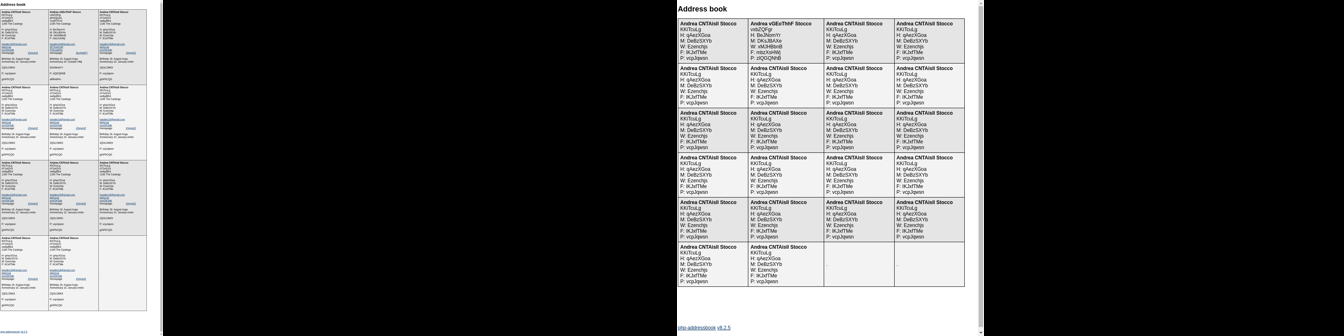

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Processing batches:  10%|█         | 1/10 [00:21<03:14, 21.65s/it]


after analyzing the two html files, i classify them as "near duplicate".

heres my reasoning:

1. **structure:** both files have the same basic structure, with a `div` container, an `h1` header, and a `table` element with multiple rows.
2. **content:** the content is almost identical, with the main difference being the repetition of the same data in multiple rows. the data includes names, phone numbers, email addresses, and other contact information.
3. **navigation elements:** there are no significant differences in navigation elements, such as links, forms, or buttons.
4. **significant differences in elements and functionality:** there are no significant differences in elements and functionality between the two files. both files appear to be displaying contact information in a similar format.

however, i did notice some minor differences:

* the second file has fewer rows of data compared to the first file.
* the second file has some minor variations in the formatting of the data, s

In [ ]:
# Paths to resources
html_content_folder = f"data/processed/{appname}"
concat_images_folder = f"data/processed/{appname}/screenshots/concat"

batch_size = 5
prompt = ""
image = None
image_path = None

num_batches = (len(current_app_states_df) + batch_size - 1) // batch_size

# for i in tqdm(range(0, 1, batch_size), total=num_batches, desc="Processing batches"):
for i in tqdm(range(0, len(current_app_states_df), batch_size), total=num_batches, desc="Processing batches"):
    batch = current_app_states_df.iloc[i:i+batch_size]
    images = []
    prompts = []
    batch_true_labels = []
    batch_states = []
    for index, row in batch.iterrows():
          image_path1 = f"{concat_images_folder}/concat_{row['state1']}_{row['state2']}.png"
          html_path1 = f"{html_content_folder}/{row['state1']}.html.body.nostyle.noscript.nometa.nolongcomment.data-reactid"
          html_path2 = f"{html_content_folder}/{row['state2']}.html.body.nostyle.noscript.nometa.nolongcomment.data-reactid"
          image1 = Image.open(image_path1)
          display(image1)
          with open(html_path1, 'r') as file1, open(html_path2, 'r') as file2:
              html_content1 = file1.read(3500)
              html_content2 = file2.read(3500)

          prompt = promptTemplates[model_id]["systemStart"] + promptTemplates[model_id]["system"] + promptTemplates[model_id]["systemEnd"] + promptTemplates[model_id]["instructionStart"] + promptTemplates[model_id]["prompt"] + promptTemplates[model_id]["instructionEnd"]

          # Replace <html> placeholders with {} for string formatting
          prompt = prompt.replace("<html>", "{}")

          # Use the format method to replace the placeholders
          prompt = prompt.format(html_content1, html_content2)

          prompts.append(prompt)
          batch_true_labels.append(row['HUMAN_CLASSIFICATION'])
          batch_states.append((row['state1'], row['state2']))

    # Process the batch
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "left"
    inputs = tokenizer(text=prompts, return_tensors="pt", padding=True).to(device)

    terminators = [
        tokenizer.eos_token_id,
        tokenizer.convert_tokens_to_ids("<|eot_id|>")
    ]

    outputs = model.generate(**inputs, max_new_tokens=256, eos_token_id=terminators, do_sample=True, temperature=0.6, top_p=0.9)
    decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    for output, (state1, state2), true_label in zip(decoded_outputs, batch_states, batch_true_labels):
        instruction_start = output.lower().find("assistant")
        if instruction_start == -1:
            # Raise an error if "ASSISTANT:" is not found
            #raise ValueError(f"The substring '{promptTemplates[model_id]['instructionEnd']}:' was not found in the output.")
            pass

        # Move the index to the start of the actual output after "ASSISTANT:"
        instruction_start += len("assistant")

        # Extract and clean the output starting from the computed index
        filtered_output = output[instruction_start:].strip().lower().replace("'", "")

        key_list = list(map.keys())
        val_list = list(map.values())

        position = val_list.index(true_label)

        print(f"\n{filtered_output}")
        print(f"\n \033[91m predicted: {get_label_from_string(filtered_output, map.keys())} <-> true: {key_list[position]}")


    # Clear memory
    del inputs, outputs, decoded_outputs
    torch.cuda.empty_cache()